In [1]:
%%capture
%%bash
wget https://github.com/CodexSecret/IT3103-Project/raw/main/Yolo8_Crosswalk_Speedlimit_Train.v2i.yolov8.zip
mkdir -p datasets
unzip Yolo8_Crosswalk_Speedlimit_Train.v2i.yolov8.zip -d datasets/

In [2]:
%%capture
!pip install ultralytics
!pip install comet_ml

In [3]:
!pip install --upgrade ultralytics

In [4]:
from ultralytics import settings

settings.update({"wandb": True,
                 "tensorboard": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
from ultralytics import YOLO

# Load the pre-trained YOLO model
model = YOLO("yolov8s.pt")

# Train the model with updated and valid parameters
result = model.train(
    data="datasets/data.yaml",  # Path to your dataset configuration
    epochs=50,  # Number of training epochs
    save_period=1,  # Save model weights periodically
    batch=32,  # Batch size
    device=0,  # Specify GPU (use 'cpu' if GPU is unavailable)
    project='roadsigns',  # Project name for organizing results
    name='crosswalk_speedlimit_finetuned',  # Unique experiment name
    workers=8,  # Number of data loading workers
    imgsz=640,  # Image size
    lr0=0.001,  # Initial learning rate
    lrf=0.01,  # Final learning rate (one-cycle policy)
    weight_decay=0.0005,  # Weight decay for regularization
    momentum=0.937,  # Momentum for optimizer
    optimizer='AdamW',  # Use AdamW optimizer
    patience=10,  # Early stopping patience
    plots=True  # Generate and save training plots
)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=datasets/data.yaml, epochs=50, time=None, patience=10, batch=32, imgsz=640, save=True, save_period=1, cache=False, device=0, workers=8, project=roadsigns, name=crosswalk_speedlimit_finetuned, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 96.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.7MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/train/labels... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 2091.18it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/valid/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 859.74it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to roadsigns/crosswalk_speedlimit_finetuned/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to roadsigns/crosswalk_speedlimit_finetuned
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.45G     0.8177      4.707      1.167         34        640: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         24         26      0.112      0.155     0.0484     0.0332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.13G     0.8562      4.375       1.18         45        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         24         26     0.0985      0.232      0.059     0.0418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.49G     0.8367      4.638      1.147         41        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         24         26      0.291      0.643      0.428      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.24G     0.8262      1.909      1.117         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         24         26      0.869      0.637      0.671      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.55G     0.7082      1.137      1.065         36        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all         24         26      0.712      0.607      0.658       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.24G     0.7043     0.9873      1.064         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         24         26      0.601      0.613      0.595      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.55G     0.7456     0.8414      1.031         42        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         24         26      0.675      0.654      0.684      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.23G     0.7065     0.7128      1.038         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         24         26      0.566      0.682      0.662       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.55G     0.7242     0.7726      1.033         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         24         26      0.683      0.607      0.714      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.24G     0.6936     0.6472     0.9852         33        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         24         26      0.725      0.696      0.712      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.55G     0.6819     0.6106     0.9862         39        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all         24         26      0.765      0.717      0.813      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.23G     0.6671      0.638      1.024         48        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         24         26      0.745      0.775      0.861      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.55G     0.7479     0.7199       1.07         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         24         26      0.632      0.738      0.664      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.24G      0.701     0.6941      1.031         37        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         24         26      0.515      0.923      0.704      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.55G     0.6293     0.5557     0.9757         38        640: 100%|██████████| 3/3 [00:01<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         24         26       0.67      0.774      0.791      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.24G     0.7012     0.5575      1.025         36        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         24         26      0.694      0.832       0.78      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      7.55G     0.6063     0.5788      0.994         35        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         24         26       0.69      0.857      0.824      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.61G     0.6262     0.4896     0.9708         43        640: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         24         26      0.801      0.893      0.914      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.55G      0.592      0.522     0.9821         36        640: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         24         26      0.813      0.837      0.903      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.61G     0.6078     0.5075     0.9794         40        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         24         26      0.856      0.774      0.837      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.55G     0.6331     0.4854     0.9634         43        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         24         26      0.868      0.842       0.86      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.61G      0.586     0.4752     0.9262         38        640: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all         24         26      0.982      0.856      0.918      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.24G     0.6034     0.4735     0.9931         44        640: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]

                   all         24         26       0.96      0.908      0.943      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.61G     0.6295     0.4953     0.9899         38        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         24         26      0.889      0.893      0.899      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.55G     0.6287     0.5216     0.9762         33        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         24         26      0.816       0.84       0.84      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.61G     0.5886     0.4824     0.9771         34        640: 100%|██████████| 3/3 [00:01<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         24         26      0.907      0.851      0.885      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.24G     0.5491     0.4414     0.9517         33        640: 100%|██████████| 3/3 [00:01<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         24         26      0.905      0.815      0.876      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.61G     0.5222     0.4394     0.9194         44        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         24         26      0.901      0.857      0.896      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.24G     0.5712     0.4574     0.9452         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         24         26       0.86      0.889      0.875      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.61G     0.5911     0.4398     0.9789         43        640: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]

                   all         24         26      0.837      0.893      0.897      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.24G     0.6035     0.4601     0.9973         38        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         24         26      0.917      0.882      0.922      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.61G     0.5399     0.4082     0.9414         54        640: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         24         26      0.945       0.92      0.933      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.55G     0.5415     0.4327     0.9244         45        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         24         26      0.946      0.893      0.928      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.61G     0.5459      0.432     0.9568         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         24         26      0.853      0.929      0.918      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.56G     0.5542     0.4368     0.9708         40        640: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         24         26      0.911      0.887      0.922      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.61G     0.5311     0.4228     0.9613         39        640: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         24         26      0.933      0.925      0.933      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.24G     0.5722     0.4582     0.9515         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         24         26      0.919      0.929      0.933      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       7.6G      0.503      0.404     0.9225         39        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         24         26      0.949      0.928      0.944      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.55G     0.5761     0.4497      1.006         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all         24         26       0.95      0.924      0.946      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.61G     0.4945     0.3816     0.9066         48        640: 100%|██████████| 3/3 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         24         26      0.957      0.929      0.939      0.749


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.24G     0.4845     0.3398     0.8995         23        640: 100%|██████████| 3/3 [00:04<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         24         26      0.949      0.929       0.94      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.61G     0.4618     0.3303     0.8767         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         24         26      0.912       0.92      0.943      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.24G     0.4579     0.3239     0.8847         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         24         26      0.957      0.915      0.946      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.62G     0.4582     0.3091     0.8648         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         24         26      0.963      0.893      0.946      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.24G     0.4485     0.2954     0.8608         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         24         26      0.971      0.893      0.946      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.61G     0.4327     0.3064     0.8798         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         24         26      0.987      0.925      0.953      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.24G     0.4515     0.2996     0.8756         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         24         26       0.99      0.929      0.951      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.61G     0.4364      0.297      0.874         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all         24         26      0.992      0.929      0.952      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.24G     0.4175     0.2991     0.8657         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         24         26      0.992      0.929      0.953      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.62G     0.4122     0.2753     0.8515         22        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         24         26       0.99      0.929      0.954      0.827



50 epochs completed in 0.050 hours.
Optimizer stripped from roadsigns/crosswalk_speedlimit_finetuned/weights/last.pt, 22.5MB
Optimizer stripped from roadsigns/crosswalk_speedlimit_finetuned/weights/best.pt, 22.5MB

Validating roadsigns/crosswalk_speedlimit_finetuned/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]


                   all         24         26       0.99      0.929      0.955      0.828
             crosswalk         12         12      0.995          1      0.995      0.882
            speedlimit         13         14      0.984      0.857      0.915      0.774
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to roadsigns/crosswalk_speedlimit_finetuned


lr/pg0,███▇▇▇▇▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr/pg1,▁▂▂▃▄▄▅▅▅▆▆▇▇▇▇███████████▇▇▇▆▆▅▅▅▄▃▃▂▂▁
lr/pg2,▁▂▂▃▄▄▅▅▅▆▆▇▇▇▇██████████▇▇▇▆▆▅▅▅▄▄▃▃▂▂▁
metrics/mAP50(B),▁▁▄▆▆▆▆▆▇▆▇▇▇██▇███▇▇█▇█████████████████
metrics/mAP50-95(B),▁▁▃▅▅▆▅▆▆▆▅▅▆▆▆▆▆▇▇▇▆▆▆▆▇▇▇▇▇▇▇▇▇███████
metrics/precision(B),▁▁▃▇▆▆▅▆▆▆▅▅▆▆▇▇▇██▇▇▇▇▇▇█▇▇█▇███▇██████
metrics/recall(B),▁▅▅▅▅▅▆▆▆▆▆▇▇█▇▇▇██▇▇▇██████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▇███▆▆▆▅▅▅▆▄▆▄▄▄▄▄▄▄▄▃▃▄▄▃▃▃▃▃▂▄▂▂▂▂▂▁▂▁


In [9]:
from ultralytics import YOLO

model = YOLO("roadsigns/crosswalk_speedlimit_finetuned/weights/best.pt")
validation_results = model.val(data="datasets/data.yaml", device="0")

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]


                   all         24         26       0.99      0.929      0.954      0.827
             crosswalk         12         12      0.995          1      0.995      0.882
            speedlimit         13         14      0.985      0.857      0.912      0.772
Speed: 0.3ms preprocess, 19.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


In [11]:
model = YOLO("roadsigns/crosswalk_speedlimit_finetuned/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'roadsigns/crosswalk_speedlimit_finetuned/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirement ['openvino>=2024.5.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 197.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.2s, installed 1 package: ['openvino>=2024.5.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
requirements: Ultralytics requirement ['nncf>=2.14.0'] not found, attempting AutoUpdate...
  Preparing metadata (setup.py): started
  Preparin

100%|██████████| 433k/433k [00:00<00:00, 11.3MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 3159.50file/s]

Dataset download success ✅ (1.6s), saved to /content/datasets




Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2543.93it/s]

New cache created: /content/datasets/coco8/labels/val.cache
OpenVINO: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


INFO:nncf:16 ignored nodes were found by patterns in the NNCFGraph
INFO:nncf:1 ignored nodes were found by types in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 161 __module.model.22.dfl/aten::view/Reshape
INFO:nncf:Not adding activation input quantizer for operation: 162 __module.model.22/aten::sigmoid/Sigmoid
INFO:nncf:Not adding activation input quantizer for operation: 172 __module.model.22.dfl/aten::transpose/Transpose
INFO:nncf:Not adding activation input quantizer for operation: 181 __module.model.22.dfl/aten::softmax/Softmax
INFO:nncf:Not adding activation input quantizer for operation: 190 __module.model.22.dfl.conv/aten::_convolution/Convolution
INFO:nncf:Not adding activation input quantizer for operation: 197 __module.model.22.dfl/aten::view/Reshape_1
INFO:nncf:Not adding activation input quantizer for operation: 209 __module.model.22/aten::sub/Subtract
INFO:nncf:Not adding activation input quantizer for operation: 210 __module.model.22/aten:

Output()

Loading roadsigns/crosswalk_speedlimit_finetuned/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...



100%|██████████| 60.5k/60.5k [00:00<00:00, 32.6MB/s]


image 1/1 /content/german-pedestrian-crossing-sign.jpg: 640x640 1 crosswalk, 204.4ms
Speed: 6.7ms preprocess, 204.4ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'crosswalk', 1: 'speedlimit'}
obb: None
orig_img: array([[[168, 145, 130],
        [168, 145, 130],
        [169, 146, 131],
        ...,
        [198, 201, 205],
        [198, 201, 205],
        [199, 202, 206]],

       [[168, 145, 130],
        [168, 145, 130],
        [169, 146, 131],
        ...,
        [199, 202, 206],
        [201, 204, 208],
        [202, 205, 209]],

       [[168, 145, 130],
        [169, 146, 131],
        [170, 147, 132],
        ...,
        [201, 204, 209],
        [203, 206, 211],
        [206, 209, 214]],

       ...,

       [[ 17,  15,   7],
        [ 11,   9,   1],
        [  6,   3,   0],
        ...,
        [ 10,  12,  12],

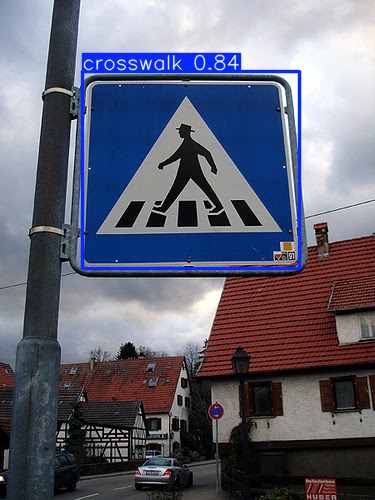

In [12]:
import ultralytics
from ultralytics import YOLO
from PIL import Image

source = 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiEkaY0tRyfq22SsAB4tFLAPO76raN219HU6EplXHtxxQaWszoVvss7OQ75jopp15Mgx8mkBGLkGaQTBw4S9AefCr9BKxiLN_n-U1vdSlfTx3YU0gvXwBjT2kBPM-XlW4pNS_0UzAZWxY8/w1200-h630-p-k-no-nu/german-pedestrian-crossing-sign.jpg'
#source = './samples/sample_balloon.jpeg'
model = YOLO("roadsigns/crosswalk_speedlimit_finetuned/weights/best_int8_openvino_model", task='detect')
result = model(source, conf=0.5, iou=0.6)

# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

In [13]:
%%bash
mv ./roadsigns/crosswalk_speedlimit_finetuned/weights/best_int8_openvino_model/ .
zip -r best_int8_openvino_model.zip best_int8_openvino_model

# Now go to best_openvino_model to download the best_openvino_model.zip file

  adding: best_int8_openvino_model/ (stored 0%)
  adding: best_int8_openvino_model/metadata.yaml (deflated 34%)
  adding: best_int8_openvino_model/best.xml (deflated 95%)
  adding: best_int8_openvino_model/best.bin (deflated 18%)


In [14]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!wget 'https://github.com/CodexSecret/IT3103-Project/raw/main/Test.mp4'

--2025-01-12 09:50:31--  https://github.com/CodexSecret/IT3103-Project/raw/main/Untitled%20design.mp4
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CodexSecret/IT3103-Project/main/Untitled%20design.mp4 [following]
--2025-01-12 09:50:31--  https://raw.githubusercontent.com/CodexSecret/IT3103-Project/main/Untitled%20design.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18610288 (18M) [application/octet-stream]
Saving to: ‘Untitled design.mp4’

Untitled design.mp4 100%[===================>]  17.75M  --.-KB/s    in 0.05s   

2025-01-12 09:50:33 (370 MB/s) - ‘Untitled design.mp4’ saved [18

In [16]:
from ultralytics import YOLO
import cv2
from tqdm import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.85, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)


In [18]:
from pathlib import Path
import os
from ultralytics import YOLO

# Define the input and output video file paths
video_in_file = "Test.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')

# Load the YOLO model
model = YOLO("best_int8_openvino_model", task="detect")

# Call the write_video function with the configured model
write_video(video_in_file, video_out_file, model)

  0%|          | 0/3866 [00:00<?, ?it/s]

Loading best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

0: 640x640 1 crosswalk, 222.3ms
Speed: 8.6ms preprocess, 222.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 1/3866 [00:00<45:36,  1.41it/s]


0: 640x640 1 crosswalk, 222.7ms
Speed: 5.8ms preprocess, 222.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 2/3866 [00:00<29:07,  2.21it/s]


0: 640x640 1 crosswalk, 261.6ms
Speed: 5.3ms preprocess, 261.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 3/3866 [00:01<24:40,  2.61it/s]


0: 640x640 1 crosswalk, 250.0ms
Speed: 11.3ms preprocess, 250.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 4/3866 [00:01<22:46,  2.83it/s]


0: 640x640 1 crosswalk, 240.9ms
Speed: 4.8ms preprocess, 240.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 5/3866 [00:01<21:08,  3.04it/s]


0: 640x640 1 crosswalk, 222.4ms
Speed: 4.8ms preprocess, 222.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 6/3866 [00:02<19:49,  3.24it/s]


0: 640x640 1 crosswalk, 229.8ms
Speed: 9.6ms preprocess, 229.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 7/3866 [00:02<19:12,  3.35it/s]


0: 640x640 1 crosswalk, 266.4ms
Speed: 6.7ms preprocess, 266.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 8/3866 [00:02<19:29,  3.30it/s]


0: 640x640 1 crosswalk, 235.7ms
Speed: 10.4ms preprocess, 235.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 9/3866 [00:03<19:11,  3.35it/s]


0: 640x640 1 crosswalk, 223.9ms
Speed: 5.4ms preprocess, 223.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 10/3866 [00:03<18:32,  3.47it/s]


0: 640x640 1 crosswalk, 258.4ms
Speed: 4.9ms preprocess, 258.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 11/3866 [00:03<18:43,  3.43it/s]


0: 640x640 1 crosswalk, 246.3ms
Speed: 8.2ms preprocess, 246.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 12/3866 [00:03<18:49,  3.41it/s]


0: 640x640 1 crosswalk, 242.4ms
Speed: 5.3ms preprocess, 242.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 13/3866 [00:04<18:41,  3.44it/s]


0: 640x640 1 crosswalk, 237.6ms
Speed: 5.7ms preprocess, 237.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 14/3866 [00:04<18:34,  3.46it/s]


0: 640x640 1 crosswalk, 241.3ms
Speed: 8.0ms preprocess, 241.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 15/3866 [00:04<18:34,  3.46it/s]


0: 640x640 1 crosswalk, 260.5ms
Speed: 5.1ms preprocess, 260.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 16/3866 [00:05<18:48,  3.41it/s]


0: 640x640 1 crosswalk, 230.9ms
Speed: 6.5ms preprocess, 230.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 17/3866 [00:05<18:30,  3.47it/s]


0: 640x640 1 crosswalk, 244.0ms
Speed: 4.6ms preprocess, 244.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 18/3866 [00:05<18:22,  3.49it/s]


0: 640x640 1 crosswalk, 237.9ms
Speed: 4.6ms preprocess, 237.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


  0%|          | 19/3866 [00:05<18:10,  3.53it/s]


0: 640x640 1 crosswalk, 254.7ms
Speed: 5.9ms preprocess, 254.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 20/3866 [00:06<18:29,  3.47it/s]


0: 640x640 1 crosswalk, 244.5ms
Speed: 4.5ms preprocess, 244.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 21/3866 [00:06<18:25,  3.48it/s]


0: 640x640 1 crosswalk, 256.0ms
Speed: 4.7ms preprocess, 256.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 22/3866 [00:06<18:35,  3.45it/s]


0: 640x640 1 crosswalk, 300.0ms
Speed: 4.7ms preprocess, 300.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 23/3866 [00:07<19:42,  3.25it/s]


0: 640x640 1 crosswalk, 288.9ms
Speed: 4.9ms preprocess, 288.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 24/3866 [00:07<20:24,  3.14it/s]


0: 640x640 1 crosswalk, 283.6ms
Speed: 6.3ms preprocess, 283.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 25/3866 [00:07<20:30,  3.12it/s]


0: 640x640 1 crosswalk, 247.6ms
Speed: 4.5ms preprocess, 247.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 26/3866 [00:08<19:51,  3.22it/s]


0: 640x640 1 crosswalk, 297.5ms
Speed: 5.9ms preprocess, 297.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 27/3866 [00:08<20:37,  3.10it/s]


0: 640x640 1 crosswalk, 270.7ms
Speed: 6.0ms preprocess, 270.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 28/3866 [00:08<20:25,  3.13it/s]


0: 640x640 1 crosswalk, 1056.0ms
Speed: 4.5ms preprocess, 1056.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 29/3866 [00:09<36:59,  1.73it/s]


0: 640x640 1 crosswalk, 1148.6ms
Speed: 14.0ms preprocess, 1148.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 30/3866 [00:11<52:01,  1.23it/s]


0: 640x640 1 crosswalk, 1294.3ms
Speed: 25.7ms preprocess, 1294.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 31/3866 [00:12<1:03:30,  1.01it/s]


0: 640x640 1 crosswalk, 878.3ms
Speed: 15.2ms preprocess, 878.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 32/3866 [00:13<1:03:29,  1.01it/s]


0: 640x640 1 crosswalk, 698.4ms
Speed: 8.0ms preprocess, 698.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 33/3866 [00:14<59:08,  1.08it/s]  


0: 640x640 1 crosswalk, 295.5ms
Speed: 5.6ms preprocess, 295.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 34/3866 [00:14<47:57,  1.33it/s]


0: 640x640 1 crosswalk, 292.7ms
Speed: 4.4ms preprocess, 292.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 35/3866 [00:15<40:17,  1.58it/s]


0: 640x640 1 crosswalk, 293.5ms
Speed: 4.5ms preprocess, 293.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 36/3866 [00:15<34:43,  1.84it/s]


0: 640x640 1 crosswalk, 310.7ms
Speed: 4.7ms preprocess, 310.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 37/3866 [00:15<31:33,  2.02it/s]


0: 640x640 1 crosswalk, 269.7ms
Speed: 6.9ms preprocess, 269.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 38/3866 [00:16<28:32,  2.24it/s]


0: 640x640 1 crosswalk, 285.9ms
Speed: 4.3ms preprocess, 285.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 39/3866 [00:16<26:36,  2.40it/s]


0: 640x640 1 crosswalk, 292.1ms
Speed: 6.6ms preprocess, 292.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 40/3866 [00:16<25:27,  2.50it/s]


0: 640x640 1 crosswalk, 274.3ms
Speed: 8.4ms preprocess, 274.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 41/3866 [00:17<24:23,  2.61it/s]


0: 640x640 1 crosswalk, 285.0ms
Speed: 6.7ms preprocess, 285.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 42/3866 [00:17<23:49,  2.68it/s]


0: 640x640 1 crosswalk, 294.6ms
Speed: 4.5ms preprocess, 294.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 43/3866 [00:17<23:23,  2.72it/s]


0: 640x640 1 crosswalk, 290.0ms
Speed: 5.1ms preprocess, 290.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 44/3866 [00:18<22:50,  2.79it/s]


0: 640x640 1 crosswalk, 213.0ms
Speed: 4.5ms preprocess, 213.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 45/3866 [00:18<20:54,  3.05it/s]


0: 640x640 1 crosswalk, 181.3ms
Speed: 7.0ms preprocess, 181.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 46/3866 [00:18<18:46,  3.39it/s]


0: 640x640 1 crosswalk, 192.7ms
Speed: 4.7ms preprocess, 192.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 47/3866 [00:19<17:38,  3.61it/s]


0: 640x640 1 crosswalk, 187.6ms
Speed: 5.4ms preprocess, 187.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|          | 48/3866 [00:19<16:41,  3.81it/s]


0: 640x640 1 crosswalk, 209.8ms
Speed: 6.7ms preprocess, 209.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 49/3866 [00:19<16:32,  3.85it/s]


0: 640x640 1 crosswalk, 189.5ms
Speed: 4.3ms preprocess, 189.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 50/3866 [00:19<15:57,  3.98it/s]


0: 640x640 1 crosswalk, 187.9ms
Speed: 4.9ms preprocess, 187.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 51/3866 [00:19<15:41,  4.05it/s]


0: 640x640 1 crosswalk, 186.0ms
Speed: 4.7ms preprocess, 186.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 52/3866 [00:20<15:17,  4.16it/s]


0: 640x640 1 crosswalk, 187.6ms
Speed: 4.2ms preprocess, 187.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 53/3866 [00:20<15:02,  4.22it/s]


0: 640x640 1 crosswalk, 204.9ms
Speed: 4.5ms preprocess, 204.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 54/3866 [00:20<15:09,  4.19it/s]


0: 640x640 1 crosswalk, 182.4ms
Speed: 7.2ms preprocess, 182.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 55/3866 [00:20<14:47,  4.29it/s]


0: 640x640 1 crosswalk, 189.9ms
Speed: 4.6ms preprocess, 189.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 56/3866 [00:21<14:48,  4.29it/s]


0: 640x640 1 crosswalk, 191.0ms
Speed: 4.6ms preprocess, 191.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  1%|▏         | 57/3866 [00:21<14:36,  4.34it/s]


0: 640x640 1 crosswalk, 198.3ms
Speed: 7.0ms preprocess, 198.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 58/3866 [00:21<14:48,  4.29it/s]


0: 640x640 1 crosswalk, 192.3ms
Speed: 4.6ms preprocess, 192.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 59/3866 [00:21<14:44,  4.30it/s]


0: 640x640 1 crosswalk, 178.1ms
Speed: 7.1ms preprocess, 178.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 60/3866 [00:22<14:32,  4.36it/s]


0: 640x640 1 crosswalk, 183.2ms
Speed: 7.0ms preprocess, 183.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 61/3866 [00:22<14:26,  4.39it/s]


0: 640x640 1 crosswalk, 190.7ms
Speed: 6.1ms preprocess, 190.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 62/3866 [00:22<14:33,  4.36it/s]


0: 640x640 1 crosswalk, 186.9ms
Speed: 11.7ms preprocess, 186.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 63/3866 [00:22<14:36,  4.34it/s]


0: 640x640 1 crosswalk, 174.1ms
Speed: 4.7ms preprocess, 174.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 64/3866 [00:22<14:20,  4.42it/s]


0: 640x640 1 crosswalk, 245.2ms
Speed: 3.9ms preprocess, 245.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 65/3866 [00:23<15:27,  4.10it/s]


0: 640x640 1 crosswalk, 181.8ms
Speed: 5.1ms preprocess, 181.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 66/3866 [00:23<15:02,  4.21it/s]


0: 640x640 1 crosswalk, 184.9ms
Speed: 6.2ms preprocess, 184.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 67/3866 [00:23<14:47,  4.28it/s]


0: 640x640 1 crosswalk, 179.3ms
Speed: 4.6ms preprocess, 179.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 68/3866 [00:23<14:28,  4.37it/s]


0: 640x640 1 crosswalk, 184.2ms
Speed: 6.3ms preprocess, 184.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 69/3866 [00:24<14:19,  4.42it/s]


0: 640x640 1 crosswalk, 192.2ms
Speed: 6.2ms preprocess, 192.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 70/3866 [00:24<14:26,  4.38it/s]


0: 640x640 1 crosswalk, 205.4ms
Speed: 4.8ms preprocess, 205.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 71/3866 [00:24<14:40,  4.31it/s]


0: 640x640 1 crosswalk, 184.5ms
Speed: 4.7ms preprocess, 184.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 72/3866 [00:24<14:30,  4.36it/s]


0: 640x640 1 crosswalk, 181.2ms
Speed: 4.7ms preprocess, 181.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 73/3866 [00:25<14:20,  4.41it/s]


0: 640x640 1 crosswalk, 191.5ms
Speed: 6.2ms preprocess, 191.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 74/3866 [00:25<14:24,  4.39it/s]


0: 640x640 1 crosswalk, 193.1ms
Speed: 5.2ms preprocess, 193.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 75/3866 [00:25<14:30,  4.35it/s]


0: 640x640 1 crosswalk, 189.2ms
Speed: 7.9ms preprocess, 189.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 76/3866 [00:25<14:27,  4.37it/s]


0: 640x640 1 crosswalk, 192.1ms
Speed: 4.6ms preprocess, 192.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 77/3866 [00:25<14:27,  4.37it/s]


0: 640x640 1 crosswalk, 190.9ms
Speed: 4.5ms preprocess, 190.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 78/3866 [00:26<14:31,  4.35it/s]


0: 640x640 1 crosswalk, 198.6ms
Speed: 6.3ms preprocess, 198.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 79/3866 [00:26<14:43,  4.29it/s]


0: 640x640 1 crosswalk, 200.0ms
Speed: 8.0ms preprocess, 200.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 80/3866 [00:26<14:49,  4.25it/s]


0: 640x640 1 crosswalk, 172.7ms
Speed: 7.2ms preprocess, 172.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 81/3866 [00:26<14:22,  4.39it/s]


0: 640x640 1 crosswalk, 181.0ms
Speed: 4.5ms preprocess, 181.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 82/3866 [00:27<14:12,  4.44it/s]


0: 640x640 1 crosswalk, 199.2ms
Speed: 4.5ms preprocess, 199.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 83/3866 [00:27<14:25,  4.37it/s]


0: 640x640 1 crosswalk, 211.2ms
Speed: 5.0ms preprocess, 211.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 84/3866 [00:27<14:48,  4.26it/s]


0: 640x640 1 crosswalk, 182.9ms
Speed: 5.8ms preprocess, 182.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 85/3866 [00:27<14:30,  4.35it/s]


0: 640x640 1 crosswalk, 176.0ms
Speed: 5.4ms preprocess, 176.0ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 86/3866 [00:28<14:13,  4.43it/s]


0: 640x640 1 crosswalk, 177.3ms
Speed: 4.4ms preprocess, 177.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 87/3866 [00:28<13:59,  4.50it/s]


0: 640x640 1 crosswalk, 240.1ms
Speed: 5.5ms preprocess, 240.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 88/3866 [00:28<15:12,  4.14it/s]


0: 640x640 1 crosswalk, 267.1ms
Speed: 4.7ms preprocess, 267.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 89/3866 [00:28<16:25,  3.83it/s]


0: 640x640 1 crosswalk, 248.5ms
Speed: 4.5ms preprocess, 248.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 90/3866 [00:29<16:54,  3.72it/s]


0: 640x640 1 crosswalk, 271.9ms
Speed: 10.1ms preprocess, 271.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 91/3866 [00:29<17:48,  3.53it/s]


0: 640x640 1 crosswalk, 265.5ms
Speed: 7.3ms preprocess, 265.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 92/3866 [00:29<18:19,  3.43it/s]


0: 640x640 1 crosswalk, 260.5ms
Speed: 8.4ms preprocess, 260.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 93/3866 [00:30<18:45,  3.35it/s]


0: 640x640 1 crosswalk, 254.5ms
Speed: 4.7ms preprocess, 254.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 94/3866 [00:30<18:51,  3.33it/s]


0: 640x640 1 crosswalk, 274.8ms
Speed: 4.6ms preprocess, 274.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 95/3866 [00:30<19:19,  3.25it/s]


0: 640x640 1 crosswalk, 270.2ms
Speed: 4.6ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  2%|▏         | 96/3866 [00:30<19:20,  3.25it/s]


0: 640x640 1 crosswalk, 281.0ms
Speed: 4.5ms preprocess, 281.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 97/3866 [00:31<19:39,  3.20it/s]


0: 640x640 1 crosswalk, 288.9ms
Speed: 5.3ms preprocess, 288.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 98/3866 [00:31<20:10,  3.11it/s]


0: 640x640 1 crosswalk, 271.7ms
Speed: 7.9ms preprocess, 271.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 99/3866 [00:31<20:21,  3.08it/s]


0: 640x640 1 crosswalk, 265.9ms
Speed: 4.9ms preprocess, 265.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 100/3866 [00:32<20:16,  3.09it/s]


0: 640x640 1 crosswalk, 301.8ms
Speed: 4.6ms preprocess, 301.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 101/3866 [00:32<20:34,  3.05it/s]


0: 640x640 1 crosswalk, 262.1ms
Speed: 4.6ms preprocess, 262.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 102/3866 [00:32<20:15,  3.10it/s]


0: 640x640 1 crosswalk, 262.3ms
Speed: 4.6ms preprocess, 262.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 103/3866 [00:33<19:59,  3.14it/s]


0: 640x640 1 crosswalk, 276.5ms
Speed: 4.6ms preprocess, 276.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 104/3866 [00:33<20:05,  3.12it/s]


0: 640x640 1 crosswalk, 270.6ms
Speed: 10.6ms preprocess, 270.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 105/3866 [00:33<20:15,  3.09it/s]


0: 640x640 1 crosswalk, 277.5ms
Speed: 4.8ms preprocess, 277.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 106/3866 [00:34<20:28,  3.06it/s]


0: 640x640 1 crosswalk, 275.3ms
Speed: 5.5ms preprocess, 275.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 107/3866 [00:34<20:30,  3.06it/s]


0: 640x640 1 crosswalk, 280.4ms
Speed: 4.6ms preprocess, 280.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 108/3866 [00:34<20:26,  3.06it/s]


0: 640x640 1 crosswalk, 274.1ms
Speed: 4.5ms preprocess, 274.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 109/3866 [00:35<20:36,  3.04it/s]


0: 640x640 1 crosswalk, 290.6ms
Speed: 5.6ms preprocess, 290.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 110/3866 [00:35<21:08,  2.96it/s]


0: 640x640 1 crosswalk, 286.2ms
Speed: 7.3ms preprocess, 286.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 111/3866 [00:35<21:11,  2.95it/s]


0: 640x640 1 crosswalk, 291.0ms
Speed: 4.6ms preprocess, 291.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 112/3866 [00:36<21:00,  2.98it/s]


0: 640x640 1 crosswalk, 274.3ms
Speed: 4.6ms preprocess, 274.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 113/3866 [00:36<20:33,  3.04it/s]


0: 640x640 1 crosswalk, 301.4ms
Speed: 4.5ms preprocess, 301.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 114/3866 [00:36<21:00,  2.98it/s]


0: 640x640 1 crosswalk, 269.4ms
Speed: 5.2ms preprocess, 269.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 115/3866 [00:37<20:44,  3.02it/s]


0: 640x640 1 crosswalk, 281.4ms
Speed: 11.4ms preprocess, 281.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 116/3866 [00:37<20:54,  2.99it/s]


0: 640x640 1 crosswalk, 265.2ms
Speed: 4.3ms preprocess, 265.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 117/3866 [00:37<20:31,  3.04it/s]


0: 640x640 1 crosswalk, 276.9ms
Speed: 7.4ms preprocess, 276.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 118/3866 [00:38<20:38,  3.03it/s]


0: 640x640 1 crosswalk, 273.2ms
Speed: 4.4ms preprocess, 273.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 119/3866 [00:38<20:31,  3.04it/s]


0: 640x640 1 crosswalk, 275.3ms
Speed: 5.8ms preprocess, 275.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 120/3866 [00:38<20:35,  3.03it/s]


0: 640x640 1 crosswalk, 290.0ms
Speed: 4.6ms preprocess, 290.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 121/3866 [00:39<20:55,  2.98it/s]


0: 640x640 1 crosswalk, 279.2ms
Speed: 5.4ms preprocess, 279.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 122/3866 [00:39<21:07,  2.95it/s]


0: 640x640 1 crosswalk, 266.0ms
Speed: 7.0ms preprocess, 266.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 123/3866 [00:39<20:42,  3.01it/s]


0: 640x640 1 crosswalk, 315.0ms
Speed: 6.9ms preprocess, 315.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 124/3866 [00:40<21:44,  2.87it/s]


0: 640x640 1 crosswalk, 287.4ms
Speed: 7.8ms preprocess, 287.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 125/3866 [00:40<21:30,  2.90it/s]


0: 640x640 1 crosswalk, 261.7ms
Speed: 5.4ms preprocess, 261.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 126/3866 [00:40<20:57,  2.97it/s]


0: 640x640 1 crosswalk, 237.9ms
Speed: 4.7ms preprocess, 237.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 127/3866 [00:41<19:45,  3.16it/s]


0: 640x640 1 crosswalk, 188.1ms
Speed: 7.2ms preprocess, 188.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 128/3866 [00:41<18:11,  3.42it/s]


0: 640x640 1 crosswalk, 190.6ms
Speed: 4.4ms preprocess, 190.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 129/3866 [00:41<17:08,  3.63it/s]


0: 640x640 1 crosswalk, 193.2ms
Speed: 4.6ms preprocess, 193.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 130/3866 [00:41<16:15,  3.83it/s]


0: 640x640 1 crosswalk, 188.1ms
Speed: 5.2ms preprocess, 188.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 131/3866 [00:42<15:48,  3.94it/s]


0: 640x640 1 crosswalk, 178.3ms
Speed: 8.6ms preprocess, 178.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 132/3866 [00:42<15:16,  4.07it/s]


0: 640x640 1 crosswalk, 200.8ms
Speed: 10.0ms preprocess, 200.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 133/3866 [00:42<15:12,  4.09it/s]


0: 640x640 1 crosswalk, 188.3ms
Speed: 4.4ms preprocess, 188.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 134/3866 [00:42<14:53,  4.18it/s]


0: 640x640 1 crosswalk, 184.4ms
Speed: 3.7ms preprocess, 184.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  3%|▎         | 135/3866 [00:43<14:34,  4.27it/s]


0: 640x640 1 crosswalk, 199.5ms
Speed: 6.3ms preprocess, 199.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 136/3866 [00:43<14:42,  4.23it/s]


0: 640x640 1 crosswalk, 198.0ms
Speed: 4.6ms preprocess, 198.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 137/3866 [00:43<14:37,  4.25it/s]


0: 640x640 1 crosswalk, 186.6ms
Speed: 5.2ms preprocess, 186.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 138/3866 [00:43<14:26,  4.30it/s]


0: 640x640 1 crosswalk, 191.2ms
Speed: 5.8ms preprocess, 191.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 139/3866 [00:43<14:22,  4.32it/s]


0: 640x640 1 crosswalk, 194.6ms
Speed: 4.6ms preprocess, 194.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 140/3866 [00:44<14:25,  4.30it/s]


0: 640x640 1 crosswalk, 209.8ms
Speed: 4.5ms preprocess, 209.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 141/3866 [00:44<14:41,  4.23it/s]


0: 640x640 1 crosswalk, 191.9ms
Speed: 7.4ms preprocess, 191.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 142/3866 [00:44<14:40,  4.23it/s]


0: 640x640 1 crosswalk, 192.9ms
Speed: 5.0ms preprocess, 192.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 143/3866 [00:44<14:32,  4.27it/s]


0: 640x640 1 crosswalk, 195.6ms
Speed: 4.4ms preprocess, 195.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▎         | 144/3866 [00:45<14:30,  4.28it/s]


0: 640x640 1 crosswalk, 200.3ms
Speed: 7.8ms preprocess, 200.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 145/3866 [00:45<14:37,  4.24it/s]


0: 640x640 1 crosswalk, 199.7ms
Speed: 7.6ms preprocess, 199.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 146/3866 [00:45<14:42,  4.22it/s]


0: 640x640 1 crosswalk, 187.4ms
Speed: 6.2ms preprocess, 187.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 147/3866 [00:45<14:30,  4.27it/s]


0: 640x640 1 crosswalk, 179.0ms
Speed: 4.7ms preprocess, 179.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 148/3866 [00:46<14:11,  4.37it/s]


0: 640x640 1 crosswalk, 177.9ms
Speed: 3.8ms preprocess, 177.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 149/3866 [00:46<14:04,  4.40it/s]


0: 640x640 1 crosswalk, 199.3ms
Speed: 4.8ms preprocess, 199.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 150/3866 [00:46<14:22,  4.31it/s]


0: 640x640 1 crosswalk, 182.2ms
Speed: 5.7ms preprocess, 182.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 151/3866 [00:46<14:11,  4.36it/s]


0: 640x640 1 crosswalk, 193.4ms
Speed: 6.9ms preprocess, 193.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 152/3866 [00:47<14:18,  4.33it/s]


0: 640x640 1 crosswalk, 183.8ms
Speed: 5.0ms preprocess, 183.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 153/3866 [00:47<14:09,  4.37it/s]


0: 640x640 1 crosswalk, 210.7ms
Speed: 4.3ms preprocess, 210.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 154/3866 [00:47<14:43,  4.20it/s]


0: 640x640 1 crosswalk, 197.5ms
Speed: 4.5ms preprocess, 197.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 155/3866 [00:47<14:39,  4.22it/s]


0: 640x640 1 crosswalk, 184.1ms
Speed: 5.7ms preprocess, 184.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 156/3866 [00:47<14:26,  4.28it/s]


0: 640x640 1 crosswalk, 200.9ms
Speed: 10.5ms preprocess, 200.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 157/3866 [00:48<14:44,  4.19it/s]


0: 640x640 1 crosswalk, 242.3ms
Speed: 5.2ms preprocess, 242.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 158/3866 [00:48<15:36,  3.96it/s]


0: 640x640 1 crosswalk, 189.7ms
Speed: 4.5ms preprocess, 189.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 159/3866 [00:48<15:06,  4.09it/s]


0: 640x640 1 crosswalk, 187.7ms
Speed: 5.8ms preprocess, 187.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 160/3866 [00:48<14:43,  4.20it/s]


0: 640x640 1 crosswalk, 192.5ms
Speed: 10.2ms preprocess, 192.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 161/3866 [00:49<14:37,  4.22it/s]


0: 640x640 1 crosswalk, 190.8ms
Speed: 4.6ms preprocess, 190.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 162/3866 [00:49<14:27,  4.27it/s]


0: 640x640 1 crosswalk, 219.4ms
Speed: 7.3ms preprocess, 219.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 163/3866 [00:49<14:53,  4.14it/s]


0: 640x640 1 crosswalk, 182.5ms
Speed: 3.8ms preprocess, 182.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 164/3866 [00:49<14:31,  4.25it/s]


0: 640x640 1 crosswalk, 193.1ms
Speed: 8.7ms preprocess, 193.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 165/3866 [00:50<14:29,  4.26it/s]


0: 640x640 1 crosswalk, 182.1ms
Speed: 4.1ms preprocess, 182.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 166/3866 [00:50<14:15,  4.32it/s]


0: 640x640 1 crosswalk, 208.6ms
Speed: 4.6ms preprocess, 208.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 167/3866 [00:50<14:32,  4.24it/s]


0: 640x640 1 crosswalk, 177.9ms
Speed: 5.9ms preprocess, 177.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 168/3866 [00:50<14:09,  4.35it/s]


0: 640x640 1 crosswalk, 183.6ms
Speed: 5.2ms preprocess, 183.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 169/3866 [00:51<14:08,  4.36it/s]


0: 640x640 1 crosswalk, 271.7ms
Speed: 5.6ms preprocess, 271.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 170/3866 [00:51<15:54,  3.87it/s]


0: 640x640 1 crosswalk, 301.3ms
Speed: 4.9ms preprocess, 301.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 171/3866 [00:51<17:34,  3.50it/s]


0: 640x640 1 crosswalk, 256.7ms
Speed: 6.0ms preprocess, 256.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 172/3866 [00:52<18:04,  3.40it/s]


0: 640x640 1 crosswalk, 255.9ms
Speed: 6.0ms preprocess, 255.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  4%|▍         | 173/3866 [00:52<18:11,  3.38it/s]


0: 640x640 1 crosswalk, 266.3ms
Speed: 4.8ms preprocess, 266.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 174/3866 [00:52<18:24,  3.34it/s]


0: 640x640 1 crosswalk, 278.1ms
Speed: 4.7ms preprocess, 278.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 175/3866 [00:52<18:49,  3.27it/s]


0: 640x640 1 crosswalk, 272.6ms
Speed: 4.6ms preprocess, 272.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 176/3866 [00:53<18:52,  3.26it/s]


0: 640x640 1 crosswalk, 290.9ms
Speed: 6.0ms preprocess, 290.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 177/3866 [00:53<19:28,  3.16it/s]


0: 640x640 1 crosswalk, 278.9ms
Speed: 4.9ms preprocess, 278.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 178/3866 [00:53<19:57,  3.08it/s]


0: 640x640 1 crosswalk, 289.1ms
Speed: 5.9ms preprocess, 289.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 179/3866 [00:54<20:14,  3.04it/s]


0: 640x640 1 crosswalk, 278.9ms
Speed: 7.6ms preprocess, 278.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 180/3866 [00:54<20:13,  3.04it/s]


0: 640x640 1 crosswalk, 282.1ms
Speed: 4.8ms preprocess, 282.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 181/3866 [00:54<20:23,  3.01it/s]


0: 640x640 1 crosswalk, 280.4ms
Speed: 4.9ms preprocess, 280.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 182/3866 [00:55<20:19,  3.02it/s]


0: 640x640 1 crosswalk, 273.8ms
Speed: 4.6ms preprocess, 273.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 183/3866 [00:55<20:05,  3.06it/s]


0: 640x640 1 crosswalk, 270.8ms
Speed: 6.0ms preprocess, 270.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 184/3866 [00:55<20:02,  3.06it/s]


0: 640x640 1 crosswalk, 262.5ms
Speed: 4.5ms preprocess, 262.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 185/3866 [00:56<19:42,  3.11it/s]


0: 640x640 1 crosswalk, 267.5ms
Speed: 4.6ms preprocess, 267.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 186/3866 [00:56<19:40,  3.12it/s]


0: 640x640 1 crosswalk, 275.7ms
Speed: 4.7ms preprocess, 275.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 187/3866 [00:56<20:04,  3.06it/s]


0: 640x640 1 crosswalk, 268.7ms
Speed: 5.6ms preprocess, 268.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 188/3866 [00:57<19:53,  3.08it/s]


0: 640x640 1 crosswalk, 261.8ms
Speed: 4.5ms preprocess, 261.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 189/3866 [00:57<19:37,  3.12it/s]


0: 640x640 1 crosswalk, 276.1ms
Speed: 4.6ms preprocess, 276.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 190/3866 [00:57<19:37,  3.12it/s]


0: 640x640 1 crosswalk, 268.4ms
Speed: 4.6ms preprocess, 268.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 191/3866 [00:58<19:29,  3.14it/s]


0: 640x640 1 crosswalk, 278.9ms
Speed: 4.5ms preprocess, 278.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 192/3866 [00:58<19:36,  3.12it/s]


0: 640x640 1 crosswalk, 283.0ms
Speed: 4.5ms preprocess, 283.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▍         | 193/3866 [00:58<19:51,  3.08it/s]


0: 640x640 1 crosswalk, 297.9ms
Speed: 4.6ms preprocess, 297.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 194/3866 [00:59<20:10,  3.03it/s]


0: 640x640 1 crosswalk, 268.3ms
Speed: 4.3ms preprocess, 268.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 195/3866 [00:59<19:52,  3.08it/s]


0: 640x640 1 crosswalk, 271.6ms
Speed: 4.6ms preprocess, 271.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 196/3866 [00:59<19:44,  3.10it/s]


0: 640x640 1 crosswalk, 283.6ms
Speed: 4.6ms preprocess, 283.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 197/3866 [01:00<19:53,  3.07it/s]


0: 640x640 1 crosswalk, 276.1ms
Speed: 4.6ms preprocess, 276.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 198/3866 [01:00<19:50,  3.08it/s]


0: 640x640 1 crosswalk, 264.3ms
Speed: 4.8ms preprocess, 264.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 199/3866 [01:00<19:34,  3.12it/s]


0: 640x640 1 crosswalk, 286.1ms
Speed: 4.6ms preprocess, 286.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 200/3866 [01:01<19:49,  3.08it/s]


0: 640x640 1 crosswalk, 286.7ms
Speed: 9.6ms preprocess, 286.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 201/3866 [01:01<20:35,  2.97it/s]


0: 640x640 1 crosswalk, 277.8ms
Speed: 6.8ms preprocess, 277.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 202/3866 [01:01<20:43,  2.95it/s]


0: 640x640 1 crosswalk, 274.9ms
Speed: 10.1ms preprocess, 274.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 203/3866 [01:02<20:56,  2.92it/s]


0: 640x640 1 crosswalk, 314.5ms
Speed: 5.7ms preprocess, 314.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 204/3866 [01:02<21:45,  2.81it/s]


0: 640x640 1 crosswalk, 272.4ms
Speed: 9.4ms preprocess, 272.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 205/3866 [01:02<21:36,  2.82it/s]


0: 640x640 1 crosswalk, 277.0ms
Speed: 5.6ms preprocess, 277.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 206/3866 [01:03<21:20,  2.86it/s]


0: 640x640 1 crosswalk, 244.6ms
Speed: 5.2ms preprocess, 244.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 207/3866 [01:03<20:17,  3.01it/s]


0: 640x640 1 crosswalk, 182.3ms
Speed: 7.2ms preprocess, 182.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 208/3866 [01:03<18:14,  3.34it/s]


0: 640x640 1 crosswalk, 174.2ms
Speed: 5.6ms preprocess, 174.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 209/3866 [01:03<16:43,  3.64it/s]


0: 640x640 1 crosswalk, 187.4ms
Speed: 4.6ms preprocess, 187.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 210/3866 [01:04<15:50,  3.85it/s]


0: 640x640 1 crosswalk, 189.7ms
Speed: 6.3ms preprocess, 189.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 211/3866 [01:04<15:24,  3.95it/s]


0: 640x640 1 crosswalk, 208.6ms
Speed: 6.1ms preprocess, 208.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  5%|▌         | 212/3866 [01:04<15:18,  3.98it/s]


0: 640x640 1 crosswalk, 186.8ms
Speed: 6.2ms preprocess, 186.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 213/3866 [01:04<14:51,  4.10it/s]


0: 640x640 1 crosswalk, 189.5ms
Speed: 4.5ms preprocess, 189.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 214/3866 [01:05<14:31,  4.19it/s]


0: 640x640 1 crosswalk, 180.6ms
Speed: 5.5ms preprocess, 180.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 215/3866 [01:05<14:08,  4.30it/s]


0: 640x640 1 crosswalk, 205.9ms
Speed: 5.1ms preprocess, 205.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 216/3866 [01:05<14:21,  4.23it/s]


0: 640x640 1 crosswalk, 196.4ms
Speed: 4.7ms preprocess, 196.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 217/3866 [01:05<14:21,  4.24it/s]


0: 640x640 1 crosswalk, 189.1ms
Speed: 4.6ms preprocess, 189.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 218/3866 [01:06<14:12,  4.28it/s]


0: 640x640 1 crosswalk, 182.5ms
Speed: 5.7ms preprocess, 182.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 219/3866 [01:06<14:04,  4.32it/s]


0: 640x640 1 crosswalk, 197.8ms
Speed: 5.9ms preprocess, 197.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 220/3866 [01:06<14:27,  4.20it/s]


0: 640x640 1 crosswalk, 192.3ms
Speed: 6.0ms preprocess, 192.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 221/3866 [01:06<14:17,  4.25it/s]


0: 640x640 1 crosswalk, 188.4ms
Speed: 5.5ms preprocess, 188.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 222/3866 [01:06<14:09,  4.29it/s]


0: 640x640 1 crosswalk, 187.7ms
Speed: 5.8ms preprocess, 187.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 223/3866 [01:07<14:01,  4.33it/s]


0: 640x640 1 crosswalk, 198.0ms
Speed: 5.6ms preprocess, 198.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 224/3866 [01:07<14:16,  4.25it/s]


0: 640x640 1 crosswalk, 204.1ms
Speed: 5.1ms preprocess, 204.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 225/3866 [01:07<14:33,  4.17it/s]


0: 640x640 1 crosswalk, 179.0ms
Speed: 4.5ms preprocess, 179.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 226/3866 [01:07<14:10,  4.28it/s]


0: 640x640 1 crosswalk, 188.0ms
Speed: 4.5ms preprocess, 188.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 227/3866 [01:08<14:03,  4.32it/s]


0: 640x640 1 crosswalk, 180.8ms
Speed: 6.1ms preprocess, 180.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 228/3866 [01:08<13:53,  4.36it/s]


0: 640x640 1 crosswalk, 213.0ms
Speed: 4.7ms preprocess, 213.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 229/3866 [01:08<14:22,  4.21it/s]


0: 640x640 1 crosswalk, 178.9ms
Speed: 5.2ms preprocess, 178.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 230/3866 [01:08<14:09,  4.28it/s]


0: 640x640 1 crosswalk, 185.3ms
Speed: 4.4ms preprocess, 185.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 231/3866 [01:09<13:57,  4.34it/s]


0: 640x640 1 crosswalk, 201.5ms
Speed: 5.6ms preprocess, 201.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 232/3866 [01:09<14:08,  4.28it/s]


0: 640x640 1 crosswalk, 192.9ms
Speed: 4.0ms preprocess, 192.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 233/3866 [01:09<14:12,  4.26it/s]


0: 640x640 1 crosswalk, 192.6ms
Speed: 4.8ms preprocess, 192.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 234/3866 [01:09<14:11,  4.27it/s]


0: 640x640 1 crosswalk, 185.4ms
Speed: 8.2ms preprocess, 185.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 235/3866 [01:10<14:05,  4.30it/s]


0: 640x640 1 crosswalk, 191.0ms
Speed: 5.3ms preprocess, 191.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 236/3866 [01:10<14:06,  4.29it/s]


0: 640x640 1 crosswalk, 189.1ms
Speed: 5.7ms preprocess, 189.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 237/3866 [01:10<14:10,  4.27it/s]


0: 640x640 1 crosswalk, 209.6ms
Speed: 11.3ms preprocess, 209.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 238/3866 [01:10<14:30,  4.17it/s]


0: 640x640 1 crosswalk, 182.5ms
Speed: 4.6ms preprocess, 182.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 239/3866 [01:10<14:13,  4.25it/s]


0: 640x640 1 crosswalk, 198.8ms
Speed: 5.0ms preprocess, 198.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 240/3866 [01:11<14:22,  4.21it/s]


0: 640x640 1 crosswalk, 186.9ms
Speed: 4.6ms preprocess, 186.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  6%|▌         | 241/3866 [01:11<14:19,  4.22it/s]


0: 640x640 1 crosswalk, 187.7ms
Speed: 4.7ms preprocess, 187.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 242/3866 [01:11<14:20,  4.21it/s]


0: 640x640 1 crosswalk, 181.8ms
Speed: 4.6ms preprocess, 181.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 243/3866 [01:11<13:58,  4.32it/s]


0: 640x640 1 crosswalk, 192.4ms
Speed: 4.6ms preprocess, 192.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 244/3866 [01:12<13:58,  4.32it/s]


0: 640x640 1 crosswalk, 187.4ms
Speed: 7.0ms preprocess, 187.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 245/3866 [01:12<14:00,  4.31it/s]


0: 640x640 1 crosswalk, 201.7ms
Speed: 7.7ms preprocess, 201.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 246/3866 [01:12<14:10,  4.26it/s]


0: 640x640 1 crosswalk, 204.7ms
Speed: 5.6ms preprocess, 204.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 247/3866 [01:12<14:15,  4.23it/s]


0: 640x640 1 crosswalk, 179.2ms
Speed: 8.4ms preprocess, 179.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 248/3866 [01:13<13:59,  4.31it/s]


0: 640x640 1 crosswalk, 190.4ms
Speed: 6.5ms preprocess, 190.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 249/3866 [01:13<13:55,  4.33it/s]


0: 640x640 1 crosswalk, 256.5ms
Speed: 6.8ms preprocess, 256.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 250/3866 [01:13<15:16,  3.95it/s]


0: 640x640 1 crosswalk, 276.5ms
Speed: 4.6ms preprocess, 276.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  6%|▋         | 251/3866 [01:13<16:40,  3.61it/s]


0: 640x640 1 crosswalk, 251.7ms
Speed: 4.5ms preprocess, 251.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 252/3866 [01:14<17:02,  3.53it/s]


0: 640x640 1 crosswalk, 258.2ms
Speed: 4.6ms preprocess, 258.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 253/3866 [01:14<17:26,  3.45it/s]


0: 640x640 1 crosswalk, 271.2ms
Speed: 4.7ms preprocess, 271.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 254/3866 [01:14<18:06,  3.32it/s]


0: 640x640 1 crosswalk, 250.8ms
Speed: 6.4ms preprocess, 250.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 255/3866 [01:15<18:03,  3.33it/s]


0: 640x640 1 crosswalk, 263.6ms
Speed: 4.6ms preprocess, 263.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 256/3866 [01:15<18:16,  3.29it/s]


0: 640x640 1 crosswalk, 255.7ms
Speed: 4.6ms preprocess, 255.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 257/3866 [01:15<18:20,  3.28it/s]


0: 640x640 1 crosswalk, 261.5ms
Speed: 6.9ms preprocess, 261.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 258/3866 [01:16<18:49,  3.20it/s]


0: 640x640 1 crosswalk, 275.8ms
Speed: 8.9ms preprocess, 275.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 259/3866 [01:16<19:04,  3.15it/s]


0: 640x640 1 crosswalk, 262.9ms
Speed: 6.1ms preprocess, 262.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 260/3866 [01:16<18:58,  3.17it/s]


0: 640x640 1 crosswalk, 288.9ms
Speed: 4.6ms preprocess, 288.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 261/3866 [01:17<19:09,  3.14it/s]


0: 640x640 1 crosswalk, 268.7ms
Speed: 7.5ms preprocess, 268.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 262/3866 [01:17<19:25,  3.09it/s]


0: 640x640 1 crosswalk, 269.6ms
Speed: 4.6ms preprocess, 269.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 263/3866 [01:17<19:08,  3.14it/s]


0: 640x640 1 crosswalk, 279.1ms
Speed: 4.6ms preprocess, 279.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 264/3866 [01:18<19:19,  3.11it/s]


0: 640x640 1 crosswalk, 290.1ms
Speed: 4.5ms preprocess, 290.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 265/3866 [01:18<19:26,  3.09it/s]


0: 640x640 1 crosswalk, 291.4ms
Speed: 4.7ms preprocess, 291.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 266/3866 [01:18<19:47,  3.03it/s]


0: 640x640 1 crosswalk, 276.7ms
Speed: 4.6ms preprocess, 276.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 267/3866 [01:19<19:31,  3.07it/s]


0: 640x640 1 crosswalk, 281.1ms
Speed: 6.0ms preprocess, 281.1ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 268/3866 [01:19<19:51,  3.02it/s]


0: 640x640 1 crosswalk, 279.0ms
Speed: 5.6ms preprocess, 279.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 269/3866 [01:19<19:40,  3.05it/s]


0: 640x640 1 crosswalk, 277.5ms
Speed: 5.9ms preprocess, 277.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 270/3866 [01:20<19:48,  3.03it/s]


0: 640x640 1 crosswalk, 294.3ms
Speed: 5.4ms preprocess, 294.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 271/3866 [01:20<19:54,  3.01it/s]


0: 640x640 1 crosswalk, 259.5ms
Speed: 4.6ms preprocess, 259.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 272/3866 [01:20<19:24,  3.09it/s]


0: 640x640 1 crosswalk, 256.5ms
Speed: 7.5ms preprocess, 256.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 273/3866 [01:20<19:00,  3.15it/s]


0: 640x640 1 crosswalk, 276.5ms
Speed: 4.5ms preprocess, 276.5ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 274/3866 [01:21<19:21,  3.09it/s]


0: 640x640 1 crosswalk, 258.8ms
Speed: 4.4ms preprocess, 258.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 275/3866 [01:21<18:59,  3.15it/s]


0: 640x640 1 crosswalk, 261.9ms
Speed: 4.6ms preprocess, 261.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 276/3866 [01:21<19:06,  3.13it/s]


0: 640x640 1 crosswalk, 270.8ms
Speed: 4.5ms preprocess, 270.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 277/3866 [01:22<19:05,  3.13it/s]


0: 640x640 1 crosswalk, 288.1ms
Speed: 8.9ms preprocess, 288.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 278/3866 [01:22<19:34,  3.05it/s]


0: 640x640 1 crosswalk, 261.8ms
Speed: 6.0ms preprocess, 261.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 279/3866 [01:22<19:15,  3.11it/s]


0: 640x640 1 crosswalk, 266.3ms
Speed: 5.7ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 280/3866 [01:23<19:12,  3.11it/s]


0: 640x640 1 crosswalk, 273.5ms
Speed: 5.6ms preprocess, 273.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 281/3866 [01:23<19:05,  3.13it/s]


0: 640x640 1 crosswalk, 252.9ms
Speed: 4.4ms preprocess, 252.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 282/3866 [01:23<18:57,  3.15it/s]


0: 640x640 1 crosswalk, 267.4ms
Speed: 5.6ms preprocess, 267.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 283/3866 [01:24<18:51,  3.17it/s]


0: 640x640 1 crosswalk, 263.4ms
Speed: 5.8ms preprocess, 263.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 284/3866 [01:24<18:52,  3.16it/s]


0: 640x640 1 crosswalk, 292.4ms
Speed: 6.5ms preprocess, 292.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 285/3866 [01:24<19:13,  3.11it/s]


0: 640x640 1 crosswalk, 253.8ms
Speed: 7.2ms preprocess, 253.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 286/3866 [01:25<19:02,  3.13it/s]


0: 640x640 1 crosswalk, 261.3ms
Speed: 7.5ms preprocess, 261.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 287/3866 [01:25<18:56,  3.15it/s]


0: 640x640 1 crosswalk, 281.6ms
Speed: 5.5ms preprocess, 281.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 288/3866 [01:25<19:10,  3.11it/s]


0: 640x640 1 crosswalk, 261.2ms
Speed: 5.8ms preprocess, 261.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  7%|▋         | 289/3866 [01:26<18:57,  3.15it/s]


0: 640x640 1 crosswalk, 289.9ms
Speed: 5.0ms preprocess, 289.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 290/3866 [01:26<19:46,  3.01it/s]


0: 640x640 1 crosswalk, 287.6ms
Speed: 7.3ms preprocess, 287.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 291/3866 [01:26<20:05,  2.97it/s]


0: 640x640 1 crosswalk, 205.0ms
Speed: 7.5ms preprocess, 205.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 292/3866 [01:27<18:39,  3.19it/s]


0: 640x640 1 crosswalk, 186.3ms
Speed: 4.5ms preprocess, 186.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 293/3866 [01:27<16:58,  3.51it/s]


0: 640x640 1 crosswalk, 185.2ms
Speed: 5.6ms preprocess, 185.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 294/3866 [01:27<15:56,  3.73it/s]


0: 640x640 1 crosswalk, 175.9ms
Speed: 4.6ms preprocess, 175.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 295/3866 [01:27<15:02,  3.96it/s]


0: 640x640 1 crosswalk, 181.7ms
Speed: 4.4ms preprocess, 181.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 296/3866 [01:27<14:34,  4.08it/s]


0: 640x640 1 crosswalk, 178.9ms
Speed: 4.5ms preprocess, 178.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 297/3866 [01:28<14:00,  4.25it/s]


0: 640x640 1 crosswalk, 181.8ms
Speed: 5.0ms preprocess, 181.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 298/3866 [01:28<13:44,  4.33it/s]


0: 640x640 1 crosswalk, 201.4ms
Speed: 4.7ms preprocess, 201.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 299/3866 [01:28<13:53,  4.28it/s]


0: 640x640 1 crosswalk, 188.3ms
Speed: 4.6ms preprocess, 188.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 300/3866 [01:28<13:52,  4.28it/s]


0: 640x640 1 crosswalk, 176.2ms
Speed: 4.7ms preprocess, 176.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 301/3866 [01:29<13:30,  4.40it/s]


0: 640x640 1 crosswalk, 208.6ms
Speed: 4.6ms preprocess, 208.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 302/3866 [01:29<13:52,  4.28it/s]


0: 640x640 1 crosswalk, 204.9ms
Speed: 4.6ms preprocess, 204.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 303/3866 [01:29<13:58,  4.25it/s]


0: 640x640 1 crosswalk, 178.7ms
Speed: 6.2ms preprocess, 178.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 304/3866 [01:29<13:41,  4.34it/s]


0: 640x640 1 crosswalk, 202.1ms
Speed: 5.2ms preprocess, 202.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 305/3866 [01:30<13:52,  4.28it/s]


0: 640x640 1 crosswalk, 188.5ms
Speed: 6.8ms preprocess, 188.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 306/3866 [01:30<13:46,  4.31it/s]


0: 640x640 1 crosswalk, 194.9ms
Speed: 8.6ms preprocess, 194.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 307/3866 [01:30<14:00,  4.24it/s]


0: 640x640 1 crosswalk, 190.4ms
Speed: 5.9ms preprocess, 190.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 308/3866 [01:30<13:55,  4.26it/s]


0: 640x640 1 crosswalk, 185.8ms
Speed: 10.0ms preprocess, 185.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 309/3866 [01:30<13:50,  4.28it/s]


0: 640x640 1 crosswalk, 191.1ms
Speed: 6.8ms preprocess, 191.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 310/3866 [01:31<13:53,  4.27it/s]


0: 640x640 1 crosswalk, 192.2ms
Speed: 9.7ms preprocess, 192.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 311/3866 [01:31<14:01,  4.22it/s]


0: 640x640 1 crosswalk, 195.9ms
Speed: 7.9ms preprocess, 195.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 312/3866 [01:31<14:02,  4.22it/s]


0: 640x640 1 crosswalk, 184.2ms
Speed: 4.5ms preprocess, 184.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 313/3866 [01:31<13:48,  4.29it/s]


0: 640x640 1 crosswalk, 176.7ms
Speed: 5.8ms preprocess, 176.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 314/3866 [01:32<13:44,  4.31it/s]


0: 640x640 1 crosswalk, 176.4ms
Speed: 5.8ms preprocess, 176.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 315/3866 [01:32<13:33,  4.36it/s]


0: 640x640 1 crosswalk, 193.6ms
Speed: 6.7ms preprocess, 193.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 316/3866 [01:32<13:46,  4.29it/s]


0: 640x640 1 crosswalk, 188.5ms
Speed: 5.5ms preprocess, 188.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 317/3866 [01:32<13:38,  4.33it/s]


0: 640x640 1 crosswalk, 191.1ms
Speed: 5.2ms preprocess, 191.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 318/3866 [01:33<13:38,  4.33it/s]


0: 640x640 1 crosswalk, 172.9ms
Speed: 10.1ms preprocess, 172.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 319/3866 [01:33<13:28,  4.39it/s]


0: 640x640 1 crosswalk, 202.0ms
Speed: 4.6ms preprocess, 202.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 320/3866 [01:33<13:41,  4.32it/s]


0: 640x640 1 crosswalk, 185.3ms
Speed: 4.5ms preprocess, 185.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 321/3866 [01:33<13:35,  4.35it/s]


0: 640x640 1 crosswalk, 172.5ms
Speed: 4.6ms preprocess, 172.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 322/3866 [01:33<13:21,  4.42it/s]


0: 640x640 1 crosswalk, 202.5ms
Speed: 4.6ms preprocess, 202.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 323/3866 [01:34<13:34,  4.35it/s]


0: 640x640 1 crosswalk, 180.9ms
Speed: 5.0ms preprocess, 180.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 324/3866 [01:34<13:29,  4.37it/s]


0: 640x640 1 crosswalk, 196.0ms
Speed: 10.4ms preprocess, 196.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 325/3866 [01:34<13:42,  4.31it/s]


0: 640x640 1 crosswalk, 181.2ms
Speed: 5.2ms preprocess, 181.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 326/3866 [01:34<13:28,  4.38it/s]


0: 640x640 1 crosswalk, 193.1ms
Speed: 5.9ms preprocess, 193.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 327/3866 [01:35<13:33,  4.35it/s]


0: 640x640 1 crosswalk, 198.6ms
Speed: 5.3ms preprocess, 198.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  8%|▊         | 328/3866 [01:35<13:43,  4.30it/s]


0: 640x640 1 crosswalk, 195.2ms
Speed: 4.7ms preprocess, 195.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 329/3866 [01:35<13:43,  4.30it/s]


0: 640x640 1 crosswalk, 193.2ms
Speed: 4.9ms preprocess, 193.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 330/3866 [01:35<13:39,  4.31it/s]


0: 640x640 1 crosswalk, 192.6ms
Speed: 4.9ms preprocess, 192.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 331/3866 [01:36<13:40,  4.31it/s]


0: 640x640 1 crosswalk, 201.1ms
Speed: 4.5ms preprocess, 201.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 332/3866 [01:36<13:48,  4.26it/s]


0: 640x640 1 crosswalk, 212.5ms
Speed: 4.5ms preprocess, 212.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 333/3866 [01:36<14:15,  4.13it/s]


0: 640x640 1 crosswalk, 183.2ms
Speed: 5.2ms preprocess, 183.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 334/3866 [01:36<13:54,  4.23it/s]


0: 640x640 1 crosswalk, 212.9ms
Speed: 5.2ms preprocess, 212.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 335/3866 [01:37<14:20,  4.10it/s]


0: 640x640 1 crosswalk, 270.0ms
Speed: 6.2ms preprocess, 270.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 336/3866 [01:37<15:57,  3.69it/s]


0: 640x640 1 crosswalk, 286.6ms
Speed: 4.8ms preprocess, 286.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 337/3866 [01:37<17:11,  3.42it/s]


0: 640x640 1 crosswalk, 243.9ms
Speed: 7.8ms preprocess, 243.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  9%|▊         | 338/3866 [01:38<17:31,  3.36it/s]


0: 640x640 1 crosswalk, 252.3ms
Speed: 7.6ms preprocess, 252.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 339/3866 [01:38<17:44,  3.31it/s]


0: 640x640 1 crosswalk, 262.5ms
Speed: 5.8ms preprocess, 262.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 340/3866 [01:38<18:08,  3.24it/s]


0: 640x640 1 crosswalk, 245.3ms
Speed: 4.9ms preprocess, 245.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 341/3866 [01:38<17:54,  3.28it/s]


0: 640x640 1 crosswalk, 269.9ms
Speed: 4.7ms preprocess, 269.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 342/3866 [01:39<18:09,  3.23it/s]


0: 640x640 1 crosswalk, 288.5ms
Speed: 4.8ms preprocess, 288.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 343/3866 [01:39<18:41,  3.14it/s]


0: 640x640 1 crosswalk, 270.2ms
Speed: 5.0ms preprocess, 270.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 344/3866 [01:39<18:36,  3.15it/s]


0: 640x640 1 crosswalk, 269.2ms
Speed: 4.7ms preprocess, 269.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 345/3866 [01:40<18:38,  3.15it/s]


0: 640x640 1 crosswalk, 289.5ms
Speed: 4.5ms preprocess, 289.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 346/3866 [01:40<18:49,  3.12it/s]


0: 640x640 1 crosswalk, 261.7ms
Speed: 4.4ms preprocess, 261.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 347/3866 [01:40<18:39,  3.14it/s]


0: 640x640 1 crosswalk, 270.1ms
Speed: 4.5ms preprocess, 270.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 348/3866 [01:41<18:26,  3.18it/s]


0: 640x640 1 crosswalk, 283.2ms
Speed: 4.5ms preprocess, 283.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 349/3866 [01:41<18:42,  3.13it/s]


0: 640x640 1 crosswalk, 262.5ms
Speed: 4.4ms preprocess, 262.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 350/3866 [01:41<18:32,  3.16it/s]


0: 640x640 1 crosswalk, 278.2ms
Speed: 4.6ms preprocess, 278.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 351/3866 [01:42<18:50,  3.11it/s]


0: 640x640 1 crosswalk, 279.6ms
Speed: 4.5ms preprocess, 279.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 352/3866 [01:42<18:52,  3.10it/s]


0: 640x640 1 crosswalk, 279.5ms
Speed: 6.0ms preprocess, 279.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 353/3866 [01:42<19:04,  3.07it/s]


0: 640x640 1 crosswalk, 267.9ms
Speed: 6.0ms preprocess, 267.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 354/3866 [01:43<18:49,  3.11it/s]


0: 640x640 1 crosswalk, 275.4ms
Speed: 6.6ms preprocess, 275.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 355/3866 [01:43<19:08,  3.06it/s]


0: 640x640 1 crosswalk, 292.7ms
Speed: 4.5ms preprocess, 292.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 356/3866 [01:43<19:20,  3.02it/s]


0: 640x640 1 crosswalk, 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 357/3866 [01:44<19:11,  3.05it/s]


0: 640x640 1 crosswalk, 282.2ms
Speed: 4.5ms preprocess, 282.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 358/3866 [01:44<19:04,  3.07it/s]


0: 640x640 1 crosswalk, 278.8ms
Speed: 4.6ms preprocess, 278.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 359/3866 [01:44<18:58,  3.08it/s]


0: 640x640 1 crosswalk, 262.2ms
Speed: 4.3ms preprocess, 262.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 360/3866 [01:45<18:38,  3.14it/s]


0: 640x640 1 crosswalk, 265.0ms
Speed: 4.6ms preprocess, 265.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 361/3866 [01:45<19:02,  3.07it/s]


0: 640x640 1 crosswalk, 286.0ms
Speed: 14.8ms preprocess, 286.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 362/3866 [01:45<19:49,  2.95it/s]


0: 640x640 1 crosswalk, 256.9ms
Speed: 4.5ms preprocess, 256.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 363/3866 [01:46<19:09,  3.05it/s]


0: 640x640 1 crosswalk, 258.7ms
Speed: 4.7ms preprocess, 258.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 364/3866 [01:46<18:34,  3.14it/s]


0: 640x640 1 speedlimit, 263.2ms
Speed: 5.9ms preprocess, 263.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 365/3866 [01:46<18:51,  3.10it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 4.6ms preprocess, 278.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 366/3866 [01:47<18:45,  3.11it/s]


0: 640x640 1 speedlimit, 282.3ms
Speed: 4.8ms preprocess, 282.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


  9%|▉         | 367/3866 [01:47<18:54,  3.08it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 4.6ms preprocess, 274.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 368/3866 [01:47<19:10,  3.04it/s]


0: 640x640 1 speedlimit, 304.0ms
Speed: 7.1ms preprocess, 304.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 369/3866 [01:48<19:54,  2.93it/s]


0: 640x640 1 speedlimit, 292.0ms
Speed: 4.8ms preprocess, 292.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 370/3866 [01:48<20:19,  2.87it/s]


0: 640x640 1 speedlimit, 305.9ms
Speed: 6.0ms preprocess, 305.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 371/3866 [01:48<20:45,  2.81it/s]


0: 640x640 1 speedlimit, 279.7ms
Speed: 4.6ms preprocess, 279.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 372/3866 [01:49<20:39,  2.82it/s]


0: 640x640 1 speedlimit, 204.6ms
Speed: 6.6ms preprocess, 204.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 373/3866 [01:49<19:01,  3.06it/s]


0: 640x640 1 speedlimit, 169.2ms
Speed: 6.6ms preprocess, 169.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 374/3866 [01:49<17:05,  3.40it/s]


0: 640x640 1 speedlimit, 180.0ms
Speed: 4.5ms preprocess, 180.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 375/3866 [01:49<15:47,  3.69it/s]


0: 640x640 1 speedlimit, 190.9ms
Speed: 5.1ms preprocess, 190.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 376/3866 [01:50<15:09,  3.84it/s]


0: 640x640 1 speedlimit, 201.1ms
Speed: 5.9ms preprocess, 201.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 377/3866 [01:50<14:49,  3.92it/s]


0: 640x640 1 speedlimit, 195.0ms
Speed: 4.6ms preprocess, 195.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 378/3866 [01:50<14:31,  4.00it/s]


0: 640x640 1 speedlimit, 180.9ms
Speed: 5.6ms preprocess, 180.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 379/3866 [01:50<13:57,  4.16it/s]


0: 640x640 1 speedlimit, 175.1ms
Speed: 10.5ms preprocess, 175.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 380/3866 [01:51<13:37,  4.27it/s]


0: 640x640 1 speedlimit, 184.7ms
Speed: 4.5ms preprocess, 184.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 381/3866 [01:51<13:38,  4.26it/s]


0: 640x640 1 speedlimit, 214.4ms
Speed: 4.6ms preprocess, 214.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 382/3866 [01:51<14:03,  4.13it/s]


0: 640x640 1 speedlimit, 290.4ms
Speed: 4.8ms preprocess, 290.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 383/3866 [01:51<15:39,  3.71it/s]


0: 640x640 1 speedlimit, 177.1ms
Speed: 5.0ms preprocess, 177.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 384/3866 [01:52<14:56,  3.88it/s]


0: 640x640 1 speedlimit, 280.1ms
Speed: 6.3ms preprocess, 280.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 385/3866 [01:52<16:28,  3.52it/s]


0: 640x640 1 speedlimit, 180.6ms
Speed: 8.3ms preprocess, 180.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|▉         | 386/3866 [01:52<15:34,  3.72it/s]


0: 640x640 1 speedlimit, 182.8ms
Speed: 4.6ms preprocess, 182.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 387/3866 [01:52<14:47,  3.92it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 12.7ms preprocess, 280.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 388/3866 [01:53<16:03,  3.61it/s]


0: 640x640 1 speedlimit, 181.7ms
Speed: 5.2ms preprocess, 181.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 389/3866 [01:53<15:19,  3.78it/s]


0: 640x640 1 speedlimit, 178.4ms
Speed: 5.1ms preprocess, 178.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 390/3866 [01:53<14:34,  3.97it/s]


0: 640x640 1 speedlimit, 179.4ms
Speed: 6.4ms preprocess, 179.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 391/3866 [01:53<13:58,  4.14it/s]


0: 640x640 1 speedlimit, 193.8ms
Speed: 4.4ms preprocess, 193.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 392/3866 [01:54<13:50,  4.18it/s]


0: 640x640 1 speedlimit, 192.1ms
Speed: 4.6ms preprocess, 192.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 393/3866 [01:54<13:48,  4.19it/s]


0: 640x640 1 speedlimit, 202.1ms
Speed: 4.4ms preprocess, 202.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 394/3866 [01:54<13:53,  4.17it/s]


0: 640x640 1 speedlimit, 241.5ms
Speed: 5.7ms preprocess, 241.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 395/3866 [01:54<14:34,  3.97it/s]


0: 640x640 1 speedlimit, 183.3ms
Speed: 4.6ms preprocess, 183.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 396/3866 [01:55<14:04,  4.11it/s]


0: 640x640 1 speedlimit, 187.5ms
Speed: 6.0ms preprocess, 187.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 397/3866 [01:55<13:55,  4.15it/s]


0: 640x640 1 speedlimit, 195.5ms
Speed: 4.6ms preprocess, 195.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 398/3866 [01:55<13:45,  4.20it/s]


0: 640x640 1 speedlimit, 179.7ms
Speed: 4.6ms preprocess, 179.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 399/3866 [01:55<13:32,  4.27it/s]


0: 640x640 1 speedlimit, 184.8ms
Speed: 4.5ms preprocess, 184.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 400/3866 [01:56<13:27,  4.29it/s]


0: 640x640 1 speedlimit, 182.2ms
Speed: 4.8ms preprocess, 182.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 401/3866 [01:56<13:30,  4.28it/s]


0: 640x640 1 speedlimit, 215.1ms
Speed: 6.0ms preprocess, 215.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 402/3866 [01:56<13:56,  4.14it/s]


0: 640x640 1 speedlimit, 182.6ms
Speed: 5.9ms preprocess, 182.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 403/3866 [01:56<13:34,  4.25it/s]


0: 640x640 1 speedlimit, 190.6ms
Speed: 5.4ms preprocess, 190.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 404/3866 [01:56<13:35,  4.24it/s]


0: 640x640 1 speedlimit, 190.9ms
Speed: 4.5ms preprocess, 190.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 10%|█         | 405/3866 [01:57<13:31,  4.26it/s]


0: 640x640 1 speedlimit, 209.0ms
Speed: 5.4ms preprocess, 209.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 406/3866 [01:57<13:54,  4.14it/s]


0: 640x640 1 speedlimit, 191.9ms
Speed: 6.0ms preprocess, 191.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 407/3866 [01:57<13:44,  4.20it/s]


0: 640x640 1 speedlimit, 183.0ms
Speed: 4.9ms preprocess, 183.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 408/3866 [01:57<13:33,  4.25it/s]


0: 640x640 1 speedlimit, 180.8ms
Speed: 12.7ms preprocess, 180.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 409/3866 [01:58<13:30,  4.26it/s]


0: 640x640 1 speedlimit, 192.9ms
Speed: 4.6ms preprocess, 192.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 410/3866 [01:58<13:38,  4.22it/s]


0: 640x640 1 speedlimit, 183.2ms
Speed: 11.8ms preprocess, 183.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 411/3866 [01:58<13:31,  4.26it/s]


0: 640x640 1 speedlimit, 177.3ms
Speed: 4.5ms preprocess, 177.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 412/3866 [01:58<13:14,  4.35it/s]


0: 640x640 1 speedlimit, 178.5ms
Speed: 4.6ms preprocess, 178.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 413/3866 [01:59<13:10,  4.37it/s]


0: 640x640 1 speedlimit, 185.7ms
Speed: 6.6ms preprocess, 185.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 414/3866 [01:59<13:28,  4.27it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 9.4ms preprocess, 270.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 415/3866 [01:59<14:56,  3.85it/s]


0: 640x640 1 speedlimit, 250.8ms
Speed: 4.7ms preprocess, 250.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 416/3866 [01:59<15:45,  3.65it/s]


0: 640x640 1 speedlimit, 251.0ms
Speed: 4.5ms preprocess, 251.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 417/3866 [02:00<16:00,  3.59it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.4ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 418/3866 [02:00<16:46,  3.43it/s]


0: 640x640 1 speedlimit, 248.9ms
Speed: 4.4ms preprocess, 248.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 419/3866 [02:00<16:39,  3.45it/s]


0: 640x640 1 speedlimit, 249.9ms
Speed: 4.6ms preprocess, 249.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 420/3866 [02:01<16:47,  3.42it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 4.5ms preprocess, 270.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 421/3866 [02:01<17:10,  3.34it/s]


0: 640x640 1 speedlimit, 271.7ms
Speed: 4.7ms preprocess, 271.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 422/3866 [02:01<17:29,  3.28it/s]


0: 640x640 1 speedlimit, 249.6ms
Speed: 6.7ms preprocess, 249.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 423/3866 [02:02<17:17,  3.32it/s]


0: 640x640 1 speedlimit, 272.7ms
Speed: 4.4ms preprocess, 272.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 424/3866 [02:02<17:39,  3.25it/s]


0: 640x640 1 speedlimit, 285.0ms
Speed: 4.7ms preprocess, 285.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 425/3866 [02:02<18:11,  3.15it/s]


0: 640x640 1 speedlimit, 261.8ms
Speed: 7.8ms preprocess, 261.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 426/3866 [02:03<18:03,  3.17it/s]


0: 640x640 1 speedlimit, 275.4ms
Speed: 6.0ms preprocess, 275.4ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 427/3866 [02:03<18:34,  3.09it/s]


0: 640x640 1 speedlimit, 321.1ms
Speed: 4.7ms preprocess, 321.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 428/3866 [02:03<19:43,  2.91it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 4.6ms preprocess, 261.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 429/3866 [02:04<19:01,  3.01it/s]


0: 640x640 1 speedlimit, 268.7ms
Speed: 4.6ms preprocess, 268.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 430/3866 [02:04<19:09,  2.99it/s]


0: 640x640 1 speedlimit, 280.7ms
Speed: 5.6ms preprocess, 280.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 431/3866 [02:04<19:24,  2.95it/s]


0: 640x640 1 speedlimit, 287.6ms
Speed: 7.3ms preprocess, 287.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 432/3866 [02:05<19:18,  2.96it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 4.5ms preprocess, 269.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 433/3866 [02:05<19:16,  2.97it/s]


0: 640x640 1 speedlimit, 265.7ms
Speed: 5.0ms preprocess, 265.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█         | 434/3866 [02:05<18:44,  3.05it/s]


0: 640x640 1 speedlimit, 287.4ms
Speed: 4.7ms preprocess, 287.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 435/3866 [02:06<18:53,  3.03it/s]


0: 640x640 1 speedlimit, 277.0ms
Speed: 4.5ms preprocess, 277.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 436/3866 [02:06<19:02,  3.00it/s]


0: 640x640 1 speedlimit, 299.0ms
Speed: 11.8ms preprocess, 299.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 437/3866 [02:06<19:59,  2.86it/s]


0: 640x640 1 speedlimit, 283.5ms
Speed: 7.8ms preprocess, 283.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 438/3866 [02:07<19:50,  2.88it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 4.6ms preprocess, 269.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 439/3866 [02:07<19:21,  2.95it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.5ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 440/3866 [02:07<18:46,  3.04it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.5ms preprocess, 270.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 441/3866 [02:08<18:31,  3.08it/s]


0: 640x640 1 speedlimit, 256.4ms
Speed: 4.4ms preprocess, 256.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 442/3866 [02:08<18:03,  3.16it/s]


0: 640x640 1 speedlimit, 279.2ms
Speed: 5.3ms preprocess, 279.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 443/3866 [02:08<18:25,  3.10it/s]


0: 640x640 1 speedlimit, 252.8ms
Speed: 4.7ms preprocess, 252.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 11%|█▏        | 444/3866 [02:09<17:57,  3.18it/s]


0: 640x640 1 speedlimit, 277.3ms
Speed: 4.5ms preprocess, 277.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 445/3866 [02:09<18:27,  3.09it/s]


0: 640x640 1 speedlimit, 286.2ms
Speed: 7.2ms preprocess, 286.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 446/3866 [02:09<18:37,  3.06it/s]


0: 640x640 1 speedlimit, 260.4ms
Speed: 5.7ms preprocess, 260.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 447/3866 [02:10<18:25,  3.09it/s]


0: 640x640 1 speedlimit, 282.8ms
Speed: 5.8ms preprocess, 282.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 448/3866 [02:10<18:26,  3.09it/s]


0: 640x640 1 speedlimit, 294.6ms
Speed: 4.6ms preprocess, 294.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 449/3866 [02:10<18:48,  3.03it/s]


0: 640x640 1 speedlimit, 234.4ms
Speed: 4.6ms preprocess, 234.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 450/3866 [02:10<17:50,  3.19it/s]


0: 640x640 1 speedlimit, 177.7ms
Speed: 4.5ms preprocess, 177.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 451/3866 [02:11<16:17,  3.49it/s]


0: 640x640 1 speedlimit, 192.0ms
Speed: 8.4ms preprocess, 192.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 452/3866 [02:11<15:32,  3.66it/s]


0: 640x640 1 speedlimit, 189.4ms
Speed: 5.3ms preprocess, 189.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 453/3866 [02:11<14:58,  3.80it/s]


0: 640x640 1 speedlimit, 182.0ms
Speed: 4.5ms preprocess, 182.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 454/3866 [02:11<14:13,  4.00it/s]


0: 640x640 1 speedlimit, 184.3ms
Speed: 5.1ms preprocess, 184.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 455/3866 [02:12<13:52,  4.10it/s]


0: 640x640 1 speedlimit, 198.5ms
Speed: 5.7ms preprocess, 198.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 456/3866 [02:12<13:46,  4.12it/s]


0: 640x640 1 speedlimit, 204.3ms
Speed: 5.1ms preprocess, 204.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 457/3866 [02:12<13:57,  4.07it/s]


0: 640x640 1 speedlimit, 183.6ms
Speed: 5.5ms preprocess, 183.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 458/3866 [02:12<13:34,  4.18it/s]


0: 640x640 1 speedlimit, 176.2ms
Speed: 5.3ms preprocess, 176.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 459/3866 [02:13<13:10,  4.31it/s]


0: 640x640 1 speedlimit, 193.0ms
Speed: 4.7ms preprocess, 193.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 460/3866 [02:13<13:15,  4.28it/s]


0: 640x640 1 speedlimit, 212.7ms
Speed: 5.7ms preprocess, 212.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 461/3866 [02:13<13:34,  4.18it/s]


0: 640x640 1 speedlimit, 181.9ms
Speed: 4.5ms preprocess, 181.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 462/3866 [02:13<13:12,  4.30it/s]


0: 640x640 1 speedlimit, 179.1ms
Speed: 4.7ms preprocess, 179.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 463/3866 [02:13<12:57,  4.37it/s]


0: 640x640 1 speedlimit, 178.7ms
Speed: 5.7ms preprocess, 178.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 464/3866 [02:14<12:53,  4.40it/s]


0: 640x640 1 speedlimit, 197.7ms
Speed: 9.0ms preprocess, 197.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 465/3866 [02:14<13:17,  4.26it/s]


0: 640x640 1 speedlimit, 192.7ms
Speed: 7.2ms preprocess, 192.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 466/3866 [02:14<13:22,  4.24it/s]


0: 640x640 1 speedlimit, 182.3ms
Speed: 4.4ms preprocess, 182.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 467/3866 [02:14<13:09,  4.30it/s]


0: 640x640 1 speedlimit, 182.4ms
Speed: 4.5ms preprocess, 182.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 468/3866 [02:15<12:55,  4.38it/s]


0: 640x640 1 speedlimit, 172.2ms
Speed: 4.6ms preprocess, 172.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 469/3866 [02:15<12:47,  4.43it/s]


0: 640x640 1 speedlimit, 198.0ms
Speed: 5.2ms preprocess, 198.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 470/3866 [02:15<13:01,  4.35it/s]


0: 640x640 1 speedlimit, 175.5ms
Speed: 4.4ms preprocess, 175.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 471/3866 [02:15<12:44,  4.44it/s]


0: 640x640 1 speedlimit, 181.0ms
Speed: 5.6ms preprocess, 181.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 472/3866 [02:16<12:37,  4.48it/s]


0: 640x640 1 speedlimit, 180.3ms
Speed: 4.6ms preprocess, 180.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 473/3866 [02:16<12:38,  4.48it/s]


0: 640x640 1 speedlimit, 206.4ms
Speed: 4.8ms preprocess, 206.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 474/3866 [02:16<13:10,  4.29it/s]


0: 640x640 1 speedlimit, 181.0ms
Speed: 9.3ms preprocess, 181.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 475/3866 [02:16<13:09,  4.30it/s]


0: 640x640 1 speedlimit, 169.6ms
Speed: 6.6ms preprocess, 169.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 476/3866 [02:16<13:01,  4.34it/s]


0: 640x640 1 speedlimit, 178.6ms
Speed: 4.6ms preprocess, 178.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 477/3866 [02:17<12:50,  4.40it/s]


0: 640x640 1 speedlimit, 173.9ms
Speed: 6.2ms preprocess, 173.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 478/3866 [02:17<12:48,  4.41it/s]


0: 640x640 1 speedlimit, 198.7ms
Speed: 6.1ms preprocess, 198.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 479/3866 [02:17<13:07,  4.30it/s]


0: 640x640 1 speedlimit, 180.4ms
Speed: 7.6ms preprocess, 180.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 480/3866 [02:17<12:57,  4.35it/s]


0: 640x640 1 speedlimit, 175.6ms
Speed: 10.6ms preprocess, 175.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 481/3866 [02:18<12:53,  4.38it/s]


0: 640x640 1 speedlimit, 179.8ms
Speed: 12.6ms preprocess, 179.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 482/3866 [02:18<12:55,  4.36it/s]


0: 640x640 1 speedlimit, 217.5ms
Speed: 8.8ms preprocess, 217.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 12%|█▏        | 483/3866 [02:18<13:35,  4.15it/s]


0: 640x640 1 speedlimit, 176.6ms
Speed: 4.5ms preprocess, 176.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 484/3866 [02:18<13:12,  4.27it/s]


0: 640x640 1 speedlimit, 181.3ms
Speed: 5.7ms preprocess, 181.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 485/3866 [02:19<13:02,  4.32it/s]


0: 640x640 1 speedlimit, 196.3ms
Speed: 4.6ms preprocess, 196.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 486/3866 [02:19<13:09,  4.28it/s]


0: 640x640 1 speedlimit, 201.0ms
Speed: 7.7ms preprocess, 201.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 487/3866 [02:19<13:20,  4.22it/s]


0: 640x640 1 speedlimit, 193.0ms
Speed: 7.3ms preprocess, 193.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 488/3866 [02:19<13:29,  4.17it/s]


0: 640x640 1 speedlimit, 181.7ms
Speed: 7.0ms preprocess, 181.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 489/3866 [02:20<13:17,  4.24it/s]


0: 640x640 1 speedlimit, 187.4ms
Speed: 5.6ms preprocess, 187.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 490/3866 [02:20<13:11,  4.26it/s]


0: 640x640 1 speedlimit, 190.4ms
Speed: 7.1ms preprocess, 190.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 491/3866 [02:20<13:16,  4.24it/s]


0: 640x640 1 speedlimit, 190.0ms
Speed: 7.5ms preprocess, 190.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 492/3866 [02:20<13:29,  4.17it/s]


0: 640x640 1 speedlimit, 210.1ms
Speed: 4.7ms preprocess, 210.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 493/3866 [02:21<13:53,  4.05it/s]


0: 640x640 1 speedlimit, 264.4ms
Speed: 7.9ms preprocess, 264.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 494/3866 [02:21<15:25,  3.64it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 8.8ms preprocess, 270.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 495/3866 [02:21<16:49,  3.34it/s]


0: 640x640 1 speedlimit, 283.9ms
Speed: 9.1ms preprocess, 283.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 496/3866 [02:22<17:49,  3.15it/s]


0: 640x640 1 speedlimit, 257.8ms
Speed: 4.6ms preprocess, 257.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 497/3866 [02:22<17:35,  3.19it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 4.6ms preprocess, 259.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 498/3866 [02:22<17:18,  3.24it/s]


0: 640x640 1 speedlimit, 258.3ms
Speed: 8.3ms preprocess, 258.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 499/3866 [02:22<17:15,  3.25it/s]


0: 640x640 1 speedlimit, 266.9ms
Speed: 4.6ms preprocess, 266.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 500/3866 [02:23<17:20,  3.23it/s]


0: 640x640 1 speedlimit, 253.7ms
Speed: 8.6ms preprocess, 253.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 501/3866 [02:23<17:23,  3.22it/s]


0: 640x640 1 speedlimit, 292.1ms
Speed: 4.6ms preprocess, 292.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 502/3866 [02:23<17:56,  3.13it/s]


0: 640x640 1 speedlimit, 259.4ms
Speed: 4.6ms preprocess, 259.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 503/3866 [02:24<17:42,  3.17it/s]


0: 640x640 1 speedlimit, 290.3ms
Speed: 6.3ms preprocess, 290.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 504/3866 [02:24<18:21,  3.05it/s]


0: 640x640 1 speedlimit, 279.6ms
Speed: 6.1ms preprocess, 279.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 505/3866 [02:24<18:42,  2.99it/s]


0: 640x640 1 speedlimit, 289.4ms
Speed: 6.4ms preprocess, 289.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 506/3866 [02:25<18:46,  2.98it/s]


0: 640x640 1 speedlimit, 259.4ms
Speed: 4.5ms preprocess, 259.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 507/3866 [02:25<18:11,  3.08it/s]


0: 640x640 1 speedlimit, 261.8ms
Speed: 4.6ms preprocess, 261.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 508/3866 [02:25<17:58,  3.11it/s]


0: 640x640 1 speedlimit, 271.5ms
Speed: 5.6ms preprocess, 271.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 509/3866 [02:26<18:12,  3.07it/s]


0: 640x640 1 speedlimit, 260.8ms
Speed: 4.6ms preprocess, 260.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 510/3866 [02:26<18:00,  3.11it/s]


0: 640x640 1 speedlimit, 259.3ms
Speed: 4.5ms preprocess, 259.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 511/3866 [02:26<17:39,  3.17it/s]


0: 640x640 1 speedlimit, 282.9ms
Speed: 4.6ms preprocess, 282.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 512/3866 [02:27<18:25,  3.03it/s]


0: 640x640 1 speedlimit, 285.4ms
Speed: 7.0ms preprocess, 285.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 513/3866 [02:27<18:55,  2.95it/s]


0: 640x640 1 speedlimit, 281.2ms
Speed: 9.6ms preprocess, 281.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 514/3866 [02:27<19:21,  2.89it/s]


0: 640x640 1 speedlimit, 290.4ms
Speed: 4.6ms preprocess, 290.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 515/3866 [02:28<19:38,  2.84it/s]


0: 640x640 1 speedlimit, 253.9ms
Speed: 4.5ms preprocess, 253.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 516/3866 [02:28<18:57,  2.95it/s]


0: 640x640 1 speedlimit, 257.6ms
Speed: 4.6ms preprocess, 257.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 517/3866 [02:28<18:35,  3.00it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 4.5ms preprocess, 274.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 518/3866 [02:29<18:34,  3.00it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 4.5ms preprocess, 269.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 519/3866 [02:29<18:29,  3.02it/s]


0: 640x640 1 speedlimit, 274.7ms
Speed: 4.5ms preprocess, 274.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 520/3866 [02:29<18:23,  3.03it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 4.6ms preprocess, 272.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 13%|█▎        | 521/3866 [02:30<18:08,  3.07it/s]


0: 640x640 1 speedlimit, 271.3ms
Speed: 4.4ms preprocess, 271.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 522/3866 [02:30<17:56,  3.11it/s]


0: 640x640 1 speedlimit, 258.0ms
Speed: 4.6ms preprocess, 258.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 523/3866 [02:30<17:30,  3.18it/s]


0: 640x640 1 speedlimit, 259.2ms
Speed: 7.5ms preprocess, 259.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 524/3866 [02:31<17:32,  3.17it/s]


0: 640x640 1 speedlimit, 275.8ms
Speed: 4.5ms preprocess, 275.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 525/3866 [02:31<17:34,  3.17it/s]


0: 640x640 1 speedlimit, 274.5ms
Speed: 4.5ms preprocess, 274.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 526/3866 [02:31<17:44,  3.14it/s]


0: 640x640 1 speedlimit, 262.2ms
Speed: 4.5ms preprocess, 262.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 527/3866 [02:32<17:26,  3.19it/s]


0: 640x640 1 speedlimit, 269.2ms
Speed: 5.8ms preprocess, 269.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 528/3866 [02:32<17:42,  3.14it/s]


0: 640x640 1 speedlimit, 263.8ms
Speed: 4.8ms preprocess, 263.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 529/3866 [02:32<17:40,  3.15it/s]


0: 640x640 1 speedlimit, 221.3ms
Speed: 11.1ms preprocess, 221.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 530/3866 [02:33<16:52,  3.29it/s]


0: 640x640 1 speedlimit, 180.7ms
Speed: 9.4ms preprocess, 180.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▎        | 531/3866 [02:33<15:39,  3.55it/s]


0: 640x640 1 speedlimit, 196.8ms
Speed: 4.5ms preprocess, 196.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 532/3866 [02:33<15:05,  3.68it/s]


0: 640x640 1 speedlimit, 182.1ms
Speed: 4.8ms preprocess, 182.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 533/3866 [02:33<14:23,  3.86it/s]


0: 640x640 1 speedlimit, 179.1ms
Speed: 5.4ms preprocess, 179.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 534/3866 [02:33<13:48,  4.02it/s]


0: 640x640 1 speedlimit, 176.1ms
Speed: 4.7ms preprocess, 176.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 535/3866 [02:34<13:21,  4.15it/s]


0: 640x640 1 speedlimit, 188.7ms
Speed: 4.7ms preprocess, 188.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 536/3866 [02:34<13:17,  4.17it/s]


0: 640x640 1 speedlimit, 224.4ms
Speed: 10.1ms preprocess, 224.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 537/3866 [02:34<13:52,  4.00it/s]


0: 640x640 1 speedlimit, 186.7ms
Speed: 4.5ms preprocess, 186.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 538/3866 [02:34<13:42,  4.05it/s]


0: 640x640 1 speedlimit, 176.0ms
Speed: 4.9ms preprocess, 176.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 539/3866 [02:35<13:16,  4.18it/s]


0: 640x640 1 speedlimit, 185.0ms
Speed: 4.7ms preprocess, 185.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 540/3866 [02:35<13:09,  4.21it/s]


0: 640x640 1 speedlimit, 211.0ms
Speed: 5.3ms preprocess, 211.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 541/3866 [02:35<13:24,  4.13it/s]


0: 640x640 1 speedlimit, 194.6ms
Speed: 4.7ms preprocess, 194.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 542/3866 [02:35<13:27,  4.12it/s]


0: 640x640 1 speedlimit, 179.9ms
Speed: 7.2ms preprocess, 179.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 543/3866 [02:36<13:06,  4.22it/s]


0: 640x640 1 speedlimit, 180.8ms
Speed: 4.6ms preprocess, 180.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 544/3866 [02:36<12:45,  4.34it/s]


0: 640x640 1 speedlimit, 201.5ms
Speed: 4.5ms preprocess, 201.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 545/3866 [02:36<13:02,  4.24it/s]


0: 640x640 1 speedlimit, 178.4ms
Speed: 11.5ms preprocess, 178.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 546/3866 [02:36<13:00,  4.25it/s]


0: 640x640 1 speedlimit, 185.5ms
Speed: 7.1ms preprocess, 185.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 547/3866 [02:37<12:54,  4.29it/s]


0: 640x640 1 speedlimit, 179.6ms
Speed: 4.6ms preprocess, 179.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 548/3866 [02:37<12:52,  4.30it/s]


0: 640x640 1 speedlimit, 187.3ms
Speed: 5.7ms preprocess, 187.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 549/3866 [02:37<12:51,  4.30it/s]


0: 640x640 1 speedlimit, 185.4ms
Speed: 8.6ms preprocess, 185.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 550/3866 [02:37<12:57,  4.26it/s]


0: 640x640 1 speedlimit, 169.5ms
Speed: 8.4ms preprocess, 169.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 551/3866 [02:37<12:45,  4.33it/s]


0: 640x640 1 speedlimit, 179.6ms
Speed: 5.9ms preprocess, 179.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 552/3866 [02:38<12:40,  4.36it/s]


0: 640x640 1 speedlimit, 169.8ms
Speed: 4.3ms preprocess, 169.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 553/3866 [02:38<12:27,  4.43it/s]


0: 640x640 1 speedlimit, 197.6ms
Speed: 6.7ms preprocess, 197.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 554/3866 [02:38<12:53,  4.28it/s]


0: 640x640 1 speedlimit, 176.9ms
Speed: 4.9ms preprocess, 176.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 555/3866 [02:38<12:51,  4.29it/s]


0: 640x640 1 speedlimit, 183.3ms
Speed: 4.5ms preprocess, 183.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 556/3866 [02:39<12:41,  4.35it/s]


0: 640x640 1 speedlimit, 177.3ms
Speed: 5.9ms preprocess, 177.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 557/3866 [02:39<12:35,  4.38it/s]


0: 640x640 1 speedlimit, 195.1ms
Speed: 4.5ms preprocess, 195.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 558/3866 [02:39<12:47,  4.31it/s]


0: 640x640 1 speedlimit, 189.4ms
Speed: 7.6ms preprocess, 189.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 559/3866 [02:39<12:46,  4.31it/s]


0: 640x640 1 speedlimit, 179.9ms
Speed: 7.5ms preprocess, 179.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 14%|█▍        | 560/3866 [02:40<12:40,  4.35it/s]


0: 640x640 1 speedlimit, 178.5ms
Speed: 5.3ms preprocess, 178.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 561/3866 [02:40<12:26,  4.42it/s]


0: 640x640 1 speedlimit, 183.3ms
Speed: 8.0ms preprocess, 183.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 562/3866 [02:40<12:42,  4.33it/s]


0: 640x640 1 speedlimit, 181.4ms
Speed: 6.9ms preprocess, 181.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 563/3866 [02:40<12:43,  4.32it/s]


0: 640x640 1 speedlimit, 189.8ms
Speed: 11.7ms preprocess, 189.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 564/3866 [02:40<12:47,  4.30it/s]


0: 640x640 1 speedlimit, 195.5ms
Speed: 4.4ms preprocess, 195.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 565/3866 [02:41<12:56,  4.25it/s]


0: 640x640 1 speedlimit, 172.9ms
Speed: 10.7ms preprocess, 172.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 566/3866 [02:41<12:43,  4.32it/s]


0: 640x640 1 speedlimit, 184.3ms
Speed: 4.7ms preprocess, 184.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 567/3866 [02:41<12:47,  4.30it/s]


0: 640x640 1 speedlimit, 180.8ms
Speed: 5.0ms preprocess, 180.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 568/3866 [02:41<12:39,  4.34it/s]


0: 640x640 1 speedlimit, 186.5ms
Speed: 4.5ms preprocess, 186.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 569/3866 [02:42<12:35,  4.36it/s]


0: 640x640 1 speedlimit, 188.9ms
Speed: 9.6ms preprocess, 188.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 570/3866 [02:42<12:42,  4.32it/s]


0: 640x640 1 speedlimit, 200.5ms
Speed: 4.5ms preprocess, 200.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 571/3866 [02:42<12:50,  4.28it/s]


0: 640x640 1 speedlimit, 173.6ms
Speed: 4.4ms preprocess, 173.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 572/3866 [02:42<12:50,  4.27it/s]


0: 640x640 1 speedlimit, 245.9ms
Speed: 5.2ms preprocess, 245.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 573/3866 [02:43<13:54,  3.95it/s]


0: 640x640 1 speedlimit, 278.8ms
Speed: 4.5ms preprocess, 278.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 574/3866 [02:43<15:13,  3.60it/s]


0: 640x640 1 speedlimit, 245.4ms
Speed: 6.1ms preprocess, 245.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 575/3866 [02:43<15:33,  3.53it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 5.7ms preprocess, 277.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 576/3866 [02:44<16:08,  3.40it/s]


0: 640x640 1 speedlimit, 242.4ms
Speed: 4.5ms preprocess, 242.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 577/3866 [02:44<16:08,  3.40it/s]


0: 640x640 1 speedlimit, 254.7ms
Speed: 4.4ms preprocess, 254.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 578/3866 [02:44<16:09,  3.39it/s]


0: 640x640 1 speedlimit, 241.3ms
Speed: 5.0ms preprocess, 241.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▍        | 579/3866 [02:44<16:14,  3.37it/s]


0: 640x640 1 speedlimit, 276.4ms
Speed: 4.8ms preprocess, 276.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 580/3866 [02:45<16:34,  3.30it/s]


0: 640x640 1 speedlimit, 267.5ms
Speed: 6.1ms preprocess, 267.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 581/3866 [02:45<16:51,  3.25it/s]


0: 640x640 1 speedlimit, 296.0ms
Speed: 4.5ms preprocess, 296.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 582/3866 [02:45<17:20,  3.16it/s]


0: 640x640 1 speedlimit, 280.8ms
Speed: 6.0ms preprocess, 280.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 583/3866 [02:46<17:33,  3.12it/s]


0: 640x640 1 speedlimit, 294.0ms
Speed: 11.0ms preprocess, 294.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 584/3866 [02:46<18:13,  3.00it/s]


0: 640x640 1 speedlimit, 257.3ms
Speed: 6.6ms preprocess, 257.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 585/3866 [02:46<17:49,  3.07it/s]


0: 640x640 1 speedlimit, 267.6ms
Speed: 5.6ms preprocess, 267.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 586/3866 [02:47<17:34,  3.11it/s]


0: 640x640 1 speedlimit, 267.5ms
Speed: 4.6ms preprocess, 267.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 587/3866 [02:47<17:33,  3.11it/s]


0: 640x640 1 speedlimit, 257.5ms
Speed: 4.4ms preprocess, 257.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 588/3866 [02:47<17:10,  3.18it/s]


0: 640x640 1 speedlimit, 261.3ms
Speed: 6.8ms preprocess, 261.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 589/3866 [02:48<17:19,  3.15it/s]


0: 640x640 1 speedlimit, 309.5ms
Speed: 7.2ms preprocess, 309.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 590/3866 [02:48<18:10,  3.00it/s]


0: 640x640 1 speedlimit, 271.5ms
Speed: 9.3ms preprocess, 271.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 591/3866 [02:48<18:11,  3.00it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 4.6ms preprocess, 265.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 592/3866 [02:49<17:46,  3.07it/s]


0: 640x640 1 speedlimit, 296.8ms
Speed: 5.8ms preprocess, 296.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 593/3866 [02:49<18:07,  3.01it/s]


0: 640x640 1 speedlimit, 274.7ms
Speed: 4.4ms preprocess, 274.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 594/3866 [02:49<17:49,  3.06it/s]


0: 640x640 1 speedlimit, 261.9ms
Speed: 4.4ms preprocess, 261.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 595/3866 [02:50<17:34,  3.10it/s]


0: 640x640 1 speedlimit, 283.3ms
Speed: 6.3ms preprocess, 283.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 596/3866 [02:50<17:39,  3.08it/s]


0: 640x640 1 speedlimit, 269.9ms
Speed: 9.5ms preprocess, 269.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 597/3866 [02:50<17:40,  3.08it/s]


0: 640x640 1 speedlimit, 284.8ms
Speed: 5.9ms preprocess, 284.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 598/3866 [02:51<17:51,  3.05it/s]


0: 640x640 1 speedlimit, 265.9ms
Speed: 5.7ms preprocess, 265.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 15%|█▌        | 599/3866 [02:51<17:42,  3.07it/s]


0: 640x640 1 speedlimit, 273.7ms
Speed: 5.7ms preprocess, 273.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 600/3866 [02:51<17:33,  3.10it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 5.9ms preprocess, 274.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 601/3866 [02:52<17:39,  3.08it/s]


0: 640x640 1 speedlimit, 294.0ms
Speed: 5.8ms preprocess, 294.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 602/3866 [02:52<17:55,  3.03it/s]


0: 640x640 1 speedlimit, 277.4ms
Speed: 5.7ms preprocess, 277.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 603/3866 [02:52<17:55,  3.03it/s]


0: 640x640 1 speedlimit, 281.4ms
Speed: 5.6ms preprocess, 281.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 604/3866 [02:53<17:49,  3.05it/s]


0: 640x640 1 speedlimit, 286.0ms
Speed: 8.4ms preprocess, 286.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 605/3866 [02:53<18:15,  2.98it/s]


0: 640x640 1 speedlimit, 291.0ms
Speed: 4.5ms preprocess, 291.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 606/3866 [02:53<18:12,  2.98it/s]


0: 640x640 1 speedlimit, 272.2ms
Speed: 4.6ms preprocess, 272.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 607/3866 [02:54<18:01,  3.01it/s]


0: 640x640 1 speedlimit, 265.0ms
Speed: 4.5ms preprocess, 265.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 608/3866 [02:54<17:39,  3.08it/s]


0: 640x640 1 speedlimit, 269.6ms
Speed: 4.9ms preprocess, 269.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 609/3866 [02:54<17:39,  3.07it/s]


0: 640x640 1 speedlimit, 283.0ms
Speed: 4.5ms preprocess, 283.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 610/3866 [02:55<17:44,  3.06it/s]


0: 640x640 1 speedlimit, 266.0ms
Speed: 4.7ms preprocess, 266.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 611/3866 [02:55<17:32,  3.09it/s]


0: 640x640 1 speedlimit, 261.4ms
Speed: 5.3ms preprocess, 261.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 612/3866 [02:55<17:12,  3.15it/s]


0: 640x640 1 speedlimit, 282.8ms
Speed: 4.6ms preprocess, 282.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 613/3866 [02:56<17:25,  3.11it/s]


0: 640x640 1 speedlimit, 292.9ms
Speed: 4.6ms preprocess, 292.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 614/3866 [02:56<17:42,  3.06it/s]


0: 640x640 1 speedlimit, 285.8ms
Speed: 4.3ms preprocess, 285.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 615/3866 [02:56<17:51,  3.04it/s]


0: 640x640 1 speedlimit, 284.9ms
Speed: 4.6ms preprocess, 284.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 616/3866 [02:57<17:51,  3.03it/s]


0: 640x640 1 speedlimit, 275.3ms
Speed: 5.8ms preprocess, 275.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 617/3866 [02:57<17:52,  3.03it/s]


0: 640x640 1 speedlimit, 266.6ms
Speed: 5.1ms preprocess, 266.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 618/3866 [02:57<17:39,  3.07it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.5ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 619/3866 [02:58<17:31,  3.09it/s]


0: 640x640 1 speedlimit, 267.9ms
Speed: 5.7ms preprocess, 267.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 620/3866 [02:58<17:37,  3.07it/s]


0: 640x640 1 speedlimit, 226.5ms
Speed: 5.7ms preprocess, 226.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 621/3866 [02:58<16:48,  3.22it/s]


0: 640x640 1 speedlimit, 185.7ms
Speed: 4.5ms preprocess, 185.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 622/3866 [02:58<15:30,  3.49it/s]


0: 640x640 1 speedlimit, 194.0ms
Speed: 4.5ms preprocess, 194.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 623/3866 [02:59<14:48,  3.65it/s]


0: 640x640 1 speedlimit, 198.8ms
Speed: 4.9ms preprocess, 198.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 624/3866 [02:59<14:23,  3.75it/s]


0: 640x640 1 speedlimit, 198.3ms
Speed: 8.1ms preprocess, 198.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 625/3866 [02:59<14:05,  3.83it/s]


0: 640x640 1 speedlimit, 184.0ms
Speed: 5.6ms preprocess, 184.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 626/3866 [02:59<13:31,  3.99it/s]


0: 640x640 1 speedlimit, 187.8ms
Speed: 4.5ms preprocess, 187.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 627/3866 [03:00<13:08,  4.11it/s]


0: 640x640 1 speedlimit, 191.1ms
Speed: 4.5ms preprocess, 191.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▌        | 628/3866 [03:00<13:01,  4.14it/s]


0: 640x640 1 speedlimit, 219.7ms
Speed: 4.5ms preprocess, 219.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 629/3866 [03:00<13:17,  4.06it/s]


0: 640x640 1 speedlimit, 189.0ms
Speed: 4.5ms preprocess, 189.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 630/3866 [03:00<12:56,  4.16it/s]


0: 640x640 1 speedlimit, 198.8ms
Speed: 4.5ms preprocess, 198.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 631/3866 [03:00<12:51,  4.20it/s]


0: 640x640 1 speedlimit, 215.2ms
Speed: 5.7ms preprocess, 215.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 632/3866 [03:01<13:07,  4.11it/s]


0: 640x640 1 speedlimit, 204.3ms
Speed: 4.5ms preprocess, 204.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 633/3866 [03:01<13:04,  4.12it/s]


0: 640x640 1 speedlimit, 197.0ms
Speed: 4.7ms preprocess, 197.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 634/3866 [03:01<12:58,  4.15it/s]


0: 640x640 1 speedlimit, 187.7ms
Speed: 4.4ms preprocess, 187.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 635/3866 [03:01<12:42,  4.24it/s]


0: 640x640 1 speedlimit, 182.9ms
Speed: 4.8ms preprocess, 182.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 636/3866 [03:02<12:26,  4.33it/s]


0: 640x640 1 speedlimit, 196.8ms
Speed: 6.1ms preprocess, 196.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 16%|█▋        | 637/3866 [03:02<12:41,  4.24it/s]


0: 640x640 1 speedlimit, 205.5ms
Speed: 4.7ms preprocess, 205.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 638/3866 [03:02<12:52,  4.18it/s]


0: 640x640 1 speedlimit, 181.3ms
Speed: 4.7ms preprocess, 181.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 639/3866 [03:02<12:40,  4.25it/s]


0: 640x640 1 speedlimit, 183.3ms
Speed: 4.5ms preprocess, 183.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 640/3866 [03:03<12:23,  4.34it/s]


0: 640x640 1 speedlimit, 192.8ms
Speed: 4.3ms preprocess, 192.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 641/3866 [03:03<12:34,  4.27it/s]


0: 640x640 1 speedlimit, 194.3ms
Speed: 5.6ms preprocess, 194.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 642/3866 [03:03<12:37,  4.25it/s]


0: 640x640 1 speedlimit, 184.0ms
Speed: 5.7ms preprocess, 184.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 643/3866 [03:03<12:27,  4.31it/s]


0: 640x640 1 speedlimit, 185.5ms
Speed: 4.5ms preprocess, 185.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 644/3866 [03:04<12:31,  4.29it/s]


0: 640x640 1 speedlimit, 193.5ms
Speed: 4.4ms preprocess, 193.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 645/3866 [03:04<12:25,  4.32it/s]


0: 640x640 1 speedlimit, 224.7ms
Speed: 9.3ms preprocess, 224.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 646/3866 [03:04<13:02,  4.11it/s]


0: 640x640 1 speedlimit, 181.9ms
Speed: 12.7ms preprocess, 181.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 647/3866 [03:04<12:52,  4.17it/s]


0: 640x640 1 speedlimit, 181.2ms
Speed: 4.5ms preprocess, 181.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 648/3866 [03:05<12:42,  4.22it/s]


0: 640x640 1 speedlimit, 190.2ms
Speed: 4.5ms preprocess, 190.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 649/3866 [03:05<12:39,  4.24it/s]


0: 640x640 1 speedlimit, 214.2ms
Speed: 4.0ms preprocess, 214.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 650/3866 [03:05<13:04,  4.10it/s]


0: 640x640 1 speedlimit, 180.8ms
Speed: 4.8ms preprocess, 180.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 651/3866 [03:05<12:50,  4.17it/s]


0: 640x640 1 speedlimit, 193.8ms
Speed: 4.9ms preprocess, 193.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 652/3866 [03:05<12:41,  4.22it/s]


0: 640x640 1 speedlimit, 186.1ms
Speed: 4.5ms preprocess, 186.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 653/3866 [03:06<12:38,  4.24it/s]


0: 640x640 1 speedlimit, 203.8ms
Speed: 4.9ms preprocess, 203.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 654/3866 [03:06<12:59,  4.12it/s]


0: 640x640 1 speedlimit, 189.7ms
Speed: 5.0ms preprocess, 189.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 655/3866 [03:06<12:58,  4.13it/s]


0: 640x640 1 speedlimit, 184.7ms
Speed: 4.7ms preprocess, 184.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 656/3866 [03:06<12:49,  4.17it/s]


0: 640x640 1 speedlimit, 198.4ms
Speed: 6.3ms preprocess, 198.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 657/3866 [03:07<12:55,  4.14it/s]


0: 640x640 1 speedlimit, 192.0ms
Speed: 4.5ms preprocess, 192.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 658/3866 [03:07<12:59,  4.11it/s]


0: 640x640 1 speedlimit, 211.9ms
Speed: 9.3ms preprocess, 211.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 659/3866 [03:07<13:09,  4.06it/s]


0: 640x640 1 speedlimit, 198.5ms
Speed: 4.6ms preprocess, 198.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 660/3866 [03:07<13:10,  4.06it/s]


0: 640x640 1 speedlimit, 191.3ms
Speed: 6.0ms preprocess, 191.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 661/3866 [03:08<13:06,  4.07it/s]


0: 640x640 1 speedlimit, 181.8ms
Speed: 5.1ms preprocess, 181.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 662/3866 [03:08<12:48,  4.17it/s]


0: 640x640 1 speedlimit, 279.2ms
Speed: 7.9ms preprocess, 279.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 663/3866 [03:08<14:29,  3.69it/s]


0: 640x640 1 speedlimit, 263.5ms
Speed: 7.7ms preprocess, 263.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 664/3866 [03:09<15:10,  3.52it/s]


0: 640x640 1 speedlimit, 287.4ms
Speed: 6.6ms preprocess, 287.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 665/3866 [03:09<16:16,  3.28it/s]


0: 640x640 1 speedlimit, 288.4ms
Speed: 7.1ms preprocess, 288.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 666/3866 [03:09<17:17,  3.08it/s]


0: 640x640 1 speedlimit, 298.6ms
Speed: 5.8ms preprocess, 298.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 667/3866 [03:10<17:45,  3.00it/s]


0: 640x640 1 speedlimit, 303.6ms
Speed: 4.4ms preprocess, 303.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 668/3866 [03:10<18:18,  2.91it/s]


0: 640x640 1 speedlimit, 274.6ms
Speed: 8.6ms preprocess, 274.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 669/3866 [03:10<18:00,  2.96it/s]


0: 640x640 1 speedlimit, 258.6ms
Speed: 5.7ms preprocess, 258.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 670/3866 [03:11<17:31,  3.04it/s]


0: 640x640 1 speedlimit, 295.9ms
Speed: 6.3ms preprocess, 295.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 671/3866 [03:11<18:03,  2.95it/s]


0: 640x640 1 speedlimit, 304.1ms
Speed: 5.2ms preprocess, 304.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 672/3866 [03:11<18:11,  2.92it/s]


0: 640x640 1 speedlimit, 283.4ms
Speed: 4.5ms preprocess, 283.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 673/3866 [03:12<18:15,  2.92it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 6.0ms preprocess, 287.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 674/3866 [03:12<18:03,  2.94it/s]


0: 640x640 1 speedlimit, 299.2ms
Speed: 5.8ms preprocess, 299.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 675/3866 [03:12<18:19,  2.90it/s]


0: 640x640 1 speedlimit, 289.9ms
Speed: 6.1ms preprocess, 289.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 17%|█▋        | 676/3866 [03:13<18:15,  2.91it/s]


0: 640x640 1 speedlimit, 295.5ms
Speed: 4.5ms preprocess, 295.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 677/3866 [03:13<18:17,  2.90it/s]


0: 640x640 1 speedlimit, 284.7ms
Speed: 4.6ms preprocess, 284.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 678/3866 [03:13<17:57,  2.96it/s]


0: 640x640 1 speedlimit, 291.7ms
Speed: 6.3ms preprocess, 291.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 679/3866 [03:14<18:00,  2.95it/s]


0: 640x640 1 speedlimit, 276.5ms
Speed: 4.6ms preprocess, 276.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 680/3866 [03:14<18:04,  2.94it/s]


0: 640x640 1 speedlimit, 287.0ms
Speed: 6.1ms preprocess, 287.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 681/3866 [03:14<17:56,  2.96it/s]


0: 640x640 1 speedlimit, 286.0ms
Speed: 4.6ms preprocess, 286.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 682/3866 [03:15<17:51,  2.97it/s]


0: 640x640 1 speedlimit, 275.5ms
Speed: 4.8ms preprocess, 275.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 683/3866 [03:15<17:42,  3.00it/s]


0: 640x640 1 speedlimit, 272.0ms
Speed: 4.7ms preprocess, 272.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 684/3866 [03:15<17:29,  3.03it/s]


0: 640x640 1 speedlimit, 305.4ms
Speed: 4.5ms preprocess, 305.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 685/3866 [03:16<17:55,  2.96it/s]


0: 640x640 1 speedlimit, 265.6ms
Speed: 8.0ms preprocess, 265.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 686/3866 [03:16<17:30,  3.03it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 4.4ms preprocess, 266.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 687/3866 [03:16<17:15,  3.07it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 4.5ms preprocess, 266.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 688/3866 [03:17<17:05,  3.10it/s]


0: 640x640 1 speedlimit, 277.5ms
Speed: 4.3ms preprocess, 277.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 689/3866 [03:17<17:11,  3.08it/s]


0: 640x640 1 speedlimit, 267.6ms
Speed: 4.6ms preprocess, 267.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 690/3866 [03:17<17:02,  3.11it/s]


0: 640x640 1 speedlimit, 292.2ms
Speed: 13.2ms preprocess, 292.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 691/3866 [03:18<17:33,  3.01it/s]


0: 640x640 1 speedlimit, 311.1ms
Speed: 5.6ms preprocess, 311.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 692/3866 [03:18<18:02,  2.93it/s]


0: 640x640 1 speedlimit, 272.4ms
Speed: 5.8ms preprocess, 272.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 693/3866 [03:18<17:47,  2.97it/s]


0: 640x640 1 speedlimit, 261.7ms
Speed: 6.9ms preprocess, 261.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 694/3866 [03:19<17:21,  3.05it/s]


0: 640x640 1 speedlimit, 299.3ms
Speed: 5.8ms preprocess, 299.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 695/3866 [03:19<17:39,  2.99it/s]


0: 640x640 1 speedlimit, 267.0ms
Speed: 5.6ms preprocess, 267.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 696/3866 [03:19<17:15,  3.06it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 4.6ms preprocess, 271.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 697/3866 [03:20<17:19,  3.05it/s]


0: 640x640 1 speedlimit, 269.7ms
Speed: 5.6ms preprocess, 269.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 698/3866 [03:20<17:30,  3.02it/s]


0: 640x640 1 speedlimit, 274.6ms
Speed: 7.9ms preprocess, 274.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 699/3866 [03:20<17:59,  2.93it/s]


0: 640x640 1 speedlimit, 283.9ms
Speed: 5.6ms preprocess, 283.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 700/3866 [03:21<17:45,  2.97it/s]


0: 640x640 1 speedlimit, 262.4ms
Speed: 5.7ms preprocess, 262.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 701/3866 [03:21<17:38,  2.99it/s]


0: 640x640 1 speedlimit, 260.5ms
Speed: 5.7ms preprocess, 260.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 702/3866 [03:21<17:15,  3.05it/s]


0: 640x640 1 speedlimit, 275.0ms
Speed: 5.7ms preprocess, 275.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 703/3866 [03:22<17:10,  3.07it/s]


0: 640x640 1 speedlimit, 278.0ms
Speed: 4.6ms preprocess, 278.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 704/3866 [03:22<17:25,  3.02it/s]


0: 640x640 1 speedlimit, 290.0ms
Speed: 5.6ms preprocess, 290.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 705/3866 [03:22<17:33,  3.00it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 5.7ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 706/3866 [03:23<17:35,  2.99it/s]


0: 640x640 1 speedlimit, 179.6ms
Speed: 7.0ms preprocess, 179.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 707/3866 [03:23<15:49,  3.33it/s]


0: 640x640 1 speedlimit, 214.7ms
Speed: 4.6ms preprocess, 214.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 708/3866 [03:23<15:22,  3.42it/s]


0: 640x640 1 speedlimit, 207.4ms
Speed: 6.0ms preprocess, 207.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 709/3866 [03:23<14:55,  3.53it/s]


0: 640x640 1 speedlimit, 190.2ms
Speed: 4.6ms preprocess, 190.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 710/3866 [03:24<14:12,  3.70it/s]


0: 640x640 1 speedlimit, 211.7ms
Speed: 4.5ms preprocess, 211.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 711/3866 [03:24<14:11,  3.71it/s]


0: 640x640 1 speedlimit, 201.7ms
Speed: 13.6ms preprocess, 201.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 712/3866 [03:24<13:56,  3.77it/s]


0: 640x640 1 speedlimit, 186.4ms
Speed: 7.5ms preprocess, 186.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 713/3866 [03:24<13:39,  3.85it/s]


0: 640x640 1 speedlimit, 191.1ms
Speed: 4.7ms preprocess, 191.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 714/3866 [03:25<13:16,  3.96it/s]


0: 640x640 1 speedlimit, 182.4ms
Speed: 4.6ms preprocess, 182.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 18%|█▊        | 715/3866 [03:25<12:55,  4.06it/s]


0: 640x640 1 speedlimit, 201.5ms
Speed: 4.7ms preprocess, 201.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 716/3866 [03:25<12:58,  4.05it/s]


0: 640x640 1 speedlimit, 195.8ms
Speed: 5.2ms preprocess, 195.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 717/3866 [03:25<12:59,  4.04it/s]


0: 640x640 1 speedlimit, 187.0ms
Speed: 4.6ms preprocess, 187.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 718/3866 [03:26<12:49,  4.09it/s]


0: 640x640 1 speedlimit, 212.5ms
Speed: 4.6ms preprocess, 212.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 719/3866 [03:26<13:21,  3.93it/s]


0: 640x640 1 speedlimit, 213.1ms
Speed: 14.6ms preprocess, 213.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 720/3866 [03:26<13:52,  3.78it/s]


0: 640x640 1 speedlimit, 197.2ms
Speed: 5.3ms preprocess, 197.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 721/3866 [03:26<13:37,  3.85it/s]


0: 640x640 1 speedlimit, 183.0ms
Speed: 6.5ms preprocess, 183.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 722/3866 [03:27<13:12,  3.97it/s]


0: 640x640 1 speedlimit, 189.5ms
Speed: 5.2ms preprocess, 189.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 723/3866 [03:27<13:06,  3.99it/s]


0: 640x640 1 speedlimit, 197.9ms
Speed: 5.2ms preprocess, 197.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▊        | 724/3866 [03:27<12:58,  4.04it/s]


0: 640x640 1 speedlimit, 202.2ms
Speed: 4.4ms preprocess, 202.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 725/3866 [03:27<12:59,  4.03it/s]


0: 640x640 1 speedlimit, 193.7ms
Speed: 5.8ms preprocess, 193.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 726/3866 [03:28<12:53,  4.06it/s]


0: 640x640 1 speedlimit, 185.3ms
Speed: 4.5ms preprocess, 185.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 727/3866 [03:28<12:45,  4.10it/s]


0: 640x640 1 speedlimit, 192.4ms
Speed: 6.6ms preprocess, 192.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 728/3866 [03:28<12:48,  4.08it/s]


0: 640x640 1 speedlimit, 175.9ms
Speed: 4.4ms preprocess, 175.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 729/3866 [03:28<12:25,  4.21it/s]


0: 640x640 1 speedlimit, 209.8ms
Speed: 4.5ms preprocess, 209.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 730/3866 [03:29<12:46,  4.09it/s]


0: 640x640 1 speedlimit, 192.7ms
Speed: 4.7ms preprocess, 192.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 731/3866 [03:29<12:31,  4.17it/s]


0: 640x640 1 speedlimit, 215.1ms
Speed: 4.5ms preprocess, 215.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 732/3866 [03:29<12:40,  4.12it/s]


0: 640x640 1 speedlimit, 198.1ms
Speed: 4.5ms preprocess, 198.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 733/3866 [03:29<12:36,  4.14it/s]


0: 640x640 1 speedlimit, 212.6ms
Speed: 4.6ms preprocess, 212.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 734/3866 [03:30<12:43,  4.10it/s]


0: 640x640 1 speedlimit, 188.4ms
Speed: 4.4ms preprocess, 188.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 735/3866 [03:30<12:31,  4.17it/s]


0: 640x640 1 speedlimit, 236.2ms
Speed: 8.8ms preprocess, 236.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 736/3866 [03:30<13:05,  3.98it/s]


0: 640x640 1 speedlimit, 204.9ms
Speed: 4.6ms preprocess, 204.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 737/3866 [03:30<12:59,  4.01it/s]


0: 640x640 1 speedlimit, 200.6ms
Speed: 4.5ms preprocess, 200.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 738/3866 [03:31<12:46,  4.08it/s]


0: 640x640 1 speedlimit, 201.9ms
Speed: 4.6ms preprocess, 201.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 739/3866 [03:31<12:38,  4.12it/s]


0: 640x640 1 speedlimit, 209.7ms
Speed: 4.5ms preprocess, 209.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 740/3866 [03:31<12:46,  4.08it/s]


0: 640x640 1 speedlimit, 185.7ms
Speed: 4.9ms preprocess, 185.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 741/3866 [03:31<12:35,  4.14it/s]


0: 640x640 1 speedlimit, 194.6ms
Speed: 5.5ms preprocess, 194.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 742/3866 [03:32<12:41,  4.10it/s]


0: 640x640 1 speedlimit, 190.5ms
Speed: 4.5ms preprocess, 190.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 743/3866 [03:32<12:37,  4.12it/s]


0: 640x640 1 speedlimit, 210.5ms
Speed: 4.4ms preprocess, 210.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 744/3866 [03:32<12:42,  4.09it/s]


0: 640x640 1 speedlimit, 193.8ms
Speed: 8.5ms preprocess, 193.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 745/3866 [03:32<12:40,  4.10it/s]


0: 640x640 1 speedlimit, 185.8ms
Speed: 5.8ms preprocess, 185.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 746/3866 [03:33<12:27,  4.17it/s]


0: 640x640 1 speedlimit, 234.1ms
Speed: 4.4ms preprocess, 234.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 747/3866 [03:33<13:04,  3.97it/s]


0: 640x640 1 speedlimit, 275.5ms
Speed: 4.5ms preprocess, 275.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 748/3866 [03:33<14:31,  3.58it/s]


0: 640x640 1 speedlimit, 273.3ms
Speed: 5.4ms preprocess, 273.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 749/3866 [03:33<15:08,  3.43it/s]


0: 640x640 1 speedlimit, 262.9ms
Speed: 4.4ms preprocess, 262.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 750/3866 [03:34<15:21,  3.38it/s]


0: 640x640 1 speedlimit, 254.3ms
Speed: 4.5ms preprocess, 254.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 751/3866 [03:34<15:23,  3.37it/s]


0: 640x640 1 speedlimit, 252.0ms
Speed: 4.5ms preprocess, 252.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 752/3866 [03:34<15:27,  3.36it/s]


0: 640x640 1 speedlimit, 275.5ms
Speed: 4.9ms preprocess, 275.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 19%|█▉        | 753/3866 [03:35<15:44,  3.30it/s]


0: 640x640 1 speedlimit, 293.8ms
Speed: 4.6ms preprocess, 293.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 754/3866 [03:35<16:22,  3.17it/s]


0: 640x640 1 speedlimit, 267.4ms
Speed: 4.5ms preprocess, 267.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 755/3866 [03:35<16:10,  3.21it/s]


0: 640x640 1 speedlimit, 261.2ms
Speed: 4.9ms preprocess, 261.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 756/3866 [03:36<16:08,  3.21it/s]


0: 640x640 1 speedlimit, 324.0ms
Speed: 6.2ms preprocess, 324.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 757/3866 [03:36<17:09,  3.02it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 4.8ms preprocess, 282.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 758/3866 [03:36<17:12,  3.01it/s]


0: 640x640 1 speedlimit, 280.3ms
Speed: 7.4ms preprocess, 280.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 759/3866 [03:37<17:14,  3.00it/s]


0: 640x640 1 speedlimit, 296.7ms
Speed: 4.7ms preprocess, 296.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 760/3866 [03:37<17:32,  2.95it/s]


0: 640x640 1 speedlimit, 280.9ms
Speed: 8.8ms preprocess, 280.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 761/3866 [03:37<17:25,  2.97it/s]


0: 640x640 1 speedlimit, 262.9ms
Speed: 5.6ms preprocess, 262.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 762/3866 [03:38<16:55,  3.06it/s]


0: 640x640 1 speedlimit, 279.0ms
Speed: 5.6ms preprocess, 279.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 763/3866 [03:38<16:48,  3.08it/s]


0: 640x640 1 speedlimit, 300.3ms
Speed: 4.5ms preprocess, 300.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 764/3866 [03:38<17:00,  3.04it/s]


0: 640x640 1 speedlimit, 277.2ms
Speed: 4.6ms preprocess, 277.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 765/3866 [03:39<16:48,  3.07it/s]


0: 640x640 1 speedlimit, 273.7ms
Speed: 6.0ms preprocess, 273.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 766/3866 [03:39<16:41,  3.10it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 4.8ms preprocess, 275.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 767/3866 [03:39<16:37,  3.11it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 6.3ms preprocess, 282.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 768/3866 [03:40<16:49,  3.07it/s]


0: 640x640 1 speedlimit, 268.1ms
Speed: 4.5ms preprocess, 268.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 769/3866 [03:40<16:44,  3.08it/s]


0: 640x640 1 speedlimit, 299.3ms
Speed: 5.6ms preprocess, 299.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 770/3866 [03:40<17:01,  3.03it/s]


0: 640x640 1 speedlimit, 272.8ms
Speed: 5.8ms preprocess, 272.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 771/3866 [03:41<17:00,  3.03it/s]


0: 640x640 1 speedlimit, 289.8ms
Speed: 5.9ms preprocess, 289.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 772/3866 [03:41<17:06,  3.01it/s]


0: 640x640 1 speedlimit, 301.2ms
Speed: 4.6ms preprocess, 301.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|█▉        | 773/3866 [03:41<17:25,  2.96it/s]


0: 640x640 1 speedlimit, 289.6ms
Speed: 4.4ms preprocess, 289.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 774/3866 [03:42<17:17,  2.98it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 5.8ms preprocess, 280.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 775/3866 [03:42<17:21,  2.97it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 5.0ms preprocess, 271.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 776/3866 [03:42<17:21,  2.97it/s]


0: 640x640 1 speedlimit, 288.4ms
Speed: 4.7ms preprocess, 288.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 777/3866 [03:43<17:11,  3.00it/s]


0: 640x640 1 speedlimit, 281.2ms
Speed: 5.7ms preprocess, 281.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 778/3866 [03:43<17:03,  3.02it/s]


0: 640x640 1 speedlimit, 272.9ms
Speed: 5.7ms preprocess, 272.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 779/3866 [03:43<17:02,  3.02it/s]


0: 640x640 1 speedlimit, 311.6ms
Speed: 6.5ms preprocess, 311.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 780/3866 [03:44<17:25,  2.95it/s]


0: 640x640 1 speedlimit, 270.7ms
Speed: 5.3ms preprocess, 270.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 781/3866 [03:44<17:12,  2.99it/s]


0: 640x640 1 speedlimit, 273.5ms
Speed: 4.8ms preprocess, 273.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 782/3866 [03:44<16:53,  3.04it/s]


0: 640x640 1 speedlimit, 293.6ms
Speed: 4.5ms preprocess, 293.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 783/3866 [03:45<17:03,  3.01it/s]


0: 640x640 1 speedlimit, 276.6ms
Speed: 5.5ms preprocess, 276.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 784/3866 [03:45<16:50,  3.05it/s]


0: 640x640 1 speedlimit, 283.3ms
Speed: 4.7ms preprocess, 283.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 785/3866 [03:45<16:50,  3.05it/s]


0: 640x640 1 speedlimit, 288.1ms
Speed: 5.5ms preprocess, 288.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 786/3866 [03:46<16:58,  3.02it/s]


0: 640x640 1 speedlimit, 297.2ms
Speed: 9.6ms preprocess, 297.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 787/3866 [03:46<17:38,  2.91it/s]


0: 640x640 1 speedlimit, 298.9ms
Speed: 5.5ms preprocess, 298.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 788/3866 [03:46<17:59,  2.85it/s]


0: 640x640 1 speedlimit, 298.7ms
Speed: 4.4ms preprocess, 298.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 789/3866 [03:47<17:50,  2.87it/s]


0: 640x640 1 speedlimit, 285.9ms
Speed: 4.5ms preprocess, 285.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 790/3866 [03:47<17:32,  2.92it/s]


0: 640x640 1 speedlimit, 277.2ms
Speed: 5.9ms preprocess, 277.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 791/3866 [03:47<17:13,  2.98it/s]


0: 640x640 1 speedlimit, 285.3ms
Speed: 5.7ms preprocess, 285.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 20%|██        | 792/3866 [03:48<17:05,  3.00it/s]


0: 640x640 1 speedlimit, 315.5ms
Speed: 6.3ms preprocess, 315.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 793/3866 [03:48<17:47,  2.88it/s]


0: 640x640 1 speedlimit, 231.1ms
Speed: 5.0ms preprocess, 231.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 794/3866 [03:48<16:39,  3.07it/s]


0: 640x640 1 speedlimit, 200.9ms
Speed: 4.6ms preprocess, 200.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 795/3866 [03:49<15:20,  3.34it/s]


0: 640x640 1 speedlimit, 200.2ms
Speed: 4.2ms preprocess, 200.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 796/3866 [03:49<14:20,  3.57it/s]


0: 640x640 1 speedlimit, 226.7ms
Speed: 9.6ms preprocess, 226.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 797/3866 [03:49<14:13,  3.60it/s]


0: 640x640 1 speedlimit, 198.1ms
Speed: 4.6ms preprocess, 198.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 798/3866 [03:49<13:33,  3.77it/s]


0: 640x640 1 speedlimit, 191.4ms
Speed: 4.7ms preprocess, 191.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 799/3866 [03:50<13:01,  3.92it/s]


0: 640x640 1 speedlimit, 201.9ms
Speed: 5.4ms preprocess, 201.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 800/3866 [03:50<13:04,  3.91it/s]


0: 640x640 1 speedlimit, 219.7ms
Speed: 5.0ms preprocess, 219.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 801/3866 [03:50<13:18,  3.84it/s]


0: 640x640 1 speedlimit, 191.0ms
Speed: 5.8ms preprocess, 191.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 802/3866 [03:50<12:54,  3.96it/s]


0: 640x640 1 speedlimit, 201.6ms
Speed: 4.7ms preprocess, 201.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 803/3866 [03:51<12:43,  4.01it/s]


0: 640x640 1 speedlimit, 209.6ms
Speed: 4.6ms preprocess, 209.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 804/3866 [03:51<12:39,  4.03it/s]


0: 640x640 1 speedlimit, 214.9ms
Speed: 4.4ms preprocess, 214.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 805/3866 [03:51<12:55,  3.95it/s]


0: 640x640 1 speedlimit, 190.3ms
Speed: 4.5ms preprocess, 190.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 806/3866 [03:51<12:31,  4.07it/s]


0: 640x640 1 speedlimit, 188.4ms
Speed: 4.2ms preprocess, 188.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 807/3866 [03:52<12:19,  4.14it/s]


0: 640x640 1 speedlimit, 199.9ms
Speed: 4.5ms preprocess, 199.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 808/3866 [03:52<12:13,  4.17it/s]


0: 640x640 1 speedlimit, 220.4ms
Speed: 5.3ms preprocess, 220.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 809/3866 [03:52<12:34,  4.05it/s]


0: 640x640 1 speedlimit, 178.8ms
Speed: 5.1ms preprocess, 178.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 810/3866 [03:52<12:24,  4.11it/s]


0: 640x640 1 speedlimit, 180.3ms
Speed: 4.5ms preprocess, 180.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 811/3866 [03:53<12:06,  4.20it/s]


0: 640x640 1 speedlimit, 200.5ms
Speed: 4.4ms preprocess, 200.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 812/3866 [03:53<12:06,  4.20it/s]


0: 640x640 1 speedlimit, 213.2ms
Speed: 4.4ms preprocess, 213.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 813/3866 [03:53<12:17,  4.14it/s]


0: 640x640 1 speedlimit, 217.1ms
Speed: 4.6ms preprocess, 217.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 814/3866 [03:53<12:29,  4.07it/s]


0: 640x640 1 speedlimit, 195.9ms
Speed: 4.9ms preprocess, 195.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 815/3866 [03:53<12:17,  4.14it/s]


0: 640x640 1 speedlimit, 206.9ms
Speed: 4.5ms preprocess, 206.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 816/3866 [03:54<12:17,  4.13it/s]


0: 640x640 1 speedlimit, 206.5ms
Speed: 9.2ms preprocess, 206.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 817/3866 [03:54<12:37,  4.02it/s]


0: 640x640 1 speedlimit, 207.1ms
Speed: 5.3ms preprocess, 207.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 818/3866 [03:54<12:36,  4.03it/s]


0: 640x640 1 speedlimit, 187.2ms
Speed: 4.4ms preprocess, 187.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 819/3866 [03:54<12:15,  4.14it/s]


0: 640x640 1 speedlimit, 195.2ms
Speed: 4.5ms preprocess, 195.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 820/3866 [03:55<12:09,  4.18it/s]


0: 640x640 1 speedlimit, 193.4ms
Speed: 4.5ms preprocess, 193.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 21%|██        | 821/3866 [03:55<12:09,  4.17it/s]


0: 640x640 1 speedlimit, 199.7ms
Speed: 5.9ms preprocess, 199.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 822/3866 [03:55<12:14,  4.15it/s]


0: 640x640 1 speedlimit, 193.6ms
Speed: 4.7ms preprocess, 193.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 823/3866 [03:55<12:16,  4.13it/s]


0: 640x640 1 speedlimit, 188.3ms
Speed: 5.5ms preprocess, 188.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 824/3866 [03:56<12:08,  4.18it/s]


0: 640x640 1 speedlimit, 192.9ms
Speed: 6.0ms preprocess, 192.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 825/3866 [03:56<12:02,  4.21it/s]


0: 640x640 1 speedlimit, 206.4ms
Speed: 4.8ms preprocess, 206.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 826/3866 [03:56<12:18,  4.12it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 4.5ms preprocess, 278.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 827/3866 [03:56<13:24,  3.78it/s]


0: 640x640 1 speedlimit, 194.7ms
Speed: 4.6ms preprocess, 194.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 828/3866 [03:57<12:58,  3.90it/s]


0: 640x640 1 speedlimit, 190.9ms
Speed: 4.4ms preprocess, 190.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 829/3866 [03:57<12:36,  4.01it/s]


0: 640x640 1 speedlimit, 202.9ms
Speed: 4.8ms preprocess, 202.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 830/3866 [03:57<12:39,  4.00it/s]


0: 640x640 1 speedlimit, 205.3ms
Speed: 6.3ms preprocess, 205.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 21%|██▏       | 831/3866 [03:57<12:40,  3.99it/s]


0: 640x640 1 speedlimit, 198.6ms
Speed: 5.1ms preprocess, 198.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 832/3866 [03:58<12:30,  4.04it/s]


0: 640x640 1 speedlimit, 184.5ms
Speed: 4.4ms preprocess, 184.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 833/3866 [03:58<12:12,  4.14it/s]


0: 640x640 1 speedlimit, 208.4ms
Speed: 4.6ms preprocess, 208.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 834/3866 [03:58<12:16,  4.11it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 6.4ms preprocess, 266.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 835/3866 [03:58<13:40,  3.69it/s]


0: 640x640 1 speedlimit, 270.5ms
Speed: 7.2ms preprocess, 270.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 836/3866 [03:59<14:36,  3.46it/s]


0: 640x640 1 speedlimit, 253.1ms
Speed: 5.6ms preprocess, 253.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 837/3866 [03:59<14:47,  3.41it/s]


0: 640x640 1 speedlimit, 298.0ms
Speed: 4.7ms preprocess, 298.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 838/3866 [03:59<15:34,  3.24it/s]


0: 640x640 1 speedlimit, 263.8ms
Speed: 4.5ms preprocess, 263.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 839/3866 [04:00<15:33,  3.24it/s]


0: 640x640 1 speedlimit, 252.6ms
Speed: 4.4ms preprocess, 252.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 840/3866 [04:00<15:14,  3.31it/s]


0: 640x640 1 speedlimit, 243.2ms
Speed: 4.6ms preprocess, 243.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 841/3866 [04:00<15:08,  3.33it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 4.5ms preprocess, 279.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 842/3866 [04:01<15:23,  3.27it/s]


0: 640x640 1 speedlimit, 254.9ms
Speed: 4.5ms preprocess, 254.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 843/3866 [04:01<15:18,  3.29it/s]


0: 640x640 1 speedlimit, 254.8ms
Speed: 4.8ms preprocess, 254.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 844/3866 [04:01<15:17,  3.29it/s]


0: 640x640 1 speedlimit, 314.8ms
Speed: 5.1ms preprocess, 314.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 845/3866 [04:02<16:19,  3.08it/s]


0: 640x640 1 speedlimit, 284.8ms
Speed: 5.1ms preprocess, 284.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 846/3866 [04:02<16:40,  3.02it/s]


0: 640x640 1 speedlimit, 274.5ms
Speed: 4.4ms preprocess, 274.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 847/3866 [04:02<16:39,  3.02it/s]


0: 640x640 1 speedlimit, 291.1ms
Speed: 6.9ms preprocess, 291.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 848/3866 [04:03<16:47,  3.00it/s]


0: 640x640 1 speedlimit, 295.8ms
Speed: 4.4ms preprocess, 295.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 849/3866 [04:03<16:57,  2.97it/s]


0: 640x640 1 speedlimit, 313.9ms
Speed: 13.6ms preprocess, 313.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 850/3866 [04:03<17:37,  2.85it/s]


0: 640x640 1 speedlimit, 298.4ms
Speed: 4.6ms preprocess, 298.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 851/3866 [04:04<17:24,  2.89it/s]


0: 640x640 1 speedlimit, 302.0ms
Speed: 4.5ms preprocess, 302.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 852/3866 [04:04<17:17,  2.91it/s]


0: 640x640 1 speedlimit, 268.0ms
Speed: 4.5ms preprocess, 268.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 853/3866 [04:04<16:50,  2.98it/s]


0: 640x640 1 speedlimit, 296.8ms
Speed: 4.5ms preprocess, 296.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 854/3866 [04:05<17:02,  2.95it/s]


0: 640x640 1 speedlimit, 297.7ms
Speed: 4.7ms preprocess, 297.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 855/3866 [04:05<17:01,  2.95it/s]


0: 640x640 1 speedlimit, 261.7ms
Speed: 4.5ms preprocess, 261.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 856/3866 [04:05<16:24,  3.06it/s]


0: 640x640 1 speedlimit, 278.3ms
Speed: 4.5ms preprocess, 278.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 857/3866 [04:06<16:29,  3.04it/s]


0: 640x640 1 speedlimit, 318.0ms
Speed: 10.3ms preprocess, 318.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 858/3866 [04:06<17:33,  2.86it/s]


0: 640x640 1 speedlimit, 277.1ms
Speed: 7.2ms preprocess, 277.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 859/3866 [04:06<17:50,  2.81it/s]


0: 640x640 1 speedlimit, 296.0ms
Speed: 7.5ms preprocess, 296.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 860/3866 [04:07<17:57,  2.79it/s]


0: 640x640 1 speedlimit, 279.4ms
Speed: 4.6ms preprocess, 279.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 861/3866 [04:07<17:32,  2.86it/s]


0: 640x640 1 speedlimit, 289.0ms
Speed: 6.0ms preprocess, 289.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 862/3866 [04:08<17:44,  2.82it/s]


0: 640x640 1 speedlimit, 283.2ms
Speed: 6.1ms preprocess, 283.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 863/3866 [04:08<17:36,  2.84it/s]


0: 640x640 1 speedlimit, 301.6ms
Speed: 5.9ms preprocess, 301.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 864/3866 [04:08<17:48,  2.81it/s]


0: 640x640 1 speedlimit, 286.1ms
Speed: 8.3ms preprocess, 286.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 865/3866 [04:09<17:30,  2.86it/s]


0: 640x640 1 speedlimit, 300.9ms
Speed: 4.7ms preprocess, 300.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 866/3866 [04:09<17:28,  2.86it/s]


0: 640x640 1 speedlimit, 294.5ms
Speed: 6.0ms preprocess, 294.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 867/3866 [04:09<17:19,  2.89it/s]


0: 640x640 1 speedlimit, 267.1ms
Speed: 4.5ms preprocess, 267.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 868/3866 [04:10<16:45,  2.98it/s]


0: 640x640 1 speedlimit, 292.3ms
Speed: 4.6ms preprocess, 292.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 22%|██▏       | 869/3866 [04:10<16:49,  2.97it/s]


0: 640x640 1 speedlimit, 305.7ms
Speed: 6.0ms preprocess, 305.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 870/3866 [04:10<17:01,  2.93it/s]


0: 640x640 1 speedlimit, 276.2ms
Speed: 6.0ms preprocess, 276.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 871/3866 [04:11<16:42,  2.99it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 5.8ms preprocess, 270.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 872/3866 [04:11<16:26,  3.03it/s]


0: 640x640 1 speedlimit, 272.0ms
Speed: 6.1ms preprocess, 272.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 873/3866 [04:11<16:14,  3.07it/s]


0: 640x640 1 speedlimit, 193.8ms
Speed: 5.7ms preprocess, 193.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 874/3866 [04:11<14:53,  3.35it/s]


0: 640x640 1 speedlimit, 205.6ms
Speed: 4.9ms preprocess, 205.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 875/3866 [04:12<14:02,  3.55it/s]


0: 640x640 1 speedlimit, 189.4ms
Speed: 8.6ms preprocess, 189.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 876/3866 [04:12<13:16,  3.75it/s]


0: 640x640 1 speedlimit, 214.0ms
Speed: 4.8ms preprocess, 214.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 877/3866 [04:12<13:06,  3.80it/s]


0: 640x640 1 speedlimit, 211.3ms
Speed: 4.4ms preprocess, 211.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 878/3866 [04:12<12:53,  3.86it/s]


0: 640x640 1 speedlimit, 204.4ms
Speed: 6.1ms preprocess, 204.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 879/3866 [04:13<12:53,  3.86it/s]


0: 640x640 1 speedlimit, 200.9ms
Speed: 6.6ms preprocess, 200.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 880/3866 [04:13<12:49,  3.88it/s]


0: 640x640 1 speedlimit, 197.4ms
Speed: 5.5ms preprocess, 197.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 881/3866 [04:13<12:42,  3.92it/s]


0: 640x640 1 speedlimit, 204.3ms
Speed: 5.0ms preprocess, 204.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 882/3866 [04:13<12:30,  3.97it/s]


0: 640x640 1 speedlimit, 189.9ms
Speed: 4.5ms preprocess, 189.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 883/3866 [04:14<12:13,  4.07it/s]


0: 640x640 1 speedlimit, 189.8ms
Speed: 8.7ms preprocess, 189.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 884/3866 [04:14<12:01,  4.14it/s]


0: 640x640 1 speedlimit, 216.7ms
Speed: 4.7ms preprocess, 216.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 885/3866 [04:14<12:10,  4.08it/s]


0: 640x640 1 speedlimit, 213.4ms
Speed: 4.5ms preprocess, 213.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 886/3866 [04:14<12:16,  4.05it/s]


0: 640x640 1 speedlimit, 214.9ms
Speed: 4.7ms preprocess, 214.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 887/3866 [04:15<12:19,  4.03it/s]


0: 640x640 1 speedlimit, 202.3ms
Speed: 4.4ms preprocess, 202.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 888/3866 [04:15<12:09,  4.08it/s]


0: 640x640 1 speedlimit, 209.7ms
Speed: 4.5ms preprocess, 209.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 889/3866 [04:15<12:13,  4.06it/s]


0: 640x640 1 speedlimit, 212.1ms
Speed: 4.5ms preprocess, 212.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 890/3866 [04:15<12:16,  4.04it/s]


0: 640x640 1 speedlimit, 196.4ms
Speed: 8.5ms preprocess, 196.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 891/3866 [04:16<12:07,  4.09it/s]


0: 640x640 1 speedlimit, 202.8ms
Speed: 4.7ms preprocess, 202.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 892/3866 [04:16<12:01,  4.12it/s]


0: 640x640 1 speedlimit, 208.1ms
Speed: 4.5ms preprocess, 208.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 893/3866 [04:16<12:08,  4.08it/s]


0: 640x640 1 speedlimit, 183.1ms
Speed: 5.2ms preprocess, 183.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 894/3866 [04:16<12:00,  4.13it/s]


0: 640x640 1 speedlimit, 202.5ms
Speed: 4.6ms preprocess, 202.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 895/3866 [04:17<12:09,  4.07it/s]


0: 640x640 1 speedlimit, 187.8ms
Speed: 5.9ms preprocess, 187.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 896/3866 [04:17<12:02,  4.11it/s]


0: 640x640 1 speedlimit, 200.4ms
Speed: 7.3ms preprocess, 200.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 897/3866 [04:17<12:05,  4.09it/s]


0: 640x640 1 speedlimit, 190.9ms
Speed: 5.7ms preprocess, 190.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 898/3866 [04:17<11:58,  4.13it/s]


0: 640x640 1 speedlimit, 201.0ms
Speed: 4.4ms preprocess, 201.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 899/3866 [04:18<12:02,  4.11it/s]


0: 640x640 1 speedlimit, 196.0ms
Speed: 4.4ms preprocess, 196.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 900/3866 [04:18<11:56,  4.14it/s]


0: 640x640 1 speedlimit, 208.9ms
Speed: 4.4ms preprocess, 208.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 901/3866 [04:18<12:10,  4.06it/s]


0: 640x640 1 speedlimit, 199.3ms
Speed: 4.5ms preprocess, 199.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 902/3866 [04:18<12:01,  4.11it/s]


0: 640x640 1 speedlimit, 197.4ms
Speed: 7.0ms preprocess, 197.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 903/3866 [04:19<12:01,  4.11it/s]


0: 640x640 1 speedlimit, 195.1ms
Speed: 8.7ms preprocess, 195.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 904/3866 [04:19<12:00,  4.11it/s]


0: 640x640 1 speedlimit, 219.4ms
Speed: 4.6ms preprocess, 219.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 905/3866 [04:19<12:25,  3.97it/s]


0: 640x640 1 speedlimit, 181.0ms
Speed: 4.5ms preprocess, 181.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 906/3866 [04:19<12:05,  4.08it/s]


0: 640x640 1 speedlimit, 185.9ms
Speed: 5.2ms preprocess, 185.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 907/3866 [04:20<11:57,  4.12it/s]


0: 640x640 1 speedlimit, 199.7ms
Speed: 4.6ms preprocess, 199.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 23%|██▎       | 908/3866 [04:20<11:56,  4.13it/s]


0: 640x640 1 speedlimit, 213.1ms
Speed: 4.5ms preprocess, 213.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 909/3866 [04:20<12:06,  4.07it/s]


0: 640x640 1 speedlimit, 185.4ms
Speed: 4.4ms preprocess, 185.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 910/3866 [04:20<12:03,  4.08it/s]


0: 640x640 1 speedlimit, 194.8ms
Speed: 4.6ms preprocess, 194.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 911/3866 [04:21<11:59,  4.11it/s]


0: 640x640 1 speedlimit, 194.1ms
Speed: 6.0ms preprocess, 194.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 912/3866 [04:21<11:59,  4.11it/s]


0: 640x640 1 speedlimit, 196.8ms
Speed: 5.9ms preprocess, 196.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 913/3866 [04:21<12:06,  4.06it/s]


0: 640x640 1 speedlimit, 255.7ms
Speed: 4.6ms preprocess, 255.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 914/3866 [04:21<12:53,  3.82it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 4.6ms preprocess, 270.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 915/3866 [04:22<13:41,  3.59it/s]


0: 640x640 1 speedlimit, 269.5ms
Speed: 4.6ms preprocess, 269.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 916/3866 [04:22<14:33,  3.38it/s]


0: 640x640 1 speedlimit, 279.1ms
Speed: 4.6ms preprocess, 279.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 917/3866 [04:22<15:14,  3.22it/s]


0: 640x640 1 speedlimit, 247.6ms
Speed: 4.4ms preprocess, 247.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▎       | 918/3866 [04:23<15:06,  3.25it/s]


0: 640x640 1 speedlimit, 277.1ms
Speed: 4.6ms preprocess, 277.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 919/3866 [04:23<15:18,  3.21it/s]


0: 640x640 1 speedlimit, 252.8ms
Speed: 4.8ms preprocess, 252.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 920/3866 [04:23<15:07,  3.24it/s]


0: 640x640 1 speedlimit, 300.2ms
Speed: 4.5ms preprocess, 300.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 921/3866 [04:24<15:35,  3.15it/s]


0: 640x640 1 speedlimit, 344.5ms
Speed: 10.9ms preprocess, 344.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 922/3866 [04:24<16:51,  2.91it/s]


0: 640x640 1 speedlimit, 289.6ms
Speed: 7.0ms preprocess, 289.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 923/3866 [04:24<16:52,  2.91it/s]


0: 640x640 1 speedlimit, 286.0ms
Speed: 4.3ms preprocess, 286.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 924/3866 [04:25<16:43,  2.93it/s]


0: 640x640 1 speedlimit, 291.9ms
Speed: 4.6ms preprocess, 291.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 925/3866 [04:25<16:46,  2.92it/s]


0: 640x640 1 speedlimit, 275.9ms
Speed: 4.5ms preprocess, 275.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 926/3866 [04:25<16:36,  2.95it/s]


0: 640x640 1 speedlimit, 282.5ms
Speed: 4.5ms preprocess, 282.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 927/3866 [04:26<16:32,  2.96it/s]


0: 640x640 1 speedlimit, 290.9ms
Speed: 4.4ms preprocess, 290.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 928/3866 [04:26<17:01,  2.88it/s]


0: 640x640 1 speedlimit, 290.0ms
Speed: 7.2ms preprocess, 290.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 929/3866 [04:26<17:25,  2.81it/s]


0: 640x640 1 speedlimit, 291.1ms
Speed: 4.6ms preprocess, 291.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 930/3866 [04:27<17:16,  2.83it/s]


0: 640x640 1 speedlimit, 329.6ms
Speed: 5.3ms preprocess, 329.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 931/3866 [04:27<17:30,  2.79it/s]


0: 640x640 1 speedlimit, 265.0ms
Speed: 5.1ms preprocess, 265.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 932/3866 [04:27<16:56,  2.89it/s]


0: 640x640 1 speedlimit, 278.6ms
Speed: 4.6ms preprocess, 278.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 933/3866 [04:28<16:27,  2.97it/s]


0: 640x640 1 speedlimit, 276.2ms
Speed: 4.6ms preprocess, 276.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 934/3866 [04:28<16:30,  2.96it/s]


0: 640x640 1 speedlimit, 287.8ms
Speed: 7.9ms preprocess, 287.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 935/3866 [04:28<16:45,  2.92it/s]


0: 640x640 1 speedlimit, 261.4ms
Speed: 4.6ms preprocess, 261.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 936/3866 [04:29<16:17,  3.00it/s]


0: 640x640 1 speedlimit, 287.9ms
Speed: 6.7ms preprocess, 287.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 937/3866 [04:29<16:25,  2.97it/s]


0: 640x640 1 speedlimit, 285.4ms
Speed: 5.9ms preprocess, 285.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 938/3866 [04:29<16:20,  2.99it/s]


0: 640x640 1 speedlimit, 276.7ms
Speed: 4.7ms preprocess, 276.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 939/3866 [04:30<16:15,  3.00it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 5.8ms preprocess, 264.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 940/3866 [04:30<16:05,  3.03it/s]


0: 640x640 1 speedlimit, 290.7ms
Speed: 6.6ms preprocess, 290.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 941/3866 [04:30<16:46,  2.90it/s]


0: 640x640 1 speedlimit, 299.4ms
Speed: 7.3ms preprocess, 299.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 942/3866 [04:31<16:52,  2.89it/s]


0: 640x640 1 speedlimit, 279.7ms
Speed: 4.7ms preprocess, 279.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 943/3866 [04:31<16:38,  2.93it/s]


0: 640x640 1 speedlimit, 298.9ms
Speed: 4.4ms preprocess, 298.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 944/3866 [04:31<16:45,  2.91it/s]


0: 640x640 1 speedlimit, 281.6ms
Speed: 4.7ms preprocess, 281.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 945/3866 [04:32<16:29,  2.95it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 4.8ms preprocess, 278.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 946/3866 [04:32<16:40,  2.92it/s]


0: 640x640 1 speedlimit, 304.2ms
Speed: 7.2ms preprocess, 304.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 24%|██▍       | 947/3866 [04:33<16:48,  2.89it/s]


0: 640x640 1 speedlimit, 290.4ms
Speed: 4.5ms preprocess, 290.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 948/3866 [04:33<16:42,  2.91it/s]


0: 640x640 1 speedlimit, 280.7ms
Speed: 4.8ms preprocess, 280.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 949/3866 [04:33<16:35,  2.93it/s]


0: 640x640 1 speedlimit, 277.6ms
Speed: 5.8ms preprocess, 277.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 950/3866 [04:34<16:24,  2.96it/s]


0: 640x640 1 speedlimit, 288.6ms
Speed: 4.6ms preprocess, 288.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 951/3866 [04:34<16:36,  2.92it/s]


0: 640x640 1 speedlimit, 273.9ms
Speed: 5.9ms preprocess, 273.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 952/3866 [04:34<16:26,  2.95it/s]


0: 640x640 1 speedlimit, 234.2ms
Speed: 7.5ms preprocess, 234.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 953/3866 [04:35<15:39,  3.10it/s]


0: 640x640 1 speedlimit, 215.9ms
Speed: 4.4ms preprocess, 215.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 954/3866 [04:35<14:43,  3.30it/s]


0: 640x640 1 speedlimit, 223.7ms
Speed: 5.1ms preprocess, 223.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 955/3866 [04:35<14:09,  3.43it/s]


0: 640x640 1 speedlimit, 198.7ms
Speed: 4.5ms preprocess, 198.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 956/3866 [04:35<13:41,  3.54it/s]


0: 640x640 1 speedlimit, 202.6ms
Speed: 6.0ms preprocess, 202.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 957/3866 [04:36<13:06,  3.70it/s]


0: 640x640 1 speedlimit, 215.9ms
Speed: 5.0ms preprocess, 215.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 958/3866 [04:36<13:01,  3.72it/s]


0: 640x640 1 speedlimit, 232.0ms
Speed: 6.6ms preprocess, 232.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 959/3866 [04:36<13:19,  3.64it/s]


0: 640x640 1 speedlimit, 203.2ms
Speed: 6.5ms preprocess, 203.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 960/3866 [04:36<13:00,  3.72it/s]


0: 640x640 1 speedlimit, 193.8ms
Speed: 4.5ms preprocess, 193.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 961/3866 [04:37<12:42,  3.81it/s]


0: 640x640 1 speedlimit, 210.9ms
Speed: 4.9ms preprocess, 210.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 962/3866 [04:37<12:40,  3.82it/s]


0: 640x640 1 speedlimit, 200.6ms
Speed: 15.2ms preprocess, 200.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 963/3866 [04:37<12:36,  3.84it/s]


0: 640x640 1 speedlimit, 202.2ms
Speed: 5.7ms preprocess, 202.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 964/3866 [04:37<12:27,  3.88it/s]


0: 640x640 1 speedlimit, 190.5ms
Speed: 4.4ms preprocess, 190.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 965/3866 [04:38<12:12,  3.96it/s]


0: 640x640 1 speedlimit, 204.4ms
Speed: 4.4ms preprocess, 204.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▍       | 966/3866 [04:38<12:07,  3.99it/s]


0: 640x640 1 speedlimit, 211.1ms
Speed: 4.5ms preprocess, 211.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 967/3866 [04:38<12:20,  3.91it/s]


0: 640x640 1 speedlimit, 183.0ms
Speed: 4.5ms preprocess, 183.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 968/3866 [04:38<12:02,  4.01it/s]


0: 640x640 1 speedlimit, 200.3ms
Speed: 4.3ms preprocess, 200.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 969/3866 [04:39<12:05,  3.99it/s]


0: 640x640 1 speedlimit, 213.4ms
Speed: 6.4ms preprocess, 213.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 970/3866 [04:39<12:17,  3.93it/s]


0: 640x640 1 speedlimit, 213.4ms
Speed: 4.5ms preprocess, 213.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 971/3866 [04:39<12:20,  3.91it/s]


0: 640x640 1 speedlimit, 190.4ms
Speed: 7.7ms preprocess, 190.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 972/3866 [04:39<12:01,  4.01it/s]


0: 640x640 1 speedlimit, 187.4ms
Speed: 4.5ms preprocess, 187.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 973/3866 [04:40<11:58,  4.03it/s]


0: 640x640 1 speedlimit, 201.9ms
Speed: 4.6ms preprocess, 201.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 974/3866 [04:40<12:03,  4.00it/s]


0: 640x640 1 speedlimit, 221.0ms
Speed: 11.6ms preprocess, 221.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 975/3866 [04:40<12:23,  3.89it/s]


0: 640x640 1 speedlimit, 194.4ms
Speed: 4.8ms preprocess, 194.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 976/3866 [04:40<12:05,  3.99it/s]


0: 640x640 1 speedlimit, 196.4ms
Speed: 4.4ms preprocess, 196.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 977/3866 [04:41<11:57,  4.03it/s]


0: 640x640 1 speedlimit, 204.0ms
Speed: 4.4ms preprocess, 204.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 978/3866 [04:41<12:09,  3.96it/s]


0: 640x640 1 speedlimit, 201.7ms
Speed: 11.3ms preprocess, 201.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 979/3866 [04:41<12:05,  3.98it/s]


0: 640x640 1 speedlimit, 205.6ms
Speed: 5.1ms preprocess, 205.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 980/3866 [04:41<12:08,  3.96it/s]


0: 640x640 1 speedlimit, 201.6ms
Speed: 4.4ms preprocess, 201.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 981/3866 [04:42<11:55,  4.03it/s]


0: 640x640 1 speedlimit, 191.4ms
Speed: 4.4ms preprocess, 191.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 982/3866 [04:42<11:46,  4.08it/s]


0: 640x640 1 speedlimit, 216.2ms
Speed: 10.1ms preprocess, 216.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 983/3866 [04:42<12:11,  3.94it/s]


0: 640x640 1 speedlimit, 205.4ms
Speed: 7.9ms preprocess, 205.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 984/3866 [04:42<12:05,  3.97it/s]


0: 640x640 1 speedlimit, 202.5ms
Speed: 4.5ms preprocess, 202.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 25%|██▌       | 985/3866 [04:43<11:57,  4.02it/s]


0: 640x640 1 speedlimit, 191.2ms
Speed: 4.4ms preprocess, 191.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 986/3866 [04:43<11:43,  4.10it/s]


0: 640x640 1 speedlimit, 244.3ms
Speed: 4.5ms preprocess, 244.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 987/3866 [04:43<12:17,  3.90it/s]


0: 640x640 1 speedlimit, 198.6ms
Speed: 4.3ms preprocess, 198.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 988/3866 [04:43<12:06,  3.96it/s]


0: 640x640 1 speedlimit, 201.6ms
Speed: 5.0ms preprocess, 201.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 989/3866 [04:44<12:12,  3.93it/s]


0: 640x640 1 speedlimit, 183.8ms
Speed: 4.6ms preprocess, 183.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 990/3866 [04:44<11:47,  4.07it/s]


0: 640x640 1 speedlimit, 231.7ms
Speed: 4.6ms preprocess, 231.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 991/3866 [04:44<12:04,  3.97it/s]


0: 640x640 1 speedlimit, 200.2ms
Speed: 5.0ms preprocess, 200.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 992/3866 [04:44<12:15,  3.90it/s]


0: 640x640 1 speedlimit, 321.6ms
Speed: 6.4ms preprocess, 321.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 993/3866 [04:45<14:09,  3.38it/s]


0: 640x640 1 speedlimit, 267.8ms
Speed: 8.2ms preprocess, 267.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 994/3866 [04:45<14:38,  3.27it/s]


0: 640x640 1 speedlimit, 264.5ms
Speed: 6.7ms preprocess, 264.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 995/3866 [04:45<14:43,  3.25it/s]


0: 640x640 1 speedlimit, 273.4ms
Speed: 10.6ms preprocess, 273.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 996/3866 [04:46<15:03,  3.18it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 5.9ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 997/3866 [04:46<15:26,  3.10it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 5.8ms preprocess, 293.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 998/3866 [04:46<15:36,  3.06it/s]


0: 640x640 1 speedlimit, 276.3ms
Speed: 4.5ms preprocess, 276.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 999/3866 [04:47<15:40,  3.05it/s]


0: 640x640 1 speedlimit, 273.3ms
Speed: 5.4ms preprocess, 273.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1000/3866 [04:47<15:27,  3.09it/s]


0: 640x640 1 speedlimit, 281.7ms
Speed: 5.5ms preprocess, 281.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1001/3866 [04:47<15:38,  3.05it/s]


0: 640x640 1 speedlimit, 301.6ms
Speed: 13.8ms preprocess, 301.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1002/3866 [04:48<16:11,  2.95it/s]


0: 640x640 1 speedlimit, 300.1ms
Speed: 8.1ms preprocess, 300.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1003/3866 [04:48<16:27,  2.90it/s]


0: 640x640 1 speedlimit, 301.9ms
Speed: 5.6ms preprocess, 301.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1004/3866 [04:48<16:35,  2.87it/s]


0: 640x640 1 speedlimit, 275.3ms
Speed: 6.0ms preprocess, 275.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1005/3866 [04:49<16:17,  2.93it/s]


0: 640x640 1 speedlimit, 296.0ms
Speed: 9.5ms preprocess, 296.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1006/3866 [04:49<16:23,  2.91it/s]


0: 640x640 1 speedlimit, 294.1ms
Speed: 5.8ms preprocess, 294.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1007/3866 [04:50<16:23,  2.91it/s]


0: 640x640 1 speedlimit, 281.7ms
Speed: 6.1ms preprocess, 281.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1008/3866 [04:50<16:05,  2.96it/s]


0: 640x640 1 speedlimit, 272.9ms
Speed: 5.7ms preprocess, 272.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1009/3866 [04:50<15:54,  2.99it/s]


0: 640x640 1 speedlimit, 308.9ms
Speed: 5.8ms preprocess, 308.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1010/3866 [04:51<16:36,  2.87it/s]


0: 640x640 1 speedlimit, 314.9ms
Speed: 5.0ms preprocess, 314.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1011/3866 [04:51<17:23,  2.74it/s]


0: 640x640 1 speedlimit, 302.9ms
Speed: 9.0ms preprocess, 302.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1012/3866 [04:51<17:31,  2.71it/s]


0: 640x640 1 speedlimit, 337.8ms
Speed: 5.2ms preprocess, 337.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1013/3866 [04:52<18:23,  2.58it/s]


0: 640x640 1 speedlimit, 288.6ms
Speed: 7.8ms preprocess, 288.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▌       | 1014/3866 [04:52<18:00,  2.64it/s]


0: 640x640 1 speedlimit, 290.1ms
Speed: 5.3ms preprocess, 290.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1015/3866 [04:52<17:32,  2.71it/s]


0: 640x640 1 speedlimit, 306.0ms
Speed: 6.8ms preprocess, 306.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1016/3866 [04:53<17:54,  2.65it/s]


0: 640x640 1 speedlimit, 288.2ms
Speed: 4.5ms preprocess, 288.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1017/3866 [04:53<17:45,  2.67it/s]


0: 640x640 1 speedlimit, 273.5ms
Speed: 4.6ms preprocess, 273.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1018/3866 [04:54<17:46,  2.67it/s]


0: 640x640 1 speedlimit, 302.7ms
Speed: 5.7ms preprocess, 302.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1019/3866 [04:54<17:46,  2.67it/s]


0: 640x640 1 speedlimit, 302.0ms
Speed: 7.5ms preprocess, 302.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1020/3866 [04:54<17:35,  2.70it/s]


0: 640x640 1 speedlimit, 288.4ms
Speed: 4.6ms preprocess, 288.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1021/3866 [04:55<17:37,  2.69it/s]


0: 640x640 1 speedlimit, 307.3ms
Speed: 10.0ms preprocess, 307.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1022/3866 [04:55<17:42,  2.68it/s]


0: 640x640 1 speedlimit, 196.1ms
Speed: 4.4ms preprocess, 196.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1023/3866 [04:55<15:54,  2.98it/s]


0: 640x640 1 speedlimit, 193.6ms
Speed: 4.4ms preprocess, 193.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 26%|██▋       | 1024/3866 [04:56<14:30,  3.26it/s]


0: 640x640 1 speedlimit, 196.4ms
Speed: 4.6ms preprocess, 196.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1025/3866 [04:56<13:46,  3.44it/s]


0: 640x640 1 speedlimit, 201.5ms
Speed: 8.8ms preprocess, 201.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1026/3866 [04:56<13:22,  3.54it/s]


0: 640x640 1 speedlimit, 189.5ms
Speed: 5.5ms preprocess, 189.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1027/3866 [04:56<12:46,  3.70it/s]


0: 640x640 1 speedlimit, 193.9ms
Speed: 4.9ms preprocess, 193.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1028/3866 [04:57<12:30,  3.78it/s]


0: 640x640 1 speedlimit, 194.9ms
Speed: 12.8ms preprocess, 194.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1029/3866 [04:57<12:27,  3.80it/s]


0: 640x640 1 speedlimit, 205.5ms
Speed: 5.0ms preprocess, 205.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1030/3866 [04:57<12:30,  3.78it/s]


0: 640x640 1 speedlimit, 194.3ms
Speed: 4.5ms preprocess, 194.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1031/3866 [04:57<12:14,  3.86it/s]


0: 640x640 1 speedlimit, 227.1ms
Speed: 4.6ms preprocess, 227.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1032/3866 [04:58<12:37,  3.74it/s]


0: 640x640 1 speedlimit, 203.9ms
Speed: 9.5ms preprocess, 203.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1033/3866 [04:58<12:37,  3.74it/s]


0: 640x640 1 speedlimit, 218.4ms
Speed: 6.1ms preprocess, 218.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1034/3866 [04:58<12:33,  3.76it/s]


0: 640x640 1 speedlimit, 186.4ms
Speed: 10.0ms preprocess, 186.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1035/3866 [04:58<12:26,  3.79it/s]


0: 640x640 1 speedlimit, 215.9ms
Speed: 4.8ms preprocess, 215.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1036/3866 [04:59<12:21,  3.82it/s]


0: 640x640 1 speedlimit, 198.2ms
Speed: 4.6ms preprocess, 198.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1037/3866 [04:59<12:29,  3.77it/s]


0: 640x640 1 speedlimit, 199.3ms
Speed: 8.1ms preprocess, 199.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1038/3866 [04:59<12:22,  3.81it/s]


0: 640x640 1 speedlimit, 187.7ms
Speed: 6.5ms preprocess, 187.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1039/3866 [04:59<11:50,  3.98it/s]


0: 640x640 1 speedlimit, 198.4ms
Speed: 4.4ms preprocess, 198.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1040/3866 [05:00<11:41,  4.03it/s]


0: 640x640 1 speedlimit, 193.8ms
Speed: 4.4ms preprocess, 193.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1041/3866 [05:00<11:26,  4.12it/s]


0: 640x640 1 speedlimit, 241.1ms
Speed: 4.8ms preprocess, 241.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1042/3866 [05:00<12:03,  3.91it/s]


0: 640x640 1 speedlimit, 199.7ms
Speed: 4.5ms preprocess, 199.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1043/3866 [05:00<11:45,  4.00it/s]


0: 640x640 1 speedlimit, 202.7ms
Speed: 4.5ms preprocess, 202.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1044/3866 [05:01<11:35,  4.06it/s]


0: 640x640 1 speedlimit, 195.3ms
Speed: 5.4ms preprocess, 195.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1045/3866 [05:01<11:26,  4.11it/s]


0: 640x640 1 speedlimit, 236.0ms
Speed: 4.4ms preprocess, 236.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1046/3866 [05:01<11:51,  3.96it/s]


0: 640x640 1 speedlimit, 198.7ms
Speed: 4.4ms preprocess, 198.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1047/3866 [05:01<11:40,  4.02it/s]


0: 640x640 1 speedlimit, 207.1ms
Speed: 4.5ms preprocess, 207.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1048/3866 [05:02<11:35,  4.05it/s]


0: 640x640 1 speedlimit, 198.2ms
Speed: 4.5ms preprocess, 198.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1049/3866 [05:02<11:30,  4.08it/s]


0: 640x640 1 speedlimit, 224.3ms
Speed: 4.6ms preprocess, 224.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1050/3866 [05:02<11:44,  4.00it/s]


0: 640x640 1 speedlimit, 185.8ms
Speed: 4.5ms preprocess, 185.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1051/3866 [05:02<11:30,  4.07it/s]


0: 640x640 1 speedlimit, 199.9ms
Speed: 5.5ms preprocess, 199.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1052/3866 [05:03<11:37,  4.03it/s]


0: 640x640 1 speedlimit, 192.0ms
Speed: 4.7ms preprocess, 192.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1053/3866 [05:03<11:32,  4.06it/s]


0: 640x640 1 speedlimit, 211.2ms
Speed: 6.0ms preprocess, 211.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1054/3866 [05:03<11:50,  3.96it/s]


0: 640x640 1 speedlimit, 188.0ms
Speed: 5.0ms preprocess, 188.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1055/3866 [05:03<11:26,  4.10it/s]


0: 640x640 1 speedlimit, 206.8ms
Speed: 4.4ms preprocess, 206.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1056/3866 [05:04<11:26,  4.09it/s]


0: 640x640 1 speedlimit, 189.3ms
Speed: 4.5ms preprocess, 189.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1057/3866 [05:04<11:14,  4.16it/s]


0: 640x640 1 speedlimit, 229.1ms
Speed: 5.8ms preprocess, 229.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1058/3866 [05:04<11:42,  4.00it/s]


0: 640x640 1 speedlimit, 206.7ms
Speed: 4.4ms preprocess, 206.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1059/3866 [05:04<11:38,  4.02it/s]


0: 640x640 1 speedlimit, 201.5ms
Speed: 4.4ms preprocess, 201.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1060/3866 [05:05<11:28,  4.08it/s]


0: 640x640 1 speedlimit, 192.7ms
Speed: 4.5ms preprocess, 192.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1061/3866 [05:05<11:20,  4.12it/s]


0: 640x640 1 speedlimit, 215.5ms
Speed: 4.7ms preprocess, 215.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1062/3866 [05:05<11:33,  4.04it/s]


0: 640x640 1 speedlimit, 282.5ms
Speed: 8.8ms preprocess, 282.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 27%|██▋       | 1063/3866 [05:05<13:00,  3.59it/s]


0: 640x640 1 speedlimit, 275.1ms
Speed: 6.8ms preprocess, 275.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1064/3866 [05:06<13:58,  3.34it/s]


0: 640x640 1 speedlimit, 257.0ms
Speed: 8.8ms preprocess, 257.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1065/3866 [05:06<14:00,  3.33it/s]


0: 640x640 1 speedlimit, 284.0ms
Speed: 4.8ms preprocess, 284.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1066/3866 [05:06<14:25,  3.23it/s]


0: 640x640 1 speedlimit, 267.3ms
Speed: 5.9ms preprocess, 267.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1067/3866 [05:07<14:33,  3.20it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.5ms preprocess, 260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1068/3866 [05:07<14:25,  3.23it/s]


0: 640x640 1 speedlimit, 257.7ms
Speed: 5.5ms preprocess, 257.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1069/3866 [05:07<14:26,  3.23it/s]


0: 640x640 1 speedlimit, 296.7ms
Speed: 7.7ms preprocess, 296.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1070/3866 [05:08<14:57,  3.12it/s]


0: 640x640 1 speedlimit, 265.8ms
Speed: 5.5ms preprocess, 265.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1071/3866 [05:08<14:52,  3.13it/s]


0: 640x640 1 speedlimit, 282.1ms
Speed: 6.2ms preprocess, 282.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1072/3866 [05:08<15:01,  3.10it/s]


0: 640x640 1 crosswalk, 298.3ms
Speed: 5.8ms preprocess, 298.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1073/3866 [05:09<15:46,  2.95it/s]


0: 640x640 1 crosswalk, 289.0ms
Speed: 5.3ms preprocess, 289.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1074/3866 [05:09<15:49,  2.94it/s]


0: 640x640 1 crosswalk, 308.8ms
Speed: 7.5ms preprocess, 308.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1075/3866 [05:09<16:02,  2.90it/s]


0: 640x640 1 crosswalk, 317.6ms
Speed: 8.4ms preprocess, 317.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1076/3866 [05:10<16:22,  2.84it/s]


0: 640x640 1 crosswalk, 282.4ms
Speed: 4.2ms preprocess, 282.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1077/3866 [05:10<16:08,  2.88it/s]


0: 640x640 1 crosswalk, 287.5ms
Speed: 7.7ms preprocess, 287.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1078/3866 [05:10<16:01,  2.90it/s]


0: 640x640 1 crosswalk, 297.4ms
Speed: 5.6ms preprocess, 297.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1079/3866 [05:11<16:09,  2.88it/s]


0: 640x640 1 crosswalk, 263.2ms
Speed: 5.9ms preprocess, 263.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1080/3866 [05:11<15:36,  2.98it/s]


0: 640x640 1 crosswalk, 271.8ms
Speed: 5.7ms preprocess, 271.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1081/3866 [05:11<15:32,  2.99it/s]


0: 640x640 1 crosswalk, 309.2ms
Speed: 5.7ms preprocess, 309.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1082/3866 [05:12<15:48,  2.93it/s]


0: 640x640 1 crosswalk, 276.6ms
Speed: 7.0ms preprocess, 276.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1083/3866 [05:12<15:47,  2.94it/s]


0: 640x640 1 crosswalk, 261.7ms
Speed: 6.8ms preprocess, 261.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1084/3866 [05:12<15:21,  3.02it/s]


0: 640x640 1 crosswalk, 284.5ms
Speed: 5.8ms preprocess, 284.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1085/3866 [05:13<15:31,  2.98it/s]


0: 640x640 1 crosswalk, 270.0ms
Speed: 4.6ms preprocess, 270.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1086/3866 [05:13<15:13,  3.04it/s]


0: 640x640 1 crosswalk, 280.7ms
Speed: 10.9ms preprocess, 280.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1087/3866 [05:13<15:24,  3.01it/s]


0: 640x640 1 crosswalk, 293.6ms
Speed: 4.6ms preprocess, 293.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1088/3866 [05:14<15:30,  2.98it/s]


0: 640x640 1 crosswalk, 286.7ms
Speed: 4.4ms preprocess, 286.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1089/3866 [05:14<15:37,  2.96it/s]


0: 640x640 1 crosswalk, 275.3ms
Speed: 6.0ms preprocess, 275.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1090/3866 [05:14<15:24,  3.00it/s]


0: 640x640 1 crosswalk, 274.1ms
Speed: 5.6ms preprocess, 274.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1091/3866 [05:15<15:24,  3.00it/s]


0: 640x640 1 crosswalk, 294.9ms
Speed: 4.5ms preprocess, 294.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1092/3866 [05:15<15:30,  2.98it/s]


0: 640x640 1 crosswalk, 278.6ms
Speed: 4.5ms preprocess, 278.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1093/3866 [05:16<15:29,  2.98it/s]


0: 640x640 1 crosswalk, 295.5ms
Speed: 5.2ms preprocess, 295.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1094/3866 [05:16<15:37,  2.96it/s]


0: 640x640 1 crosswalk, 299.0ms
Speed: 5.7ms preprocess, 299.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1095/3866 [05:16<15:53,  2.91it/s]


0: 640x640 1 crosswalk, 280.3ms
Speed: 5.6ms preprocess, 280.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1096/3866 [05:17<15:36,  2.96it/s]


0: 640x640 1 crosswalk, 269.8ms
Speed: 5.7ms preprocess, 269.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1097/3866 [05:17<15:25,  2.99it/s]


0: 640x640 1 crosswalk, 314.0ms
Speed: 5.6ms preprocess, 314.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1098/3866 [05:17<15:48,  2.92it/s]


0: 640x640 1 crosswalk, 277.3ms
Speed: 4.5ms preprocess, 277.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1099/3866 [05:18<15:50,  2.91it/s]


0: 640x640 1 crosswalk, 261.3ms
Speed: 8.7ms preprocess, 261.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1100/3866 [05:18<15:35,  2.96it/s]


0: 640x640 1 crosswalk, 282.1ms
Speed: 6.5ms preprocess, 282.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 28%|██▊       | 1101/3866 [05:18<15:41,  2.94it/s]


0: 640x640 1 crosswalk, 268.0ms
Speed: 4.5ms preprocess, 268.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1102/3866 [05:19<15:44,  2.93it/s]


0: 640x640 1 crosswalk, 265.0ms
Speed: 5.7ms preprocess, 265.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1103/3866 [05:19<15:30,  2.97it/s]


0: 640x640 1 crosswalk, 313.0ms
Speed: 7.4ms preprocess, 313.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1104/3866 [05:19<15:55,  2.89it/s]


0: 640x640 1 crosswalk, 274.5ms
Speed: 12.5ms preprocess, 274.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1105/3866 [05:20<15:57,  2.88it/s]


0: 640x640 1 crosswalk, 276.7ms
Speed: 8.3ms preprocess, 276.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1106/3866 [05:20<15:56,  2.89it/s]


0: 640x640 1 crosswalk, 298.1ms
Speed: 15.5ms preprocess, 298.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1107/3866 [05:20<16:04,  2.86it/s]


0: 640x640 1 crosswalk, 289.2ms
Speed: 4.6ms preprocess, 289.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1108/3866 [05:21<15:58,  2.88it/s]


0: 640x640 1 crosswalk, 324.1ms
Speed: 4.6ms preprocess, 324.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1109/3866 [05:21<16:12,  2.83it/s]


0: 640x640 1 crosswalk, 269.0ms
Speed: 4.3ms preprocess, 269.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1110/3866 [05:21<15:40,  2.93it/s]


0: 640x640 1 crosswalk, 328.1ms
Speed: 5.7ms preprocess, 328.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▊       | 1111/3866 [05:22<16:10,  2.84it/s]


0: 640x640 1 crosswalk, 202.9ms
Speed: 4.4ms preprocess, 202.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1112/3866 [05:22<14:54,  3.08it/s]


0: 640x640 1 crosswalk, 195.5ms
Speed: 4.6ms preprocess, 195.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1113/3866 [05:22<13:48,  3.32it/s]


0: 640x640 (no detections), 198.2ms
Speed: 4.4ms preprocess, 198.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1114/3866 [05:22<13:03,  3.51it/s]


0: 640x640 1 crosswalk, 201.6ms
Speed: 4.4ms preprocess, 201.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1115/3866 [05:23<12:33,  3.65it/s]


0: 640x640 1 crosswalk, 209.4ms
Speed: 4.5ms preprocess, 209.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1116/3866 [05:23<12:14,  3.74it/s]


0: 640x640 1 crosswalk, 213.3ms
Speed: 6.8ms preprocess, 213.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1117/3866 [05:23<12:10,  3.76it/s]


0: 640x640 1 crosswalk, 194.9ms
Speed: 6.5ms preprocess, 194.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1118/3866 [05:23<11:57,  3.83it/s]


0: 640x640 1 crosswalk, 207.2ms
Speed: 4.7ms preprocess, 207.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1119/3866 [05:24<11:54,  3.85it/s]


0: 640x640 1 crosswalk, 195.4ms
Speed: 6.3ms preprocess, 195.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1120/3866 [05:24<11:39,  3.93it/s]


0: 640x640 1 crosswalk, 206.4ms
Speed: 5.8ms preprocess, 206.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1121/3866 [05:24<11:34,  3.95it/s]


0: 640x640 1 crosswalk, 189.2ms
Speed: 4.3ms preprocess, 189.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1122/3866 [05:24<11:16,  4.06it/s]


0: 640x640 1 crosswalk, 217.9ms
Speed: 12.6ms preprocess, 217.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1123/3866 [05:25<11:34,  3.95it/s]


0: 640x640 (no detections), 212.8ms
Speed: 4.5ms preprocess, 212.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1124/3866 [05:25<11:36,  3.94it/s]


0: 640x640 1 crosswalk, 192.9ms
Speed: 4.7ms preprocess, 192.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1125/3866 [05:25<11:31,  3.97it/s]


0: 640x640 (no detections), 198.7ms
Speed: 4.5ms preprocess, 198.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1126/3866 [05:25<11:22,  4.01it/s]


0: 640x640 (no detections), 208.4ms
Speed: 4.4ms preprocess, 208.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1127/3866 [05:26<11:31,  3.96it/s]


0: 640x640 (no detections), 203.2ms
Speed: 5.1ms preprocess, 203.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1128/3866 [05:26<11:34,  3.94it/s]


0: 640x640 (no detections), 190.8ms
Speed: 5.2ms preprocess, 190.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1129/3866 [05:26<11:26,  3.99it/s]


0: 640x640 1 crosswalk, 201.4ms
Speed: 4.8ms preprocess, 201.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1130/3866 [05:26<11:19,  4.02it/s]


0: 640x640 (no detections), 223.6ms
Speed: 4.7ms preprocess, 223.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1131/3866 [05:27<11:35,  3.93it/s]


0: 640x640 1 crosswalk, 223.8ms
Speed: 6.1ms preprocess, 223.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1132/3866 [05:27<11:52,  3.84it/s]


0: 640x640 1 crosswalk, 199.1ms
Speed: 4.5ms preprocess, 199.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1133/3866 [05:27<11:44,  3.88it/s]


0: 640x640 (no detections), 203.1ms
Speed: 5.4ms preprocess, 203.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1134/3866 [05:28<11:34,  3.93it/s]


0: 640x640 (no detections), 229.7ms
Speed: 4.6ms preprocess, 229.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1135/3866 [05:28<11:47,  3.86it/s]


0: 640x640 (no detections), 259.9ms
Speed: 7.0ms preprocess, 259.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1136/3866 [05:28<12:30,  3.64it/s]


0: 640x640 (no detections), 201.6ms
Speed: 6.6ms preprocess, 201.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1137/3866 [05:28<12:12,  3.73it/s]


0: 640x640 1 crosswalk, 187.1ms
Speed: 9.5ms preprocess, 187.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1138/3866 [05:29<11:50,  3.84it/s]


0: 640x640 1 crosswalk, 210.3ms
Speed: 4.5ms preprocess, 210.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1139/3866 [05:29<11:51,  3.83it/s]


0: 640x640 (no detections), 218.0ms
Speed: 4.7ms preprocess, 218.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 29%|██▉       | 1140/3866 [05:29<11:49,  3.84it/s]


0: 640x640 (no detections), 212.8ms
Speed: 4.0ms preprocess, 212.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1141/3866 [05:29<11:47,  3.85it/s]


0: 640x640 (no detections), 196.4ms
Speed: 5.2ms preprocess, 196.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1142/3866 [05:30<11:36,  3.91it/s]


0: 640x640 (no detections), 220.6ms
Speed: 5.2ms preprocess, 220.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1143/3866 [05:30<11:39,  3.89it/s]


0: 640x640 (no detections), 218.2ms
Speed: 4.5ms preprocess, 218.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1144/3866 [05:30<11:42,  3.88it/s]


0: 640x640 (no detections), 188.8ms
Speed: 5.6ms preprocess, 188.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1145/3866 [05:30<11:26,  3.96it/s]


0: 640x640 (no detections), 204.8ms
Speed: 5.5ms preprocess, 204.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1146/3866 [05:31<11:18,  4.01it/s]


0: 640x640 (no detections), 206.6ms
Speed: 5.6ms preprocess, 206.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1147/3866 [05:31<11:29,  3.94it/s]


0: 640x640 (no detections), 216.0ms
Speed: 6.3ms preprocess, 216.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1148/3866 [05:31<11:33,  3.92it/s]


0: 640x640 (no detections), 190.4ms
Speed: 4.6ms preprocess, 190.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1149/3866 [05:31<11:19,  4.00it/s]


0: 640x640 (no detections), 203.7ms
Speed: 7.9ms preprocess, 203.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1150/3866 [05:32<11:18,  4.00it/s]


0: 640x640 (no detections), 285.5ms
Speed: 4.9ms preprocess, 285.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1151/3866 [05:32<12:41,  3.57it/s]


0: 640x640 (no detections), 283.0ms
Speed: 6.4ms preprocess, 283.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1152/3866 [05:32<13:32,  3.34it/s]


0: 640x640 (no detections), 276.6ms
Speed: 6.5ms preprocess, 276.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1153/3866 [05:33<14:01,  3.22it/s]


0: 640x640 (no detections), 288.4ms
Speed: 5.7ms preprocess, 288.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1154/3866 [05:33<14:40,  3.08it/s]


0: 640x640 (no detections), 278.2ms
Speed: 7.0ms preprocess, 278.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1155/3866 [05:33<14:50,  3.04it/s]


0: 640x640 (no detections), 303.2ms
Speed: 4.8ms preprocess, 303.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1156/3866 [05:34<15:26,  2.93it/s]


0: 640x640 (no detections), 278.2ms
Speed: 4.7ms preprocess, 278.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1157/3866 [05:34<15:18,  2.95it/s]


0: 640x640 1 crosswalk, 288.7ms
Speed: 11.4ms preprocess, 288.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1158/3866 [05:34<15:49,  2.85it/s]


0: 640x640 1 crosswalk, 313.2ms
Speed: 7.9ms preprocess, 313.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 30%|██▉       | 1159/3866 [05:35<16:08,  2.79it/s]


0: 640x640 1 crosswalk, 300.6ms
Speed: 8.6ms preprocess, 300.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1160/3866 [05:35<16:25,  2.74it/s]


0: 640x640 1 crosswalk, 286.3ms
Speed: 6.2ms preprocess, 286.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1161/3866 [05:36<16:02,  2.81it/s]


0: 640x640 1 crosswalk, 281.3ms
Speed: 4.5ms preprocess, 281.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1162/3866 [05:36<15:48,  2.85it/s]


0: 640x640 1 crosswalk, 295.3ms
Speed: 5.6ms preprocess, 295.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1163/3866 [05:36<15:39,  2.88it/s]


0: 640x640 1 crosswalk, 289.6ms
Speed: 4.5ms preprocess, 289.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1164/3866 [05:37<15:33,  2.90it/s]


0: 640x640 (no detections), 293.5ms
Speed: 6.2ms preprocess, 293.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1165/3866 [05:37<15:29,  2.91it/s]


0: 640x640 1 crosswalk, 273.2ms
Speed: 10.9ms preprocess, 273.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1166/3866 [05:37<15:24,  2.92it/s]


0: 640x640 (no detections), 287.2ms
Speed: 6.7ms preprocess, 287.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1167/3866 [05:38<15:17,  2.94it/s]


0: 640x640 (no detections), 264.6ms
Speed: 5.7ms preprocess, 264.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1168/3866 [05:38<15:00,  3.00it/s]


0: 640x640 (no detections), 264.6ms
Speed: 9.1ms preprocess, 264.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1169/3866 [05:38<14:46,  3.04it/s]


0: 640x640 (no detections), 284.1ms
Speed: 5.5ms preprocess, 284.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1170/3866 [05:39<14:48,  3.03it/s]


0: 640x640 (no detections), 263.2ms
Speed: 5.6ms preprocess, 263.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1171/3866 [05:39<15:05,  2.98it/s]


0: 640x640 (no detections), 300.7ms
Speed: 9.5ms preprocess, 300.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1172/3866 [05:39<15:41,  2.86it/s]


0: 640x640 (no detections), 322.2ms
Speed: 14.4ms preprocess, 322.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1173/3866 [05:40<16:25,  2.73it/s]


0: 640x640 1 crosswalk, 297.4ms
Speed: 4.5ms preprocess, 297.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1174/3866 [05:40<16:31,  2.72it/s]


0: 640x640 (no detections), 293.9ms
Speed: 9.7ms preprocess, 293.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1175/3866 [05:40<16:26,  2.73it/s]


0: 640x640 (no detections), 277.5ms
Speed: 4.5ms preprocess, 277.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1176/3866 [05:41<15:52,  2.83it/s]


0: 640x640 (no detections), 281.0ms
Speed: 4.8ms preprocess, 281.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1177/3866 [05:41<15:29,  2.89it/s]


0: 640x640 (no detections), 273.3ms
Speed: 4.7ms preprocess, 273.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1178/3866 [05:41<15:19,  2.92it/s]


0: 640x640 (no detections), 287.9ms
Speed: 4.3ms preprocess, 287.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 30%|███       | 1179/3866 [05:42<15:19,  2.92it/s]


0: 640x640 (no detections), 272.6ms
Speed: 4.6ms preprocess, 272.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1180/3866 [05:42<15:06,  2.96it/s]


0: 640x640 (no detections), 275.3ms
Speed: 4.5ms preprocess, 275.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1181/3866 [05:42<14:53,  3.01it/s]


0: 640x640 (no detections), 259.6ms
Speed: 4.6ms preprocess, 259.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1182/3866 [05:43<14:29,  3.09it/s]


0: 640x640 (no detections), 276.0ms
Speed: 8.6ms preprocess, 276.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1183/3866 [05:43<14:32,  3.08it/s]


0: 640x640 (no detections), 276.9ms
Speed: 4.6ms preprocess, 276.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1184/3866 [05:43<14:53,  3.00it/s]


0: 640x640 (no detections), 309.2ms
Speed: 6.8ms preprocess, 309.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1185/3866 [05:44<15:21,  2.91it/s]


0: 640x640 (no detections), 288.6ms
Speed: 5.9ms preprocess, 288.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1186/3866 [05:44<15:27,  2.89it/s]


0: 640x640 (no detections), 218.8ms
Speed: 6.2ms preprocess, 218.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1187/3866 [05:44<14:30,  3.08it/s]


0: 640x640 (no detections), 198.4ms
Speed: 4.4ms preprocess, 198.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1188/3866 [05:45<13:22,  3.34it/s]


0: 640x640 (no detections), 210.5ms
Speed: 6.4ms preprocess, 210.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1189/3866 [05:45<12:56,  3.45it/s]


0: 640x640 (no detections), 246.6ms
Speed: 4.7ms preprocess, 246.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1190/3866 [05:45<13:00,  3.43it/s]


0: 640x640 (no detections), 204.6ms
Speed: 8.0ms preprocess, 204.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1191/3866 [05:45<12:32,  3.55it/s]


0: 640x640 1 crosswalk, 196.8ms
Speed: 4.6ms preprocess, 196.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1192/3866 [05:46<12:08,  3.67it/s]


0: 640x640 (no detections), 214.0ms
Speed: 4.7ms preprocess, 214.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1193/3866 [05:46<12:08,  3.67it/s]


0: 640x640 (no detections), 201.3ms
Speed: 17.6ms preprocess, 201.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1194/3866 [05:46<11:52,  3.75it/s]


0: 640x640 (no detections), 198.1ms
Speed: 4.4ms preprocess, 198.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1195/3866 [05:46<11:30,  3.87it/s]


0: 640x640 1 crosswalk, 192.8ms
Speed: 6.2ms preprocess, 192.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1196/3866 [05:47<11:18,  3.94it/s]


0: 640x640 1 crosswalk, 196.9ms
Speed: 4.7ms preprocess, 196.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1197/3866 [05:47<11:15,  3.95it/s]


0: 640x640 1 crosswalk, 212.8ms
Speed: 9.2ms preprocess, 212.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1198/3866 [05:47<11:21,  3.91it/s]


0: 640x640 1 crosswalk, 203.3ms
Speed: 5.8ms preprocess, 203.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1199/3866 [05:47<11:17,  3.94it/s]


0: 640x640 1 crosswalk, 204.8ms
Speed: 4.8ms preprocess, 204.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1200/3866 [05:48<11:16,  3.94it/s]


0: 640x640 1 crosswalk, 204.8ms
Speed: 4.5ms preprocess, 204.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1201/3866 [05:48<11:19,  3.92it/s]


0: 640x640 1 crosswalk, 222.5ms
Speed: 6.2ms preprocess, 222.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1202/3866 [05:48<11:28,  3.87it/s]


0: 640x640 1 crosswalk, 216.6ms
Speed: 4.7ms preprocess, 216.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1203/3866 [05:49<11:40,  3.80it/s]


0: 640x640 1 crosswalk, 202.9ms
Speed: 5.2ms preprocess, 202.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1204/3866 [05:49<11:33,  3.84it/s]


0: 640x640 1 crosswalk, 206.3ms
Speed: 8.6ms preprocess, 206.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1205/3866 [05:49<11:34,  3.83it/s]


0: 640x640 1 crosswalk, 200.1ms
Speed: 4.8ms preprocess, 200.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1206/3866 [05:49<11:24,  3.89it/s]


0: 640x640 1 crosswalk, 206.9ms
Speed: 4.8ms preprocess, 206.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1207/3866 [05:50<11:25,  3.88it/s]


0: 640x640 1 crosswalk, 195.3ms
Speed: 4.6ms preprocess, 195.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███       | 1208/3866 [05:50<11:19,  3.91it/s]


0: 640x640 1 crosswalk, 223.2ms
Speed: 4.7ms preprocess, 223.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1209/3866 [05:50<11:31,  3.84it/s]


0: 640x640 1 crosswalk, 213.5ms
Speed: 4.7ms preprocess, 213.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1210/3866 [05:50<11:35,  3.82it/s]


0: 640x640 1 crosswalk, 203.8ms
Speed: 7.6ms preprocess, 203.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1211/3866 [05:51<11:34,  3.82it/s]


0: 640x640 1 crosswalk, 192.4ms
Speed: 7.9ms preprocess, 192.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1212/3866 [05:51<11:18,  3.91it/s]


0: 640x640 1 crosswalk, 216.3ms
Speed: 9.7ms preprocess, 216.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1213/3866 [05:51<11:35,  3.81it/s]


0: 640x640 1 crosswalk, 204.6ms
Speed: 7.5ms preprocess, 204.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1214/3866 [05:51<11:33,  3.82it/s]


0: 640x640 1 crosswalk, 195.4ms
Speed: 6.4ms preprocess, 195.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1215/3866 [05:52<11:27,  3.85it/s]


0: 640x640 1 crosswalk, 195.2ms
Speed: 4.7ms preprocess, 195.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1216/3866 [05:52<11:11,  3.95it/s]


0: 640x640 1 crosswalk, 211.5ms
Speed: 10.0ms preprocess, 211.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 31%|███▏      | 1217/3866 [05:52<11:18,  3.91it/s]


0: 640x640 1 crosswalk, 204.1ms
Speed: 8.6ms preprocess, 204.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1218/3866 [05:52<11:17,  3.91it/s]


0: 640x640 1 crosswalk, 207.8ms
Speed: 6.7ms preprocess, 207.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1219/3866 [05:53<11:15,  3.92it/s]


0: 640x640 1 crosswalk, 198.5ms
Speed: 4.5ms preprocess, 198.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1220/3866 [05:53<11:14,  3.93it/s]


0: 640x640 1 crosswalk, 214.7ms
Speed: 8.9ms preprocess, 214.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1221/3866 [05:53<11:20,  3.88it/s]


0: 640x640 1 crosswalk, 200.5ms
Speed: 4.5ms preprocess, 200.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1222/3866 [05:53<11:24,  3.86it/s]


0: 640x640 1 crosswalk, 199.1ms
Speed: 4.4ms preprocess, 199.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1223/3866 [05:54<11:18,  3.89it/s]


0: 640x640 1 crosswalk, 181.6ms
Speed: 5.3ms preprocess, 181.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1224/3866 [05:54<10:58,  4.01it/s]


0: 640x640 1 crosswalk, 206.4ms
Speed: 4.7ms preprocess, 206.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1225/3866 [05:54<11:15,  3.91it/s]


0: 640x640 1 crosswalk, 297.4ms
Speed: 5.5ms preprocess, 297.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1226/3866 [05:55<12:28,  3.53it/s]


0: 640x640 1 crosswalk, 278.4ms
Speed: 4.6ms preprocess, 278.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1227/3866 [05:55<13:04,  3.36it/s]


0: 640x640 1 crosswalk, 277.6ms
Speed: 7.5ms preprocess, 277.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1228/3866 [05:55<13:22,  3.29it/s]


0: 640x640 1 crosswalk, 272.3ms
Speed: 4.4ms preprocess, 272.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1229/3866 [05:55<13:38,  3.22it/s]


0: 640x640 1 crosswalk, 294.6ms
Speed: 6.1ms preprocess, 294.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1230/3866 [05:56<14:00,  3.14it/s]


0: 640x640 1 crosswalk, 273.6ms
Speed: 7.4ms preprocess, 273.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1231/3866 [05:56<14:08,  3.11it/s]


0: 640x640 1 crosswalk, 275.8ms
Speed: 4.7ms preprocess, 275.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1232/3866 [05:56<14:11,  3.09it/s]


0: 640x640 1 crosswalk, 288.1ms
Speed: 13.8ms preprocess, 288.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1233/3866 [05:57<14:40,  2.99it/s]


0: 640x640 1 crosswalk, 286.7ms
Speed: 4.6ms preprocess, 286.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1234/3866 [05:57<14:38,  3.00it/s]


0: 640x640 1 crosswalk, 256.4ms
Speed: 4.6ms preprocess, 256.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1235/3866 [05:57<14:23,  3.05it/s]


0: 640x640 1 crosswalk, 311.6ms
Speed: 7.6ms preprocess, 311.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1236/3866 [05:58<14:49,  2.96it/s]


0: 640x640 1 crosswalk, 289.4ms
Speed: 4.4ms preprocess, 289.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1237/3866 [05:58<14:55,  2.93it/s]


0: 640x640 1 crosswalk, 298.2ms
Speed: 4.5ms preprocess, 298.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1238/3866 [05:59<14:56,  2.93it/s]


0: 640x640 1 crosswalk, 282.8ms
Speed: 4.4ms preprocess, 282.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1239/3866 [05:59<14:49,  2.95it/s]


0: 640x640 1 crosswalk, 289.5ms
Speed: 4.6ms preprocess, 289.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1240/3866 [05:59<14:52,  2.94it/s]


0: 640x640 1 crosswalk, 271.0ms
Speed: 11.4ms preprocess, 271.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1241/3866 [06:00<15:00,  2.92it/s]


0: 640x640 1 crosswalk, 287.0ms
Speed: 4.5ms preprocess, 287.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1242/3866 [06:00<14:48,  2.95it/s]


0: 640x640 1 crosswalk, 268.6ms
Speed: 5.9ms preprocess, 268.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1243/3866 [06:00<14:40,  2.98it/s]


0: 640x640 1 crosswalk, 291.9ms
Speed: 4.8ms preprocess, 291.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1244/3866 [06:01<14:43,  2.97it/s]


0: 640x640 1 crosswalk, 299.5ms
Speed: 4.5ms preprocess, 299.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1245/3866 [06:01<15:22,  2.84it/s]


0: 640x640 1 crosswalk, 264.9ms
Speed: 4.8ms preprocess, 264.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1246/3866 [06:01<15:04,  2.90it/s]


0: 640x640 1 crosswalk, 290.2ms
Speed: 5.6ms preprocess, 290.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1247/3866 [06:02<15:26,  2.83it/s]


0: 640x640 1 crosswalk, 334.0ms
Speed: 5.8ms preprocess, 334.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1248/3866 [06:02<16:10,  2.70it/s]


0: 640x640 1 crosswalk, 299.8ms
Speed: 9.0ms preprocess, 299.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1249/3866 [06:02<16:44,  2.61it/s]


0: 640x640 1 crosswalk, 306.1ms
Speed: 5.1ms preprocess, 306.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1250/3866 [06:03<16:20,  2.67it/s]


0: 640x640 1 crosswalk, 294.1ms
Speed: 4.4ms preprocess, 294.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1251/3866 [06:03<15:52,  2.75it/s]


0: 640x640 1 crosswalk, 284.9ms
Speed: 5.9ms preprocess, 284.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1252/3866 [06:03<15:26,  2.82it/s]


0: 640x640 1 crosswalk, 277.6ms
Speed: 5.7ms preprocess, 277.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1253/3866 [06:04<15:06,  2.88it/s]


0: 640x640 1 crosswalk, 293.1ms
Speed: 4.5ms preprocess, 293.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1254/3866 [06:04<15:07,  2.88it/s]


0: 640x640 1 crosswalk, 269.1ms
Speed: 5.8ms preprocess, 269.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1255/3866 [06:04<14:42,  2.96it/s]


0: 640x640 (no detections), 281.2ms
Speed: 5.8ms preprocess, 281.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


 32%|███▏      | 1256/3866 [06:05<14:39,  2.97it/s]


0: 640x640 1 crosswalk, 293.3ms
Speed: 4.5ms preprocess, 293.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1257/3866 [06:05<14:44,  2.95it/s]


0: 640x640 1 crosswalk, 288.0ms
Speed: 4.5ms preprocess, 288.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1258/3866 [06:06<14:49,  2.93it/s]


0: 640x640 (no detections), 285.0ms
Speed: 6.3ms preprocess, 285.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1259/3866 [06:06<14:41,  2.96it/s]


0: 640x640 1 crosswalk, 286.2ms
Speed: 9.9ms preprocess, 286.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1260/3866 [06:06<14:47,  2.94it/s]


0: 640x640 1 crosswalk, 289.4ms
Speed: 5.5ms preprocess, 289.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1261/3866 [06:07<14:44,  2.95it/s]


0: 640x640 1 crosswalk, 283.3ms
Speed: 6.0ms preprocess, 283.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1262/3866 [06:07<14:49,  2.93it/s]


0: 640x640 1 crosswalk, 277.8ms
Speed: 5.8ms preprocess, 277.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1263/3866 [06:07<14:35,  2.97it/s]


0: 640x640 1 crosswalk, 292.0ms
Speed: 13.3ms preprocess, 292.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1264/3866 [06:08<14:59,  2.89it/s]


0: 640x640 1 crosswalk, 296.1ms
Speed: 4.9ms preprocess, 296.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1265/3866 [06:08<15:13,  2.85it/s]


0: 640x640 1 crosswalk, 270.8ms
Speed: 5.8ms preprocess, 270.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1266/3866 [06:08<14:58,  2.89it/s]


0: 640x640 1 crosswalk, 302.9ms
Speed: 5.1ms preprocess, 302.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1267/3866 [06:09<14:59,  2.89it/s]


0: 640x640 1 crosswalk, 241.4ms
Speed: 4.5ms preprocess, 241.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1268/3866 [06:09<14:21,  3.02it/s]


0: 640x640 1 crosswalk, 229.6ms
Speed: 4.7ms preprocess, 229.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1269/3866 [06:09<13:32,  3.20it/s]


0: 640x640 1 crosswalk, 207.7ms
Speed: 4.5ms preprocess, 207.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1270/3866 [06:09<12:53,  3.36it/s]


0: 640x640 1 crosswalk, 228.1ms
Speed: 4.6ms preprocess, 228.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1271/3866 [06:10<12:31,  3.45it/s]


0: 640x640 1 crosswalk, 223.6ms
Speed: 4.4ms preprocess, 223.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1272/3866 [06:10<12:25,  3.48it/s]


0: 640x640 1 crosswalk, 198.1ms
Speed: 6.4ms preprocess, 198.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1273/3866 [06:10<11:56,  3.62it/s]


0: 640x640 1 crosswalk, 200.5ms
Speed: 4.6ms preprocess, 200.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1274/3866 [06:10<11:33,  3.74it/s]


0: 640x640 1 crosswalk, 222.2ms
Speed: 6.7ms preprocess, 222.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1275/3866 [06:11<11:32,  3.74it/s]


0: 640x640 1 crosswalk, 224.4ms
Speed: 5.4ms preprocess, 224.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1276/3866 [06:11<11:44,  3.68it/s]


0: 640x640 1 crosswalk, 216.8ms
Speed: 4.5ms preprocess, 216.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1277/3866 [06:11<11:35,  3.72it/s]


0: 640x640 1 crosswalk, 202.8ms
Speed: 6.7ms preprocess, 202.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1278/3866 [06:12<11:19,  3.81it/s]


0: 640x640 1 crosswalk, 223.9ms
Speed: 5.5ms preprocess, 223.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1279/3866 [06:12<11:21,  3.80it/s]


0: 640x640 1 crosswalk, 229.8ms
Speed: 4.6ms preprocess, 229.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1280/3866 [06:12<11:28,  3.76it/s]


0: 640x640 1 crosswalk, 209.6ms
Speed: 5.1ms preprocess, 209.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1281/3866 [06:12<11:17,  3.82it/s]


0: 640x640 1 crosswalk, 199.0ms
Speed: 4.5ms preprocess, 199.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1282/3866 [06:13<11:02,  3.90it/s]


0: 640x640 1 crosswalk, 210.1ms
Speed: 4.6ms preprocess, 210.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1283/3866 [06:13<10:59,  3.92it/s]


0: 640x640 1 crosswalk, 224.8ms
Speed: 4.6ms preprocess, 224.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1284/3866 [06:13<11:10,  3.85it/s]


0: 640x640 1 crosswalk, 205.9ms
Speed: 4.7ms preprocess, 205.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1285/3866 [06:13<11:07,  3.87it/s]


0: 640x640 1 crosswalk, 209.2ms
Speed: 5.1ms preprocess, 209.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1286/3866 [06:14<11:10,  3.85it/s]


0: 640x640 1 crosswalk, 208.8ms
Speed: 6.2ms preprocess, 208.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1287/3866 [06:14<11:07,  3.86it/s]


0: 640x640 1 crosswalk, 231.5ms
Speed: 4.2ms preprocess, 231.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1288/3866 [06:14<11:18,  3.80it/s]


0: 640x640 1 crosswalk, 199.7ms
Speed: 4.6ms preprocess, 199.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1289/3866 [06:14<11:12,  3.83it/s]


0: 640x640 1 crosswalk, 209.3ms
Speed: 4.7ms preprocess, 209.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1290/3866 [06:15<11:06,  3.86it/s]


0: 640x640 1 crosswalk, 221.8ms
Speed: 7.9ms preprocess, 221.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1291/3866 [06:15<11:20,  3.78it/s]


0: 640x640 1 crosswalk, 235.2ms
Speed: 5.8ms preprocess, 235.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1292/3866 [06:15<11:33,  3.71it/s]


0: 640x640 1 crosswalk, 214.4ms
Speed: 4.4ms preprocess, 214.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1293/3866 [06:15<11:20,  3.78it/s]


0: 640x640 1 crosswalk, 207.2ms
Speed: 4.4ms preprocess, 207.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1294/3866 [06:16<11:11,  3.83it/s]


0: 640x640 1 crosswalk, 221.8ms
Speed: 4.7ms preprocess, 221.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 33%|███▎      | 1295/3866 [06:16<11:25,  3.75it/s]


0: 640x640 1 crosswalk, 207.0ms
Speed: 4.6ms preprocess, 207.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1296/3866 [06:16<11:12,  3.82it/s]


0: 640x640 1 crosswalk, 202.9ms
Speed: 4.9ms preprocess, 202.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1297/3866 [06:17<11:03,  3.87it/s]


0: 640x640 1 crosswalk, 212.7ms
Speed: 4.5ms preprocess, 212.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1298/3866 [06:17<11:09,  3.83it/s]


0: 640x640 1 crosswalk, 224.2ms
Speed: 5.3ms preprocess, 224.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1299/3866 [06:17<11:22,  3.76it/s]


0: 640x640 1 crosswalk, 202.8ms
Speed: 4.5ms preprocess, 202.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1300/3866 [06:17<11:07,  3.85it/s]


0: 640x640 1 crosswalk, 218.0ms
Speed: 4.8ms preprocess, 218.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1301/3866 [06:18<11:10,  3.82it/s]


0: 640x640 1 crosswalk, 208.3ms
Speed: 5.8ms preprocess, 208.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1302/3866 [06:18<10:59,  3.89it/s]


0: 640x640 1 crosswalk, 245.3ms
Speed: 4.6ms preprocess, 245.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1303/3866 [06:18<11:28,  3.72it/s]


0: 640x640 1 crosswalk, 214.1ms
Speed: 4.7ms preprocess, 214.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▎      | 1304/3866 [06:18<11:22,  3.75it/s]


0: 640x640 1 crosswalk, 206.5ms
Speed: 5.9ms preprocess, 206.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1305/3866 [06:19<11:20,  3.77it/s]


0: 640x640 1 crosswalk, 263.5ms
Speed: 5.6ms preprocess, 263.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1306/3866 [06:19<12:21,  3.45it/s]


0: 640x640 1 crosswalk, 312.8ms
Speed: 9.1ms preprocess, 312.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1307/3866 [06:19<13:31,  3.15it/s]


0: 640x640 1 crosswalk, 293.4ms
Speed: 7.5ms preprocess, 293.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1308/3866 [06:20<14:10,  3.01it/s]


0: 640x640 1 crosswalk, 318.0ms
Speed: 5.5ms preprocess, 318.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1309/3866 [06:20<14:55,  2.85it/s]


0: 640x640 1 crosswalk, 274.6ms
Speed: 4.7ms preprocess, 274.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1310/3866 [06:20<14:40,  2.90it/s]


0: 640x640 1 crosswalk, 273.9ms
Speed: 8.3ms preprocess, 273.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1311/3866 [06:21<14:21,  2.97it/s]


0: 640x640 1 crosswalk, 278.8ms
Speed: 4.7ms preprocess, 278.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1312/3866 [06:21<14:08,  3.01it/s]


0: 640x640 1 crosswalk, 290.5ms
Speed: 5.0ms preprocess, 290.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1313/3866 [06:21<14:11,  3.00it/s]


0: 640x640 1 crosswalk, 271.7ms
Speed: 4.8ms preprocess, 271.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1314/3866 [06:22<14:02,  3.03it/s]


0: 640x640 1 crosswalk, 316.6ms
Speed: 5.0ms preprocess, 316.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1315/3866 [06:22<14:25,  2.95it/s]


0: 640x640 1 crosswalk, 312.2ms
Speed: 4.7ms preprocess, 312.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1316/3866 [06:22<14:48,  2.87it/s]


0: 640x640 1 crosswalk, 290.4ms
Speed: 5.0ms preprocess, 290.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1317/3866 [06:23<14:34,  2.91it/s]


0: 640x640 1 crosswalk, 286.8ms
Speed: 4.3ms preprocess, 286.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1318/3866 [06:23<14:35,  2.91it/s]


0: 640x640 1 crosswalk, 320.6ms
Speed: 8.2ms preprocess, 320.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1319/3866 [06:24<15:05,  2.81it/s]


0: 640x640 1 crosswalk, 272.2ms
Speed: 4.8ms preprocess, 272.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1320/3866 [06:24<14:43,  2.88it/s]


0: 640x640 1 crosswalk, 282.7ms
Speed: 5.7ms preprocess, 282.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1321/3866 [06:24<14:53,  2.85it/s]


0: 640x640 1 crosswalk, 318.7ms
Speed: 12.8ms preprocess, 318.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1322/3866 [06:25<15:34,  2.72it/s]


0: 640x640 1 crosswalk, 297.2ms
Speed: 12.7ms preprocess, 297.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1323/3866 [06:25<15:44,  2.69it/s]


0: 640x640 1 crosswalk, 281.6ms
Speed: 4.6ms preprocess, 281.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1324/3866 [06:25<15:36,  2.71it/s]


0: 640x640 1 crosswalk, 321.1ms
Speed: 4.7ms preprocess, 321.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1325/3866 [06:26<16:00,  2.65it/s]


0: 640x640 1 crosswalk, 322.6ms
Speed: 4.6ms preprocess, 322.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1326/3866 [06:26<16:09,  2.62it/s]


0: 640x640 1 crosswalk, 325.3ms
Speed: 4.9ms preprocess, 325.3ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1327/3866 [06:27<16:31,  2.56it/s]


0: 640x640 1 crosswalk, 322.2ms
Speed: 6.6ms preprocess, 322.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1328/3866 [06:27<16:42,  2.53it/s]


0: 640x640 1 crosswalk, 312.9ms
Speed: 7.0ms preprocess, 312.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1329/3866 [06:27<16:27,  2.57it/s]


0: 640x640 1 crosswalk, 332.8ms
Speed: 9.1ms preprocess, 332.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1330/3866 [06:28<16:41,  2.53it/s]


0: 640x640 1 crosswalk, 318.5ms
Speed: 8.4ms preprocess, 318.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1331/3866 [06:28<16:39,  2.54it/s]


0: 640x640 1 crosswalk, 306.4ms
Speed: 7.8ms preprocess, 306.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1332/3866 [06:29<16:15,  2.60it/s]


0: 640x640 1 crosswalk, 305.1ms
Speed: 4.5ms preprocess, 305.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 34%|███▍      | 1333/3866 [06:29<16:22,  2.58it/s]


0: 640x640 1 crosswalk, 344.7ms
Speed: 9.8ms preprocess, 344.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1334/3866 [06:29<16:29,  2.56it/s]


0: 640x640 1 crosswalk, 285.4ms
Speed: 4.5ms preprocess, 285.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1335/3866 [06:30<15:52,  2.66it/s]


0: 640x640 1 crosswalk, 200.4ms
Speed: 6.2ms preprocess, 200.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1336/3866 [06:30<14:23,  2.93it/s]


0: 640x640 1 crosswalk, 202.4ms
Speed: 4.7ms preprocess, 202.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1337/3866 [06:30<13:21,  3.15it/s]


0: 640x640 1 crosswalk, 186.0ms
Speed: 5.4ms preprocess, 186.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1338/3866 [06:30<12:23,  3.40it/s]


0: 640x640 1 crosswalk, 213.9ms
Speed: 4.6ms preprocess, 213.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1339/3866 [06:31<11:52,  3.55it/s]


0: 640x640 1 crosswalk, 224.3ms
Speed: 4.6ms preprocess, 224.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1340/3866 [06:31<11:47,  3.57it/s]


0: 640x640 1 crosswalk, 215.4ms
Speed: 7.3ms preprocess, 215.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1341/3866 [06:31<11:30,  3.66it/s]


0: 640x640 1 crosswalk, 208.1ms
Speed: 4.5ms preprocess, 208.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1342/3866 [06:31<11:16,  3.73it/s]


0: 640x640 1 crosswalk, 214.4ms
Speed: 4.8ms preprocess, 214.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1343/3866 [06:32<11:04,  3.79it/s]


0: 640x640 1 crosswalk, 234.0ms
Speed: 4.4ms preprocess, 234.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1344/3866 [06:32<11:16,  3.73it/s]


0: 640x640 1 crosswalk, 202.9ms
Speed: 4.5ms preprocess, 202.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1345/3866 [06:32<11:08,  3.77it/s]


0: 640x640 1 crosswalk, 186.7ms
Speed: 4.9ms preprocess, 186.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1346/3866 [06:32<10:51,  3.87it/s]


0: 640x640 1 crosswalk, 220.4ms
Speed: 4.3ms preprocess, 220.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1347/3866 [06:33<11:07,  3.77it/s]


0: 640x640 1 crosswalk, 238.5ms
Speed: 4.5ms preprocess, 238.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1348/3866 [06:33<11:19,  3.71it/s]


0: 640x640 1 crosswalk, 209.2ms
Speed: 4.6ms preprocess, 209.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1349/3866 [06:33<11:13,  3.74it/s]


0: 640x640 1 crosswalk, 207.5ms
Speed: 4.5ms preprocess, 207.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1350/3866 [06:34<11:01,  3.80it/s]


0: 640x640 1 crosswalk, 196.1ms
Speed: 4.6ms preprocess, 196.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1351/3866 [06:34<10:53,  3.85it/s]


0: 640x640 1 crosswalk, 230.6ms
Speed: 4.6ms preprocess, 230.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1352/3866 [06:34<11:08,  3.76it/s]


0: 640x640 1 crosswalk, 204.2ms
Speed: 9.5ms preprocess, 204.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▍      | 1353/3866 [06:34<11:08,  3.76it/s]


0: 640x640 1 crosswalk, 210.9ms
Speed: 4.7ms preprocess, 210.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1354/3866 [06:35<11:00,  3.80it/s]


0: 640x640 1 crosswalk, 208.1ms
Speed: 4.6ms preprocess, 208.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1355/3866 [06:35<11:01,  3.79it/s]


0: 640x640 1 crosswalk, 226.2ms
Speed: 4.5ms preprocess, 226.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1356/3866 [06:35<10:59,  3.81it/s]


0: 640x640 1 crosswalk, 217.1ms
Speed: 4.4ms preprocess, 217.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1357/3866 [06:35<10:55,  3.83it/s]


0: 640x640 1 crosswalk, 214.6ms
Speed: 4.6ms preprocess, 214.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1358/3866 [06:36<10:59,  3.80it/s]


0: 640x640 1 crosswalk, 204.6ms
Speed: 11.2ms preprocess, 204.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1359/3866 [06:36<11:00,  3.80it/s]


0: 640x640 1 crosswalk, 216.4ms
Speed: 8.0ms preprocess, 216.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1360/3866 [06:36<11:08,  3.75it/s]


0: 640x640 1 crosswalk, 193.5ms
Speed: 6.1ms preprocess, 193.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1361/3866 [06:36<10:52,  3.84it/s]


0: 640x640 1 crosswalk, 211.3ms
Speed: 4.7ms preprocess, 211.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1362/3866 [06:37<10:42,  3.90it/s]


0: 640x640 1 crosswalk, 211.2ms
Speed: 6.9ms preprocess, 211.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1363/3866 [06:37<10:54,  3.83it/s]


0: 640x640 1 crosswalk, 206.6ms
Speed: 7.4ms preprocess, 206.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1364/3866 [06:37<10:55,  3.82it/s]


0: 640x640 1 crosswalk, 201.4ms
Speed: 9.1ms preprocess, 201.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1365/3866 [06:37<10:52,  3.83it/s]


0: 640x640 1 crosswalk, 203.4ms
Speed: 5.5ms preprocess, 203.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1366/3866 [06:38<10:48,  3.86it/s]


0: 640x640 1 crosswalk, 210.5ms
Speed: 4.5ms preprocess, 210.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1367/3866 [06:38<10:53,  3.82it/s]


0: 640x640 1 crosswalk, 238.6ms
Speed: 5.8ms preprocess, 238.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1368/3866 [06:38<11:06,  3.75it/s]


0: 640x640 1 crosswalk, 219.6ms
Speed: 5.6ms preprocess, 219.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1369/3866 [06:39<11:02,  3.77it/s]


0: 640x640 1 crosswalk, 211.4ms
Speed: 5.3ms preprocess, 211.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1370/3866 [06:39<11:07,  3.74it/s]


0: 640x640 1 crosswalk, 199.7ms
Speed: 13.7ms preprocess, 199.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1371/3866 [06:39<11:09,  3.72it/s]


0: 640x640 1 crosswalk, 239.4ms
Speed: 6.7ms preprocess, 239.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 35%|███▌      | 1372/3866 [06:39<11:24,  3.64it/s]


0: 640x640 1 crosswalk, 207.8ms
Speed: 4.6ms preprocess, 207.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1373/3866 [06:40<11:17,  3.68it/s]


0: 640x640 1 crosswalk, 285.4ms
Speed: 4.4ms preprocess, 285.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1374/3866 [06:40<12:17,  3.38it/s]


0: 640x640 1 crosswalk, 287.4ms
Speed: 7.1ms preprocess, 287.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1375/3866 [06:40<12:55,  3.21it/s]


0: 640x640 1 crosswalk, 260.1ms
Speed: 6.5ms preprocess, 260.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1376/3866 [06:41<13:01,  3.19it/s]


0: 640x640 1 crosswalk, 264.6ms
Speed: 6.4ms preprocess, 264.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1377/3866 [06:41<13:10,  3.15it/s]


0: 640x640 1 crosswalk, 284.5ms
Speed: 4.6ms preprocess, 284.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1378/3866 [06:41<13:31,  3.07it/s]


0: 640x640 1 crosswalk, 268.7ms
Speed: 4.5ms preprocess, 268.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1379/3866 [06:42<13:27,  3.08it/s]


0: 640x640 1 crosswalk, 262.7ms
Speed: 5.0ms preprocess, 262.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1380/3866 [06:42<13:17,  3.12it/s]


0: 640x640 1 crosswalk, 265.5ms
Speed: 4.8ms preprocess, 265.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1381/3866 [06:42<13:35,  3.05it/s]


0: 640x640 1 crosswalk, 305.3ms
Speed: 6.6ms preprocess, 305.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1382/3866 [06:43<13:55,  2.97it/s]


0: 640x640 1 crosswalk, 272.8ms
Speed: 4.6ms preprocess, 272.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1383/3866 [06:43<13:45,  3.01it/s]


0: 640x640 1 crosswalk, 312.5ms
Speed: 6.5ms preprocess, 312.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1384/3866 [06:43<14:09,  2.92it/s]


0: 640x640 1 crosswalk, 307.2ms
Speed: 7.8ms preprocess, 307.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1385/3866 [06:44<14:28,  2.86it/s]


0: 640x640 1 crosswalk, 306.4ms
Speed: 8.2ms preprocess, 306.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1386/3866 [06:44<14:30,  2.85it/s]


0: 640x640 1 crosswalk, 296.2ms
Speed: 5.9ms preprocess, 296.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1387/3866 [06:44<14:24,  2.87it/s]


0: 640x640 1 crosswalk, 293.8ms
Speed: 5.6ms preprocess, 293.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1388/3866 [06:45<14:18,  2.89it/s]


0: 640x640 1 crosswalk, 263.2ms
Speed: 5.8ms preprocess, 263.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1389/3866 [06:45<13:49,  2.99it/s]


0: 640x640 1 crosswalk, 268.4ms
Speed: 5.6ms preprocess, 268.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1390/3866 [06:45<13:34,  3.04it/s]


0: 640x640 1 crosswalk, 281.7ms
Speed: 5.9ms preprocess, 281.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1391/3866 [06:46<13:45,  3.00it/s]


0: 640x640 1 crosswalk, 277.2ms
Speed: 4.6ms preprocess, 277.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1392/3866 [06:46<13:38,  3.02it/s]


0: 640x640 1 crosswalk, 273.8ms
Speed: 4.5ms preprocess, 273.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1393/3866 [06:46<14:01,  2.94it/s]


0: 640x640 1 crosswalk, 329.1ms
Speed: 10.7ms preprocess, 329.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1394/3866 [06:47<14:40,  2.81it/s]


0: 640x640 1 crosswalk, 276.9ms
Speed: 9.6ms preprocess, 276.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1395/3866 [06:47<14:27,  2.85it/s]


0: 640x640 1 crosswalk, 298.5ms
Speed: 5.7ms preprocess, 298.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1396/3866 [06:48<14:26,  2.85it/s]


0: 640x640 1 crosswalk, 275.4ms
Speed: 5.7ms preprocess, 275.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1397/3866 [06:48<14:09,  2.91it/s]


0: 640x640 1 crosswalk, 305.8ms
Speed: 5.6ms preprocess, 305.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1398/3866 [06:48<14:16,  2.88it/s]


0: 640x640 1 crosswalk, 314.5ms
Speed: 4.5ms preprocess, 314.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1399/3866 [06:49<14:41,  2.80it/s]


0: 640x640 1 crosswalk, 314.8ms
Speed: 6.6ms preprocess, 314.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1400/3866 [06:49<14:45,  2.78it/s]


0: 640x640 1 crosswalk, 273.7ms
Speed: 8.1ms preprocess, 273.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▌      | 1401/3866 [06:49<14:24,  2.85it/s]


0: 640x640 1 crosswalk, 270.1ms
Speed: 6.7ms preprocess, 270.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1402/3866 [06:50<13:59,  2.94it/s]


0: 640x640 1 crosswalk, 259.9ms
Speed: 8.7ms preprocess, 259.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1403/3866 [06:50<13:44,  2.99it/s]


0: 640x640 1 crosswalk, 297.6ms
Speed: 7.7ms preprocess, 297.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1404/3866 [06:50<13:50,  2.96it/s]


0: 640x640 1 crosswalk, 262.1ms
Speed: 5.8ms preprocess, 262.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1405/3866 [06:51<13:38,  3.00it/s]


0: 640x640 1 crosswalk, 290.2ms
Speed: 4.6ms preprocess, 290.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1406/3866 [06:51<13:43,  2.99it/s]


0: 640x640 1 crosswalk, 296.9ms
Speed: 4.9ms preprocess, 296.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1407/3866 [06:51<13:51,  2.96it/s]


0: 640x640 1 crosswalk, 309.9ms
Speed: 4.6ms preprocess, 309.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1408/3866 [06:52<14:31,  2.82it/s]


0: 640x640 1 crosswalk, 300.2ms
Speed: 5.7ms preprocess, 300.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1409/3866 [06:52<14:58,  2.74it/s]


0: 640x640 1 crosswalk, 315.9ms
Speed: 8.9ms preprocess, 315.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1410/3866 [06:52<15:14,  2.69it/s]


0: 640x640 1 crosswalk, 318.4ms
Speed: 4.4ms preprocess, 318.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 36%|███▋      | 1411/3866 [06:53<15:04,  2.71it/s]


0: 640x640 1 crosswalk, 280.5ms
Speed: 4.6ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1412/3866 [06:53<14:30,  2.82it/s]


0: 640x640 1 crosswalk, 290.9ms
Speed: 4.4ms preprocess, 290.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1413/3866 [06:53<14:12,  2.88it/s]


0: 640x640 1 crosswalk, 289.5ms
Speed: 4.5ms preprocess, 289.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1414/3866 [06:54<14:02,  2.91it/s]


0: 640x640 1 crosswalk, 262.2ms
Speed: 7.6ms preprocess, 262.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1415/3866 [06:54<13:48,  2.96it/s]


0: 640x640 1 crosswalk, 226.3ms
Speed: 4.4ms preprocess, 226.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1416/3866 [06:54<12:57,  3.15it/s]


0: 640x640 1 crosswalk, 195.1ms
Speed: 4.4ms preprocess, 195.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1417/3866 [06:55<12:07,  3.36it/s]


0: 640x640 1 crosswalk, 193.0ms
Speed: 6.2ms preprocess, 193.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1418/3866 [06:55<11:37,  3.51it/s]


0: 640x640 1 crosswalk, 232.0ms
Speed: 7.4ms preprocess, 232.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1419/3866 [06:55<11:32,  3.53it/s]


0: 640x640 1 crosswalk, 207.8ms
Speed: 5.7ms preprocess, 207.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1420/3866 [06:55<11:21,  3.59it/s]


0: 640x640 1 crosswalk, 198.2ms
Speed: 5.2ms preprocess, 198.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1421/3866 [06:56<10:59,  3.71it/s]


0: 640x640 1 crosswalk, 220.0ms
Speed: 5.7ms preprocess, 220.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1422/3866 [06:56<10:56,  3.73it/s]


0: 640x640 1 crosswalk, 210.0ms
Speed: 14.4ms preprocess, 210.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1423/3866 [06:56<11:00,  3.70it/s]


0: 640x640 1 crosswalk, 223.2ms
Speed: 6.5ms preprocess, 223.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1424/3866 [06:57<11:08,  3.65it/s]


0: 640x640 1 crosswalk, 195.4ms
Speed: 12.8ms preprocess, 195.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1425/3866 [06:57<10:57,  3.71it/s]


0: 640x640 1 crosswalk, 208.1ms
Speed: 5.9ms preprocess, 208.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1426/3866 [06:57<10:54,  3.73it/s]


0: 640x640 1 crosswalk, 188.7ms
Speed: 4.5ms preprocess, 188.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1427/3866 [06:57<10:30,  3.87it/s]


0: 640x640 1 crosswalk, 203.9ms
Speed: 6.2ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1428/3866 [06:58<10:30,  3.87it/s]


0: 640x640 1 crosswalk, 196.8ms
Speed: 11.6ms preprocess, 196.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1429/3866 [06:58<10:31,  3.86it/s]


0: 640x640 1 crosswalk, 217.9ms
Speed: 4.5ms preprocess, 217.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1430/3866 [06:58<10:41,  3.79it/s]


0: 640x640 1 crosswalk, 212.7ms
Speed: 5.2ms preprocess, 212.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1431/3866 [06:58<10:35,  3.83it/s]


0: 640x640 1 crosswalk, 215.4ms
Speed: 6.2ms preprocess, 215.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1432/3866 [06:59<10:41,  3.79it/s]


0: 640x640 1 crosswalk, 218.8ms
Speed: 5.3ms preprocess, 218.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1433/3866 [06:59<10:44,  3.77it/s]


0: 640x640 1 crosswalk, 231.0ms
Speed: 4.5ms preprocess, 231.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1434/3866 [06:59<10:59,  3.69it/s]


0: 640x640 1 crosswalk, 217.8ms
Speed: 6.0ms preprocess, 217.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1435/3866 [06:59<10:56,  3.70it/s]


0: 640x640 1 crosswalk, 271.6ms
Speed: 4.3ms preprocess, 271.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1436/3866 [07:00<11:36,  3.49it/s]


0: 640x640 1 crosswalk, 215.5ms
Speed: 4.5ms preprocess, 215.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1437/3866 [07:00<11:31,  3.51it/s]


0: 640x640 1 crosswalk, 187.1ms
Speed: 5.6ms preprocess, 187.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1438/3866 [07:00<11:02,  3.66it/s]


0: 640x640 1 crosswalk, 202.3ms
Speed: 4.7ms preprocess, 202.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1439/3866 [07:00<10:42,  3.78it/s]


0: 640x640 1 crosswalk, 221.7ms
Speed: 4.6ms preprocess, 221.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1440/3866 [07:01<10:50,  3.73it/s]


0: 640x640 1 crosswalk, 227.8ms
Speed: 4.4ms preprocess, 227.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1441/3866 [07:01<10:52,  3.72it/s]


0: 640x640 1 crosswalk, 201.1ms
Speed: 5.9ms preprocess, 201.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1442/3866 [07:01<10:42,  3.77it/s]


0: 640x640 1 crosswalk, 217.3ms
Speed: 4.6ms preprocess, 217.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1443/3866 [07:02<10:42,  3.77it/s]


0: 640x640 1 crosswalk, 214.0ms
Speed: 4.5ms preprocess, 214.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1444/3866 [07:02<10:47,  3.74it/s]


0: 640x640 1 crosswalk, 225.0ms
Speed: 6.2ms preprocess, 225.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1445/3866 [07:02<10:49,  3.73it/s]


0: 640x640 1 crosswalk, 204.9ms
Speed: 4.6ms preprocess, 204.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1446/3866 [07:02<10:42,  3.77it/s]


0: 640x640 1 crosswalk, 216.2ms
Speed: 4.6ms preprocess, 216.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1447/3866 [07:03<10:39,  3.78it/s]


0: 640x640 1 crosswalk, 208.0ms
Speed: 8.3ms preprocess, 208.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1448/3866 [07:03<10:52,  3.71it/s]


0: 640x640 1 crosswalk, 218.4ms
Speed: 6.4ms preprocess, 218.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 37%|███▋      | 1449/3866 [07:03<10:45,  3.74it/s]


0: 640x640 1 crosswalk, 198.8ms
Speed: 4.7ms preprocess, 198.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1450/3866 [07:03<10:35,  3.80it/s]


0: 640x640 1 crosswalk, 216.2ms
Speed: 4.5ms preprocess, 216.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1451/3866 [07:04<10:30,  3.83it/s]


0: 640x640 1 crosswalk, 223.4ms
Speed: 4.4ms preprocess, 223.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1452/3866 [07:04<10:42,  3.76it/s]


0: 640x640 1 crosswalk, 272.9ms
Speed: 7.9ms preprocess, 272.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1453/3866 [07:04<11:28,  3.51it/s]


0: 640x640 1 crosswalk, 296.9ms
Speed: 5.4ms preprocess, 296.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1454/3866 [07:05<12:14,  3.28it/s]


0: 640x640 1 crosswalk, 305.4ms
Speed: 7.5ms preprocess, 305.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1455/3866 [07:05<12:47,  3.14it/s]


0: 640x640 1 crosswalk, 261.3ms
Speed: 5.9ms preprocess, 261.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1456/3866 [07:05<12:48,  3.13it/s]


0: 640x640 1 crosswalk, 278.0ms
Speed: 8.5ms preprocess, 278.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1457/3866 [07:06<13:11,  3.05it/s]


0: 640x640 1 crosswalk, 286.5ms
Speed: 6.3ms preprocess, 286.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1458/3866 [07:06<13:27,  2.98it/s]


0: 640x640 1 crosswalk, 292.2ms
Speed: 6.9ms preprocess, 292.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1459/3866 [07:06<13:41,  2.93it/s]


0: 640x640 1 crosswalk, 269.7ms
Speed: 4.6ms preprocess, 269.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1460/3866 [07:07<13:30,  2.97it/s]


0: 640x640 1 crosswalk, 280.6ms
Speed: 11.0ms preprocess, 280.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1461/3866 [07:07<13:30,  2.97it/s]


0: 640x640 1 crosswalk, 267.2ms
Speed: 5.7ms preprocess, 267.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1462/3866 [07:07<13:10,  3.04it/s]


0: 640x640 1 crosswalk, 294.0ms
Speed: 4.6ms preprocess, 294.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1463/3866 [07:08<13:28,  2.97it/s]


0: 640x640 1 crosswalk, 292.7ms
Speed: 6.8ms preprocess, 292.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1464/3866 [07:08<13:33,  2.95it/s]


0: 640x640 1 crosswalk, 299.5ms
Speed: 4.6ms preprocess, 299.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1465/3866 [07:08<13:43,  2.91it/s]


0: 640x640 1 crosswalk, 297.0ms
Speed: 5.7ms preprocess, 297.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1466/3866 [07:09<13:45,  2.91it/s]


0: 640x640 1 crosswalk, 280.5ms
Speed: 4.7ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1467/3866 [07:09<13:40,  2.92it/s]


0: 640x640 1 crosswalk, 287.8ms
Speed: 5.7ms preprocess, 287.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1468/3866 [07:09<13:40,  2.92it/s]


0: 640x640 1 crosswalk, 270.2ms
Speed: 5.7ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1469/3866 [07:10<13:29,  2.96it/s]


0: 640x640 1 crosswalk, 272.4ms
Speed: 5.6ms preprocess, 272.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1470/3866 [07:10<13:20,  2.99it/s]


0: 640x640 1 crosswalk, 293.5ms
Speed: 5.7ms preprocess, 293.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1471/3866 [07:10<13:33,  2.94it/s]


0: 640x640 1 crosswalk, 269.4ms
Speed: 5.6ms preprocess, 269.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1472/3866 [07:11<13:25,  2.97it/s]


0: 640x640 1 crosswalk, 281.1ms
Speed: 5.6ms preprocess, 281.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1473/3866 [07:11<13:22,  2.98it/s]


0: 640x640 1 crosswalk, 294.2ms
Speed: 4.3ms preprocess, 294.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1474/3866 [07:11<13:35,  2.93it/s]


0: 640x640 1 crosswalk, 273.8ms
Speed: 10.3ms preprocess, 273.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1475/3866 [07:12<13:29,  2.95it/s]


0: 640x640 1 crosswalk, 273.2ms
Speed: 4.6ms preprocess, 273.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1476/3866 [07:12<13:17,  3.00it/s]


0: 640x640 1 crosswalk, 280.4ms
Speed: 4.4ms preprocess, 280.4ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1477/3866 [07:12<13:21,  2.98it/s]


0: 640x640 1 crosswalk, 275.6ms
Speed: 4.7ms preprocess, 275.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1478/3866 [07:13<13:24,  2.97it/s]


0: 640x640 1 crosswalk, 261.2ms
Speed: 4.6ms preprocess, 261.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1479/3866 [07:13<13:09,  3.02it/s]


0: 640x640 1 crosswalk, 284.9ms
Speed: 4.5ms preprocess, 284.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1480/3866 [07:13<13:10,  3.02it/s]


0: 640x640 1 crosswalk, 311.0ms
Speed: 4.5ms preprocess, 311.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1481/3866 [07:14<13:41,  2.90it/s]


0: 640x640 1 crosswalk, 311.7ms
Speed: 6.1ms preprocess, 311.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1482/3866 [07:14<13:48,  2.88it/s]


0: 640x640 1 crosswalk, 271.3ms
Speed: 5.8ms preprocess, 271.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1483/3866 [07:14<13:35,  2.92it/s]


0: 640x640 1 crosswalk, 319.6ms
Speed: 5.7ms preprocess, 319.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1484/3866 [07:15<13:57,  2.84it/s]


0: 640x640 1 crosswalk, 272.7ms
Speed: 5.7ms preprocess, 272.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1485/3866 [07:15<13:39,  2.91it/s]


0: 640x640 1 crosswalk, 281.7ms
Speed: 5.5ms preprocess, 281.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1486/3866 [07:16<13:49,  2.87it/s]


0: 640x640 1 crosswalk, 324.3ms
Speed: 10.8ms preprocess, 324.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1487/3866 [07:16<14:28,  2.74it/s]


0: 640x640 1 crosswalk, 310.3ms
Speed: 4.7ms preprocess, 310.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 38%|███▊      | 1488/3866 [07:16<14:34,  2.72it/s]


0: 640x640 1 crosswalk, 317.3ms
Speed: 5.1ms preprocess, 317.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1489/3866 [07:17<14:51,  2.67it/s]


0: 640x640 1 crosswalk, 321.2ms
Speed: 7.2ms preprocess, 321.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1490/3866 [07:17<15:14,  2.60it/s]


0: 640x640 1 crosswalk, 322.1ms
Speed: 6.0ms preprocess, 322.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1491/3866 [07:18<15:13,  2.60it/s]


0: 640x640 1 crosswalk, 293.1ms
Speed: 7.5ms preprocess, 293.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1492/3866 [07:18<14:58,  2.64it/s]


0: 640x640 1 crosswalk, 296.6ms
Speed: 6.5ms preprocess, 296.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1493/3866 [07:18<15:06,  2.62it/s]


0: 640x640 1 crosswalk, 307.4ms
Speed: 6.8ms preprocess, 307.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1494/3866 [07:19<14:43,  2.69it/s]


0: 640x640 1 crosswalk, 210.2ms
Speed: 4.9ms preprocess, 210.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1495/3866 [07:19<13:25,  2.94it/s]


0: 640x640 1 crosswalk, 228.5ms
Speed: 10.9ms preprocess, 228.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1496/3866 [07:19<12:48,  3.08it/s]


0: 640x640 1 crosswalk, 215.8ms
Speed: 4.4ms preprocess, 215.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1497/3866 [07:19<11:59,  3.29it/s]


0: 640x640 1 crosswalk, 211.7ms
Speed: 4.4ms preprocess, 211.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▊      | 1498/3866 [07:20<11:38,  3.39it/s]


0: 640x640 1 crosswalk, 179.8ms
Speed: 4.6ms preprocess, 179.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1499/3866 [07:20<10:57,  3.60it/s]


0: 640x640 1 crosswalk, 242.2ms
Speed: 7.6ms preprocess, 242.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1500/3866 [07:20<11:06,  3.55it/s]


0: 640x640 1 crosswalk, 207.0ms
Speed: 4.4ms preprocess, 207.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1501/3866 [07:20<10:48,  3.64it/s]


0: 640x640 1 crosswalk, 214.8ms
Speed: 4.4ms preprocess, 214.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1502/3866 [07:21<10:44,  3.67it/s]


0: 640x640 1 crosswalk, 229.5ms
Speed: 4.3ms preprocess, 229.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1503/3866 [07:21<10:53,  3.61it/s]


0: 640x640 1 crosswalk, 229.5ms
Speed: 5.2ms preprocess, 229.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1504/3866 [07:21<11:00,  3.58it/s]


0: 640x640 1 crosswalk, 212.5ms
Speed: 4.0ms preprocess, 212.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1505/3866 [07:22<10:59,  3.58it/s]


0: 640x640 1 crosswalk, 226.5ms
Speed: 6.4ms preprocess, 226.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1506/3866 [07:22<11:02,  3.56it/s]


0: 640x640 1 crosswalk, 229.9ms
Speed: 4.8ms preprocess, 229.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1507/3866 [07:22<11:04,  3.55it/s]


0: 640x640 1 crosswalk, 208.1ms
Speed: 10.2ms preprocess, 208.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1508/3866 [07:22<10:50,  3.63it/s]


0: 640x640 1 crosswalk, 205.3ms
Speed: 4.7ms preprocess, 205.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1509/3866 [07:23<10:32,  3.73it/s]


0: 640x640 1 crosswalk, 221.5ms
Speed: 4.7ms preprocess, 221.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1510/3866 [07:23<10:36,  3.70it/s]


0: 640x640 1 crosswalk, 215.9ms
Speed: 10.7ms preprocess, 215.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1511/3866 [07:23<10:50,  3.62it/s]


0: 640x640 1 crosswalk, 212.3ms
Speed: 4.5ms preprocess, 212.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1512/3866 [07:24<10:40,  3.67it/s]


0: 640x640 1 crosswalk, 211.8ms
Speed: 4.8ms preprocess, 211.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1513/3866 [07:24<10:31,  3.73it/s]


0: 640x640 1 crosswalk, 224.0ms
Speed: 4.9ms preprocess, 224.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1514/3866 [07:24<10:39,  3.68it/s]


0: 640x640 1 crosswalk, 220.8ms
Speed: 6.8ms preprocess, 220.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1515/3866 [07:24<10:43,  3.65it/s]


0: 640x640 1 crosswalk, 204.3ms
Speed: 5.0ms preprocess, 204.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1516/3866 [07:25<10:36,  3.69it/s]


0: 640x640 1 crosswalk, 206.4ms
Speed: 4.6ms preprocess, 206.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1517/3866 [07:25<10:24,  3.76it/s]


0: 640x640 1 crosswalk, 217.3ms
Speed: 5.5ms preprocess, 217.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1518/3866 [07:25<10:33,  3.71it/s]


0: 640x640 1 crosswalk, 216.8ms
Speed: 4.8ms preprocess, 216.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1519/3866 [07:25<10:35,  3.69it/s]


0: 640x640 1 crosswalk, 229.3ms
Speed: 7.2ms preprocess, 229.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1520/3866 [07:26<10:40,  3.66it/s]


0: 640x640 1 crosswalk, 215.5ms
Speed: 4.7ms preprocess, 215.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1521/3866 [07:26<10:39,  3.67it/s]


0: 640x640 1 crosswalk, 203.5ms
Speed: 6.0ms preprocess, 203.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1522/3866 [07:26<10:29,  3.72it/s]


0: 640x640 1 crosswalk, 234.2ms
Speed: 5.3ms preprocess, 234.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1523/3866 [07:26<10:40,  3.66it/s]


0: 640x640 1 crosswalk, 238.0ms
Speed: 6.7ms preprocess, 238.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1524/3866 [07:27<10:44,  3.63it/s]


0: 640x640 1 crosswalk, 216.9ms
Speed: 10.2ms preprocess, 216.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1525/3866 [07:27<10:45,  3.63it/s]


0: 640x640 1 crosswalk, 188.6ms
Speed: 5.9ms preprocess, 188.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1526/3866 [07:27<10:22,  3.76it/s]


0: 640x640 1 crosswalk, 217.3ms
Speed: 8.3ms preprocess, 217.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 39%|███▉      | 1527/3866 [07:28<10:22,  3.76it/s]


0: 640x640 1 crosswalk, 200.4ms
Speed: 4.6ms preprocess, 200.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1528/3866 [07:28<10:15,  3.80it/s]


0: 640x640 1 crosswalk, 223.5ms
Speed: 6.2ms preprocess, 223.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1529/3866 [07:28<10:18,  3.78it/s]


0: 640x640 1 crosswalk, 219.0ms
Speed: 4.5ms preprocess, 219.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1530/3866 [07:28<10:12,  3.81it/s]


0: 640x640 1 crosswalk, 228.8ms
Speed: 5.2ms preprocess, 228.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1531/3866 [07:29<10:35,  3.67it/s]


0: 640x640 1 crosswalk, 285.8ms
Speed: 5.0ms preprocess, 285.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1532/3866 [07:29<11:25,  3.40it/s]


0: 640x640 1 crosswalk, 284.1ms
Speed: 5.1ms preprocess, 284.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1533/3866 [07:29<12:05,  3.22it/s]


0: 640x640 1 crosswalk, 297.7ms
Speed: 5.8ms preprocess, 297.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1534/3866 [07:30<12:36,  3.08it/s]


0: 640x640 1 crosswalk, 309.2ms
Speed: 4.5ms preprocess, 309.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1535/3866 [07:30<12:54,  3.01it/s]


0: 640x640 1 crosswalk, 256.2ms
Speed: 6.8ms preprocess, 256.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1536/3866 [07:30<12:34,  3.09it/s]


0: 640x640 1 crosswalk, 303.1ms
Speed: 4.9ms preprocess, 303.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1537/3866 [07:31<12:49,  3.03it/s]


0: 640x640 1 crosswalk, 287.1ms
Speed: 4.8ms preprocess, 287.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1538/3866 [07:31<12:55,  3.00it/s]


0: 640x640 1 crosswalk, 259.9ms
Speed: 4.5ms preprocess, 259.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1539/3866 [07:31<12:31,  3.10it/s]


0: 640x640 1 crosswalk, 284.8ms
Speed: 6.0ms preprocess, 284.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1540/3866 [07:32<12:46,  3.03it/s]


0: 640x640 1 crosswalk, 279.5ms
Speed: 5.8ms preprocess, 279.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1541/3866 [07:32<12:53,  3.01it/s]


0: 640x640 1 crosswalk, 259.2ms
Speed: 5.6ms preprocess, 259.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1542/3866 [07:32<12:38,  3.06it/s]


0: 640x640 1 crosswalk, 260.4ms
Speed: 5.6ms preprocess, 260.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1543/3866 [07:33<12:38,  3.06it/s]


0: 640x640 1 crosswalk, 318.7ms
Speed: 6.1ms preprocess, 318.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1544/3866 [07:33<13:33,  2.85it/s]


0: 640x640 1 crosswalk, 291.4ms
Speed: 7.0ms preprocess, 291.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1545/3866 [07:33<13:31,  2.86it/s]


0: 640x640 1 crosswalk, 299.0ms
Speed: 7.6ms preprocess, 299.0ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|███▉      | 1546/3866 [07:34<13:43,  2.82it/s]


0: 640x640 1 crosswalk, 283.4ms
Speed: 4.4ms preprocess, 283.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1547/3866 [07:34<13:30,  2.86it/s]


0: 640x640 1 crosswalk, 285.7ms
Speed: 5.8ms preprocess, 285.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1548/3866 [07:34<13:22,  2.89it/s]


0: 640x640 1 crosswalk, 295.7ms
Speed: 4.5ms preprocess, 295.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1549/3866 [07:35<13:27,  2.87it/s]


0: 640x640 1 crosswalk, 295.3ms
Speed: 7.8ms preprocess, 295.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1550/3866 [07:35<13:30,  2.86it/s]


0: 640x640 1 crosswalk, 271.6ms
Speed: 5.7ms preprocess, 271.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1551/3866 [07:35<13:15,  2.91it/s]


0: 640x640 1 crosswalk, 274.0ms
Speed: 7.6ms preprocess, 274.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1552/3866 [07:36<13:24,  2.88it/s]


0: 640x640 1 crosswalk, 309.1ms
Speed: 11.3ms preprocess, 309.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1553/3866 [07:36<13:39,  2.82it/s]


0: 640x640 1 crosswalk, 272.9ms
Speed: 9.5ms preprocess, 272.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1554/3866 [07:37<13:19,  2.89it/s]


0: 640x640 1 crosswalk, 286.3ms
Speed: 4.4ms preprocess, 286.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1555/3866 [07:37<13:14,  2.91it/s]


0: 640x640 1 crosswalk, 306.9ms
Speed: 4.6ms preprocess, 306.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1556/3866 [07:37<13:24,  2.87it/s]


0: 640x640 1 crosswalk, 290.9ms
Speed: 4.7ms preprocess, 290.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1557/3866 [07:38<13:22,  2.88it/s]


0: 640x640 1 crosswalk, 279.9ms
Speed: 5.8ms preprocess, 279.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1558/3866 [07:38<13:15,  2.90it/s]


0: 640x640 1 crosswalk, 287.4ms
Speed: 4.7ms preprocess, 287.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1559/3866 [07:38<13:13,  2.91it/s]


0: 640x640 1 crosswalk, 297.4ms
Speed: 4.6ms preprocess, 297.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1560/3866 [07:39<13:31,  2.84it/s]


0: 640x640 1 crosswalk, 324.4ms
Speed: 6.9ms preprocess, 324.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1561/3866 [07:39<14:13,  2.70it/s]


0: 640x640 1 crosswalk, 340.8ms
Speed: 6.5ms preprocess, 340.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1562/3866 [07:39<14:46,  2.60it/s]


0: 640x640 1 crosswalk, 331.5ms
Speed: 6.9ms preprocess, 331.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1563/3866 [07:40<14:41,  2.61it/s]


0: 640x640 1 crosswalk, 276.6ms
Speed: 7.5ms preprocess, 276.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1564/3866 [07:40<14:10,  2.71it/s]


0: 640x640 1 crosswalk, 292.8ms
Speed: 6.1ms preprocess, 292.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 40%|████      | 1565/3866 [07:41<13:49,  2.77it/s]


0: 640x640 1 crosswalk, 269.7ms
Speed: 5.5ms preprocess, 269.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1566/3866 [07:41<13:23,  2.86it/s]


0: 640x640 1 crosswalk, 302.1ms
Speed: 4.5ms preprocess, 302.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1567/3866 [07:41<13:20,  2.87it/s]


0: 640x640 1 crosswalk, 297.7ms
Speed: 4.7ms preprocess, 297.7ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1568/3866 [07:42<13:31,  2.83it/s]


0: 640x640 1 crosswalk, 300.5ms
Speed: 4.6ms preprocess, 300.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1569/3866 [07:42<13:26,  2.85it/s]


0: 640x640 1 crosswalk, 277.1ms
Speed: 7.4ms preprocess, 277.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1570/3866 [07:42<13:17,  2.88it/s]


0: 640x640 1 crosswalk, 260.4ms
Speed: 6.0ms preprocess, 260.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1571/3866 [07:43<12:50,  2.98it/s]


0: 640x640 1 crosswalk, 277.0ms
Speed: 5.8ms preprocess, 277.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1572/3866 [07:43<12:37,  3.03it/s]


0: 640x640 1 crosswalk, 287.4ms
Speed: 6.2ms preprocess, 287.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1573/3866 [07:43<12:40,  3.01it/s]


0: 640x640 1 crosswalk, 269.1ms
Speed: 6.2ms preprocess, 269.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1574/3866 [07:44<12:30,  3.05it/s]


0: 640x640 1 crosswalk, 316.5ms
Speed: 5.7ms preprocess, 316.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1575/3866 [07:44<12:58,  2.94it/s]


0: 640x640 1 crosswalk, 272.9ms
Speed: 6.3ms preprocess, 272.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1576/3866 [07:44<12:44,  3.00it/s]


0: 640x640 1 crosswalk, 289.8ms
Speed: 6.2ms preprocess, 289.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1577/3866 [07:45<12:46,  2.98it/s]


0: 640x640 1 crosswalk, 317.9ms
Speed: 5.7ms preprocess, 317.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1578/3866 [07:45<13:03,  2.92it/s]


0: 640x640 1 crosswalk, 283.9ms
Speed: 5.8ms preprocess, 283.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1579/3866 [07:45<12:55,  2.95it/s]


0: 640x640 1 crosswalk, 311.7ms
Speed: 5.6ms preprocess, 311.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1580/3866 [07:46<13:09,  2.90it/s]


0: 640x640 1 crosswalk, 227.0ms
Speed: 5.6ms preprocess, 227.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1581/3866 [07:46<12:19,  3.09it/s]


0: 640x640 1 crosswalk, 226.8ms
Speed: 14.6ms preprocess, 226.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1582/3866 [07:46<11:54,  3.20it/s]


0: 640x640 1 crosswalk, 212.5ms
Speed: 5.7ms preprocess, 212.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1583/3866 [07:46<11:17,  3.37it/s]


0: 640x640 1 crosswalk, 198.1ms
Speed: 5.5ms preprocess, 198.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1584/3866 [07:47<10:51,  3.50it/s]


0: 640x640 1 crosswalk, 219.9ms
Speed: 6.1ms preprocess, 219.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1585/3866 [07:47<10:44,  3.54it/s]


0: 640x640 1 crosswalk, 201.9ms
Speed: 4.8ms preprocess, 201.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1586/3866 [07:47<10:25,  3.64it/s]


0: 640x640 1 crosswalk, 218.7ms
Speed: 4.3ms preprocess, 218.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1587/3866 [07:47<10:16,  3.70it/s]


0: 640x640 1 crosswalk, 212.5ms
Speed: 5.9ms preprocess, 212.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1588/3866 [07:48<10:16,  3.70it/s]


0: 640x640 1 crosswalk, 239.4ms
Speed: 4.5ms preprocess, 239.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1589/3866 [07:48<10:32,  3.60it/s]


0: 640x640 1 crosswalk, 200.1ms
Speed: 5.7ms preprocess, 200.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1590/3866 [07:48<10:16,  3.69it/s]


0: 640x640 1 crosswalk, 206.0ms
Speed: 4.3ms preprocess, 206.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1591/3866 [07:49<10:14,  3.70it/s]


0: 640x640 1 crosswalk, 207.0ms
Speed: 6.3ms preprocess, 207.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1592/3866 [07:49<10:09,  3.73it/s]


0: 640x640 1 crosswalk, 239.8ms
Speed: 6.3ms preprocess, 239.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1593/3866 [07:49<10:26,  3.63it/s]


0: 640x640 1 crosswalk, 211.0ms
Speed: 4.5ms preprocess, 211.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████      | 1594/3866 [07:49<10:16,  3.69it/s]


0: 640x640 1 crosswalk, 216.1ms
Speed: 4.5ms preprocess, 216.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1595/3866 [07:50<10:17,  3.68it/s]


0: 640x640 1 crosswalk, 199.1ms
Speed: 5.0ms preprocess, 199.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1596/3866 [07:50<09:59,  3.79it/s]


0: 640x640 1 crosswalk, 239.6ms
Speed: 10.3ms preprocess, 239.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1597/3866 [07:50<10:20,  3.66it/s]


0: 640x640 1 crosswalk, 204.4ms
Speed: 4.6ms preprocess, 204.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1598/3866 [07:50<10:04,  3.75it/s]


0: 640x640 1 crosswalk, 214.0ms
Speed: 5.6ms preprocess, 214.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1599/3866 [07:51<10:06,  3.74it/s]


0: 640x640 1 crosswalk, 201.2ms
Speed: 6.2ms preprocess, 201.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1600/3866 [07:51<10:01,  3.77it/s]


0: 640x640 1 crosswalk, 240.4ms
Speed: 4.6ms preprocess, 240.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1601/3866 [07:51<10:15,  3.68it/s]


0: 640x640 1 crosswalk, 193.8ms
Speed: 4.5ms preprocess, 193.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1602/3866 [07:51<09:58,  3.79it/s]


0: 640x640 1 crosswalk, 226.8ms
Speed: 4.5ms preprocess, 226.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1603/3866 [07:52<09:58,  3.78it/s]


0: 640x640 1 crosswalk, 229.6ms
Speed: 4.4ms preprocess, 229.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 41%|████▏     | 1604/3866 [07:52<10:10,  3.70it/s]


0: 640x640 1 crosswalk, 225.0ms
Speed: 5.5ms preprocess, 225.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1605/3866 [07:52<10:16,  3.67it/s]


0: 640x640 1 crosswalk, 194.0ms
Speed: 4.6ms preprocess, 194.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1606/3866 [07:53<10:05,  3.73it/s]


0: 640x640 1 crosswalk, 200.5ms
Speed: 7.1ms preprocess, 200.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1607/3866 [07:53<09:51,  3.82it/s]


0: 640x640 1 crosswalk, 222.0ms
Speed: 4.7ms preprocess, 222.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1608/3866 [07:53<09:52,  3.81it/s]


0: 640x640 1 crosswalk, 212.5ms
Speed: 4.5ms preprocess, 212.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1609/3866 [07:53<09:56,  3.78it/s]


0: 640x640 1 crosswalk, 221.5ms
Speed: 4.7ms preprocess, 221.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1610/3866 [07:54<10:11,  3.69it/s]


0: 640x640 1 crosswalk, 208.5ms
Speed: 4.8ms preprocess, 208.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1611/3866 [07:54<10:01,  3.75it/s]


0: 640x640 1 crosswalk, 224.6ms
Speed: 4.7ms preprocess, 224.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1612/3866 [07:54<10:09,  3.70it/s]


0: 640x640 1 crosswalk, 224.8ms
Speed: 7.0ms preprocess, 224.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1613/3866 [07:54<10:16,  3.65it/s]


0: 640x640 1 crosswalk, 200.6ms
Speed: 5.7ms preprocess, 200.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1614/3866 [07:55<10:03,  3.73it/s]


0: 640x640 1 crosswalk, 237.2ms
Speed: 4.7ms preprocess, 237.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1615/3866 [07:55<10:19,  3.63it/s]


0: 640x640 1 crosswalk, 208.7ms
Speed: 5.6ms preprocess, 208.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1616/3866 [07:55<10:06,  3.71it/s]


0: 640x640 1 crosswalk, 212.8ms
Speed: 11.0ms preprocess, 212.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1617/3866 [07:56<10:10,  3.68it/s]


0: 640x640 1 crosswalk, 253.6ms
Speed: 5.8ms preprocess, 253.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1618/3866 [07:56<10:56,  3.42it/s]


0: 640x640 1 crosswalk, 309.8ms
Speed: 7.6ms preprocess, 309.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1619/3866 [07:56<11:49,  3.17it/s]


0: 640x640 1 crosswalk, 288.7ms
Speed: 11.9ms preprocess, 288.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1620/3866 [07:57<12:11,  3.07it/s]


0: 640x640 1 crosswalk, 300.6ms
Speed: 16.5ms preprocess, 300.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1621/3866 [07:57<13:07,  2.85it/s]


0: 640x640 1 crosswalk, 256.7ms
Speed: 7.6ms preprocess, 256.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1622/3866 [07:57<12:42,  2.94it/s]


0: 640x640 1 crosswalk, 296.7ms
Speed: 4.7ms preprocess, 296.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1623/3866 [07:58<12:41,  2.94it/s]


0: 640x640 1 crosswalk, 249.1ms
Speed: 5.8ms preprocess, 249.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1624/3866 [07:58<12:17,  3.04it/s]


0: 640x640 1 crosswalk, 277.7ms
Speed: 12.5ms preprocess, 277.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1625/3866 [07:58<12:17,  3.04it/s]


0: 640x640 1 crosswalk, 291.2ms
Speed: 14.1ms preprocess, 291.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1626/3866 [07:59<12:31,  2.98it/s]


0: 640x640 1 crosswalk, 252.8ms
Speed: 4.4ms preprocess, 252.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1627/3866 [07:59<12:17,  3.04it/s]


0: 640x640 1 crosswalk, 289.9ms
Speed: 5.6ms preprocess, 289.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1628/3866 [07:59<12:34,  2.97it/s]


0: 640x640 1 crosswalk, 299.3ms
Speed: 4.3ms preprocess, 299.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1629/3866 [08:00<12:57,  2.88it/s]


0: 640x640 1 crosswalk, 310.4ms
Speed: 5.5ms preprocess, 310.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1630/3866 [08:00<13:18,  2.80it/s]


0: 640x640 1 crosswalk, 271.8ms
Speed: 9.0ms preprocess, 271.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1631/3866 [08:00<12:59,  2.87it/s]


0: 640x640 1 crosswalk, 303.2ms
Speed: 4.5ms preprocess, 303.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1632/3866 [08:01<13:04,  2.85it/s]


0: 640x640 1 crosswalk, 296.5ms
Speed: 8.4ms preprocess, 296.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1633/3866 [08:01<13:04,  2.85it/s]


0: 640x640 1 crosswalk, 265.2ms
Speed: 5.5ms preprocess, 265.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1634/3866 [08:01<12:52,  2.89it/s]


0: 640x640 1 crosswalk, 326.3ms
Speed: 4.5ms preprocess, 326.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1635/3866 [08:02<13:26,  2.77it/s]


0: 640x640 1 crosswalk, 313.7ms
Speed: 4.5ms preprocess, 313.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1636/3866 [08:02<13:39,  2.72it/s]


0: 640x640 1 crosswalk, 277.8ms
Speed: 5.4ms preprocess, 277.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1637/3866 [08:03<13:09,  2.82it/s]


0: 640x640 1 crosswalk, 287.6ms
Speed: 6.0ms preprocess, 287.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1638/3866 [08:03<13:11,  2.82it/s]


0: 640x640 1 crosswalk, 307.1ms
Speed: 6.8ms preprocess, 307.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1639/3866 [08:03<13:22,  2.77it/s]


0: 640x640 1 crosswalk, 275.4ms
Speed: 4.5ms preprocess, 275.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1640/3866 [08:04<12:54,  2.87it/s]


0: 640x640 1 crosswalk, 289.5ms
Speed: 4.5ms preprocess, 289.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1641/3866 [08:04<12:46,  2.90it/s]


0: 640x640 1 crosswalk, 272.2ms
Speed: 4.5ms preprocess, 272.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1642/3866 [08:04<12:30,  2.96it/s]


0: 640x640 1 crosswalk, 294.2ms
Speed: 4.4ms preprocess, 294.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 42%|████▏     | 1643/3866 [08:05<12:31,  2.96it/s]


0: 640x640 1 crosswalk, 300.9ms
Speed: 6.0ms preprocess, 300.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1644/3866 [08:05<12:37,  2.93it/s]


0: 640x640 1 crosswalk, 283.3ms
Speed: 5.4ms preprocess, 283.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1645/3866 [08:05<12:29,  2.96it/s]


0: 640x640 1 crosswalk, 320.4ms
Speed: 6.1ms preprocess, 320.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1646/3866 [08:06<12:57,  2.86it/s]


0: 640x640 1 crosswalk, 283.3ms
Speed: 8.5ms preprocess, 283.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1647/3866 [08:06<13:02,  2.84it/s]


0: 640x640 1 crosswalk, 306.2ms
Speed: 4.6ms preprocess, 306.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1648/3866 [08:06<13:14,  2.79it/s]


0: 640x640 1 crosswalk, 275.6ms
Speed: 4.4ms preprocess, 275.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1649/3866 [08:07<12:49,  2.88it/s]


0: 640x640 1 crosswalk, 260.9ms
Speed: 4.6ms preprocess, 260.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1650/3866 [08:07<12:32,  2.95it/s]


0: 640x640 1 crosswalk, 283.7ms
Speed: 5.2ms preprocess, 283.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1651/3866 [08:07<12:24,  2.97it/s]


0: 640x640 1 crosswalk, 291.3ms
Speed: 4.6ms preprocess, 291.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1652/3866 [08:08<12:22,  2.98it/s]


0: 640x640 1 crosswalk, 282.2ms
Speed: 5.6ms preprocess, 282.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1653/3866 [08:08<12:16,  3.01it/s]


0: 640x640 1 crosswalk, 323.2ms
Speed: 8.3ms preprocess, 323.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1654/3866 [08:08<12:38,  2.92it/s]


0: 640x640 1 crosswalk, 311.8ms
Speed: 4.5ms preprocess, 311.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1655/3866 [08:09<12:43,  2.90it/s]


0: 640x640 1 crosswalk, 274.6ms
Speed: 4.6ms preprocess, 274.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1656/3866 [08:09<12:33,  2.93it/s]


0: 640x640 1 crosswalk, 307.5ms
Speed: 8.0ms preprocess, 307.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1657/3866 [08:09<12:57,  2.84it/s]


0: 640x640 1 crosswalk, 214.9ms
Speed: 8.9ms preprocess, 214.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1658/3866 [08:10<12:00,  3.06it/s]


0: 640x640 1 crosswalk, 206.7ms
Speed: 4.9ms preprocess, 206.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1659/3866 [08:10<11:21,  3.24it/s]


0: 640x640 1 crosswalk, 212.9ms
Speed: 5.8ms preprocess, 212.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1660/3866 [08:10<10:55,  3.37it/s]


0: 640x640 1 crosswalk, 231.2ms
Speed: 4.5ms preprocess, 231.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1661/3866 [08:11<10:37,  3.46it/s]


0: 640x640 1 crosswalk, 216.0ms
Speed: 4.7ms preprocess, 216.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1662/3866 [08:11<10:11,  3.61it/s]


0: 640x640 1 crosswalk, 233.2ms
Speed: 6.0ms preprocess, 233.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1663/3866 [08:11<10:11,  3.60it/s]


0: 640x640 1 crosswalk, 203.2ms
Speed: 5.2ms preprocess, 203.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1664/3866 [08:11<10:00,  3.66it/s]


0: 640x640 1 crosswalk, 250.9ms
Speed: 4.9ms preprocess, 250.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1665/3866 [08:12<10:14,  3.58it/s]


0: 640x640 1 crosswalk, 200.4ms
Speed: 6.4ms preprocess, 200.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1666/3866 [08:12<10:03,  3.65it/s]


0: 640x640 1 crosswalk, 229.7ms
Speed: 6.7ms preprocess, 229.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1667/3866 [08:12<10:07,  3.62it/s]


0: 640x640 1 crosswalk, 208.7ms
Speed: 4.7ms preprocess, 208.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1668/3866 [08:12<09:47,  3.74it/s]


0: 640x640 1 crosswalk, 227.2ms
Speed: 4.6ms preprocess, 227.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1669/3866 [08:13<10:07,  3.62it/s]


0: 640x640 1 crosswalk, 213.1ms
Speed: 5.3ms preprocess, 213.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1670/3866 [08:13<09:57,  3.68it/s]


0: 640x640 1 crosswalk, 217.1ms
Speed: 4.9ms preprocess, 217.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1671/3866 [08:13<09:56,  3.68it/s]


0: 640x640 1 crosswalk, 202.2ms
Speed: 7.3ms preprocess, 202.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1672/3866 [08:13<09:41,  3.77it/s]


0: 640x640 1 crosswalk, 218.6ms
Speed: 19.2ms preprocess, 218.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1673/3866 [08:14<09:49,  3.72it/s]


0: 640x640 1 crosswalk, 210.1ms
Speed: 5.8ms preprocess, 210.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1674/3866 [08:14<09:45,  3.74it/s]


0: 640x640 1 crosswalk, 204.2ms
Speed: 5.8ms preprocess, 204.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1675/3866 [08:14<09:40,  3.78it/s]


0: 640x640 1 crosswalk, 191.0ms
Speed: 6.0ms preprocess, 191.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1676/3866 [08:15<09:28,  3.86it/s]


0: 640x640 1 crosswalk, 216.6ms
Speed: 14.6ms preprocess, 216.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1677/3866 [08:15<09:45,  3.74it/s]


0: 640x640 1 crosswalk, 218.9ms
Speed: 4.6ms preprocess, 218.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1678/3866 [08:15<09:43,  3.75it/s]


0: 640x640 1 crosswalk, 208.0ms
Speed: 4.6ms preprocess, 208.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1679/3866 [08:15<09:32,  3.82it/s]


0: 640x640 1 crosswalk, 201.0ms
Speed: 4.5ms preprocess, 201.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1680/3866 [08:16<09:27,  3.86it/s]


0: 640x640 1 crosswalk, 219.0ms
Speed: 9.0ms preprocess, 219.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 43%|████▎     | 1681/3866 [08:16<09:45,  3.73it/s]


0: 640x640 1 crosswalk, 203.5ms
Speed: 4.5ms preprocess, 203.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1682/3866 [08:16<09:38,  3.78it/s]


0: 640x640 1 crosswalk, 212.0ms
Speed: 5.7ms preprocess, 212.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1683/3866 [08:16<09:30,  3.83it/s]


0: 640x640 1 crosswalk, 203.5ms
Speed: 7.9ms preprocess, 203.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1684/3866 [08:17<09:24,  3.87it/s]


0: 640x640 1 crosswalk, 227.5ms
Speed: 4.6ms preprocess, 227.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1685/3866 [08:17<09:29,  3.83it/s]


0: 640x640 1 crosswalk, 227.0ms
Speed: 4.6ms preprocess, 227.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1686/3866 [08:17<09:40,  3.76it/s]


0: 640x640 1 crosswalk, 204.1ms
Speed: 4.4ms preprocess, 204.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1687/3866 [08:17<09:37,  3.78it/s]


0: 640x640 1 crosswalk, 218.8ms
Speed: 4.5ms preprocess, 218.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1688/3866 [08:18<09:42,  3.74it/s]


0: 640x640 1 crosswalk, 204.3ms
Speed: 5.8ms preprocess, 204.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1689/3866 [08:18<09:43,  3.73it/s]


0: 640x640 1 crosswalk, 210.7ms
Speed: 6.9ms preprocess, 210.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1690/3866 [08:18<09:42,  3.74it/s]


0: 640x640 1 crosswalk, 214.4ms
Speed: 5.5ms preprocess, 214.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▎     | 1691/3866 [08:18<09:37,  3.76it/s]


0: 640x640 1 crosswalk, 225.5ms
Speed: 5.8ms preprocess, 225.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1692/3866 [08:19<09:42,  3.73it/s]


0: 640x640 1 crosswalk, 233.7ms
Speed: 4.5ms preprocess, 233.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1693/3866 [08:19<09:51,  3.67it/s]


0: 640x640 1 crosswalk, 199.0ms
Speed: 11.1ms preprocess, 199.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1694/3866 [08:19<09:37,  3.76it/s]


0: 640x640 1 crosswalk, 287.9ms
Speed: 4.5ms preprocess, 287.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1695/3866 [08:20<10:25,  3.47it/s]


0: 640x640 1 crosswalk, 289.1ms
Speed: 4.7ms preprocess, 289.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1696/3866 [08:20<11:04,  3.27it/s]


0: 640x640 1 crosswalk, 264.5ms
Speed: 4.6ms preprocess, 264.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1697/3866 [08:20<11:03,  3.27it/s]


0: 640x640 1 crosswalk, 248.6ms
Speed: 5.6ms preprocess, 248.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1698/3866 [08:21<10:58,  3.29it/s]


0: 640x640 1 crosswalk, 285.2ms
Speed: 5.7ms preprocess, 285.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1699/3866 [08:21<11:15,  3.21it/s]


0: 640x640 1 crosswalk, 267.4ms
Speed: 8.9ms preprocess, 267.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1700/3866 [08:21<11:25,  3.16it/s]


0: 640x640 1 crosswalk, 284.5ms
Speed: 5.4ms preprocess, 284.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1701/3866 [08:22<11:33,  3.12it/s]


0: 640x640 1 crosswalk, 245.2ms
Speed: 5.2ms preprocess, 245.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1702/3866 [08:22<11:18,  3.19it/s]


0: 640x640 1 crosswalk, 285.1ms
Speed: 5.5ms preprocess, 285.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1703/3866 [08:22<11:28,  3.14it/s]


0: 640x640 1 crosswalk, 271.6ms
Speed: 5.3ms preprocess, 271.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1704/3866 [08:23<11:34,  3.11it/s]


0: 640x640 1 crosswalk, 269.5ms
Speed: 5.6ms preprocess, 269.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1705/3866 [08:23<11:30,  3.13it/s]


0: 640x640 1 crosswalk, 293.3ms
Speed: 5.3ms preprocess, 293.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1706/3866 [08:23<11:50,  3.04it/s]


0: 640x640 1 crosswalk, 333.6ms
Speed: 5.8ms preprocess, 333.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1707/3866 [08:24<12:28,  2.89it/s]


0: 640x640 1 crosswalk, 297.2ms
Speed: 4.6ms preprocess, 297.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1708/3866 [08:24<12:32,  2.87it/s]


0: 640x640 1 crosswalk, 309.8ms
Speed: 5.6ms preprocess, 309.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1709/3866 [08:24<12:35,  2.85it/s]


0: 640x640 1 crosswalk, 290.7ms
Speed: 6.0ms preprocess, 290.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1710/3866 [08:25<12:26,  2.89it/s]


0: 640x640 1 crosswalk, 326.1ms
Speed: 5.9ms preprocess, 326.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1711/3866 [08:25<12:42,  2.83it/s]


0: 640x640 1 crosswalk, 301.1ms
Speed: 6.7ms preprocess, 301.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1712/3866 [08:25<12:37,  2.84it/s]


0: 640x640 1 crosswalk, 282.9ms
Speed: 4.6ms preprocess, 282.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1713/3866 [08:26<12:22,  2.90it/s]


0: 640x640 1 crosswalk, 281.1ms
Speed: 4.7ms preprocess, 281.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1714/3866 [08:26<12:09,  2.95it/s]


0: 640x640 1 crosswalk, 303.4ms
Speed: 4.6ms preprocess, 303.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1715/3866 [08:26<12:15,  2.92it/s]


0: 640x640 1 crosswalk, 289.9ms
Speed: 4.6ms preprocess, 289.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1716/3866 [08:27<12:08,  2.95it/s]


0: 640x640 1 crosswalk, 279.1ms
Speed: 6.3ms preprocess, 279.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1717/3866 [08:27<11:59,  2.99it/s]


0: 640x640 1 crosswalk, 299.5ms
Speed: 6.0ms preprocess, 299.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1718/3866 [08:27<12:06,  2.96it/s]


0: 640x640 1 crosswalk, 331.0ms
Speed: 6.0ms preprocess, 331.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1719/3866 [08:28<12:44,  2.81it/s]


0: 640x640 1 crosswalk, 307.1ms
Speed: 6.9ms preprocess, 307.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 44%|████▍     | 1720/3866 [08:28<12:48,  2.79it/s]


0: 640x640 1 crosswalk, 250.2ms
Speed: 4.3ms preprocess, 250.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1721/3866 [08:28<12:06,  2.95it/s]


0: 640x640 1 crosswalk, 292.1ms
Speed: 4.9ms preprocess, 292.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1722/3866 [08:29<12:00,  2.97it/s]


0: 640x640 1 crosswalk, 308.1ms
Speed: 5.8ms preprocess, 308.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1723/3866 [08:29<12:10,  2.93it/s]


0: 640x640 1 crosswalk, 293.0ms
Speed: 7.5ms preprocess, 293.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1724/3866 [08:29<12:16,  2.91it/s]


0: 640x640 1 crosswalk, 302.7ms
Speed: 6.8ms preprocess, 302.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1725/3866 [08:30<12:23,  2.88it/s]


0: 640x640 1 crosswalk, 291.9ms
Speed: 4.5ms preprocess, 291.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1726/3866 [08:30<12:18,  2.90it/s]


0: 640x640 1 crosswalk, 295.0ms
Speed: 4.5ms preprocess, 295.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1727/3866 [08:30<12:15,  2.91it/s]


0: 640x640 1 crosswalk, 276.5ms
Speed: 5.9ms preprocess, 276.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1728/3866 [08:31<11:59,  2.97it/s]


0: 640x640 1 crosswalk, 287.9ms
Speed: 6.7ms preprocess, 287.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1729/3866 [08:31<11:57,  2.98it/s]


0: 640x640 1 crosswalk, 303.0ms
Speed: 5.8ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1730/3866 [08:31<12:07,  2.94it/s]


0: 640x640 1 crosswalk, 288.5ms
Speed: 4.5ms preprocess, 288.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1731/3866 [08:32<12:06,  2.94it/s]


0: 640x640 1 crosswalk, 273.4ms
Speed: 4.8ms preprocess, 273.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1732/3866 [08:32<11:52,  2.99it/s]


0: 640x640 1 crosswalk, 283.5ms
Speed: 5.7ms preprocess, 283.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1733/3866 [08:32<11:49,  3.01it/s]


0: 640x640 1 crosswalk, 293.7ms
Speed: 6.5ms preprocess, 293.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1734/3866 [08:33<11:51,  3.00it/s]


0: 640x640 1 crosswalk, 305.3ms
Speed: 6.4ms preprocess, 305.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1735/3866 [08:33<12:18,  2.89it/s]


0: 640x640 1 crosswalk, 320.0ms
Speed: 7.2ms preprocess, 320.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1736/3866 [08:34<12:48,  2.77it/s]


0: 640x640 1 crosswalk, 323.2ms
Speed: 7.9ms preprocess, 323.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1737/3866 [08:34<13:25,  2.64it/s]


0: 640x640 1 crosswalk, 317.9ms
Speed: 7.1ms preprocess, 317.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1738/3866 [08:34<13:29,  2.63it/s]


0: 640x640 1 crosswalk, 285.4ms
Speed: 5.7ms preprocess, 285.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▍     | 1739/3866 [08:35<13:01,  2.72it/s]


0: 640x640 1 crosswalk, 307.8ms
Speed: 4.6ms preprocess, 307.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1740/3866 [08:35<12:56,  2.74it/s]


0: 640x640 1 crosswalk, 277.9ms
Speed: 4.4ms preprocess, 277.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1741/3866 [08:35<12:33,  2.82it/s]


0: 640x640 1 crosswalk, 304.8ms
Speed: 6.8ms preprocess, 304.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1742/3866 [08:36<12:34,  2.82it/s]


0: 640x640 1 crosswalk, 270.4ms
Speed: 4.4ms preprocess, 270.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1743/3866 [08:36<12:08,  2.91it/s]


0: 640x640 1 crosswalk, 290.1ms
Speed: 12.2ms preprocess, 290.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1744/3866 [08:36<12:15,  2.88it/s]


0: 640x640 1 crosswalk, 250.2ms
Speed: 4.6ms preprocess, 250.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1745/3866 [08:37<11:46,  3.00it/s]


0: 640x640 1 crosswalk, 207.7ms
Speed: 5.0ms preprocess, 207.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1746/3866 [08:37<10:55,  3.23it/s]


0: 640x640 1 speedlimit, 216.7ms
Speed: 4.4ms preprocess, 216.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1747/3866 [08:37<10:35,  3.34it/s]


0: 640x640 1 speedlimit, 195.8ms
Speed: 4.4ms preprocess, 195.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1748/3866 [08:38<09:54,  3.56it/s]


0: 640x640 1 speedlimit, 227.7ms
Speed: 4.4ms preprocess, 227.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1749/3866 [08:38<09:48,  3.59it/s]


0: 640x640 1 speedlimit, 216.1ms
Speed: 4.6ms preprocess, 216.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1750/3866 [08:38<09:39,  3.65it/s]


0: 640x640 1 speedlimit, 204.6ms
Speed: 7.0ms preprocess, 204.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1751/3866 [08:38<09:21,  3.76it/s]


0: 640x640 1 speedlimit, 214.6ms
Speed: 9.4ms preprocess, 214.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1752/3866 [08:39<09:15,  3.81it/s]


0: 640x640 1 speedlimit, 225.9ms
Speed: 4.4ms preprocess, 225.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1753/3866 [08:39<09:17,  3.79it/s]


0: 640x640 1 speedlimit, 227.2ms
Speed: 4.6ms preprocess, 227.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1754/3866 [08:39<09:23,  3.75it/s]


0: 640x640 1 speedlimit, 219.7ms
Speed: 4.6ms preprocess, 219.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1755/3866 [08:39<09:15,  3.80it/s]


0: 640x640 1 speedlimit, 214.7ms
Speed: 4.6ms preprocess, 214.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1756/3866 [08:40<09:11,  3.83it/s]


0: 640x640 1 speedlimit, 206.1ms
Speed: 4.8ms preprocess, 206.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1757/3866 [08:40<09:07,  3.85it/s]


0: 640x640 1 speedlimit, 222.7ms
Speed: 4.6ms preprocess, 222.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1758/3866 [08:40<09:11,  3.82it/s]


0: 640x640 1 speedlimit, 228.4ms
Speed: 5.5ms preprocess, 228.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 45%|████▌     | 1759/3866 [08:40<09:22,  3.75it/s]


0: 640x640 1 speedlimit, 209.0ms
Speed: 9.4ms preprocess, 209.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1760/3866 [08:41<09:15,  3.79it/s]


0: 640x640 1 speedlimit, 215.8ms
Speed: 5.1ms preprocess, 215.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1761/3866 [08:41<09:17,  3.77it/s]


0: 640x640 1 speedlimit, 217.6ms
Speed: 5.4ms preprocess, 217.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1762/3866 [08:41<09:19,  3.76it/s]


0: 640x640 1 speedlimit, 219.1ms
Speed: 6.1ms preprocess, 219.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1763/3866 [08:41<09:14,  3.79it/s]


0: 640x640 1 speedlimit, 219.2ms
Speed: 4.5ms preprocess, 219.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1764/3866 [08:42<09:14,  3.79it/s]


0: 640x640 1 speedlimit, 210.7ms
Speed: 4.9ms preprocess, 210.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1765/3866 [08:42<09:21,  3.74it/s]


0: 640x640 1 speedlimit, 209.2ms
Speed: 4.5ms preprocess, 209.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1766/3866 [08:42<09:16,  3.77it/s]


0: 640x640 1 speedlimit, 227.4ms
Speed: 6.1ms preprocess, 227.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1767/3866 [08:43<09:20,  3.74it/s]


0: 640x640 1 speedlimit, 213.2ms
Speed: 5.7ms preprocess, 213.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1768/3866 [08:43<09:12,  3.79it/s]


0: 640x640 1 speedlimit, 242.3ms
Speed: 4.5ms preprocess, 242.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1769/3866 [08:43<09:24,  3.71it/s]


0: 640x640 1 speedlimit, 217.0ms
Speed: 6.9ms preprocess, 217.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1770/3866 [08:43<09:17,  3.76it/s]


0: 640x640 1 speedlimit, 226.9ms
Speed: 4.9ms preprocess, 226.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1771/3866 [08:44<09:26,  3.70it/s]


0: 640x640 1 speedlimit, 220.9ms
Speed: 4.7ms preprocess, 220.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1772/3866 [08:44<09:30,  3.67it/s]


0: 640x640 1 speedlimit, 221.4ms
Speed: 4.5ms preprocess, 221.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1773/3866 [08:44<09:22,  3.72it/s]


0: 640x640 1 speedlimit, 236.5ms
Speed: 7.4ms preprocess, 236.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1774/3866 [08:44<09:32,  3.65it/s]


0: 640x640 1 speedlimit, 242.8ms
Speed: 4.7ms preprocess, 242.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1775/3866 [08:45<09:36,  3.63it/s]


0: 640x640 1 speedlimit, 241.8ms
Speed: 6.1ms preprocess, 241.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1776/3866 [08:45<09:48,  3.55it/s]


0: 640x640 1 speedlimit, 213.9ms
Speed: 4.6ms preprocess, 213.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1777/3866 [08:45<09:36,  3.63it/s]


0: 640x640 1 speedlimit, 233.2ms
Speed: 6.6ms preprocess, 233.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1778/3866 [08:46<09:38,  3.61it/s]


0: 640x640 1 speedlimit, 218.0ms
Speed: 4.6ms preprocess, 218.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1779/3866 [08:46<09:26,  3.69it/s]


0: 640x640 1 speedlimit, 238.1ms
Speed: 4.9ms preprocess, 238.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1780/3866 [08:46<09:26,  3.68it/s]


0: 640x640 1 speedlimit, 220.7ms
Speed: 4.4ms preprocess, 220.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1781/3866 [08:46<09:15,  3.75it/s]


0: 640x640 1 speedlimit, 251.1ms
Speed: 4.5ms preprocess, 251.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1782/3866 [08:47<09:27,  3.67it/s]


0: 640x640 1 speedlimit, 322.8ms
Speed: 6.8ms preprocess, 322.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1783/3866 [08:47<10:25,  3.33it/s]


0: 640x640 1 speedlimit, 294.3ms
Speed: 5.4ms preprocess, 294.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1784/3866 [08:47<10:53,  3.19it/s]


0: 640x640 1 speedlimit, 322.9ms
Speed: 8.8ms preprocess, 322.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1785/3866 [08:48<11:39,  2.98it/s]


0: 640x640 1 speedlimit, 326.4ms
Speed: 5.2ms preprocess, 326.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1786/3866 [08:48<12:21,  2.81it/s]


0: 640x640 1 speedlimit, 285.1ms
Speed: 6.2ms preprocess, 285.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1787/3866 [08:48<12:09,  2.85it/s]


0: 640x640 1 speedlimit, 331.3ms
Speed: 4.7ms preprocess, 331.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▌     | 1788/3866 [08:49<12:37,  2.74it/s]


0: 640x640 1 speedlimit, 328.1ms
Speed: 4.7ms preprocess, 328.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1789/3866 [08:49<13:05,  2.64it/s]


0: 640x640 1 speedlimit, 294.3ms
Speed: 6.3ms preprocess, 294.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1790/3866 [08:50<12:59,  2.66it/s]


0: 640x640 1 speedlimit, 345.2ms
Speed: 5.9ms preprocess, 345.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1791/3866 [08:50<13:06,  2.64it/s]


0: 640x640 1 speedlimit, 297.8ms
Speed: 5.0ms preprocess, 297.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1792/3866 [08:50<12:42,  2.72it/s]


0: 640x640 1 speedlimit, 324.1ms
Speed: 6.7ms preprocess, 324.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1793/3866 [08:51<12:53,  2.68it/s]


0: 640x640 1 speedlimit, 339.6ms
Speed: 4.7ms preprocess, 339.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1794/3866 [08:51<13:07,  2.63it/s]


0: 640x640 1 speedlimit, 329.0ms
Speed: 4.7ms preprocess, 329.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1795/3866 [08:52<13:25,  2.57it/s]


0: 640x640 1 speedlimit, 359.4ms
Speed: 6.1ms preprocess, 359.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1796/3866 [08:52<14:00,  2.46it/s]


0: 640x640 1 speedlimit, 309.5ms
Speed: 4.9ms preprocess, 309.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 46%|████▋     | 1797/3866 [08:52<13:44,  2.51it/s]


0: 640x640 1 speedlimit, 306.3ms
Speed: 7.7ms preprocess, 306.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1798/3866 [08:53<13:36,  2.53it/s]


0: 640x640 1 speedlimit, 310.6ms
Speed: 6.0ms preprocess, 310.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1799/3866 [08:53<13:22,  2.57it/s]


0: 640x640 1 speedlimit, 266.2ms
Speed: 4.4ms preprocess, 266.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1800/3866 [08:53<12:29,  2.75it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.6ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1801/3866 [08:54<11:54,  2.89it/s]


0: 640x640 1 speedlimit, 264.6ms
Speed: 6.1ms preprocess, 264.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1802/3866 [08:54<11:29,  2.99it/s]


0: 640x640 1 speedlimit, 295.4ms
Speed: 4.8ms preprocess, 295.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1803/3866 [08:54<11:29,  2.99it/s]


0: 640x640 1 speedlimit, 281.8ms
Speed: 5.8ms preprocess, 281.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1804/3866 [08:55<11:22,  3.02it/s]


0: 640x640 1 speedlimit, 266.9ms
Speed: 7.2ms preprocess, 266.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1805/3866 [08:55<11:08,  3.08it/s]


0: 640x640 1 speedlimit, 263.4ms
Speed: 4.6ms preprocess, 263.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1806/3866 [08:55<10:57,  3.13it/s]


0: 640x640 1 speedlimit, 259.6ms
Speed: 5.1ms preprocess, 259.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1807/3866 [08:56<10:42,  3.21it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 5.7ms preprocess, 259.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1808/3866 [08:56<10:33,  3.25it/s]


0: 640x640 1 speedlimit, 267.5ms
Speed: 4.6ms preprocess, 267.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1809/3866 [08:56<10:33,  3.25it/s]


0: 640x640 1 speedlimit, 270.7ms
Speed: 5.6ms preprocess, 270.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1810/3866 [08:57<10:50,  3.16it/s]


0: 640x640 1 speedlimit, 303.1ms
Speed: 4.4ms preprocess, 303.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1811/3866 [08:57<11:16,  3.04it/s]


0: 640x640 1 speedlimit, 262.5ms
Speed: 4.4ms preprocess, 262.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1812/3866 [08:57<11:01,  3.11it/s]


0: 640x640 1 speedlimit, 280.8ms
Speed: 4.3ms preprocess, 280.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1813/3866 [08:58<11:10,  3.06it/s]


0: 640x640 1 speedlimit, 297.4ms
Speed: 4.8ms preprocess, 297.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1814/3866 [08:58<11:33,  2.96it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 11.0ms preprocess, 278.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1815/3866 [08:58<11:42,  2.92it/s]


0: 640x640 1 speedlimit, 331.2ms
Speed: 8.4ms preprocess, 331.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1816/3866 [08:59<12:07,  2.82it/s]


0: 640x640 1 speedlimit, 307.7ms
Speed: 4.4ms preprocess, 307.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1817/3866 [08:59<12:07,  2.82it/s]


0: 640x640 1 speedlimit, 275.7ms
Speed: 13.0ms preprocess, 275.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1818/3866 [08:59<11:52,  2.87it/s]


0: 640x640 1 speedlimit, 290.1ms
Speed: 4.3ms preprocess, 290.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1819/3866 [09:00<11:55,  2.86it/s]


0: 640x640 1 speedlimit, 318.3ms
Speed: 7.7ms preprocess, 318.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1820/3866 [09:00<12:03,  2.83it/s]


0: 640x640 1 speedlimit, 302.5ms
Speed: 5.4ms preprocess, 302.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1821/3866 [09:00<11:56,  2.86it/s]


0: 640x640 1 speedlimit, 226.9ms
Speed: 5.0ms preprocess, 226.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1822/3866 [09:01<11:15,  3.03it/s]


0: 640x640 1 speedlimit, 233.2ms
Speed: 9.0ms preprocess, 233.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1823/3866 [09:01<10:45,  3.16it/s]


0: 640x640 1 speedlimit, 214.1ms
Speed: 7.7ms preprocess, 214.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1824/3866 [09:01<10:08,  3.36it/s]


0: 640x640 1 speedlimit, 209.7ms
Speed: 6.3ms preprocess, 209.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1825/3866 [09:01<09:43,  3.50it/s]


0: 640x640 1 speedlimit, 212.5ms
Speed: 4.7ms preprocess, 212.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1826/3866 [09:02<09:20,  3.64it/s]


0: 640x640 1 speedlimit, 245.4ms
Speed: 4.5ms preprocess, 245.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1827/3866 [09:02<09:24,  3.61it/s]


0: 640x640 1 speedlimit, 247.7ms
Speed: 4.2ms preprocess, 247.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1828/3866 [09:02<09:30,  3.57it/s]


0: 640x640 1 speedlimit, 235.0ms
Speed: 4.5ms preprocess, 235.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1829/3866 [09:03<09:31,  3.57it/s]


0: 640x640 1 speedlimit, 209.9ms
Speed: 4.4ms preprocess, 209.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1830/3866 [09:03<09:30,  3.57it/s]


0: 640x640 1 speedlimit, 225.0ms
Speed: 5.9ms preprocess, 225.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1831/3866 [09:03<09:24,  3.61it/s]


0: 640x640 1 speedlimit, 237.0ms
Speed: 4.7ms preprocess, 237.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1832/3866 [09:03<09:27,  3.58it/s]


0: 640x640 1 speedlimit, 217.4ms
Speed: 8.3ms preprocess, 217.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1833/3866 [09:04<09:20,  3.62it/s]


0: 640x640 1 speedlimit, 244.8ms
Speed: 5.1ms preprocess, 244.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1834/3866 [09:04<09:27,  3.58it/s]


0: 640x640 1 speedlimit, 214.9ms
Speed: 5.7ms preprocess, 214.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1835/3866 [09:04<09:20,  3.63it/s]


0: 640x640 1 speedlimit, 215.2ms
Speed: 5.6ms preprocess, 215.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 47%|████▋     | 1836/3866 [09:05<09:08,  3.70it/s]


0: 640x640 1 speedlimit, 216.9ms
Speed: 4.5ms preprocess, 216.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1837/3866 [09:05<09:05,  3.72it/s]


0: 640x640 1 speedlimit, 235.5ms
Speed: 5.6ms preprocess, 235.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1838/3866 [09:05<09:10,  3.68it/s]


0: 640x640 1 speedlimit, 206.6ms
Speed: 7.3ms preprocess, 206.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1839/3866 [09:05<08:56,  3.78it/s]


0: 640x640 1 speedlimit, 203.1ms
Speed: 7.0ms preprocess, 203.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1840/3866 [09:06<08:49,  3.83it/s]


0: 640x640 1 speedlimit, 214.2ms
Speed: 8.9ms preprocess, 214.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1841/3866 [09:06<08:49,  3.82it/s]


0: 640x640 1 speedlimit, 229.7ms
Speed: 5.1ms preprocess, 229.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1842/3866 [09:06<08:59,  3.75it/s]


0: 640x640 1 speedlimit, 198.9ms
Speed: 6.1ms preprocess, 198.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1843/3866 [09:06<08:48,  3.83it/s]


0: 640x640 1 speedlimit, 206.3ms
Speed: 4.6ms preprocess, 206.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1844/3866 [09:07<08:36,  3.91it/s]


0: 640x640 1 speedlimit, 217.9ms
Speed: 4.2ms preprocess, 217.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1845/3866 [09:07<08:36,  3.91it/s]


0: 640x640 1 speedlimit, 250.2ms
Speed: 4.4ms preprocess, 250.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1846/3866 [09:07<08:53,  3.79it/s]


0: 640x640 1 speedlimit, 209.7ms
Speed: 6.5ms preprocess, 209.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1847/3866 [09:07<08:44,  3.85it/s]


0: 640x640 1 speedlimit, 206.0ms
Speed: 4.6ms preprocess, 206.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1848/3866 [09:08<08:45,  3.84it/s]


0: 640x640 1 speedlimit, 207.1ms
Speed: 5.1ms preprocess, 207.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1849/3866 [09:08<08:39,  3.88it/s]


0: 640x640 1 speedlimit, 229.3ms
Speed: 4.5ms preprocess, 229.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1850/3866 [09:08<08:50,  3.80it/s]


0: 640x640 1 speedlimit, 207.2ms
Speed: 5.5ms preprocess, 207.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1851/3866 [09:08<08:40,  3.87it/s]


0: 640x640 1 speedlimit, 196.3ms
Speed: 10.7ms preprocess, 196.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1852/3866 [09:09<08:36,  3.90it/s]


0: 640x640 1 speedlimit, 202.2ms
Speed: 7.1ms preprocess, 202.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1853/3866 [09:09<08:30,  3.94it/s]


0: 640x640 1 speedlimit, 228.8ms
Speed: 8.0ms preprocess, 228.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1854/3866 [09:09<08:40,  3.87it/s]


0: 640x640 1 speedlimit, 208.3ms
Speed: 4.6ms preprocess, 208.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1855/3866 [09:09<08:38,  3.88it/s]


0: 640x640 1 speedlimit, 202.1ms
Speed: 4.6ms preprocess, 202.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1856/3866 [09:10<08:33,  3.91it/s]


0: 640x640 1 speedlimit, 193.7ms
Speed: 5.7ms preprocess, 193.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1857/3866 [09:10<08:32,  3.92it/s]


0: 640x640 1 speedlimit, 213.6ms
Speed: 7.9ms preprocess, 213.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1858/3866 [09:10<08:38,  3.87it/s]


0: 640x640 1 speedlimit, 237.1ms
Speed: 5.2ms preprocess, 237.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1859/3866 [09:10<08:50,  3.78it/s]


0: 640x640 1 speedlimit, 305.1ms
Speed: 8.2ms preprocess, 305.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1860/3866 [09:11<10:01,  3.34it/s]


0: 640x640 1 speedlimit, 325.0ms
Speed: 7.5ms preprocess, 325.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1861/3866 [09:11<10:46,  3.10it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 4.5ms preprocess, 266.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1862/3866 [09:12<10:41,  3.12it/s]


0: 640x640 1 speedlimit, 296.3ms
Speed: 4.6ms preprocess, 296.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1863/3866 [09:12<10:49,  3.09it/s]


0: 640x640 1 speedlimit, 294.3ms
Speed: 6.7ms preprocess, 294.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1864/3866 [09:12<10:59,  3.03it/s]


0: 640x640 1 speedlimit, 272.1ms
Speed: 4.7ms preprocess, 272.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1865/3866 [09:13<10:46,  3.09it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 4.5ms preprocess, 262.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1866/3866 [09:13<10:41,  3.12it/s]


0: 640x640 1 speedlimit, 319.2ms
Speed: 4.5ms preprocess, 319.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1867/3866 [09:13<11:21,  2.93it/s]


0: 640x640 1 speedlimit, 290.3ms
Speed: 4.6ms preprocess, 290.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1868/3866 [09:14<11:19,  2.94it/s]


0: 640x640 1 speedlimit, 263.7ms
Speed: 6.0ms preprocess, 263.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1869/3866 [09:14<11:03,  3.01it/s]


0: 640x640 1 speedlimit, 319.3ms
Speed: 9.6ms preprocess, 319.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1870/3866 [09:14<11:28,  2.90it/s]


0: 640x640 1 speedlimit, 305.7ms
Speed: 4.7ms preprocess, 305.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1871/3866 [09:15<11:38,  2.85it/s]


0: 640x640 1 speedlimit, 283.5ms
Speed: 4.4ms preprocess, 283.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1872/3866 [09:15<11:35,  2.87it/s]


0: 640x640 1 speedlimit, 291.1ms
Speed: 5.8ms preprocess, 291.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1873/3866 [09:15<11:46,  2.82it/s]


0: 640x640 1 speedlimit, 282.7ms
Speed: 7.8ms preprocess, 282.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1874/3866 [09:16<11:47,  2.82it/s]


0: 640x640 1 speedlimit, 338.9ms
Speed: 5.2ms preprocess, 338.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 48%|████▊     | 1875/3866 [09:16<12:27,  2.66it/s]


0: 640x640 1 speedlimit, 307.3ms
Speed: 6.7ms preprocess, 307.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1876/3866 [09:16<12:26,  2.67it/s]


0: 640x640 1 speedlimit, 321.0ms
Speed: 7.1ms preprocess, 321.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1877/3866 [09:17<12:42,  2.61it/s]


0: 640x640 1 speedlimit, 284.8ms
Speed: 8.9ms preprocess, 284.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1878/3866 [09:17<12:12,  2.71it/s]


0: 640x640 1 speedlimit, 271.8ms
Speed: 4.7ms preprocess, 271.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1879/3866 [09:18<11:37,  2.85it/s]


0: 640x640 1 speedlimit, 299.0ms
Speed: 4.2ms preprocess, 299.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1880/3866 [09:18<11:44,  2.82it/s]


0: 640x640 1 speedlimit, 319.1ms
Speed: 4.5ms preprocess, 319.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1881/3866 [09:18<12:00,  2.76it/s]


0: 640x640 1 speedlimit, 279.6ms
Speed: 4.5ms preprocess, 279.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1882/3866 [09:19<11:34,  2.86it/s]


0: 640x640 1 speedlimit, 300.2ms
Speed: 4.5ms preprocess, 300.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1883/3866 [09:19<11:26,  2.89it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.8ms preprocess, 270.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▊     | 1884/3866 [09:19<11:07,  2.97it/s]


0: 640x640 1 speedlimit, 256.9ms
Speed: 4.5ms preprocess, 256.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1885/3866 [09:20<10:42,  3.08it/s]


0: 640x640 1 speedlimit, 281.0ms
Speed: 4.2ms preprocess, 281.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1886/3866 [09:20<10:44,  3.07it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 4.5ms preprocess, 274.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1887/3866 [09:20<10:35,  3.12it/s]


0: 640x640 1 speedlimit, 275.9ms
Speed: 4.7ms preprocess, 275.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1888/3866 [09:21<10:32,  3.13it/s]


0: 640x640 1 speedlimit, 282.6ms
Speed: 4.7ms preprocess, 282.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1889/3866 [09:21<10:34,  3.12it/s]


0: 640x640 1 speedlimit, 288.6ms
Speed: 6.1ms preprocess, 288.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1890/3866 [09:21<10:41,  3.08it/s]


0: 640x640 1 speedlimit, 279.6ms
Speed: 5.9ms preprocess, 279.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1891/3866 [09:21<10:38,  3.09it/s]


0: 640x640 1 speedlimit, 273.1ms
Speed: 5.9ms preprocess, 273.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1892/3866 [09:22<10:38,  3.09it/s]


0: 640x640 1 speedlimit, 298.6ms
Speed: 5.6ms preprocess, 298.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1893/3866 [09:22<10:52,  3.03it/s]


0: 640x640 1 speedlimit, 293.5ms
Speed: 4.7ms preprocess, 293.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1894/3866 [09:23<11:11,  2.94it/s]


0: 640x640 1 speedlimit, 330.8ms
Speed: 9.0ms preprocess, 330.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1895/3866 [09:23<11:51,  2.77it/s]


0: 640x640 1 speedlimit, 310.6ms
Speed: 8.3ms preprocess, 310.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1896/3866 [09:23<11:57,  2.75it/s]


0: 640x640 1 speedlimit, 268.2ms
Speed: 5.6ms preprocess, 268.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1897/3866 [09:24<11:28,  2.86it/s]


0: 640x640 1 speedlimit, 192.3ms
Speed: 8.0ms preprocess, 192.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1898/3866 [09:24<10:24,  3.15it/s]


0: 640x640 1 speedlimit, 223.8ms
Speed: 5.5ms preprocess, 223.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1899/3866 [09:24<09:52,  3.32it/s]


0: 640x640 1 speedlimit, 221.1ms
Speed: 7.0ms preprocess, 221.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1900/3866 [09:24<09:29,  3.45it/s]


0: 640x640 1 speedlimit, 216.3ms
Speed: 4.3ms preprocess, 216.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1901/3866 [09:25<09:06,  3.59it/s]


0: 640x640 1 speedlimit, 221.0ms
Speed: 8.0ms preprocess, 221.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1902/3866 [09:25<08:56,  3.66it/s]


0: 640x640 1 speedlimit, 231.1ms
Speed: 5.9ms preprocess, 231.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1903/3866 [09:25<08:57,  3.65it/s]


0: 640x640 1 speedlimit, 230.8ms
Speed: 6.4ms preprocess, 230.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1904/3866 [09:25<08:55,  3.66it/s]


0: 640x640 1 speedlimit, 226.6ms
Speed: 4.8ms preprocess, 226.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1905/3866 [09:26<08:50,  3.70it/s]


0: 640x640 1 speedlimit, 226.1ms
Speed: 6.6ms preprocess, 226.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1906/3866 [09:26<08:54,  3.67it/s]


0: 640x640 1 speedlimit, 213.4ms
Speed: 5.9ms preprocess, 213.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1907/3866 [09:26<08:49,  3.70it/s]


0: 640x640 1 speedlimit, 228.3ms
Speed: 4.6ms preprocess, 228.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1908/3866 [09:27<08:50,  3.69it/s]


0: 640x640 1 speedlimit, 202.2ms
Speed: 4.5ms preprocess, 202.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1909/3866 [09:27<08:40,  3.76it/s]


0: 640x640 1 speedlimit, 229.1ms
Speed: 4.5ms preprocess, 229.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1910/3866 [09:27<08:44,  3.73it/s]


0: 640x640 1 speedlimit, 207.6ms
Speed: 9.6ms preprocess, 207.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1911/3866 [09:27<08:35,  3.79it/s]


0: 640x640 1 speedlimit, 227.2ms
Speed: 8.3ms preprocess, 227.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1912/3866 [09:28<08:40,  3.76it/s]


0: 640x640 1 speedlimit, 219.0ms
Speed: 4.5ms preprocess, 219.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 49%|████▉     | 1913/3866 [09:28<08:37,  3.77it/s]


0: 640x640 1 speedlimit, 233.6ms
Speed: 4.5ms preprocess, 233.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1914/3866 [09:28<08:38,  3.76it/s]


0: 640x640 1 speedlimit, 213.0ms
Speed: 4.4ms preprocess, 213.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1915/3866 [09:28<08:31,  3.81it/s]


0: 640x640 1 speedlimit, 233.2ms
Speed: 8.7ms preprocess, 233.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1916/3866 [09:29<08:41,  3.74it/s]


0: 640x640 1 speedlimit, 226.2ms
Speed: 4.6ms preprocess, 226.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1917/3866 [09:29<08:49,  3.68it/s]


0: 640x640 1 speedlimit, 219.2ms
Speed: 8.3ms preprocess, 219.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1918/3866 [09:29<08:44,  3.71it/s]


0: 640x640 1 speedlimit, 217.7ms
Speed: 4.5ms preprocess, 217.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1919/3866 [09:29<08:41,  3.73it/s]


0: 640x640 1 speedlimit, 246.6ms
Speed: 4.7ms preprocess, 246.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1920/3866 [09:30<08:52,  3.65it/s]


0: 640x640 1 speedlimit, 225.0ms
Speed: 4.4ms preprocess, 225.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1921/3866 [09:30<08:50,  3.67it/s]


0: 640x640 1 speedlimit, 210.1ms
Speed: 4.5ms preprocess, 210.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1922/3866 [09:30<08:34,  3.78it/s]


0: 640x640 1 speedlimit, 223.0ms
Speed: 5.1ms preprocess, 223.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1923/3866 [09:31<08:34,  3.77it/s]


0: 640x640 1 speedlimit, 224.1ms
Speed: 4.6ms preprocess, 224.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1924/3866 [09:31<08:33,  3.78it/s]


0: 640x640 1 speedlimit, 231.0ms
Speed: 7.9ms preprocess, 231.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1925/3866 [09:31<08:40,  3.73it/s]


0: 640x640 1 speedlimit, 214.0ms
Speed: 5.5ms preprocess, 214.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1926/3866 [09:31<08:31,  3.79it/s]


0: 640x640 1 speedlimit, 204.3ms
Speed: 4.7ms preprocess, 204.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1927/3866 [09:32<08:22,  3.86it/s]


0: 640x640 1 speedlimit, 238.4ms
Speed: 4.6ms preprocess, 238.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1928/3866 [09:32<08:31,  3.79it/s]


0: 640x640 1 speedlimit, 227.9ms
Speed: 4.3ms preprocess, 227.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1929/3866 [09:32<08:37,  3.74it/s]


0: 640x640 1 speedlimit, 213.3ms
Speed: 4.7ms preprocess, 213.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1930/3866 [09:32<08:29,  3.80it/s]


0: 640x640 1 speedlimit, 219.0ms
Speed: 4.8ms preprocess, 219.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1931/3866 [09:33<08:29,  3.80it/s]


0: 640x640 1 speedlimit, 303.8ms
Speed: 6.4ms preprocess, 303.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|████▉     | 1932/3866 [09:33<09:25,  3.42it/s]


0: 640x640 1 speedlimit, 215.4ms
Speed: 5.0ms preprocess, 215.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1933/3866 [09:33<09:13,  3.49it/s]


0: 640x640 1 speedlimit, 218.1ms
Speed: 6.1ms preprocess, 218.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1934/3866 [09:34<09:08,  3.52it/s]


0: 640x640 1 speedlimit, 325.7ms
Speed: 5.4ms preprocess, 325.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1935/3866 [09:34<10:01,  3.21it/s]


0: 640x640 1 speedlimit, 302.9ms
Speed: 5.1ms preprocess, 302.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1936/3866 [09:34<10:22,  3.10it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.4ms preprocess, 270.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1937/3866 [09:35<10:29,  3.06it/s]


0: 640x640 1 speedlimit, 325.9ms
Speed: 6.7ms preprocess, 325.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1938/3866 [09:35<11:09,  2.88it/s]


0: 640x640 1 speedlimit, 294.3ms
Speed: 6.2ms preprocess, 294.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1939/3866 [09:35<11:03,  2.90it/s]


0: 640x640 1 speedlimit, 268.1ms
Speed: 5.9ms preprocess, 268.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1940/3866 [09:36<10:41,  3.00it/s]


0: 640x640 1 speedlimit, 257.0ms
Speed: 5.6ms preprocess, 257.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1941/3866 [09:36<10:24,  3.08it/s]


0: 640x640 1 speedlimit, 302.3ms
Speed: 5.7ms preprocess, 302.3ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1942/3866 [09:36<10:37,  3.02it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 5.5ms preprocess, 266.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1943/3866 [09:37<10:38,  3.01it/s]


0: 640x640 1 speedlimit, 305.4ms
Speed: 4.4ms preprocess, 305.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1944/3866 [09:37<10:55,  2.93it/s]


0: 640x640 1 speedlimit, 326.1ms
Speed: 7.3ms preprocess, 326.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1945/3866 [09:37<11:19,  2.83it/s]


0: 640x640 1 speedlimit, 291.4ms
Speed: 5.8ms preprocess, 291.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1946/3866 [09:38<11:16,  2.84it/s]


0: 640x640 1 speedlimit, 296.4ms
Speed: 4.6ms preprocess, 296.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1947/3866 [09:38<11:09,  2.87it/s]


0: 640x640 1 speedlimit, 296.3ms
Speed: 6.8ms preprocess, 296.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1948/3866 [09:38<11:21,  2.81it/s]


0: 640x640 1 speedlimit, 288.6ms
Speed: 4.5ms preprocess, 288.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1949/3866 [09:39<11:26,  2.79it/s]


0: 640x640 1 speedlimit, 289.7ms
Speed: 4.6ms preprocess, 289.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1950/3866 [09:39<11:15,  2.83it/s]


0: 640x640 1 speedlimit, 304.2ms
Speed: 5.1ms preprocess, 304.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1951/3866 [09:40<11:30,  2.77it/s]


0: 640x640 1 speedlimit, 308.1ms
Speed: 6.1ms preprocess, 308.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 50%|█████     | 1952/3866 [09:40<11:40,  2.73it/s]


0: 640x640 1 speedlimit, 316.2ms
Speed: 7.1ms preprocess, 316.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1953/3866 [09:40<11:45,  2.71it/s]


0: 640x640 1 speedlimit, 294.3ms
Speed: 4.5ms preprocess, 294.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1954/3866 [09:41<11:24,  2.80it/s]


0: 640x640 1 speedlimit, 298.9ms
Speed: 4.5ms preprocess, 298.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1955/3866 [09:41<11:10,  2.85it/s]


0: 640x640 1 speedlimit, 271.2ms
Speed: 4.7ms preprocess, 271.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1956/3866 [09:41<10:46,  2.96it/s]


0: 640x640 1 speedlimit, 286.8ms
Speed: 4.6ms preprocess, 286.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1957/3866 [09:42<10:39,  2.98it/s]


0: 640x640 1 speedlimit, 319.8ms
Speed: 9.3ms preprocess, 319.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1958/3866 [09:42<11:10,  2.85it/s]


0: 640x640 1 speedlimit, 298.6ms
Speed: 7.5ms preprocess, 298.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1959/3866 [09:42<11:16,  2.82it/s]


0: 640x640 1 speedlimit, 321.4ms
Speed: 4.6ms preprocess, 321.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1960/3866 [09:43<11:36,  2.73it/s]


0: 640x640 1 speedlimit, 318.1ms
Speed: 4.7ms preprocess, 318.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1961/3866 [09:43<11:46,  2.70it/s]


0: 640x640 1 speedlimit, 313.8ms
Speed: 7.1ms preprocess, 313.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1962/3866 [09:43<11:57,  2.65it/s]


0: 640x640 1 speedlimit, 329.2ms
Speed: 7.5ms preprocess, 329.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1963/3866 [09:44<12:01,  2.64it/s]


0: 640x640 1 speedlimit, 289.1ms
Speed: 6.6ms preprocess, 289.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1964/3866 [09:44<11:33,  2.74it/s]


0: 640x640 1 speedlimit, 271.0ms
Speed: 4.8ms preprocess, 271.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1965/3866 [09:45<11:03,  2.87it/s]


0: 640x640 1 speedlimit, 306.5ms
Speed: 4.7ms preprocess, 306.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1966/3866 [09:45<10:59,  2.88it/s]


0: 640x640 1 speedlimit, 267.1ms
Speed: 4.3ms preprocess, 267.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1967/3866 [09:45<10:35,  2.99it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.5ms preprocess, 270.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1968/3866 [09:45<10:19,  3.07it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 4.5ms preprocess, 280.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1969/3866 [09:46<10:20,  3.06it/s]


0: 640x640 1 speedlimit, 302.9ms
Speed: 4.6ms preprocess, 302.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1970/3866 [09:46<10:29,  3.01it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 5.5ms preprocess, 277.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1971/3866 [09:46<10:25,  3.03it/s]


0: 640x640 1 speedlimit, 300.7ms
Speed: 6.1ms preprocess, 300.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1972/3866 [09:47<10:31,  3.00it/s]


0: 640x640 1 speedlimit, 312.2ms
Speed: 5.9ms preprocess, 312.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1973/3866 [09:47<10:50,  2.91it/s]


0: 640x640 1 speedlimit, 215.8ms
Speed: 5.7ms preprocess, 215.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1974/3866 [09:47<09:58,  3.16it/s]


0: 640x640 1 speedlimit, 227.0ms
Speed: 4.5ms preprocess, 227.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1975/3866 [09:48<09:32,  3.30it/s]


0: 640x640 1 speedlimit, 222.6ms
Speed: 4.5ms preprocess, 222.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1976/3866 [09:48<09:17,  3.39it/s]


0: 640x640 1 speedlimit, 244.4ms
Speed: 4.5ms preprocess, 244.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1977/3866 [09:48<09:10,  3.43it/s]


0: 640x640 1 speedlimit, 220.1ms
Speed: 4.1ms preprocess, 220.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1978/3866 [09:49<08:51,  3.55it/s]


0: 640x640 1 speedlimit, 236.6ms
Speed: 4.7ms preprocess, 236.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1979/3866 [09:49<08:50,  3.56it/s]


0: 640x640 1 speedlimit, 230.1ms
Speed: 6.7ms preprocess, 230.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1980/3866 [09:49<08:49,  3.56it/s]


0: 640x640 1 speedlimit, 228.0ms
Speed: 4.6ms preprocess, 228.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████     | 1981/3866 [09:49<08:50,  3.55it/s]


0: 640x640 1 speedlimit, 210.2ms
Speed: 7.2ms preprocess, 210.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1982/3866 [09:50<08:33,  3.67it/s]


0: 640x640 1 speedlimit, 208.0ms
Speed: 4.3ms preprocess, 208.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1983/3866 [09:50<08:22,  3.75it/s]


0: 640x640 1 speedlimit, 231.5ms
Speed: 9.2ms preprocess, 231.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1984/3866 [09:50<08:31,  3.68it/s]


0: 640x640 1 speedlimit, 226.3ms
Speed: 6.8ms preprocess, 226.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1985/3866 [09:50<08:30,  3.69it/s]


0: 640x640 1 speedlimit, 217.2ms
Speed: 4.4ms preprocess, 217.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1986/3866 [09:51<08:21,  3.75it/s]


0: 640x640 1 speedlimit, 218.7ms
Speed: 4.4ms preprocess, 218.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1987/3866 [09:51<08:24,  3.73it/s]


0: 640x640 1 speedlimit, 218.7ms
Speed: 5.7ms preprocess, 218.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1988/3866 [09:51<08:19,  3.76it/s]


0: 640x640 1 speedlimit, 227.2ms
Speed: 6.0ms preprocess, 227.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1989/3866 [09:51<08:20,  3.75it/s]


0: 640x640 1 speedlimit, 222.7ms
Speed: 4.4ms preprocess, 222.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 51%|█████▏    | 1990/3866 [09:52<08:21,  3.74it/s]


0: 640x640 1 speedlimit, 235.1ms
Speed: 4.5ms preprocess, 235.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1991/3866 [09:52<08:29,  3.68it/s]


0: 640x640 1 speedlimit, 196.8ms
Speed: 4.6ms preprocess, 196.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1992/3866 [09:52<08:13,  3.80it/s]


0: 640x640 1 speedlimit, 218.9ms
Speed: 4.3ms preprocess, 218.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1993/3866 [09:53<08:13,  3.80it/s]


0: 640x640 1 speedlimit, 223.0ms
Speed: 4.7ms preprocess, 223.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1994/3866 [09:53<08:15,  3.78it/s]


0: 640x640 1 speedlimit, 223.2ms
Speed: 6.4ms preprocess, 223.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1995/3866 [09:53<08:19,  3.75it/s]


0: 640x640 1 speedlimit, 219.0ms
Speed: 4.6ms preprocess, 219.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1996/3866 [09:53<08:14,  3.78it/s]


0: 640x640 1 speedlimit, 231.0ms
Speed: 4.7ms preprocess, 231.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1997/3866 [09:54<08:17,  3.76it/s]


0: 640x640 1 speedlimit, 204.1ms
Speed: 4.5ms preprocess, 204.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1998/3866 [09:54<08:10,  3.80it/s]


0: 640x640 1 speedlimit, 234.5ms
Speed: 6.7ms preprocess, 234.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 1999/3866 [09:54<08:17,  3.75it/s]


0: 640x640 1 speedlimit, 209.7ms
Speed: 11.8ms preprocess, 209.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2000/3866 [09:54<08:16,  3.76it/s]


0: 640x640 1 speedlimit, 237.8ms
Speed: 4.8ms preprocess, 237.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2001/3866 [09:55<08:29,  3.66it/s]


0: 640x640 1 speedlimit, 208.9ms
Speed: 10.9ms preprocess, 208.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2002/3866 [09:55<08:21,  3.72it/s]


0: 640x640 1 speedlimit, 206.3ms
Speed: 4.6ms preprocess, 206.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2003/3866 [09:55<08:17,  3.74it/s]


0: 640x640 1 speedlimit, 215.5ms
Speed: 12.0ms preprocess, 215.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2004/3866 [09:55<08:16,  3.75it/s]


0: 640x640 1 speedlimit, 228.0ms
Speed: 7.3ms preprocess, 228.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2005/3866 [09:56<08:22,  3.70it/s]


0: 640x640 1 speedlimit, 219.5ms
Speed: 5.8ms preprocess, 219.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2006/3866 [09:56<08:20,  3.72it/s]


0: 640x640 1 speedlimit, 208.8ms
Speed: 4.5ms preprocess, 208.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2007/3866 [09:56<08:12,  3.78it/s]


0: 640x640 1 speedlimit, 222.3ms
Speed: 5.7ms preprocess, 222.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2008/3866 [09:57<08:13,  3.76it/s]


0: 640x640 1 speedlimit, 216.6ms
Speed: 5.5ms preprocess, 216.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2009/3866 [09:57<08:14,  3.76it/s]


0: 640x640 1 speedlimit, 230.9ms
Speed: 9.3ms preprocess, 230.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2010/3866 [09:57<08:18,  3.72it/s]


0: 640x640 1 speedlimit, 287.8ms
Speed: 6.4ms preprocess, 287.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2011/3866 [09:57<08:53,  3.48it/s]


0: 640x640 1 speedlimit, 294.4ms
Speed: 4.5ms preprocess, 294.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2012/3866 [09:58<09:30,  3.25it/s]


0: 640x640 1 speedlimit, 298.3ms
Speed: 6.6ms preprocess, 298.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2013/3866 [09:58<10:06,  3.05it/s]


0: 640x640 1 speedlimit, 284.1ms
Speed: 7.1ms preprocess, 284.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2014/3866 [09:59<10:18,  3.00it/s]


0: 640x640 1 speedlimit, 298.4ms
Speed: 9.5ms preprocess, 298.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2015/3866 [09:59<10:28,  2.95it/s]


0: 640x640 1 speedlimit, 264.4ms
Speed: 4.5ms preprocess, 264.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2016/3866 [09:59<10:23,  2.97it/s]


0: 640x640 1 speedlimit, 306.9ms
Speed: 4.7ms preprocess, 306.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2017/3866 [10:00<10:56,  2.82it/s]


0: 640x640 1 speedlimit, 291.1ms
Speed: 5.9ms preprocess, 291.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2018/3866 [10:00<10:44,  2.87it/s]


0: 640x640 1 speedlimit, 260.1ms
Speed: 6.5ms preprocess, 260.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2019/3866 [10:00<10:18,  2.98it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 6.0ms preprocess, 282.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2020/3866 [10:01<10:20,  2.98it/s]


0: 640x640 1 speedlimit, 322.1ms
Speed: 4.7ms preprocess, 322.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2021/3866 [10:01<10:47,  2.85it/s]


0: 640x640 1 speedlimit, 276.6ms
Speed: 4.6ms preprocess, 276.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2022/3866 [10:01<10:34,  2.91it/s]


0: 640x640 1 speedlimit, 289.6ms
Speed: 4.6ms preprocess, 289.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2023/3866 [10:02<10:31,  2.92it/s]


0: 640x640 1 speedlimit, 283.9ms
Speed: 4.4ms preprocess, 283.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2024/3866 [10:02<10:29,  2.93it/s]


0: 640x640 1 speedlimit, 282.8ms
Speed: 5.8ms preprocess, 282.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2025/3866 [10:02<10:29,  2.93it/s]


0: 640x640 1 speedlimit, 285.1ms
Speed: 4.6ms preprocess, 285.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2026/3866 [10:03<10:27,  2.93it/s]


0: 640x640 1 speedlimit, 330.5ms
Speed: 6.5ms preprocess, 330.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2027/3866 [10:03<10:57,  2.80it/s]


0: 640x640 1 speedlimit, 335.8ms
Speed: 4.6ms preprocess, 335.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2028/3866 [10:03<11:24,  2.69it/s]


0: 640x640 1 speedlimit, 311.9ms
Speed: 8.7ms preprocess, 311.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 52%|█████▏    | 2029/3866 [10:04<11:33,  2.65it/s]


0: 640x640 1 speedlimit, 330.0ms
Speed: 9.1ms preprocess, 330.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2030/3866 [10:04<11:45,  2.60it/s]


0: 640x640 1 speedlimit, 307.0ms
Speed: 5.7ms preprocess, 307.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2031/3866 [10:05<11:47,  2.59it/s]


0: 640x640 1 speedlimit, 316.0ms
Speed: 4.7ms preprocess, 316.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2032/3866 [10:05<11:50,  2.58it/s]


0: 640x640 1 speedlimit, 324.5ms
Speed: 4.5ms preprocess, 324.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2033/3866 [10:05<11:48,  2.59it/s]


0: 640x640 1 speedlimit, 264.0ms
Speed: 6.0ms preprocess, 264.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2034/3866 [10:06<11:07,  2.74it/s]


0: 640x640 1 speedlimit, 291.6ms
Speed: 5.7ms preprocess, 291.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2035/3866 [10:06<10:48,  2.82it/s]


0: 640x640 1 speedlimit, 285.4ms
Speed: 5.7ms preprocess, 285.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2036/3866 [10:06<10:37,  2.87it/s]


0: 640x640 1 speedlimit, 303.9ms
Speed: 6.6ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2037/3866 [10:07<10:45,  2.83it/s]


0: 640x640 1 speedlimit, 346.4ms
Speed: 4.8ms preprocess, 346.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2038/3866 [10:07<11:14,  2.71it/s]


0: 640x640 1 speedlimit, 319.4ms
Speed: 4.5ms preprocess, 319.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2039/3866 [10:08<11:16,  2.70it/s]


0: 640x640 1 speedlimit, 269.6ms
Speed: 4.3ms preprocess, 269.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2040/3866 [10:08<10:43,  2.84it/s]


0: 640x640 1 speedlimit, 306.6ms
Speed: 12.0ms preprocess, 306.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2041/3866 [10:08<11:19,  2.69it/s]


0: 640x640 1 speedlimit, 326.9ms
Speed: 7.3ms preprocess, 326.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2042/3866 [10:09<11:23,  2.67it/s]


0: 640x640 1 speedlimit, 232.5ms
Speed: 5.0ms preprocess, 232.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2043/3866 [10:09<10:32,  2.88it/s]


0: 640x640 1 speedlimit, 221.4ms
Speed: 4.6ms preprocess, 221.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2044/3866 [10:09<09:47,  3.10it/s]


0: 640x640 1 speedlimit, 208.3ms
Speed: 5.4ms preprocess, 208.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2045/3866 [10:09<09:17,  3.27it/s]


0: 640x640 1 speedlimit, 228.9ms
Speed: 4.4ms preprocess, 228.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2046/3866 [10:10<08:55,  3.40it/s]


0: 640x640 1 speedlimit, 222.5ms
Speed: 4.6ms preprocess, 222.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2047/3866 [10:10<08:42,  3.48it/s]


0: 640x640 1 speedlimit, 217.1ms
Speed: 5.2ms preprocess, 217.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2048/3866 [10:10<08:31,  3.55it/s]


0: 640x640 1 speedlimit, 208.2ms
Speed: 5.1ms preprocess, 208.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2049/3866 [10:10<08:16,  3.66it/s]


0: 640x640 1 speedlimit, 228.0ms
Speed: 4.9ms preprocess, 228.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2050/3866 [10:11<08:18,  3.64it/s]


0: 640x640 1 speedlimit, 221.9ms
Speed: 4.6ms preprocess, 221.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2051/3866 [10:11<08:09,  3.71it/s]


0: 640x640 1 speedlimit, 215.2ms
Speed: 6.2ms preprocess, 215.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2052/3866 [10:11<08:00,  3.77it/s]


0: 640x640 1 speedlimit, 198.8ms
Speed: 4.5ms preprocess, 198.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2053/3866 [10:12<07:57,  3.80it/s]


0: 640x640 1 speedlimit, 211.3ms
Speed: 5.6ms preprocess, 211.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2054/3866 [10:12<07:52,  3.83it/s]


0: 640x640 1 speedlimit, 220.3ms
Speed: 4.3ms preprocess, 220.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2055/3866 [10:12<07:58,  3.78it/s]


0: 640x640 1 speedlimit, 219.2ms
Speed: 6.4ms preprocess, 219.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2056/3866 [10:12<07:59,  3.78it/s]


0: 640x640 1 speedlimit, 218.5ms
Speed: 4.6ms preprocess, 218.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2057/3866 [10:13<08:01,  3.76it/s]


0: 640x640 1 speedlimit, 222.6ms
Speed: 6.3ms preprocess, 222.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2058/3866 [10:13<08:01,  3.76it/s]


0: 640x640 1 speedlimit, 240.6ms
Speed: 5.4ms preprocess, 240.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2059/3866 [10:13<08:10,  3.68it/s]


0: 640x640 1 speedlimit, 218.1ms
Speed: 4.9ms preprocess, 218.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2060/3866 [10:13<08:04,  3.73it/s]


0: 640x640 1 speedlimit, 210.3ms
Speed: 7.2ms preprocess, 210.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2061/3866 [10:14<07:53,  3.81it/s]


0: 640x640 1 speedlimit, 235.7ms
Speed: 4.5ms preprocess, 235.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2062/3866 [10:14<08:12,  3.66it/s]


0: 640x640 1 speedlimit, 208.1ms
Speed: 4.7ms preprocess, 208.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2063/3866 [10:14<07:59,  3.76it/s]


0: 640x640 1 speedlimit, 214.2ms
Speed: 5.8ms preprocess, 214.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2064/3866 [10:14<07:58,  3.76it/s]


0: 640x640 1 speedlimit, 200.0ms
Speed: 4.5ms preprocess, 200.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2065/3866 [10:15<07:54,  3.79it/s]


0: 640x640 1 speedlimit, 243.9ms
Speed: 7.1ms preprocess, 243.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2066/3866 [10:15<08:05,  3.71it/s]


0: 640x640 1 speedlimit, 220.2ms
Speed: 4.3ms preprocess, 220.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2067/3866 [10:15<08:06,  3.70it/s]


0: 640x640 1 speedlimit, 202.7ms
Speed: 4.5ms preprocess, 202.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 53%|█████▎    | 2068/3866 [10:16<07:52,  3.80it/s]


0: 640x640 1 speedlimit, 197.1ms
Speed: 4.5ms preprocess, 197.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2069/3866 [10:16<07:42,  3.89it/s]


0: 640x640 1 speedlimit, 232.6ms
Speed: 8.0ms preprocess, 232.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2070/3866 [10:16<07:55,  3.78it/s]


0: 640x640 1 speedlimit, 210.4ms
Speed: 5.8ms preprocess, 210.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2071/3866 [10:16<07:47,  3.84it/s]


0: 640x640 1 speedlimit, 210.6ms
Speed: 6.0ms preprocess, 210.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2072/3866 [10:17<07:46,  3.84it/s]


0: 640x640 1 speedlimit, 197.6ms
Speed: 6.3ms preprocess, 197.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2073/3866 [10:17<07:34,  3.94it/s]


0: 640x640 1 speedlimit, 248.0ms
Speed: 4.5ms preprocess, 248.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2074/3866 [10:17<07:52,  3.79it/s]


0: 640x640 1 speedlimit, 205.6ms
Speed: 5.7ms preprocess, 205.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2075/3866 [10:17<07:47,  3.83it/s]


0: 640x640 1 speedlimit, 214.4ms
Speed: 5.2ms preprocess, 214.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2076/3866 [10:18<07:48,  3.82it/s]


0: 640x640 1 speedlimit, 198.9ms
Speed: 6.2ms preprocess, 198.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▎    | 2077/3866 [10:18<07:46,  3.83it/s]


0: 640x640 1 speedlimit, 235.7ms
Speed: 5.7ms preprocess, 235.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2078/3866 [10:18<07:57,  3.74it/s]


0: 640x640 1 speedlimit, 203.5ms
Speed: 4.5ms preprocess, 203.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2079/3866 [10:18<07:50,  3.80it/s]


0: 640x640 1 speedlimit, 214.8ms
Speed: 5.5ms preprocess, 214.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2080/3866 [10:19<08:01,  3.71it/s]


0: 640x640 1 speedlimit, 300.7ms
Speed: 6.7ms preprocess, 300.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2081/3866 [10:19<08:54,  3.34it/s]


0: 640x640 1 speedlimit, 293.4ms
Speed: 6.5ms preprocess, 293.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2082/3866 [10:19<09:27,  3.14it/s]


0: 640x640 1 speedlimit, 269.6ms
Speed: 4.4ms preprocess, 269.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2083/3866 [10:20<09:27,  3.14it/s]


0: 640x640 1 speedlimit, 256.3ms
Speed: 5.7ms preprocess, 256.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2084/3866 [10:20<09:16,  3.20it/s]


0: 640x640 1 speedlimit, 280.2ms
Speed: 4.3ms preprocess, 280.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2085/3866 [10:20<09:28,  3.13it/s]


0: 640x640 1 speedlimit, 247.9ms
Speed: 5.3ms preprocess, 247.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2086/3866 [10:21<09:24,  3.15it/s]


0: 640x640 1 speedlimit, 305.5ms
Speed: 9.5ms preprocess, 305.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2087/3866 [10:21<09:55,  2.99it/s]


0: 640x640 1 speedlimit, 310.0ms
Speed: 5.9ms preprocess, 310.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2088/3866 [10:21<10:05,  2.94it/s]


0: 640x640 1 speedlimit, 273.3ms
Speed: 4.6ms preprocess, 273.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2089/3866 [10:22<09:56,  2.98it/s]


0: 640x640 1 speedlimit, 256.0ms
Speed: 4.6ms preprocess, 256.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2090/3866 [10:22<09:41,  3.05it/s]


0: 640x640 1 speedlimit, 285.8ms
Speed: 4.5ms preprocess, 285.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2091/3866 [10:22<09:47,  3.02it/s]


0: 640x640 1 speedlimit, 306.4ms
Speed: 4.6ms preprocess, 306.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2092/3866 [10:23<09:59,  2.96it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 5.7ms preprocess, 274.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2093/3866 [10:23<09:49,  3.01it/s]


0: 640x640 1 speedlimit, 302.6ms
Speed: 5.6ms preprocess, 302.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2094/3866 [10:23<10:03,  2.93it/s]


0: 640x640 1 speedlimit, 296.3ms
Speed: 8.2ms preprocess, 296.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2095/3866 [10:24<10:09,  2.91it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.5ms preprocess, 260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2096/3866 [10:24<09:49,  3.00it/s]


0: 640x640 1 speedlimit, 249.7ms
Speed: 5.6ms preprocess, 249.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2097/3866 [10:24<09:29,  3.11it/s]


0: 640x640 1 speedlimit, 281.1ms
Speed: 4.6ms preprocess, 281.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2098/3866 [10:25<09:31,  3.09it/s]


0: 640x640 1 speedlimit, 254.3ms
Speed: 4.4ms preprocess, 254.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2099/3866 [10:25<09:19,  3.16it/s]


0: 640x640 1 speedlimit, 262.4ms
Speed: 5.1ms preprocess, 262.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2100/3866 [10:25<09:13,  3.19it/s]


0: 640x640 1 speedlimit, 278.4ms
Speed: 4.4ms preprocess, 278.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2101/3866 [10:26<09:18,  3.16it/s]


0: 640x640 1 speedlimit, 271.3ms
Speed: 4.5ms preprocess, 271.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2102/3866 [10:26<09:19,  3.15it/s]


0: 640x640 1 speedlimit, 261.4ms
Speed: 4.4ms preprocess, 261.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2103/3866 [10:26<09:13,  3.18it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 5.8ms preprocess, 274.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2104/3866 [10:27<09:18,  3.15it/s]


0: 640x640 1 speedlimit, 268.1ms
Speed: 4.6ms preprocess, 268.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2105/3866 [10:27<09:15,  3.17it/s]


0: 640x640 1 speedlimit, 258.6ms
Speed: 4.8ms preprocess, 258.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 54%|█████▍    | 2106/3866 [10:27<09:11,  3.19it/s]


0: 640x640 1 speedlimit, 269.4ms
Speed: 5.5ms preprocess, 269.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2107/3866 [10:28<09:15,  3.17it/s]


0: 640x640 1 speedlimit, 296.9ms
Speed: 4.4ms preprocess, 296.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2108/3866 [10:28<09:44,  3.01it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 9.9ms preprocess, 287.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2109/3866 [10:28<09:59,  2.93it/s]


0: 640x640 1 speedlimit, 331.4ms
Speed: 4.9ms preprocess, 331.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2110/3866 [10:29<10:27,  2.80it/s]


0: 640x640 1 speedlimit, 317.9ms
Speed: 4.5ms preprocess, 317.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2111/3866 [10:29<10:42,  2.73it/s]


0: 640x640 1 speedlimit, 300.5ms
Speed: 8.8ms preprocess, 300.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2112/3866 [10:29<10:32,  2.77it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 5.8ms preprocess, 270.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2113/3866 [10:30<10:10,  2.87it/s]


0: 640x640 1 speedlimit, 289.2ms
Speed: 4.5ms preprocess, 289.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2114/3866 [10:30<10:06,  2.89it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 5.5ms preprocess, 263.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2115/3866 [10:30<09:47,  2.98it/s]


0: 640x640 1 speedlimit, 274.6ms
Speed: 5.9ms preprocess, 274.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2116/3866 [10:31<09:40,  3.02it/s]


0: 640x640 1 speedlimit, 271.6ms
Speed: 5.7ms preprocess, 271.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2117/3866 [10:31<09:33,  3.05it/s]


0: 640x640 1 speedlimit, 264.1ms
Speed: 5.5ms preprocess, 264.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2118/3866 [10:31<09:20,  3.12it/s]


0: 640x640 1 speedlimit, 261.9ms
Speed: 5.7ms preprocess, 261.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2119/3866 [10:32<09:15,  3.15it/s]


0: 640x640 1 speedlimit, 255.6ms
Speed: 6.2ms preprocess, 255.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2120/3866 [10:32<09:04,  3.21it/s]


0: 640x640 1 speedlimit, 293.0ms
Speed: 6.5ms preprocess, 293.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2121/3866 [10:32<09:17,  3.13it/s]


0: 640x640 1 speedlimit, 278.7ms
Speed: 4.6ms preprocess, 278.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2122/3866 [10:33<09:16,  3.13it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 4.5ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2123/3866 [10:33<09:12,  3.16it/s]


0: 640x640 1 speedlimit, 272.0ms
Speed: 4.5ms preprocess, 272.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2124/3866 [10:33<09:08,  3.18it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 4.5ms preprocess, 262.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2125/3866 [10:34<09:03,  3.20it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 4.6ms preprocess, 263.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▍    | 2126/3866 [10:34<08:56,  3.24it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 4.4ms preprocess, 277.9ms inference, 4.8ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2127/3866 [10:34<09:07,  3.18it/s]


0: 640x640 1 speedlimit, 286.7ms
Speed: 5.2ms preprocess, 286.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2128/3866 [10:34<09:14,  3.13it/s]


0: 640x640 1 speedlimit, 263.9ms
Speed: 5.7ms preprocess, 263.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2129/3866 [10:35<09:10,  3.15it/s]


0: 640x640 1 speedlimit, 262.9ms
Speed: 4.7ms preprocess, 262.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2130/3866 [10:35<09:06,  3.18it/s]


0: 640x640 1 speedlimit, 316.7ms
Speed: 8.5ms preprocess, 316.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2131/3866 [10:35<09:31,  3.04it/s]


0: 640x640 1 speedlimit, 290.8ms
Speed: 8.5ms preprocess, 290.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2132/3866 [10:36<09:32,  3.03it/s]


0: 640x640 1 speedlimit, 220.3ms
Speed: 5.6ms preprocess, 220.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2133/3866 [10:36<09:00,  3.20it/s]


0: 640x640 1 speedlimit, 212.0ms
Speed: 6.7ms preprocess, 212.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2134/3866 [10:36<08:33,  3.37it/s]


0: 640x640 1 speedlimit, 212.6ms
Speed: 9.2ms preprocess, 212.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2135/3866 [10:37<08:15,  3.50it/s]


0: 640x640 1 speedlimit, 200.2ms
Speed: 4.4ms preprocess, 200.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2136/3866 [10:37<07:49,  3.69it/s]


0: 640x640 1 speedlimit, 227.5ms
Speed: 4.5ms preprocess, 227.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2137/3866 [10:37<07:50,  3.67it/s]


0: 640x640 1 speedlimit, 207.1ms
Speed: 9.7ms preprocess, 207.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2138/3866 [10:37<07:43,  3.73it/s]


0: 640x640 1 speedlimit, 226.0ms
Speed: 4.5ms preprocess, 226.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2139/3866 [10:38<07:42,  3.73it/s]


0: 640x640 1 speedlimit, 211.1ms
Speed: 6.5ms preprocess, 211.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2140/3866 [10:38<07:33,  3.81it/s]


0: 640x640 1 speedlimit, 235.1ms
Speed: 5.3ms preprocess, 235.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2141/3866 [10:38<07:45,  3.71it/s]


0: 640x640 1 speedlimit, 218.0ms
Speed: 6.8ms preprocess, 218.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2142/3866 [10:38<07:38,  3.76it/s]


0: 640x640 1 speedlimit, 234.7ms
Speed: 5.3ms preprocess, 234.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2143/3866 [10:39<07:46,  3.70it/s]


0: 640x640 1 speedlimit, 208.2ms
Speed: 4.5ms preprocess, 208.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2144/3866 [10:39<07:38,  3.76it/s]


0: 640x640 1 speedlimit, 222.7ms
Speed: 7.2ms preprocess, 222.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 55%|█████▌    | 2145/3866 [10:39<07:37,  3.76it/s]


0: 640x640 1 speedlimit, 220.5ms
Speed: 5.2ms preprocess, 220.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2146/3866 [10:39<07:41,  3.73it/s]


0: 640x640 1 speedlimit, 232.6ms
Speed: 8.5ms preprocess, 232.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2147/3866 [10:40<07:44,  3.70it/s]


0: 640x640 1 speedlimit, 225.2ms
Speed: 4.4ms preprocess, 225.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2148/3866 [10:40<07:42,  3.71it/s]


0: 640x640 1 speedlimit, 203.1ms
Speed: 5.6ms preprocess, 203.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2149/3866 [10:40<07:35,  3.77it/s]


0: 640x640 1 speedlimit, 201.8ms
Speed: 5.3ms preprocess, 201.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2150/3866 [10:41<07:25,  3.85it/s]


0: 640x640 1 speedlimit, 229.3ms
Speed: 4.7ms preprocess, 229.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2151/3866 [10:41<07:27,  3.83it/s]


0: 640x640 1 speedlimit, 226.8ms
Speed: 4.9ms preprocess, 226.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2152/3866 [10:41<07:27,  3.83it/s]


0: 640x640 1 speedlimit, 220.8ms
Speed: 4.5ms preprocess, 220.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2153/3866 [10:41<07:24,  3.85it/s]


0: 640x640 1 speedlimit, 234.0ms
Speed: 4.6ms preprocess, 234.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2154/3866 [10:42<07:28,  3.81it/s]


0: 640x640 1 speedlimit, 243.6ms
Speed: 5.0ms preprocess, 243.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2155/3866 [10:42<07:37,  3.74it/s]


0: 640x640 1 speedlimit, 231.8ms
Speed: 10.1ms preprocess, 231.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2156/3866 [10:42<07:45,  3.67it/s]


0: 640x640 1 speedlimit, 207.0ms
Speed: 6.8ms preprocess, 207.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2157/3866 [10:42<07:40,  3.71it/s]


0: 640x640 1 speedlimit, 208.1ms
Speed: 4.6ms preprocess, 208.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2158/3866 [10:43<07:29,  3.80it/s]


0: 640x640 1 speedlimit, 223.6ms
Speed: 6.0ms preprocess, 223.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2159/3866 [10:43<07:29,  3.80it/s]


0: 640x640 1 speedlimit, 229.6ms
Speed: 6.5ms preprocess, 229.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2160/3866 [10:43<07:37,  3.73it/s]


0: 640x640 1 speedlimit, 211.6ms
Speed: 6.4ms preprocess, 211.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2161/3866 [10:43<07:33,  3.76it/s]


0: 640x640 1 speedlimit, 198.0ms
Speed: 5.9ms preprocess, 198.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2162/3866 [10:44<07:24,  3.84it/s]


0: 640x640 1 speedlimit, 221.4ms
Speed: 4.5ms preprocess, 221.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2163/3866 [10:44<07:30,  3.78it/s]


0: 640x640 1 speedlimit, 208.1ms
Speed: 5.3ms preprocess, 208.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2164/3866 [10:44<07:38,  3.71it/s]


0: 640x640 1 speedlimit, 211.7ms
Speed: 6.1ms preprocess, 211.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2165/3866 [10:45<07:33,  3.75it/s]


0: 640x640 1 speedlimit, 207.9ms
Speed: 5.5ms preprocess, 207.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2166/3866 [10:45<07:26,  3.80it/s]


0: 640x640 1 speedlimit, 249.1ms
Speed: 4.3ms preprocess, 249.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2167/3866 [10:45<07:40,  3.69it/s]


0: 640x640 1 speedlimit, 205.5ms
Speed: 6.9ms preprocess, 205.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2168/3866 [10:45<07:27,  3.80it/s]


0: 640x640 1 speedlimit, 219.2ms
Speed: 6.0ms preprocess, 219.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2169/3866 [10:46<07:29,  3.77it/s]


0: 640x640 1 speedlimit, 252.5ms
Speed: 4.7ms preprocess, 252.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2170/3866 [10:46<07:46,  3.63it/s]


0: 640x640 1 speedlimit, 309.6ms
Speed: 5.8ms preprocess, 309.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2171/3866 [10:46<08:26,  3.34it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 4.6ms preprocess, 268.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2172/3866 [10:47<08:45,  3.23it/s]


0: 640x640 1 speedlimit, 283.6ms
Speed: 6.5ms preprocess, 283.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2173/3866 [10:47<09:16,  3.04it/s]


0: 640x640 1 speedlimit, 279.5ms
Speed: 9.7ms preprocess, 279.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▌    | 2174/3866 [10:47<09:26,  2.99it/s]


0: 640x640 1 speedlimit, 289.3ms
Speed: 6.5ms preprocess, 289.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2175/3866 [10:48<09:35,  2.94it/s]


0: 640x640 1 speedlimit, 291.2ms
Speed: 4.9ms preprocess, 291.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2176/3866 [10:48<09:44,  2.89it/s]


0: 640x640 1 speedlimit, 294.1ms
Speed: 6.6ms preprocess, 294.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2177/3866 [10:48<09:50,  2.86it/s]


0: 640x640 1 speedlimit, 299.7ms
Speed: 6.2ms preprocess, 299.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2178/3866 [10:49<10:01,  2.81it/s]


0: 640x640 1 speedlimit, 335.3ms
Speed: 7.7ms preprocess, 335.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2179/3866 [10:49<10:14,  2.75it/s]


0: 640x640 1 speedlimit, 311.7ms
Speed: 4.6ms preprocess, 311.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2180/3866 [10:49<10:14,  2.74it/s]


0: 640x640 1 speedlimit, 300.4ms
Speed: 4.4ms preprocess, 300.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2181/3866 [10:50<10:11,  2.76it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 4.7ms preprocess, 287.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2182/3866 [10:50<09:53,  2.84it/s]


0: 640x640 1 speedlimit, 285.2ms
Speed: 4.5ms preprocess, 285.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2183/3866 [10:50<09:42,  2.89it/s]


0: 640x640 1 speedlimit, 277.0ms
Speed: 5.7ms preprocess, 277.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 56%|█████▋    | 2184/3866 [10:51<09:27,  2.96it/s]


0: 640x640 1 speedlimit, 259.3ms
Speed: 5.7ms preprocess, 259.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2185/3866 [10:51<09:13,  3.04it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 4.5ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2186/3866 [10:51<09:07,  3.07it/s]


0: 640x640 1 speedlimit, 331.7ms
Speed: 6.1ms preprocess, 331.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2187/3866 [10:52<09:34,  2.92it/s]


0: 640x640 1 speedlimit, 268.9ms
Speed: 5.5ms preprocess, 268.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2188/3866 [10:52<09:17,  3.01it/s]


0: 640x640 1 speedlimit, 268.2ms
Speed: 4.7ms preprocess, 268.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2189/3866 [10:52<09:09,  3.05it/s]


0: 640x640 1 speedlimit, 273.8ms
Speed: 5.6ms preprocess, 273.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2190/3866 [10:53<09:01,  3.09it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 4.7ms preprocess, 259.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2191/3866 [10:53<08:53,  3.14it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 6.7ms preprocess, 265.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2192/3866 [10:53<08:46,  3.18it/s]


0: 640x640 1 speedlimit, 291.2ms
Speed: 4.4ms preprocess, 291.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2193/3866 [10:54<08:56,  3.12it/s]


0: 640x640 1 speedlimit, 261.7ms
Speed: 4.5ms preprocess, 261.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2194/3866 [10:54<08:44,  3.19it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 4.7ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2195/3866 [10:54<08:42,  3.20it/s]


0: 640x640 1 speedlimit, 263.1ms
Speed: 4.5ms preprocess, 263.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2196/3866 [10:55<08:34,  3.24it/s]


0: 640x640 1 speedlimit, 289.1ms
Speed: 8.3ms preprocess, 289.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2197/3866 [10:55<08:49,  3.15it/s]


0: 640x640 1 speedlimit, 252.4ms
Speed: 4.7ms preprocess, 252.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2198/3866 [10:55<08:35,  3.24it/s]


0: 640x640 1 speedlimit, 264.7ms
Speed: 4.5ms preprocess, 264.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2199/3866 [10:56<08:39,  3.21it/s]


0: 640x640 1 speedlimit, 281.1ms
Speed: 5.4ms preprocess, 281.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2200/3866 [10:56<08:43,  3.18it/s]


0: 640x640 1 speedlimit, 255.6ms
Speed: 4.6ms preprocess, 255.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2201/3866 [10:56<08:35,  3.23it/s]


0: 640x640 1 speedlimit, 275.4ms
Speed: 5.6ms preprocess, 275.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2202/3866 [10:56<08:38,  3.21it/s]


0: 640x640 1 speedlimit, 278.9ms
Speed: 6.5ms preprocess, 278.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2203/3866 [10:57<08:47,  3.15it/s]


0: 640x640 1 speedlimit, 270.4ms
Speed: 7.5ms preprocess, 270.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2204/3866 [10:57<08:42,  3.18it/s]


0: 640x640 1 speedlimit, 257.2ms
Speed: 4.5ms preprocess, 257.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2205/3866 [10:57<08:32,  3.24it/s]


0: 640x640 1 speedlimit, 269.5ms
Speed: 5.9ms preprocess, 269.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2206/3866 [10:58<08:33,  3.23it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 4.5ms preprocess, 293.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2207/3866 [10:58<08:49,  3.13it/s]


0: 640x640 1 speedlimit, 262.5ms
Speed: 4.6ms preprocess, 262.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2208/3866 [10:58<08:40,  3.19it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 4.5ms preprocess, 282.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2209/3866 [10:59<08:48,  3.14it/s]


0: 640x640 1 speedlimit, 264.7ms
Speed: 4.5ms preprocess, 264.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2210/3866 [10:59<08:41,  3.17it/s]


0: 640x640 1 speedlimit, 263.2ms
Speed: 4.5ms preprocess, 263.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2211/3866 [10:59<08:38,  3.19it/s]


0: 640x640 1 speedlimit, 324.3ms
Speed: 10.4ms preprocess, 324.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2212/3866 [11:00<09:17,  2.97it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 6.5ms preprocess, 262.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2213/3866 [11:00<09:06,  3.02it/s]


0: 640x640 1 speedlimit, 275.2ms
Speed: 4.4ms preprocess, 275.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2214/3866 [11:00<09:04,  3.03it/s]


0: 640x640 1 speedlimit, 314.3ms
Speed: 7.9ms preprocess, 314.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2215/3866 [11:01<09:23,  2.93it/s]


0: 640x640 1 speedlimit, 271.2ms
Speed: 4.6ms preprocess, 271.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2216/3866 [11:01<09:05,  3.03it/s]


0: 640x640 1 speedlimit, 288.1ms
Speed: 4.4ms preprocess, 288.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2217/3866 [11:01<09:03,  3.03it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 4.4ms preprocess, 287.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2218/3866 [11:02<09:00,  3.05it/s]


0: 640x640 1 speedlimit, 260.4ms
Speed: 4.4ms preprocess, 260.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2219/3866 [11:02<08:47,  3.12it/s]


0: 640x640 1 speedlimit, 264.1ms
Speed: 4.5ms preprocess, 264.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2220/3866 [11:02<08:36,  3.19it/s]


0: 640x640 1 speedlimit, 280.4ms
Speed: 4.8ms preprocess, 280.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2221/3866 [11:03<08:41,  3.15it/s]


0: 640x640 1 speedlimit, 267.1ms
Speed: 4.7ms preprocess, 267.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 57%|█████▋    | 2222/3866 [11:03<08:34,  3.19it/s]


0: 640x640 1 speedlimit, 253.8ms
Speed: 9.3ms preprocess, 253.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2223/3866 [11:03<08:35,  3.19it/s]


0: 640x640 1 speedlimit, 325.9ms
Speed: 8.0ms preprocess, 325.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2224/3866 [11:04<09:16,  2.95it/s]


0: 640x640 1 speedlimit, 304.6ms
Speed: 11.1ms preprocess, 304.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2225/3866 [11:04<09:35,  2.85it/s]


0: 640x640 1 speedlimit, 316.8ms
Speed: 7.0ms preprocess, 316.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2226/3866 [11:04<09:43,  2.81it/s]


0: 640x640 1 speedlimit, 242.9ms
Speed: 4.4ms preprocess, 242.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2227/3866 [11:05<09:11,  2.97it/s]


0: 640x640 1 speedlimit, 273.7ms
Speed: 5.2ms preprocess, 273.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2228/3866 [11:05<09:08,  2.99it/s]


0: 640x640 1 speedlimit, 245.2ms
Speed: 4.5ms preprocess, 245.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2229/3866 [11:05<08:41,  3.14it/s]


0: 640x640 1 speedlimit, 207.1ms
Speed: 5.0ms preprocess, 207.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2230/3866 [11:06<08:11,  3.33it/s]


0: 640x640 1 speedlimit, 210.6ms
Speed: 11.5ms preprocess, 210.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2231/3866 [11:06<07:56,  3.43it/s]


0: 640x640 1 speedlimit, 237.1ms
Speed: 5.7ms preprocess, 237.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2232/3866 [11:06<07:51,  3.47it/s]


0: 640x640 1 speedlimit, 200.7ms
Speed: 4.4ms preprocess, 200.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2233/3866 [11:06<07:35,  3.59it/s]


0: 640x640 1 speedlimit, 199.3ms
Speed: 4.6ms preprocess, 199.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2234/3866 [11:07<07:23,  3.68it/s]


0: 640x640 1 speedlimit, 217.5ms
Speed: 7.7ms preprocess, 217.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2235/3866 [11:07<07:25,  3.66it/s]


0: 640x640 1 speedlimit, 215.7ms
Speed: 9.4ms preprocess, 215.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2236/3866 [11:07<07:26,  3.65it/s]


0: 640x640 1 speedlimit, 218.2ms
Speed: 7.0ms preprocess, 218.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2237/3866 [11:07<07:20,  3.70it/s]


0: 640x640 1 speedlimit, 207.5ms
Speed: 6.0ms preprocess, 207.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2238/3866 [11:08<07:12,  3.76it/s]


0: 640x640 1 speedlimit, 222.3ms
Speed: 5.2ms preprocess, 222.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2239/3866 [11:08<07:19,  3.70it/s]


0: 640x640 1 speedlimit, 216.8ms
Speed: 6.0ms preprocess, 216.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2240/3866 [11:08<07:11,  3.77it/s]


0: 640x640 1 speedlimit, 214.5ms
Speed: 8.2ms preprocess, 214.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2241/3866 [11:08<07:05,  3.82it/s]


0: 640x640 1 speedlimit, 208.1ms
Speed: 5.4ms preprocess, 208.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2242/3866 [11:09<07:02,  3.84it/s]


0: 640x640 1 speedlimit, 233.7ms
Speed: 5.8ms preprocess, 233.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2243/3866 [11:09<07:10,  3.77it/s]


0: 640x640 1 speedlimit, 210.2ms
Speed: 5.5ms preprocess, 210.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2244/3866 [11:09<07:05,  3.81it/s]


0: 640x640 1 speedlimit, 214.3ms
Speed: 4.5ms preprocess, 214.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2245/3866 [11:10<07:03,  3.83it/s]


0: 640x640 1 speedlimit, 210.9ms
Speed: 5.7ms preprocess, 210.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2246/3866 [11:10<07:01,  3.84it/s]


0: 640x640 1 speedlimit, 251.1ms
Speed: 5.3ms preprocess, 251.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2247/3866 [11:10<07:18,  3.69it/s]


0: 640x640 1 speedlimit, 203.1ms
Speed: 4.6ms preprocess, 203.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2248/3866 [11:10<07:07,  3.78it/s]


0: 640x640 1 speedlimit, 209.2ms
Speed: 4.6ms preprocess, 209.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2249/3866 [11:11<07:04,  3.81it/s]


0: 640x640 1 speedlimit, 212.4ms
Speed: 5.0ms preprocess, 212.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2250/3866 [11:11<07:02,  3.82it/s]


0: 640x640 1 speedlimit, 236.9ms
Speed: 4.5ms preprocess, 236.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2251/3866 [11:11<07:15,  3.71it/s]


0: 640x640 1 speedlimit, 219.3ms
Speed: 7.0ms preprocess, 219.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2252/3866 [11:11<07:08,  3.76it/s]


0: 640x640 1 speedlimit, 207.3ms
Speed: 4.4ms preprocess, 207.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2253/3866 [11:12<07:02,  3.82it/s]


0: 640x640 1 speedlimit, 203.9ms
Speed: 4.7ms preprocess, 203.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2254/3866 [11:12<06:55,  3.88it/s]


0: 640x640 1 speedlimit, 238.1ms
Speed: 4.5ms preprocess, 238.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2255/3866 [11:12<07:08,  3.76it/s]


0: 640x640 1 speedlimit, 224.5ms
Speed: 6.9ms preprocess, 224.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2256/3866 [11:12<07:14,  3.71it/s]


0: 640x640 1 speedlimit, 224.3ms
Speed: 7.6ms preprocess, 224.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2257/3866 [11:13<07:16,  3.68it/s]


0: 640x640 1 speedlimit, 212.8ms
Speed: 5.9ms preprocess, 212.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2258/3866 [11:13<07:11,  3.73it/s]


0: 640x640 1 speedlimit, 229.3ms
Speed: 6.8ms preprocess, 229.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2259/3866 [11:13<07:11,  3.72it/s]


0: 640x640 1 speedlimit, 223.7ms
Speed: 8.0ms preprocess, 223.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2260/3866 [11:14<07:09,  3.74it/s]


0: 640x640 1 speedlimit, 220.7ms
Speed: 4.6ms preprocess, 220.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 58%|█████▊    | 2261/3866 [11:14<07:10,  3.73it/s]


0: 640x640 1 speedlimit, 235.8ms
Speed: 4.5ms preprocess, 235.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2262/3866 [11:14<07:17,  3.67it/s]


0: 640x640 1 speedlimit, 232.6ms
Speed: 4.4ms preprocess, 232.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2263/3866 [11:14<07:18,  3.66it/s]


0: 640x640 1 speedlimit, 281.3ms
Speed: 5.3ms preprocess, 281.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2264/3866 [11:15<07:41,  3.47it/s]


0: 640x640 1 speedlimit, 275.9ms
Speed: 7.5ms preprocess, 275.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2265/3866 [11:15<08:00,  3.33it/s]


0: 640x640 1 speedlimit, 276.3ms
Speed: 6.6ms preprocess, 276.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2266/3866 [11:15<08:10,  3.26it/s]


0: 640x640 1 speedlimit, 263.1ms
Speed: 4.4ms preprocess, 263.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2267/3866 [11:16<08:09,  3.27it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 4.6ms preprocess, 268.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2268/3866 [11:16<08:08,  3.27it/s]


0: 640x640 1 speedlimit, 268.2ms
Speed: 4.9ms preprocess, 268.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2269/3866 [11:16<08:12,  3.24it/s]


0: 640x640 1 speedlimit, 269.0ms
Speed: 4.4ms preprocess, 269.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2270/3866 [11:17<08:12,  3.24it/s]


0: 640x640 1 speedlimit, 267.8ms
Speed: 9.0ms preprocess, 267.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▊    | 2271/3866 [11:17<08:16,  3.21it/s]


0: 640x640 1 speedlimit, 257.7ms
Speed: 4.6ms preprocess, 257.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2272/3866 [11:17<08:06,  3.28it/s]


0: 640x640 1 speedlimit, 281.2ms
Speed: 4.3ms preprocess, 281.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2273/3866 [11:17<08:22,  3.17it/s]


0: 640x640 1 speedlimit, 304.1ms
Speed: 11.6ms preprocess, 304.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2274/3866 [11:18<08:42,  3.05it/s]


0: 640x640 1 speedlimit, 280.7ms
Speed: 4.6ms preprocess, 280.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2275/3866 [11:18<08:39,  3.06it/s]


0: 640x640 1 speedlimit, 300.3ms
Speed: 4.5ms preprocess, 300.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2276/3866 [11:19<08:46,  3.02it/s]


0: 640x640 1 speedlimit, 309.9ms
Speed: 5.5ms preprocess, 309.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2277/3866 [11:19<08:57,  2.96it/s]


0: 640x640 1 speedlimit, 291.6ms
Speed: 5.2ms preprocess, 291.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2278/3866 [11:19<08:55,  2.97it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 5.8ms preprocess, 269.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2279/3866 [11:20<08:44,  3.03it/s]


0: 640x640 1 speedlimit, 314.4ms
Speed: 7.5ms preprocess, 314.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2280/3866 [11:20<09:03,  2.92it/s]


0: 640x640 1 speedlimit, 273.9ms
Speed: 7.9ms preprocess, 273.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2281/3866 [11:20<08:57,  2.95it/s]


0: 640x640 1 speedlimit, 292.2ms
Speed: 4.6ms preprocess, 292.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2282/3866 [11:21<08:51,  2.98it/s]


0: 640x640 1 speedlimit, 309.2ms
Speed: 5.6ms preprocess, 309.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2283/3866 [11:21<09:13,  2.86it/s]


0: 640x640 1 speedlimit, 282.2ms
Speed: 6.3ms preprocess, 282.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2284/3866 [11:21<09:16,  2.84it/s]


0: 640x640 1 speedlimit, 288.7ms
Speed: 7.9ms preprocess, 288.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2285/3866 [11:22<09:19,  2.82it/s]


0: 640x640 1 speedlimit, 302.5ms
Speed: 4.6ms preprocess, 302.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2286/3866 [11:22<09:30,  2.77it/s]


0: 640x640 1 speedlimit, 314.9ms
Speed: 6.0ms preprocess, 314.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2287/3866 [11:22<09:42,  2.71it/s]


0: 640x640 1 speedlimit, 289.8ms
Speed: 6.3ms preprocess, 289.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2288/3866 [11:23<09:23,  2.80it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 4.6ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2289/3866 [11:23<09:04,  2.90it/s]


0: 640x640 1 speedlimit, 261.4ms
Speed: 4.4ms preprocess, 261.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2290/3866 [11:23<08:44,  3.01it/s]


0: 640x640 1 speedlimit, 254.3ms
Speed: 4.4ms preprocess, 254.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2291/3866 [11:24<08:25,  3.12it/s]


0: 640x640 1 speedlimit, 260.8ms
Speed: 4.7ms preprocess, 260.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2292/3866 [11:24<08:19,  3.15it/s]


0: 640x640 1 speedlimit, 278.3ms
Speed: 10.6ms preprocess, 278.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2293/3866 [11:24<08:25,  3.11it/s]


0: 640x640 1 speedlimit, 247.8ms
Speed: 4.4ms preprocess, 247.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2294/3866 [11:25<08:11,  3.20it/s]


0: 640x640 1 speedlimit, 259.4ms
Speed: 4.8ms preprocess, 259.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2295/3866 [11:25<08:05,  3.24it/s]


0: 640x640 1 speedlimit, 276.7ms
Speed: 5.5ms preprocess, 276.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2296/3866 [11:25<08:10,  3.20it/s]


0: 640x640 1 speedlimit, 256.7ms
Speed: 4.4ms preprocess, 256.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2297/3866 [11:26<08:03,  3.24it/s]


0: 640x640 1 speedlimit, 254.1ms
Speed: 4.4ms preprocess, 254.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2298/3866 [11:26<08:04,  3.24it/s]


0: 640x640 1 speedlimit, 291.3ms
Speed: 4.4ms preprocess, 291.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2299/3866 [11:26<08:25,  3.10it/s]


0: 640x640 1 speedlimit, 296.6ms
Speed: 6.0ms preprocess, 296.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 59%|█████▉    | 2300/3866 [11:27<08:34,  3.04it/s]


0: 640x640 1 speedlimit, 274.4ms
Speed: 4.5ms preprocess, 274.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2301/3866 [11:27<08:28,  3.08it/s]


0: 640x640 1 speedlimit, 258.2ms
Speed: 4.4ms preprocess, 258.2ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2302/3866 [11:27<08:23,  3.11it/s]


0: 640x640 1 speedlimit, 276.9ms
Speed: 7.5ms preprocess, 276.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2303/3866 [11:27<08:26,  3.09it/s]


0: 640x640 1 speedlimit, 260.6ms
Speed: 4.4ms preprocess, 260.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2304/3866 [11:28<08:15,  3.15it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 5.5ms preprocess, 266.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2305/3866 [11:28<08:18,  3.13it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 4.5ms preprocess, 271.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2306/3866 [11:28<08:17,  3.14it/s]


0: 640x640 1 speedlimit, 264.0ms
Speed: 4.5ms preprocess, 264.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2307/3866 [11:29<08:11,  3.17it/s]


0: 640x640 1 speedlimit, 273.9ms
Speed: 9.7ms preprocess, 273.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2308/3866 [11:29<08:14,  3.15it/s]


0: 640x640 1 speedlimit, 252.9ms
Speed: 4.7ms preprocess, 252.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2309/3866 [11:29<08:04,  3.21it/s]


0: 640x640 1 speedlimit, 291.2ms
Speed: 4.4ms preprocess, 291.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2310/3866 [11:30<08:18,  3.12it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 5.1ms preprocess, 274.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2311/3866 [11:30<08:17,  3.12it/s]


0: 640x640 1 speedlimit, 258.2ms
Speed: 4.5ms preprocess, 258.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2312/3866 [11:30<08:07,  3.19it/s]


0: 640x640 1 speedlimit, 281.4ms
Speed: 4.4ms preprocess, 281.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2313/3866 [11:31<08:13,  3.15it/s]


0: 640x640 1 speedlimit, 317.7ms
Speed: 5.9ms preprocess, 317.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2314/3866 [11:31<08:37,  3.00it/s]


0: 640x640 1 speedlimit, 263.6ms
Speed: 7.8ms preprocess, 263.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2315/3866 [11:31<08:28,  3.05it/s]


0: 640x640 1 speedlimit, 201.1ms
Speed: 4.5ms preprocess, 201.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2316/3866 [11:32<07:53,  3.27it/s]


0: 640x640 1 speedlimit, 230.9ms
Speed: 6.6ms preprocess, 230.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2317/3866 [11:32<07:48,  3.31it/s]


0: 640x640 1 speedlimit, 227.0ms
Speed: 5.3ms preprocess, 227.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2318/3866 [11:32<07:35,  3.40it/s]


0: 640x640 1 speedlimit, 211.3ms
Speed: 5.1ms preprocess, 211.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|█████▉    | 2319/3866 [11:32<07:21,  3.50it/s]


0: 640x640 1 speedlimit, 221.8ms
Speed: 4.5ms preprocess, 221.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2320/3866 [11:33<07:06,  3.62it/s]


0: 640x640 1 speedlimit, 245.5ms
Speed: 4.6ms preprocess, 245.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2321/3866 [11:33<07:12,  3.57it/s]


0: 640x640 1 speedlimit, 224.7ms
Speed: 4.5ms preprocess, 224.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2322/3866 [11:33<07:08,  3.60it/s]


0: 640x640 1 speedlimit, 211.2ms
Speed: 5.9ms preprocess, 211.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2323/3866 [11:33<07:00,  3.67it/s]


0: 640x640 1 speedlimit, 223.2ms
Speed: 5.0ms preprocess, 223.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2324/3866 [11:34<07:03,  3.64it/s]


0: 640x640 1 speedlimit, 226.1ms
Speed: 5.6ms preprocess, 226.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2325/3866 [11:34<06:59,  3.67it/s]


0: 640x640 1 speedlimit, 229.0ms
Speed: 6.7ms preprocess, 229.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2326/3866 [11:34<06:58,  3.68it/s]


0: 640x640 1 speedlimit, 207.4ms
Speed: 6.0ms preprocess, 207.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2327/3866 [11:35<06:51,  3.74it/s]


0: 640x640 1 speedlimit, 242.3ms
Speed: 5.8ms preprocess, 242.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2328/3866 [11:35<07:02,  3.64it/s]


0: 640x640 1 speedlimit, 230.4ms
Speed: 5.5ms preprocess, 230.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2329/3866 [11:35<07:04,  3.62it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.5ms preprocess, 266.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2330/3866 [11:35<07:25,  3.45it/s]


0: 640x640 1 speedlimit, 242.4ms
Speed: 5.1ms preprocess, 242.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2331/3866 [11:36<07:25,  3.45it/s]


0: 640x640 1 speedlimit, 233.6ms
Speed: 4.6ms preprocess, 233.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2332/3866 [11:36<07:22,  3.47it/s]


0: 640x640 1 speedlimit, 235.9ms
Speed: 6.5ms preprocess, 235.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2333/3866 [11:36<07:17,  3.51it/s]


0: 640x640 1 speedlimit, 228.8ms
Speed: 4.7ms preprocess, 228.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2334/3866 [11:37<07:11,  3.55it/s]


0: 640x640 1 speedlimit, 232.6ms
Speed: 4.6ms preprocess, 232.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2335/3866 [11:37<07:05,  3.60it/s]


0: 640x640 1 speedlimit, 256.1ms
Speed: 4.6ms preprocess, 256.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2336/3866 [11:37<07:10,  3.55it/s]


0: 640x640 1 speedlimit, 233.1ms
Speed: 4.4ms preprocess, 233.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2337/3866 [11:37<07:03,  3.61it/s]


0: 640x640 1 speedlimit, 231.9ms
Speed: 4.8ms preprocess, 231.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 60%|██████    | 2338/3866 [11:38<06:59,  3.64it/s]


0: 640x640 1 speedlimit, 228.1ms
Speed: 4.7ms preprocess, 228.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2339/3866 [11:38<06:58,  3.65it/s]


0: 640x640 1 speedlimit, 238.4ms
Speed: 9.6ms preprocess, 238.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2340/3866 [11:38<07:03,  3.60it/s]


0: 640x640 1 speedlimit, 223.6ms
Speed: 5.7ms preprocess, 223.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2341/3866 [11:39<07:07,  3.57it/s]


0: 640x640 1 speedlimit, 237.4ms
Speed: 4.5ms preprocess, 237.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2342/3866 [11:39<07:07,  3.56it/s]


0: 640x640 1 speedlimit, 232.1ms
Speed: 7.0ms preprocess, 232.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2343/3866 [11:39<07:08,  3.55it/s]


0: 640x640 1 speedlimit, 242.7ms
Speed: 6.8ms preprocess, 242.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2344/3866 [11:39<07:08,  3.55it/s]


0: 640x640 1 speedlimit, 211.9ms
Speed: 8.3ms preprocess, 211.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2345/3866 [11:40<07:03,  3.59it/s]


0: 640x640 1 speedlimit, 217.1ms
Speed: 5.8ms preprocess, 217.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2346/3866 [11:40<06:52,  3.68it/s]


0: 640x640 1 speedlimit, 241.8ms
Speed: 5.3ms preprocess, 241.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2347/3866 [11:40<07:01,  3.60it/s]


0: 640x640 1 speedlimit, 214.7ms
Speed: 5.5ms preprocess, 214.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2348/3866 [11:40<06:53,  3.67it/s]


0: 640x640 1 speedlimit, 223.3ms
Speed: 4.8ms preprocess, 223.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2349/3866 [11:41<06:50,  3.70it/s]


0: 640x640 1 speedlimit, 217.4ms
Speed: 4.5ms preprocess, 217.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2350/3866 [11:41<06:51,  3.68it/s]


0: 640x640 1 speedlimit, 254.5ms
Speed: 5.0ms preprocess, 254.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2351/3866 [11:41<07:07,  3.55it/s]


0: 640x640 1 speedlimit, 291.5ms
Speed: 4.5ms preprocess, 291.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2352/3866 [11:42<07:34,  3.33it/s]


0: 640x640 1 speedlimit, 314.7ms
Speed: 4.6ms preprocess, 314.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2353/3866 [11:42<08:05,  3.11it/s]


0: 640x640 1 speedlimit, 296.7ms
Speed: 9.3ms preprocess, 296.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2354/3866 [11:42<08:26,  2.98it/s]


0: 640x640 1 speedlimit, 273.2ms
Speed: 6.6ms preprocess, 273.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2355/3866 [11:43<08:28,  2.97it/s]


0: 640x640 1 speedlimit, 330.3ms
Speed: 6.4ms preprocess, 330.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2356/3866 [11:43<08:57,  2.81it/s]


0: 640x640 1 speedlimit, 304.4ms
Speed: 8.1ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2357/3866 [11:43<08:57,  2.81it/s]


0: 640x640 1 speedlimit, 259.6ms
Speed: 4.6ms preprocess, 259.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2358/3866 [11:44<08:32,  2.94it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 5.3ms preprocess, 268.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2359/3866 [11:44<08:19,  3.02it/s]


0: 640x640 1 speedlimit, 267.2ms
Speed: 4.4ms preprocess, 267.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2360/3866 [11:44<08:09,  3.07it/s]


0: 640x640 1 speedlimit, 287.3ms
Speed: 4.7ms preprocess, 287.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2361/3866 [11:45<08:11,  3.06it/s]


0: 640x640 1 speedlimit, 269.6ms
Speed: 4.7ms preprocess, 269.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2362/3866 [11:45<08:09,  3.07it/s]


0: 640x640 1 speedlimit, 330.0ms
Speed: 6.9ms preprocess, 330.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2363/3866 [11:45<08:34,  2.92it/s]


0: 640x640 1 speedlimit, 309.3ms
Speed: 7.4ms preprocess, 309.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2364/3866 [11:46<08:40,  2.89it/s]


0: 640x640 1 speedlimit, 288.1ms
Speed: 4.6ms preprocess, 288.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2365/3866 [11:46<08:36,  2.90it/s]


0: 640x640 1 speedlimit, 313.1ms
Speed: 7.2ms preprocess, 313.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2366/3866 [11:46<08:47,  2.85it/s]


0: 640x640 1 speedlimit, 320.8ms
Speed: 5.4ms preprocess, 320.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████    | 2367/3866 [11:47<08:54,  2.81it/s]


0: 640x640 1 speedlimit, 310.0ms
Speed: 4.6ms preprocess, 310.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2368/3866 [11:47<09:03,  2.76it/s]


0: 640x640 1 speedlimit, 311.7ms
Speed: 6.4ms preprocess, 311.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2369/3866 [11:48<09:02,  2.76it/s]


0: 640x640 1 speedlimit, 295.5ms
Speed: 4.5ms preprocess, 295.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2370/3866 [11:48<08:53,  2.80it/s]


0: 640x640 1 speedlimit, 293.8ms
Speed: 5.5ms preprocess, 293.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2371/3866 [11:48<08:46,  2.84it/s]


0: 640x640 1 speedlimit, 274.5ms
Speed: 4.7ms preprocess, 274.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2372/3866 [11:49<08:31,  2.92it/s]


0: 640x640 1 speedlimit, 311.2ms
Speed: 5.6ms preprocess, 311.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2373/3866 [11:49<08:41,  2.86it/s]


0: 640x640 1 speedlimit, 320.2ms
Speed: 4.6ms preprocess, 320.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2374/3866 [11:49<08:48,  2.82it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 4.3ms preprocess, 271.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2375/3866 [11:50<08:28,  2.93it/s]


0: 640x640 1 speedlimit, 285.1ms
Speed: 4.4ms preprocess, 285.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2376/3866 [11:50<08:29,  2.93it/s]


0: 640x640 1 speedlimit, 278.3ms
Speed: 9.8ms preprocess, 278.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 61%|██████▏   | 2377/3866 [11:50<08:37,  2.88it/s]


0: 640x640 1 speedlimit, 318.3ms
Speed: 4.8ms preprocess, 318.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2378/3866 [11:51<08:55,  2.78it/s]


0: 640x640 1 speedlimit, 315.9ms
Speed: 6.1ms preprocess, 315.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2379/3866 [11:51<09:07,  2.71it/s]


0: 640x640 1 speedlimit, 319.3ms
Speed: 4.7ms preprocess, 319.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2380/3866 [11:52<09:17,  2.66it/s]


0: 640x640 1 speedlimit, 293.8ms
Speed: 6.9ms preprocess, 293.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2381/3866 [11:52<09:02,  2.74it/s]


0: 640x640 1 speedlimit, 290.7ms
Speed: 4.6ms preprocess, 290.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2382/3866 [11:52<08:54,  2.78it/s]


0: 640x640 1 speedlimit, 262.4ms
Speed: 4.3ms preprocess, 262.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2383/3866 [11:53<08:30,  2.91it/s]


0: 640x640 1 speedlimit, 263.3ms
Speed: 5.7ms preprocess, 263.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2384/3866 [11:53<08:13,  3.00it/s]


0: 640x640 1 speedlimit, 279.5ms
Speed: 4.5ms preprocess, 279.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2385/3866 [11:53<08:11,  3.02it/s]


0: 640x640 1 speedlimit, 277.7ms
Speed: 4.7ms preprocess, 277.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2386/3866 [11:53<08:06,  3.04it/s]


0: 640x640 1 speedlimit, 271.6ms
Speed: 4.4ms preprocess, 271.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2387/3866 [11:54<07:58,  3.09it/s]


0: 640x640 1 speedlimit, 262.6ms
Speed: 4.4ms preprocess, 262.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2388/3866 [11:54<07:51,  3.14it/s]


0: 640x640 1 speedlimit, 305.0ms
Speed: 4.7ms preprocess, 305.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2389/3866 [11:54<08:05,  3.04it/s]


0: 640x640 1 speedlimit, 253.4ms
Speed: 4.5ms preprocess, 253.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2390/3866 [11:55<07:52,  3.13it/s]


0: 640x640 1 speedlimit, 267.3ms
Speed: 5.6ms preprocess, 267.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2391/3866 [11:55<07:49,  3.14it/s]


0: 640x640 1 speedlimit, 266.1ms
Speed: 4.5ms preprocess, 266.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2392/3866 [11:55<07:46,  3.16it/s]


0: 640x640 1 speedlimit, 267.4ms
Speed: 4.6ms preprocess, 267.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2393/3866 [11:56<07:44,  3.17it/s]


0: 640x640 1 speedlimit, 280.2ms
Speed: 4.5ms preprocess, 280.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2394/3866 [11:56<07:50,  3.13it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 4.4ms preprocess, 259.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2395/3866 [11:56<07:45,  3.16it/s]


0: 640x640 1 speedlimit, 297.5ms
Speed: 4.4ms preprocess, 297.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2396/3866 [11:57<07:57,  3.08it/s]


0: 640x640 1 speedlimit, 261.9ms
Speed: 4.3ms preprocess, 261.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2397/3866 [11:57<07:49,  3.13it/s]


0: 640x640 1 speedlimit, 252.9ms
Speed: 4.8ms preprocess, 252.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2398/3866 [11:57<07:40,  3.19it/s]


0: 640x640 1 speedlimit, 278.3ms
Speed: 5.6ms preprocess, 278.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2399/3866 [11:58<07:44,  3.16it/s]


0: 640x640 1 speedlimit, 295.3ms
Speed: 5.0ms preprocess, 295.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2400/3866 [11:58<07:57,  3.07it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 5.6ms preprocess, 269.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2401/3866 [11:58<07:54,  3.09it/s]


0: 640x640 1 speedlimit, 269.7ms
Speed: 7.5ms preprocess, 269.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2402/3866 [11:59<07:54,  3.09it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 5.6ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2403/3866 [11:59<07:50,  3.11it/s]


0: 640x640 1 speedlimit, 256.4ms
Speed: 6.7ms preprocess, 256.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2404/3866 [11:59<07:42,  3.16it/s]


0: 640x640 1 speedlimit, 307.7ms
Speed: 5.7ms preprocess, 307.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2405/3866 [12:00<07:59,  3.05it/s]


0: 640x640 1 speedlimit, 313.7ms
Speed: 6.1ms preprocess, 313.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2406/3866 [12:00<08:16,  2.94it/s]


0: 640x640 1 speedlimit, 234.9ms
Speed: 5.2ms preprocess, 234.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2407/3866 [12:00<07:53,  3.08it/s]


0: 640x640 1 speedlimit, 212.9ms
Speed: 7.1ms preprocess, 212.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2408/3866 [12:00<07:22,  3.30it/s]


0: 640x640 1 speedlimit, 236.8ms
Speed: 4.4ms preprocess, 236.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2409/3866 [12:01<07:09,  3.39it/s]


0: 640x640 1 speedlimit, 253.8ms
Speed: 4.5ms preprocess, 253.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2410/3866 [12:01<07:09,  3.39it/s]


0: 640x640 1 speedlimit, 214.0ms
Speed: 4.5ms preprocess, 214.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2411/3866 [12:01<06:53,  3.52it/s]


0: 640x640 1 speedlimit, 208.8ms
Speed: 4.5ms preprocess, 208.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2412/3866 [12:02<06:42,  3.61it/s]


0: 640x640 1 speedlimit, 205.4ms
Speed: 5.5ms preprocess, 205.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2413/3866 [12:02<06:34,  3.69it/s]


0: 640x640 1 speedlimit, 256.0ms
Speed: 4.7ms preprocess, 256.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2414/3866 [12:02<06:44,  3.59it/s]


0: 640x640 1 speedlimit, 215.5ms
Speed: 9.7ms preprocess, 215.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2415/3866 [12:02<06:34,  3.67it/s]


0: 640x640 1 speedlimit, 218.8ms
Speed: 4.5ms preprocess, 218.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 62%|██████▏   | 2416/3866 [12:03<06:32,  3.70it/s]


0: 640x640 1 speedlimit, 216.3ms
Speed: 8.5ms preprocess, 216.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2417/3866 [12:03<06:26,  3.75it/s]


0: 640x640 1 speedlimit, 233.6ms
Speed: 6.2ms preprocess, 233.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2418/3866 [12:03<06:35,  3.66it/s]


0: 640x640 1 speedlimit, 214.9ms
Speed: 8.0ms preprocess, 214.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2419/3866 [12:03<06:28,  3.73it/s]


0: 640x640 1 speedlimit, 217.2ms
Speed: 5.8ms preprocess, 217.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2420/3866 [12:04<06:23,  3.77it/s]


0: 640x640 1 speedlimit, 227.5ms
Speed: 4.5ms preprocess, 227.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2421/3866 [12:04<06:30,  3.70it/s]


0: 640x640 1 speedlimit, 236.3ms
Speed: 5.6ms preprocess, 236.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2422/3866 [12:04<06:37,  3.63it/s]


0: 640x640 1 speedlimit, 212.4ms
Speed: 5.0ms preprocess, 212.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2423/3866 [12:05<06:32,  3.67it/s]


0: 640x640 1 speedlimit, 225.2ms
Speed: 5.5ms preprocess, 225.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2424/3866 [12:05<06:30,  3.70it/s]


0: 640x640 1 speedlimit, 243.5ms
Speed: 4.6ms preprocess, 243.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2425/3866 [12:05<06:34,  3.65it/s]


0: 640x640 1 speedlimit, 239.6ms
Speed: 4.5ms preprocess, 239.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2426/3866 [12:05<06:40,  3.59it/s]


0: 640x640 1 speedlimit, 226.5ms
Speed: 4.5ms preprocess, 226.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2427/3866 [12:06<06:36,  3.63it/s]


0: 640x640 1 speedlimit, 278.8ms
Speed: 4.5ms preprocess, 278.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2428/3866 [12:06<06:58,  3.43it/s]


0: 640x640 1 speedlimit, 228.2ms
Speed: 6.3ms preprocess, 228.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2429/3866 [12:06<06:52,  3.48it/s]


0: 640x640 1 speedlimit, 226.8ms
Speed: 4.5ms preprocess, 226.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2430/3866 [12:07<06:46,  3.54it/s]


0: 640x640 1 speedlimit, 220.9ms
Speed: 4.6ms preprocess, 220.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2431/3866 [12:07<06:36,  3.62it/s]


0: 640x640 1 speedlimit, 224.6ms
Speed: 4.4ms preprocess, 224.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2432/3866 [12:07<06:31,  3.66it/s]


0: 640x640 1 speedlimit, 222.5ms
Speed: 7.2ms preprocess, 222.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2433/3866 [12:07<06:29,  3.68it/s]


0: 640x640 1 speedlimit, 217.0ms
Speed: 5.7ms preprocess, 217.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2434/3866 [12:08<06:28,  3.69it/s]


0: 640x640 1 speedlimit, 207.7ms
Speed: 6.6ms preprocess, 207.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2435/3866 [12:08<06:17,  3.79it/s]


0: 640x640 1 speedlimit, 236.1ms
Speed: 4.3ms preprocess, 236.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2436/3866 [12:08<06:24,  3.72it/s]


0: 640x640 1 speedlimit, 220.6ms
Speed: 4.5ms preprocess, 220.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2437/3866 [12:08<06:20,  3.75it/s]


0: 640x640 1 speedlimit, 216.7ms
Speed: 4.5ms preprocess, 216.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2438/3866 [12:09<06:20,  3.75it/s]


0: 640x640 1 speedlimit, 216.1ms
Speed: 5.5ms preprocess, 216.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2439/3866 [12:09<06:24,  3.71it/s]


0: 640x640 1 speedlimit, 212.4ms
Speed: 4.7ms preprocess, 212.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2440/3866 [12:09<06:19,  3.76it/s]


0: 640x640 1 speedlimit, 222.7ms
Speed: 4.6ms preprocess, 222.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2441/3866 [12:09<06:17,  3.77it/s]


0: 640x640 1 speedlimit, 221.2ms
Speed: 4.8ms preprocess, 221.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2442/3866 [12:10<06:19,  3.75it/s]


0: 640x640 1 speedlimit, 288.2ms
Speed: 4.5ms preprocess, 288.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2443/3866 [12:10<06:53,  3.44it/s]


0: 640x640 1 speedlimit, 298.9ms
Speed: 5.9ms preprocess, 298.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2444/3866 [12:10<07:16,  3.26it/s]


0: 640x640 1 speedlimit, 269.1ms
Speed: 7.6ms preprocess, 269.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2445/3866 [12:11<07:19,  3.23it/s]


0: 640x640 1 speedlimit, 255.2ms
Speed: 4.3ms preprocess, 255.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2446/3866 [12:11<07:10,  3.30it/s]


0: 640x640 1 speedlimit, 246.6ms
Speed: 4.6ms preprocess, 246.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2447/3866 [12:11<07:03,  3.35it/s]


0: 640x640 1 speedlimit, 277.4ms
Speed: 4.4ms preprocess, 277.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2448/3866 [12:12<07:08,  3.31it/s]


0: 640x640 1 speedlimit, 269.3ms
Speed: 4.4ms preprocess, 269.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2449/3866 [12:12<07:15,  3.26it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 4.4ms preprocess, 262.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2450/3866 [12:12<07:11,  3.28it/s]


0: 640x640 1 speedlimit, 263.1ms
Speed: 5.6ms preprocess, 263.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2451/3866 [12:13<07:13,  3.27it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.5ms preprocess, 270.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2452/3866 [12:13<07:13,  3.26it/s]


0: 640x640 1 speedlimit, 261.7ms
Speed: 4.4ms preprocess, 261.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2453/3866 [12:13<07:12,  3.27it/s]


0: 640x640 1 speedlimit, 265.2ms
Speed: 4.4ms preprocess, 265.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 63%|██████▎   | 2454/3866 [12:13<07:11,  3.27it/s]


0: 640x640 1 speedlimit, 272.1ms
Speed: 4.6ms preprocess, 272.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2455/3866 [12:14<07:18,  3.22it/s]


0: 640x640 1 speedlimit, 284.5ms
Speed: 7.8ms preprocess, 284.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2456/3866 [12:14<07:34,  3.11it/s]


0: 640x640 1 speedlimit, 326.9ms
Speed: 8.7ms preprocess, 326.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2457/3866 [12:14<07:56,  2.96it/s]


0: 640x640 1 speedlimit, 312.4ms
Speed: 4.7ms preprocess, 312.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2458/3866 [12:15<08:09,  2.88it/s]


0: 640x640 1 speedlimit, 298.3ms
Speed: 5.9ms preprocess, 298.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2459/3866 [12:15<08:09,  2.88it/s]


0: 640x640 1 speedlimit, 300.5ms
Speed: 7.9ms preprocess, 300.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2460/3866 [12:16<08:07,  2.89it/s]


0: 640x640 1 speedlimit, 300.9ms
Speed: 5.7ms preprocess, 300.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2461/3866 [12:16<08:07,  2.88it/s]


0: 640x640 1 speedlimit, 293.0ms
Speed: 4.5ms preprocess, 293.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2462/3866 [12:16<07:59,  2.93it/s]


0: 640x640 1 speedlimit, 272.6ms
Speed: 4.6ms preprocess, 272.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2463/3866 [12:17<07:51,  2.98it/s]


0: 640x640 1 speedlimit, 258.1ms
Speed: 4.5ms preprocess, 258.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▎   | 2464/3866 [12:17<07:32,  3.10it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 6.2ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2465/3866 [12:17<07:33,  3.09it/s]


0: 640x640 1 speedlimit, 284.5ms
Speed: 4.3ms preprocess, 284.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2466/3866 [12:17<07:31,  3.10it/s]


0: 640x640 1 speedlimit, 266.2ms
Speed: 6.2ms preprocess, 266.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2467/3866 [12:18<07:30,  3.10it/s]


0: 640x640 1 speedlimit, 280.6ms
Speed: 6.5ms preprocess, 280.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2468/3866 [12:18<07:30,  3.10it/s]


0: 640x640 1 speedlimit, 252.8ms
Speed: 5.6ms preprocess, 252.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2469/3866 [12:18<07:21,  3.17it/s]


0: 640x640 1 speedlimit, 256.8ms
Speed: 4.5ms preprocess, 256.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2470/3866 [12:19<07:11,  3.24it/s]


0: 640x640 1 speedlimit, 249.3ms
Speed: 5.1ms preprocess, 249.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2471/3866 [12:19<07:11,  3.23it/s]


0: 640x640 1 speedlimit, 299.5ms
Speed: 4.6ms preprocess, 299.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2472/3866 [12:19<07:32,  3.08it/s]


0: 640x640 1 speedlimit, 275.7ms
Speed: 4.5ms preprocess, 275.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2473/3866 [12:20<07:35,  3.05it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 6.8ms preprocess, 264.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2474/3866 [12:20<07:26,  3.12it/s]


0: 640x640 1 speedlimit, 276.4ms
Speed: 5.5ms preprocess, 276.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2475/3866 [12:20<07:27,  3.11it/s]


0: 640x640 1 speedlimit, 276.6ms
Speed: 4.6ms preprocess, 276.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2476/3866 [12:21<07:22,  3.14it/s]


0: 640x640 1 speedlimit, 259.9ms
Speed: 4.6ms preprocess, 259.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2477/3866 [12:21<07:15,  3.19it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 4.7ms preprocess, 268.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2478/3866 [12:21<07:12,  3.21it/s]


0: 640x640 1 speedlimit, 268.1ms
Speed: 4.5ms preprocess, 268.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2479/3866 [12:22<07:12,  3.20it/s]


0: 640x640 1 speedlimit, 299.9ms
Speed: 17.3ms preprocess, 299.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2480/3866 [12:22<07:36,  3.04it/s]


0: 640x640 1 speedlimit, 320.4ms
Speed: 5.2ms preprocess, 320.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2481/3866 [12:22<07:56,  2.91it/s]


0: 640x640 1 speedlimit, 336.0ms
Speed: 10.6ms preprocess, 336.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2482/3866 [12:23<08:26,  2.73it/s]


0: 640x640 1 speedlimit, 282.8ms
Speed: 8.5ms preprocess, 282.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2483/3866 [12:23<08:19,  2.77it/s]


0: 640x640 1 speedlimit, 320.1ms
Speed: 7.8ms preprocess, 320.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2484/3866 [12:24<08:36,  2.67it/s]


0: 640x640 1 speedlimit, 307.7ms
Speed: 6.0ms preprocess, 307.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2485/3866 [12:24<08:29,  2.71it/s]


0: 640x640 1 speedlimit, 302.5ms
Speed: 10.7ms preprocess, 302.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2486/3866 [12:24<08:24,  2.74it/s]


0: 640x640 1 speedlimit, 298.4ms
Speed: 4.5ms preprocess, 298.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2487/3866 [12:25<08:17,  2.77it/s]


0: 640x640 1 speedlimit, 260.4ms
Speed: 6.5ms preprocess, 260.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2488/3866 [12:25<07:51,  2.92it/s]


0: 640x640 1 speedlimit, 259.3ms
Speed: 5.3ms preprocess, 259.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2489/3866 [12:25<07:34,  3.03it/s]


0: 640x640 1 speedlimit, 273.8ms
Speed: 4.5ms preprocess, 273.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2490/3866 [12:25<07:25,  3.09it/s]


0: 640x640 1 speedlimit, 280.4ms
Speed: 4.6ms preprocess, 280.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2491/3866 [12:26<07:25,  3.09it/s]


0: 640x640 1 speedlimit, 264.6ms
Speed: 4.5ms preprocess, 264.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2492/3866 [12:26<07:15,  3.15it/s]


0: 640x640 1 speedlimit, 263.7ms
Speed: 5.6ms preprocess, 263.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 64%|██████▍   | 2493/3866 [12:26<07:12,  3.18it/s]


0: 640x640 1 speedlimit, 272.8ms
Speed: 4.6ms preprocess, 272.8ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2494/3866 [12:27<07:12,  3.17it/s]


0: 640x640 1 speedlimit, 262.9ms
Speed: 4.5ms preprocess, 262.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2495/3866 [12:27<07:10,  3.19it/s]


0: 640x640 1 speedlimit, 254.3ms
Speed: 5.7ms preprocess, 254.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2496/3866 [12:27<07:07,  3.21it/s]


0: 640x640 1 speedlimit, 287.2ms
Speed: 4.5ms preprocess, 287.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2497/3866 [12:28<07:17,  3.13it/s]


0: 640x640 1 speedlimit, 287.4ms
Speed: 4.5ms preprocess, 287.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2498/3866 [12:28<07:24,  3.08it/s]


0: 640x640 1 speedlimit, 261.4ms
Speed: 4.5ms preprocess, 261.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2499/3866 [12:28<07:15,  3.14it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 4.6ms preprocess, 266.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2500/3866 [12:29<07:10,  3.17it/s]


0: 640x640 1 speedlimit, 283.0ms
Speed: 4.6ms preprocess, 283.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2501/3866 [12:29<07:23,  3.08it/s]


0: 640x640 1 speedlimit, 298.1ms
Speed: 7.0ms preprocess, 298.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2502/3866 [12:29<07:29,  3.04it/s]


0: 640x640 1 speedlimit, 276.3ms
Speed: 4.6ms preprocess, 276.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2503/3866 [12:30<07:25,  3.06it/s]


0: 640x640 1 speedlimit, 269.3ms
Speed: 4.8ms preprocess, 269.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2504/3866 [12:30<07:19,  3.10it/s]


0: 640x640 1 speedlimit, 319.4ms
Speed: 5.2ms preprocess, 319.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2505/3866 [12:30<07:42,  2.94it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 7.5ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2506/3866 [12:31<07:37,  2.97it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 4.8ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2507/3866 [12:31<07:32,  3.00it/s]


0: 640x640 1 speedlimit, 227.5ms
Speed: 4.3ms preprocess, 227.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2508/3866 [12:31<07:09,  3.16it/s]


0: 640x640 1 speedlimit, 216.4ms
Speed: 4.6ms preprocess, 216.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2509/3866 [12:32<06:47,  3.33it/s]


0: 640x640 1 speedlimit, 211.3ms
Speed: 5.8ms preprocess, 211.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2510/3866 [12:32<06:29,  3.48it/s]


0: 640x640 1 speedlimit, 222.9ms
Speed: 5.6ms preprocess, 222.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2511/3866 [12:32<06:22,  3.55it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 4.6ms preprocess, 262.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▍   | 2512/3866 [12:32<06:31,  3.46it/s]


0: 640x640 1 speedlimit, 232.4ms
Speed: 5.0ms preprocess, 232.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2513/3866 [12:33<06:22,  3.54it/s]


0: 640x640 1 speedlimit, 215.1ms
Speed: 4.4ms preprocess, 215.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2514/3866 [12:33<06:10,  3.65it/s]


0: 640x640 1 speedlimit, 243.7ms
Speed: 4.4ms preprocess, 243.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2515/3866 [12:33<06:11,  3.64it/s]


0: 640x640 1 speedlimit, 230.5ms
Speed: 4.3ms preprocess, 230.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2516/3866 [12:33<06:11,  3.63it/s]


0: 640x640 1 speedlimit, 218.2ms
Speed: 5.7ms preprocess, 218.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2517/3866 [12:34<06:04,  3.70it/s]


0: 640x640 1 speedlimit, 227.1ms
Speed: 5.7ms preprocess, 227.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2518/3866 [12:34<06:09,  3.64it/s]


0: 640x640 1 speedlimit, 216.9ms
Speed: 5.9ms preprocess, 216.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2519/3866 [12:34<06:06,  3.67it/s]


0: 640x640 1 speedlimit, 241.5ms
Speed: 4.6ms preprocess, 241.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2520/3866 [12:35<06:09,  3.65it/s]


0: 640x640 1 speedlimit, 224.7ms
Speed: 4.5ms preprocess, 224.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2521/3866 [12:35<06:08,  3.65it/s]


0: 640x640 1 speedlimit, 239.9ms
Speed: 9.1ms preprocess, 239.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2522/3866 [12:35<06:13,  3.60it/s]


0: 640x640 1 speedlimit, 222.7ms
Speed: 4.7ms preprocess, 222.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2523/3866 [12:35<06:10,  3.63it/s]


0: 640x640 1 speedlimit, 226.0ms
Speed: 4.7ms preprocess, 226.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2524/3866 [12:36<06:08,  3.64it/s]


0: 640x640 1 speedlimit, 234.8ms
Speed: 4.3ms preprocess, 234.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2525/3866 [12:36<06:10,  3.62it/s]


0: 640x640 1 speedlimit, 232.2ms
Speed: 4.6ms preprocess, 232.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2526/3866 [12:36<06:07,  3.64it/s]


0: 640x640 1 speedlimit, 268.8ms
Speed: 4.6ms preprocess, 268.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2527/3866 [12:36<06:25,  3.47it/s]


0: 640x640 1 speedlimit, 248.8ms
Speed: 4.7ms preprocess, 248.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2528/3866 [12:37<06:26,  3.46it/s]


0: 640x640 1 speedlimit, 232.8ms
Speed: 6.6ms preprocess, 232.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2529/3866 [12:37<06:20,  3.52it/s]


0: 640x640 1 speedlimit, 217.5ms
Speed: 6.5ms preprocess, 217.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2530/3866 [12:37<06:10,  3.61it/s]


0: 640x640 1 speedlimit, 223.7ms
Speed: 4.9ms preprocess, 223.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2531/3866 [12:38<06:08,  3.62it/s]


0: 640x640 1 speedlimit, 227.3ms
Speed: 6.0ms preprocess, 227.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 65%|██████▌   | 2532/3866 [12:38<06:09,  3.61it/s]


0: 640x640 1 speedlimit, 218.4ms
Speed: 4.6ms preprocess, 218.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2533/3866 [12:38<06:04,  3.65it/s]


0: 640x640 1 speedlimit, 214.7ms
Speed: 4.3ms preprocess, 214.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2534/3866 [12:38<05:57,  3.73it/s]


0: 640x640 1 speedlimit, 243.4ms
Speed: 4.3ms preprocess, 243.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2535/3866 [12:39<06:05,  3.64it/s]


0: 640x640 1 speedlimit, 242.8ms
Speed: 7.6ms preprocess, 242.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2536/3866 [12:39<06:09,  3.60it/s]


0: 640x640 1 speedlimit, 225.1ms
Speed: 4.8ms preprocess, 225.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2537/3866 [12:39<06:06,  3.63it/s]


0: 640x640 1 speedlimit, 222.2ms
Speed: 5.6ms preprocess, 222.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2538/3866 [12:40<06:05,  3.64it/s]


0: 640x640 1 speedlimit, 240.0ms
Speed: 8.6ms preprocess, 240.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2539/3866 [12:40<06:12,  3.57it/s]


0: 640x640 1 speedlimit, 242.5ms
Speed: 6.4ms preprocess, 242.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2540/3866 [12:40<06:16,  3.52it/s]


0: 640x640 1 speedlimit, 213.5ms
Speed: 5.6ms preprocess, 213.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2541/3866 [12:40<06:07,  3.60it/s]


0: 640x640 1 speedlimit, 294.7ms
Speed: 5.8ms preprocess, 294.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2542/3866 [12:41<06:34,  3.35it/s]


0: 640x640 1 speedlimit, 292.1ms
Speed: 8.8ms preprocess, 292.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2543/3866 [12:41<06:52,  3.21it/s]


0: 640x640 1 speedlimit, 276.8ms
Speed: 5.7ms preprocess, 276.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2544/3866 [12:41<06:56,  3.17it/s]


0: 640x640 1 speedlimit, 266.2ms
Speed: 5.8ms preprocess, 266.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2545/3866 [12:42<06:58,  3.16it/s]


0: 640x640 1 speedlimit, 286.0ms
Speed: 4.6ms preprocess, 286.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2546/3866 [12:42<07:09,  3.07it/s]


0: 640x640 1 speedlimit, 312.2ms
Speed: 10.5ms preprocess, 312.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2547/3866 [12:42<07:27,  2.95it/s]


0: 640x640 1 speedlimit, 326.0ms
Speed: 7.2ms preprocess, 326.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2548/3866 [12:43<07:50,  2.80it/s]


0: 640x640 1 speedlimit, 289.3ms
Speed: 4.6ms preprocess, 289.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2549/3866 [12:43<07:41,  2.86it/s]


0: 640x640 1 speedlimit, 249.6ms
Speed: 4.4ms preprocess, 249.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2550/3866 [12:43<07:14,  3.03it/s]


0: 640x640 1 speedlimit, 295.8ms
Speed: 4.8ms preprocess, 295.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2551/3866 [12:44<07:17,  3.00it/s]


0: 640x640 1 speedlimit, 294.2ms
Speed: 4.7ms preprocess, 294.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2552/3866 [12:44<07:15,  3.02it/s]


0: 640x640 1 speedlimit, 254.6ms
Speed: 4.6ms preprocess, 254.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2553/3866 [12:44<07:00,  3.12it/s]


0: 640x640 1 speedlimit, 320.0ms
Speed: 4.7ms preprocess, 320.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2554/3866 [12:45<07:15,  3.01it/s]


0: 640x640 1 speedlimit, 331.9ms
Speed: 5.8ms preprocess, 331.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2555/3866 [12:45<07:33,  2.89it/s]


0: 640x640 1 speedlimit, 321.0ms
Speed: 4.4ms preprocess, 321.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2556/3866 [12:45<07:40,  2.84it/s]


0: 640x640 1 speedlimit, 291.7ms
Speed: 5.3ms preprocess, 291.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2557/3866 [12:46<07:37,  2.86it/s]


0: 640x640 1 speedlimit, 324.8ms
Speed: 4.8ms preprocess, 324.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2558/3866 [12:46<07:44,  2.81it/s]


0: 640x640 1 speedlimit, 287.8ms
Speed: 5.9ms preprocess, 287.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2559/3866 [12:47<07:38,  2.85it/s]


0: 640x640 1 speedlimit, 284.2ms
Speed: 4.6ms preprocess, 284.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2560/3866 [12:47<07:27,  2.92it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 5.6ms preprocess, 266.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▌   | 2561/3866 [12:47<07:16,  2.99it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 5.7ms preprocess, 271.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2562/3866 [12:47<07:07,  3.05it/s]


0: 640x640 1 speedlimit, 285.6ms
Speed: 4.5ms preprocess, 285.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2563/3866 [12:48<07:09,  3.03it/s]


0: 640x640 1 speedlimit, 279.3ms
Speed: 5.6ms preprocess, 279.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2564/3866 [12:48<07:05,  3.06it/s]


0: 640x640 1 speedlimit, 279.7ms
Speed: 5.7ms preprocess, 279.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2565/3866 [12:48<07:04,  3.06it/s]


0: 640x640 1 speedlimit, 278.7ms
Speed: 5.3ms preprocess, 278.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2566/3866 [12:49<07:06,  3.05it/s]


0: 640x640 1 speedlimit, 340.2ms
Speed: 5.3ms preprocess, 340.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2567/3866 [12:49<07:38,  2.83it/s]


0: 640x640 1 speedlimit, 315.3ms
Speed: 7.2ms preprocess, 315.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2568/3866 [12:50<07:55,  2.73it/s]


0: 640x640 1 speedlimit, 312.8ms
Speed: 6.0ms preprocess, 312.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2569/3866 [12:50<08:01,  2.70it/s]


0: 640x640 1 speedlimit, 324.5ms
Speed: 4.6ms preprocess, 324.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 66%|██████▋   | 2570/3866 [12:50<08:02,  2.69it/s]


0: 640x640 1 speedlimit, 309.9ms
Speed: 6.8ms preprocess, 309.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2571/3866 [12:51<08:02,  2.68it/s]


0: 640x640 1 speedlimit, 319.2ms
Speed: 6.2ms preprocess, 319.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2572/3866 [12:51<08:07,  2.66it/s]


0: 640x640 1 speedlimit, 276.0ms
Speed: 6.4ms preprocess, 276.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2573/3866 [12:51<07:43,  2.79it/s]


0: 640x640 1 speedlimit, 318.1ms
Speed: 4.2ms preprocess, 318.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2574/3866 [12:52<07:40,  2.81it/s]


0: 640x640 1 speedlimit, 352.0ms
Speed: 4.6ms preprocess, 352.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2575/3866 [12:52<07:51,  2.74it/s]


0: 640x640 1 speedlimit, 299.5ms
Speed: 4.6ms preprocess, 299.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2576/3866 [12:53<07:39,  2.81it/s]


0: 640x640 1 speedlimit, 315.6ms
Speed: 5.8ms preprocess, 315.6ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2577/3866 [12:53<07:47,  2.76it/s]


0: 640x640 1 speedlimit, 324.7ms
Speed: 6.5ms preprocess, 324.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2578/3866 [12:53<07:53,  2.72it/s]


0: 640x640 1 speedlimit, 275.2ms
Speed: 4.9ms preprocess, 275.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2579/3866 [12:54<07:32,  2.84it/s]


0: 640x640 1 speedlimit, 301.9ms
Speed: 4.5ms preprocess, 301.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2580/3866 [12:54<07:29,  2.86it/s]


0: 640x640 1 speedlimit, 274.8ms
Speed: 5.6ms preprocess, 274.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2581/3866 [12:54<07:17,  2.93it/s]


0: 640x640 1 speedlimit, 264.4ms
Speed: 6.5ms preprocess, 264.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2582/3866 [12:55<07:05,  3.02it/s]


0: 640x640 1 speedlimit, 303.1ms
Speed: 8.7ms preprocess, 303.1ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2583/3866 [12:55<07:14,  2.95it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 4.9ms preprocess, 265.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2584/3866 [12:55<07:01,  3.04it/s]


0: 640x640 1 speedlimit, 271.8ms
Speed: 4.5ms preprocess, 271.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2585/3866 [12:56<06:52,  3.10it/s]


0: 640x640 1 speedlimit, 266.2ms
Speed: 4.4ms preprocess, 266.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2586/3866 [12:56<06:45,  3.16it/s]


0: 640x640 1 speedlimit, 295.7ms
Speed: 4.6ms preprocess, 295.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2587/3866 [12:56<06:54,  3.09it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 5.5ms preprocess, 271.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2588/3866 [12:56<06:49,  3.12it/s]


0: 640x640 1 speedlimit, 290.4ms
Speed: 4.7ms preprocess, 290.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2589/3866 [12:57<06:52,  3.10it/s]


0: 640x640 1 speedlimit, 299.2ms
Speed: 4.4ms preprocess, 299.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2590/3866 [12:57<06:58,  3.05it/s]


0: 640x640 1 speedlimit, 274.6ms
Speed: 5.6ms preprocess, 274.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2591/3866 [12:57<06:54,  3.08it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 4.5ms preprocess, 272.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2592/3866 [12:58<06:48,  3.12it/s]


0: 640x640 1 speedlimit, 276.0ms
Speed: 5.7ms preprocess, 276.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2593/3866 [12:58<06:50,  3.10it/s]


0: 640x640 1 speedlimit, 290.3ms
Speed: 5.8ms preprocess, 290.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2594/3866 [12:58<06:53,  3.08it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 5.7ms preprocess, 270.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2595/3866 [12:59<06:49,  3.10it/s]


0: 640x640 1 speedlimit, 268.7ms
Speed: 4.4ms preprocess, 268.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2596/3866 [12:59<06:47,  3.12it/s]


0: 640x640 1 speedlimit, 302.7ms
Speed: 4.3ms preprocess, 302.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2597/3866 [12:59<07:03,  2.99it/s]


0: 640x640 1 speedlimit, 314.1ms
Speed: 8.0ms preprocess, 314.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2598/3866 [13:00<07:15,  2.91it/s]


0: 640x640 1 speedlimit, 274.5ms
Speed: 4.5ms preprocess, 274.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2599/3866 [13:00<07:04,  2.99it/s]


0: 640x640 1 speedlimit, 273.5ms
Speed: 4.9ms preprocess, 273.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2600/3866 [13:00<06:55,  3.04it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 4.6ms preprocess, 269.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2601/3866 [13:01<06:55,  3.05it/s]


0: 640x640 1 speedlimit, 320.1ms
Speed: 5.6ms preprocess, 320.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2602/3866 [13:01<07:16,  2.90it/s]


0: 640x640 1 speedlimit, 322.7ms
Speed: 4.6ms preprocess, 322.7ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2603/3866 [13:02<07:25,  2.83it/s]


0: 640x640 1 speedlimit, 264.7ms
Speed: 5.9ms preprocess, 264.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2604/3866 [13:02<07:11,  2.93it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 6.2ms preprocess, 259.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2605/3866 [13:02<06:54,  3.04it/s]


0: 640x640 1 speedlimit, 251.0ms
Speed: 4.5ms preprocess, 251.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2606/3866 [13:02<06:39,  3.16it/s]


0: 640x640 1 speedlimit, 282.1ms
Speed: 5.2ms preprocess, 282.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2607/3866 [13:03<06:41,  3.14it/s]


0: 640x640 1 speedlimit, 247.3ms
Speed: 6.8ms preprocess, 247.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2608/3866 [13:03<06:30,  3.22it/s]


0: 640x640 1 speedlimit, 216.4ms
Speed: 5.8ms preprocess, 216.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 67%|██████▋   | 2609/3866 [13:03<06:14,  3.36it/s]


0: 640x640 1 speedlimit, 218.2ms
Speed: 5.2ms preprocess, 218.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2610/3866 [13:04<06:00,  3.49it/s]


0: 640x640 1 speedlimit, 253.6ms
Speed: 4.6ms preprocess, 253.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2611/3866 [13:04<06:00,  3.48it/s]


0: 640x640 1 speedlimit, 248.6ms
Speed: 4.4ms preprocess, 248.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2612/3866 [13:04<06:03,  3.45it/s]


0: 640x640 1 speedlimit, 229.2ms
Speed: 5.8ms preprocess, 229.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2613/3866 [13:04<05:56,  3.52it/s]


0: 640x640 1 speedlimit, 240.1ms
Speed: 4.4ms preprocess, 240.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2614/3866 [13:05<05:53,  3.54it/s]


0: 640x640 1 speedlimit, 261.1ms
Speed: 6.6ms preprocess, 261.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2615/3866 [13:05<05:58,  3.49it/s]


0: 640x640 1 speedlimit, 228.8ms
Speed: 7.1ms preprocess, 228.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2616/3866 [13:05<05:55,  3.51it/s]


0: 640x640 1 speedlimit, 233.1ms
Speed: 4.7ms preprocess, 233.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2617/3866 [13:06<05:50,  3.56it/s]


0: 640x640 1 speedlimit, 231.0ms
Speed: 4.3ms preprocess, 231.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2618/3866 [13:06<05:49,  3.57it/s]


0: 640x640 1 speedlimit, 258.4ms
Speed: 4.5ms preprocess, 258.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2619/3866 [13:06<05:55,  3.51it/s]


0: 640x640 1 speedlimit, 240.6ms
Speed: 4.5ms preprocess, 240.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2620/3866 [13:06<05:58,  3.48it/s]


0: 640x640 1 speedlimit, 212.0ms
Speed: 5.0ms preprocess, 212.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2621/3866 [13:07<05:49,  3.57it/s]


0: 640x640 1 speedlimit, 303.3ms
Speed: 4.5ms preprocess, 303.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2622/3866 [13:07<06:21,  3.26it/s]


0: 640x640 1 speedlimit, 231.3ms
Speed: 6.1ms preprocess, 231.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2623/3866 [13:07<06:12,  3.34it/s]


0: 640x640 1 speedlimit, 220.9ms
Speed: 4.5ms preprocess, 220.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2624/3866 [13:08<06:01,  3.44it/s]


0: 640x640 1 speedlimit, 229.1ms
Speed: 5.6ms preprocess, 229.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2625/3866 [13:08<05:51,  3.53it/s]


0: 640x640 1 speedlimit, 263.1ms
Speed: 4.5ms preprocess, 263.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2626/3866 [13:08<06:00,  3.44it/s]


0: 640x640 1 speedlimit, 237.5ms
Speed: 4.6ms preprocess, 237.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2627/3866 [13:08<05:52,  3.52it/s]


0: 640x640 1 speedlimit, 226.2ms
Speed: 4.3ms preprocess, 226.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2628/3866 [13:09<05:47,  3.56it/s]


0: 640x640 1 speedlimit, 238.9ms
Speed: 5.2ms preprocess, 238.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2629/3866 [13:09<05:53,  3.50it/s]


0: 640x640 1 speedlimit, 232.7ms
Speed: 4.4ms preprocess, 232.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2630/3866 [13:09<05:51,  3.52it/s]


0: 640x640 1 speedlimit, 227.4ms
Speed: 5.7ms preprocess, 227.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2631/3866 [13:10<05:48,  3.54it/s]


0: 640x640 1 speedlimit, 219.2ms
Speed: 4.5ms preprocess, 219.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2632/3866 [13:10<05:43,  3.59it/s]


0: 640x640 1 speedlimit, 243.4ms
Speed: 4.6ms preprocess, 243.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2633/3866 [13:10<05:49,  3.53it/s]


0: 640x640 1 speedlimit, 246.1ms
Speed: 7.9ms preprocess, 246.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2634/3866 [13:10<05:48,  3.54it/s]


0: 640x640 1 speedlimit, 237.5ms
Speed: 4.4ms preprocess, 237.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2635/3866 [13:11<05:48,  3.54it/s]


0: 640x640 1 speedlimit, 252.7ms
Speed: 4.6ms preprocess, 252.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2636/3866 [13:11<05:50,  3.51it/s]


0: 640x640 1 speedlimit, 244.8ms
Speed: 4.5ms preprocess, 244.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2637/3866 [13:11<05:52,  3.49it/s]


0: 640x640 1 speedlimit, 219.8ms
Speed: 4.5ms preprocess, 219.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2638/3866 [13:12<05:47,  3.54it/s]


0: 640x640 1 speedlimit, 308.2ms
Speed: 5.1ms preprocess, 308.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2639/3866 [13:12<06:17,  3.25it/s]


0: 640x640 1 speedlimit, 296.7ms
Speed: 4.5ms preprocess, 296.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2640/3866 [13:12<06:32,  3.13it/s]


0: 640x640 1 speedlimit, 302.1ms
Speed: 4.8ms preprocess, 302.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2641/3866 [13:13<06:45,  3.02it/s]


0: 640x640 1 speedlimit, 270.7ms
Speed: 4.6ms preprocess, 270.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2642/3866 [13:13<06:39,  3.07it/s]


0: 640x640 1 speedlimit, 257.3ms
Speed: 4.2ms preprocess, 257.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2643/3866 [13:13<06:28,  3.15it/s]


0: 640x640 1 speedlimit, 276.4ms
Speed: 4.5ms preprocess, 276.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2644/3866 [13:14<06:27,  3.15it/s]


0: 640x640 1 speedlimit, 276.7ms
Speed: 4.5ms preprocess, 276.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2645/3866 [13:14<06:28,  3.14it/s]


0: 640x640 1 speedlimit, 282.7ms
Speed: 6.1ms preprocess, 282.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2646/3866 [13:14<06:32,  3.11it/s]


0: 640x640 1 speedlimit, 281.8ms
Speed: 4.7ms preprocess, 281.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2647/3866 [13:15<06:32,  3.10it/s]


0: 640x640 1 speedlimit, 268.9ms
Speed: 4.5ms preprocess, 268.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 68%|██████▊   | 2648/3866 [13:15<06:27,  3.14it/s]


0: 640x640 1 speedlimit, 310.1ms
Speed: 7.9ms preprocess, 310.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2649/3866 [13:15<06:49,  2.98it/s]


0: 640x640 1 speedlimit, 325.9ms
Speed: 6.8ms preprocess, 325.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2650/3866 [13:16<07:08,  2.84it/s]


0: 640x640 1 speedlimit, 288.2ms
Speed: 4.6ms preprocess, 288.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2651/3866 [13:16<07:06,  2.85it/s]


0: 640x640 1 speedlimit, 323.0ms
Speed: 5.4ms preprocess, 323.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2652/3866 [13:16<07:19,  2.76it/s]


0: 640x640 1 speedlimit, 345.3ms
Speed: 7.6ms preprocess, 345.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2653/3866 [13:17<07:34,  2.67it/s]


0: 640x640 1 speedlimit, 281.8ms
Speed: 7.4ms preprocess, 281.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2654/3866 [13:17<07:18,  2.76it/s]


0: 640x640 1 speedlimit, 292.9ms
Speed: 5.5ms preprocess, 292.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2655/3866 [13:17<07:10,  2.81it/s]


0: 640x640 1 speedlimit, 290.5ms
Speed: 6.0ms preprocess, 290.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2656/3866 [13:18<07:06,  2.84it/s]


0: 640x640 1 speedlimit, 273.6ms
Speed: 4.5ms preprocess, 273.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▊   | 2657/3866 [13:18<06:54,  2.92it/s]


0: 640x640 1 speedlimit, 258.6ms
Speed: 5.5ms preprocess, 258.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2658/3866 [13:18<06:39,  3.02it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 4.5ms preprocess, 259.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2659/3866 [13:19<06:29,  3.10it/s]


0: 640x640 1 speedlimit, 292.9ms
Speed: 5.6ms preprocess, 292.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2660/3866 [13:19<06:34,  3.06it/s]


0: 640x640 1 speedlimit, 267.8ms
Speed: 4.6ms preprocess, 267.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2661/3866 [13:19<06:27,  3.11it/s]


0: 640x640 1 speedlimit, 258.6ms
Speed: 4.5ms preprocess, 258.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2662/3866 [13:20<06:19,  3.17it/s]


0: 640x640 1 speedlimit, 279.1ms
Speed: 4.4ms preprocess, 279.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2663/3866 [13:20<06:21,  3.15it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 4.6ms preprocess, 274.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2664/3866 [13:20<06:21,  3.15it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 9.9ms preprocess, 277.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2665/3866 [13:21<06:26,  3.10it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 4.5ms preprocess, 275.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2666/3866 [13:21<06:31,  3.07it/s]


0: 640x640 1 speedlimit, 310.2ms
Speed: 4.5ms preprocess, 310.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2667/3866 [13:21<06:40,  2.99it/s]


0: 640x640 1 speedlimit, 275.9ms
Speed: 4.6ms preprocess, 275.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2668/3866 [13:22<06:33,  3.04it/s]


0: 640x640 1 speedlimit, 255.9ms
Speed: 4.5ms preprocess, 255.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2669/3866 [13:22<06:25,  3.10it/s]


0: 640x640 1 speedlimit, 289.8ms
Speed: 4.5ms preprocess, 289.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2670/3866 [13:22<06:28,  3.08it/s]


0: 640x640 1 speedlimit, 259.9ms
Speed: 4.6ms preprocess, 259.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2671/3866 [13:23<06:19,  3.15it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 4.5ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2672/3866 [13:23<06:16,  3.17it/s]


0: 640x640 1 speedlimit, 266.0ms
Speed: 4.6ms preprocess, 266.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2673/3866 [13:23<06:20,  3.14it/s]


0: 640x640 1 speedlimit, 312.3ms
Speed: 4.6ms preprocess, 312.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2674/3866 [13:24<06:35,  3.02it/s]


0: 640x640 1 speedlimit, 270.5ms
Speed: 4.5ms preprocess, 270.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2675/3866 [13:24<06:31,  3.05it/s]


0: 640x640 1 speedlimit, 269.2ms
Speed: 4.5ms preprocess, 269.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2676/3866 [13:24<06:26,  3.08it/s]


0: 640x640 1 speedlimit, 290.8ms
Speed: 4.5ms preprocess, 290.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2677/3866 [13:25<06:33,  3.02it/s]


0: 640x640 1 speedlimit, 276.1ms
Speed: 4.5ms preprocess, 276.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2678/3866 [13:25<06:30,  3.04it/s]


0: 640x640 1 speedlimit, 271.2ms
Speed: 4.3ms preprocess, 271.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2679/3866 [13:25<06:30,  3.04it/s]


0: 640x640 1 speedlimit, 307.8ms
Speed: 4.5ms preprocess, 307.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2680/3866 [13:26<06:41,  2.95it/s]


0: 640x640 1 speedlimit, 307.2ms
Speed: 11.6ms preprocess, 307.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2681/3866 [13:26<07:01,  2.81it/s]


0: 640x640 1 speedlimit, 286.6ms
Speed: 8.1ms preprocess, 286.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2682/3866 [13:26<06:59,  2.82it/s]


0: 640x640 1 speedlimit, 350.5ms
Speed: 6.1ms preprocess, 350.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2683/3866 [13:27<07:22,  2.67it/s]


0: 640x640 1 speedlimit, 296.7ms
Speed: 7.1ms preprocess, 296.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2684/3866 [13:27<07:21,  2.68it/s]


0: 640x640 1 speedlimit, 302.2ms
Speed: 7.4ms preprocess, 302.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2685/3866 [13:27<07:10,  2.74it/s]


0: 640x640 1 speedlimit, 302.1ms
Speed: 10.4ms preprocess, 302.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 69%|██████▉   | 2686/3866 [13:28<07:16,  2.70it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 9.5ms preprocess, 293.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2687/3866 [13:28<07:07,  2.75it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.6ms preprocess, 260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2688/3866 [13:28<06:46,  2.90it/s]


0: 640x640 1 speedlimit, 268.7ms
Speed: 5.5ms preprocess, 268.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2689/3866 [13:29<06:37,  2.96it/s]


0: 640x640 1 speedlimit, 280.9ms
Speed: 4.3ms preprocess, 280.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2690/3866 [13:29<06:41,  2.93it/s]


0: 640x640 1 speedlimit, 280.6ms
Speed: 4.5ms preprocess, 280.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2691/3866 [13:29<06:39,  2.94it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 4.5ms preprocess, 280.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2692/3866 [13:30<06:35,  2.97it/s]


0: 640x640 1 speedlimit, 336.5ms
Speed: 9.5ms preprocess, 336.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2693/3866 [13:30<06:58,  2.81it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 4.6ms preprocess, 266.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2694/3866 [13:31<06:40,  2.93it/s]


0: 640x640 1 speedlimit, 272.5ms
Speed: 5.8ms preprocess, 272.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2695/3866 [13:31<06:29,  3.00it/s]


0: 640x640 1 speedlimit, 291.2ms
Speed: 6.6ms preprocess, 291.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2696/3866 [13:31<06:33,  2.98it/s]


0: 640x640 1 speedlimit, 305.5ms
Speed: 6.4ms preprocess, 305.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2697/3866 [13:32<06:38,  2.93it/s]


0: 640x640 1 speedlimit, 286.8ms
Speed: 4.7ms preprocess, 286.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2698/3866 [13:32<06:35,  2.95it/s]


0: 640x640 1 speedlimit, 282.6ms
Speed: 6.0ms preprocess, 282.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2699/3866 [13:32<06:29,  2.99it/s]


0: 640x640 1 speedlimit, 255.1ms
Speed: 5.8ms preprocess, 255.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2700/3866 [13:32<06:17,  3.08it/s]


0: 640x640 1 speedlimit, 263.4ms
Speed: 5.5ms preprocess, 263.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2701/3866 [13:33<06:12,  3.12it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 12.1ms preprocess, 274.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2702/3866 [13:33<06:17,  3.08it/s]


0: 640x640 1 speedlimit, 259.0ms
Speed: 4.6ms preprocess, 259.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2703/3866 [13:33<06:08,  3.16it/s]


0: 640x640 1 speedlimit, 248.8ms
Speed: 5.7ms preprocess, 248.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2704/3866 [13:34<05:59,  3.23it/s]


0: 640x640 1 speedlimit, 255.4ms
Speed: 7.7ms preprocess, 255.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2705/3866 [13:34<05:56,  3.26it/s]


0: 640x640 1 speedlimit, 231.4ms
Speed: 7.7ms preprocess, 231.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|██████▉   | 2706/3866 [13:34<05:43,  3.38it/s]


0: 640x640 1 speedlimit, 233.2ms
Speed: 4.4ms preprocess, 233.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2707/3866 [13:35<05:35,  3.46it/s]


0: 640x640 1 speedlimit, 230.4ms
Speed: 4.5ms preprocess, 230.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2708/3866 [13:35<05:28,  3.52it/s]


0: 640x640 1 speedlimit, 251.4ms
Speed: 5.3ms preprocess, 251.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2709/3866 [13:35<05:33,  3.47it/s]


0: 640x640 1 speedlimit, 251.0ms
Speed: 4.6ms preprocess, 251.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2710/3866 [13:35<05:35,  3.44it/s]


0: 640x640 1 speedlimit, 234.5ms
Speed: 4.5ms preprocess, 234.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2711/3866 [13:36<05:28,  3.52it/s]


0: 640x640 1 speedlimit, 228.3ms
Speed: 4.4ms preprocess, 228.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2712/3866 [13:36<05:28,  3.51it/s]


0: 640x640 1 speedlimit, 231.9ms
Speed: 7.3ms preprocess, 231.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2713/3866 [13:36<05:26,  3.53it/s]


0: 640x640 1 speedlimit, 233.7ms
Speed: 5.9ms preprocess, 233.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2714/3866 [13:37<05:27,  3.52it/s]


0: 640x640 1 speedlimit, 237.6ms
Speed: 4.5ms preprocess, 237.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2715/3866 [13:37<05:25,  3.54it/s]


0: 640x640 1 speedlimit, 249.6ms
Speed: 6.0ms preprocess, 249.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2716/3866 [13:37<05:31,  3.47it/s]


0: 640x640 1 speedlimit, 263.5ms
Speed: 4.6ms preprocess, 263.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2717/3866 [13:37<05:45,  3.33it/s]


0: 640x640 1 speedlimit, 244.5ms
Speed: 4.6ms preprocess, 244.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2718/3866 [13:38<05:41,  3.37it/s]


0: 640x640 1 speedlimit, 235.4ms
Speed: 7.5ms preprocess, 235.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2719/3866 [13:38<05:38,  3.39it/s]


0: 640x640 1 speedlimit, 223.3ms
Speed: 4.5ms preprocess, 223.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2720/3866 [13:38<05:28,  3.49it/s]


0: 640x640 1 speedlimit, 258.9ms
Speed: 4.5ms preprocess, 258.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2721/3866 [13:39<05:33,  3.44it/s]


0: 640x640 1 speedlimit, 230.0ms
Speed: 6.1ms preprocess, 230.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2722/3866 [13:39<05:32,  3.44it/s]


0: 640x640 1 speedlimit, 238.4ms
Speed: 4.5ms preprocess, 238.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2723/3866 [13:39<05:28,  3.48it/s]


0: 640x640 1 speedlimit, 223.7ms
Speed: 4.5ms preprocess, 223.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2724/3866 [13:39<05:20,  3.56it/s]


0: 640x640 1 speedlimit, 235.8ms
Speed: 7.3ms preprocess, 235.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 70%|███████   | 2725/3866 [13:40<05:22,  3.54it/s]


0: 640x640 1 speedlimit, 241.5ms
Speed: 4.6ms preprocess, 241.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2726/3866 [13:40<05:24,  3.51it/s]


0: 640x640 1 speedlimit, 241.6ms
Speed: 4.8ms preprocess, 241.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2727/3866 [13:40<05:23,  3.52it/s]


0: 640x640 1 speedlimit, 237.5ms
Speed: 4.7ms preprocess, 237.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2728/3866 [13:41<05:25,  3.50it/s]


0: 640x640 1 speedlimit, 228.1ms
Speed: 6.1ms preprocess, 228.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2729/3866 [13:41<05:22,  3.53it/s]


0: 640x640 1 speedlimit, 235.8ms
Speed: 4.5ms preprocess, 235.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2730/3866 [13:41<05:22,  3.53it/s]


0: 640x640 1 speedlimit, 227.7ms
Speed: 5.1ms preprocess, 227.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2731/3866 [13:41<05:21,  3.53it/s]


0: 640x640 1 speedlimit, 238.0ms
Speed: 6.9ms preprocess, 238.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2732/3866 [13:42<05:22,  3.51it/s]


0: 640x640 1 speedlimit, 303.9ms
Speed: 6.7ms preprocess, 303.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2733/3866 [13:42<05:48,  3.25it/s]


0: 640x640 1 speedlimit, 305.6ms
Speed: 4.7ms preprocess, 305.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2734/3866 [13:42<06:02,  3.12it/s]


0: 640x640 1 speedlimit, 286.6ms
Speed: 7.7ms preprocess, 286.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2735/3866 [13:43<06:03,  3.11it/s]


0: 640x640 1 speedlimit, 266.1ms
Speed: 4.3ms preprocess, 266.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2736/3866 [13:43<05:56,  3.17it/s]


0: 640x640 1 speedlimit, 257.2ms
Speed: 5.6ms preprocess, 257.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2737/3866 [13:43<05:50,  3.22it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.6ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2738/3866 [13:44<05:50,  3.21it/s]


0: 640x640 1 speedlimit, 281.7ms
Speed: 4.6ms preprocess, 281.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2739/3866 [13:44<05:53,  3.19it/s]


0: 640x640 1 speedlimit, 251.8ms
Speed: 4.8ms preprocess, 251.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2740/3866 [13:44<05:43,  3.28it/s]


0: 640x640 1 speedlimit, 253.4ms
Speed: 5.7ms preprocess, 253.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2741/3866 [13:45<05:39,  3.32it/s]


0: 640x640 1 speedlimit, 293.1ms
Speed: 6.9ms preprocess, 293.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2742/3866 [13:45<05:49,  3.22it/s]


0: 640x640 1 speedlimit, 280.4ms
Speed: 6.8ms preprocess, 280.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2743/3866 [13:45<05:52,  3.19it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 6.5ms preprocess, 268.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2744/3866 [13:46<05:50,  3.20it/s]


0: 640x640 1 speedlimit, 260.5ms
Speed: 5.5ms preprocess, 260.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2745/3866 [13:46<05:45,  3.24it/s]


0: 640x640 1 speedlimit, 295.3ms
Speed: 4.5ms preprocess, 295.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2746/3866 [13:46<05:54,  3.16it/s]


0: 640x640 1 speedlimit, 310.0ms
Speed: 6.6ms preprocess, 310.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2747/3866 [13:47<06:06,  3.06it/s]


0: 640x640 1 speedlimit, 319.9ms
Speed: 5.6ms preprocess, 319.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2748/3866 [13:47<06:17,  2.96it/s]


0: 640x640 1 speedlimit, 300.3ms
Speed: 6.2ms preprocess, 300.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2749/3866 [13:47<06:20,  2.94it/s]


0: 640x640 1 speedlimit, 315.1ms
Speed: 6.3ms preprocess, 315.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2750/3866 [13:48<06:26,  2.89it/s]


0: 640x640 1 speedlimit, 327.1ms
Speed: 6.1ms preprocess, 327.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2751/3866 [13:48<06:36,  2.81it/s]


0: 640x640 1 speedlimit, 310.2ms
Speed: 6.4ms preprocess, 310.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2752/3866 [13:48<06:34,  2.83it/s]


0: 640x640 1 speedlimit, 308.8ms
Speed: 6.3ms preprocess, 308.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2753/3866 [13:49<06:32,  2.83it/s]


0: 640x640 1 speedlimit, 279.4ms
Speed: 5.6ms preprocess, 279.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████   | 2754/3866 [13:49<06:21,  2.91it/s]


0: 640x640 1 speedlimit, 305.4ms
Speed: 4.5ms preprocess, 305.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2755/3866 [13:49<06:22,  2.90it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 6.3ms preprocess, 268.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2756/3866 [13:50<06:10,  2.99it/s]


0: 640x640 1 speedlimit, 268.0ms
Speed: 4.5ms preprocess, 268.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2757/3866 [13:50<06:02,  3.06it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 5.9ms preprocess, 274.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2758/3866 [13:50<05:59,  3.08it/s]


0: 640x640 1 speedlimit, 272.1ms
Speed: 5.9ms preprocess, 272.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2759/3866 [13:51<05:55,  3.12it/s]


0: 640x640 1 speedlimit, 277.0ms
Speed: 4.5ms preprocess, 277.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2760/3866 [13:51<05:51,  3.14it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 4.8ms preprocess, 266.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2761/3866 [13:51<05:47,  3.18it/s]


0: 640x640 1 speedlimit, 294.4ms
Speed: 4.3ms preprocess, 294.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2762/3866 [13:52<05:52,  3.14it/s]


0: 640x640 1 speedlimit, 261.3ms
Speed: 4.3ms preprocess, 261.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2763/3866 [13:52<05:44,  3.20it/s]


0: 640x640 1 speedlimit, 261.4ms
Speed: 7.2ms preprocess, 261.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 71%|███████▏  | 2764/3866 [13:52<05:40,  3.24it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 5.5ms preprocess, 274.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2765/3866 [13:52<05:42,  3.21it/s]


0: 640x640 1 speedlimit, 282.8ms
Speed: 4.8ms preprocess, 282.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2766/3866 [13:53<05:46,  3.17it/s]


0: 640x640 1 speedlimit, 281.1ms
Speed: 4.5ms preprocess, 281.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2767/3866 [13:53<05:48,  3.15it/s]


0: 640x640 1 speedlimit, 274.7ms
Speed: 4.6ms preprocess, 274.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2768/3866 [13:53<05:47,  3.16it/s]


0: 640x640 1 speedlimit, 299.2ms
Speed: 4.5ms preprocess, 299.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2769/3866 [13:54<05:53,  3.10it/s]


0: 640x640 1 speedlimit, 276.2ms
Speed: 4.5ms preprocess, 276.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2770/3866 [13:54<05:50,  3.12it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 6.6ms preprocess, 279.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2771/3866 [13:54<05:50,  3.13it/s]


0: 640x640 1 speedlimit, 292.5ms
Speed: 4.5ms preprocess, 292.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2772/3866 [13:55<05:55,  3.08it/s]


0: 640x640 1 speedlimit, 290.2ms
Speed: 7.6ms preprocess, 290.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2773/3866 [13:55<05:59,  3.04it/s]


0: 640x640 1 speedlimit, 254.5ms
Speed: 4.6ms preprocess, 254.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2774/3866 [13:55<05:47,  3.14it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 5.6ms preprocess, 266.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2775/3866 [13:56<05:43,  3.18it/s]


0: 640x640 1 speedlimit, 305.4ms
Speed: 5.7ms preprocess, 305.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2776/3866 [13:56<05:58,  3.04it/s]


0: 640x640 1 speedlimit, 342.7ms
Speed: 4.6ms preprocess, 342.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2777/3866 [13:56<06:20,  2.86it/s]


0: 640x640 1 speedlimit, 275.0ms
Speed: 5.5ms preprocess, 275.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2778/3866 [13:57<06:08,  2.95it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 5.7ms preprocess, 287.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2779/3866 [13:57<06:04,  2.98it/s]


0: 640x640 1 speedlimit, 296.4ms
Speed: 7.6ms preprocess, 296.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2780/3866 [13:57<06:05,  2.97it/s]


0: 640x640 1 speedlimit, 265.9ms
Speed: 5.8ms preprocess, 265.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2781/3866 [13:58<05:54,  3.06it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 4.6ms preprocess, 266.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2782/3866 [13:58<05:47,  3.12it/s]


0: 640x640 1 speedlimit, 273.6ms
Speed: 4.5ms preprocess, 273.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2783/3866 [13:58<05:44,  3.15it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 4.6ms preprocess, 275.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2784/3866 [13:59<05:42,  3.16it/s]


0: 640x640 1 speedlimit, 312.4ms
Speed: 10.2ms preprocess, 312.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2785/3866 [13:59<05:56,  3.03it/s]


0: 640x640 1 speedlimit, 296.5ms
Speed: 4.6ms preprocess, 296.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2786/3866 [13:59<05:56,  3.03it/s]


0: 640x640 1 speedlimit, 278.6ms
Speed: 4.5ms preprocess, 278.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2787/3866 [14:00<05:52,  3.06it/s]


0: 640x640 1 speedlimit, 272.9ms
Speed: 6.4ms preprocess, 272.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2788/3866 [14:00<05:47,  3.10it/s]


0: 640x640 1 speedlimit, 289.9ms
Speed: 4.3ms preprocess, 289.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2789/3866 [14:00<05:48,  3.09it/s]


0: 640x640 1 speedlimit, 264.8ms
Speed: 4.5ms preprocess, 264.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2790/3866 [14:01<05:39,  3.17it/s]


0: 640x640 1 speedlimit, 281.3ms
Speed: 4.5ms preprocess, 281.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2791/3866 [14:01<05:40,  3.16it/s]


0: 640x640 1 speedlimit, 281.3ms
Speed: 5.6ms preprocess, 281.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2792/3866 [14:01<05:40,  3.16it/s]


0: 640x640 1 speedlimit, 283.6ms
Speed: 6.5ms preprocess, 283.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2793/3866 [14:02<05:40,  3.15it/s]


0: 640x640 1 speedlimit, 272.4ms
Speed: 4.5ms preprocess, 272.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2794/3866 [14:02<05:37,  3.18it/s]


0: 640x640 1 speedlimit, 272.9ms
Speed: 4.3ms preprocess, 272.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2795/3866 [14:02<05:34,  3.20it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 5.5ms preprocess, 272.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2796/3866 [14:02<05:34,  3.20it/s]


0: 640x640 1 speedlimit, 277.6ms
Speed: 6.6ms preprocess, 277.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2797/3866 [14:03<05:37,  3.17it/s]


0: 640x640 1 speedlimit, 271.5ms
Speed: 4.6ms preprocess, 271.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2798/3866 [14:03<05:35,  3.18it/s]


0: 640x640 1 speedlimit, 286.8ms
Speed: 4.5ms preprocess, 286.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2799/3866 [14:03<05:41,  3.13it/s]


0: 640x640 1 speedlimit, 283.9ms
Speed: 7.6ms preprocess, 283.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2800/3866 [14:04<05:42,  3.12it/s]


0: 640x640 1 speedlimit, 267.9ms
Speed: 5.7ms preprocess, 267.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2801/3866 [14:04<05:37,  3.15it/s]


0: 640x640 1 speedlimit, 262.7ms
Speed: 4.5ms preprocess, 262.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 72%|███████▏  | 2802/3866 [14:04<05:31,  3.21it/s]


0: 640x640 1 speedlimit, 280.8ms
Speed: 6.9ms preprocess, 280.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2803/3866 [14:05<05:34,  3.18it/s]


0: 640x640 1 speedlimit, 260.3ms
Speed: 4.7ms preprocess, 260.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2804/3866 [14:05<05:27,  3.24it/s]


0: 640x640 1 speedlimit, 249.3ms
Speed: 4.6ms preprocess, 249.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2805/3866 [14:05<05:19,  3.32it/s]


0: 640x640 1 speedlimit, 301.3ms
Speed: 5.9ms preprocess, 301.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2806/3866 [14:06<05:33,  3.17it/s]


0: 640x640 1 speedlimit, 282.9ms
Speed: 6.7ms preprocess, 282.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2807/3866 [14:06<05:45,  3.07it/s]


0: 640x640 1 speedlimit, 295.2ms
Speed: 7.1ms preprocess, 295.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2808/3866 [14:06<05:58,  2.95it/s]


0: 640x640 1 speedlimit, 300.8ms
Speed: 4.6ms preprocess, 300.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2809/3866 [14:07<06:06,  2.88it/s]


0: 640x640 1 speedlimit, 258.0ms
Speed: 4.4ms preprocess, 258.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2810/3866 [14:07<05:56,  2.96it/s]


0: 640x640 1 speedlimit, 253.0ms
Speed: 4.7ms preprocess, 253.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2811/3866 [14:07<05:44,  3.06it/s]


0: 640x640 1 speedlimit, 257.8ms
Speed: 8.0ms preprocess, 257.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2812/3866 [14:08<05:35,  3.14it/s]


0: 640x640 1 speedlimit, 295.3ms
Speed: 4.5ms preprocess, 295.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2813/3866 [14:08<05:41,  3.08it/s]


0: 640x640 1 speedlimit, 254.9ms
Speed: 4.9ms preprocess, 254.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2814/3866 [14:08<05:31,  3.17it/s]


0: 640x640 1 speedlimit, 250.9ms
Speed: 4.6ms preprocess, 250.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2815/3866 [14:09<05:24,  3.24it/s]


0: 640x640 1 speedlimit, 264.9ms
Speed: 4.5ms preprocess, 264.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2816/3866 [14:09<05:23,  3.24it/s]


0: 640x640 1 speedlimit, 263.4ms
Speed: 5.4ms preprocess, 263.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2817/3866 [14:09<05:22,  3.25it/s]


0: 640x640 1 speedlimit, 251.1ms
Speed: 4.5ms preprocess, 251.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2818/3866 [14:09<05:17,  3.30it/s]


0: 640x640 1 speedlimit, 258.9ms
Speed: 5.6ms preprocess, 258.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2819/3866 [14:10<05:19,  3.28it/s]


0: 640x640 1 speedlimit, 275.1ms
Speed: 5.9ms preprocess, 275.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2820/3866 [14:10<05:24,  3.22it/s]


0: 640x640 1 speedlimit, 269.0ms
Speed: 4.7ms preprocess, 269.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2821/3866 [14:10<05:26,  3.21it/s]


0: 640x640 1 speedlimit, 271.4ms
Speed: 4.8ms preprocess, 271.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2822/3866 [14:11<05:26,  3.20it/s]


0: 640x640 1 speedlimit, 286.8ms
Speed: 8.2ms preprocess, 286.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2823/3866 [14:11<05:33,  3.13it/s]


0: 640x640 1 speedlimit, 267.4ms
Speed: 4.6ms preprocess, 267.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2824/3866 [14:11<05:28,  3.17it/s]


0: 640x640 1 speedlimit, 253.5ms
Speed: 4.6ms preprocess, 253.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2825/3866 [14:12<05:21,  3.24it/s]


0: 640x640 1 speedlimit, 265.6ms
Speed: 5.3ms preprocess, 265.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2826/3866 [14:12<05:20,  3.25it/s]


0: 640x640 1 speedlimit, 282.9ms
Speed: 4.8ms preprocess, 282.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2827/3866 [14:12<05:25,  3.19it/s]


0: 640x640 1 speedlimit, 256.2ms
Speed: 4.5ms preprocess, 256.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2828/3866 [14:13<05:20,  3.23it/s]


0: 640x640 1 speedlimit, 258.7ms
Speed: 4.5ms preprocess, 258.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2829/3866 [14:13<05:16,  3.28it/s]


0: 640x640 1 speedlimit, 270.4ms
Speed: 4.6ms preprocess, 270.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2830/3866 [14:13<05:20,  3.23it/s]


0: 640x640 1 speedlimit, 279.7ms
Speed: 6.6ms preprocess, 279.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2831/3866 [14:14<05:24,  3.19it/s]


0: 640x640 1 speedlimit, 270.8ms
Speed: 5.6ms preprocess, 270.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2832/3866 [14:14<05:25,  3.18it/s]


0: 640x640 1 speedlimit, 281.0ms
Speed: 6.0ms preprocess, 281.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2833/3866 [14:14<05:28,  3.15it/s]


0: 640x640 1 speedlimit, 285.3ms
Speed: 5.7ms preprocess, 285.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2834/3866 [14:14<05:32,  3.10it/s]


0: 640x640 1 speedlimit, 240.6ms
Speed: 5.6ms preprocess, 240.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2835/3866 [14:15<05:18,  3.24it/s]


0: 640x640 1 speedlimit, 250.5ms
Speed: 7.5ms preprocess, 250.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2836/3866 [14:15<05:12,  3.30it/s]


0: 640x640 1 speedlimit, 222.6ms
Speed: 4.6ms preprocess, 222.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2837/3866 [14:15<04:57,  3.46it/s]


0: 640x640 1 speedlimit, 236.0ms
Speed: 4.4ms preprocess, 236.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2838/3866 [14:16<04:53,  3.51it/s]


0: 640x640 1 speedlimit, 212.7ms
Speed: 4.5ms preprocess, 212.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2839/3866 [14:16<04:43,  3.62it/s]


0: 640x640 1 speedlimit, 256.9ms
Speed: 5.5ms preprocess, 256.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2840/3866 [14:16<04:49,  3.54it/s]


0: 640x640 1 speedlimit, 231.2ms
Speed: 7.1ms preprocess, 231.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 73%|███████▎  | 2841/3866 [14:16<04:49,  3.55it/s]


0: 640x640 1 speedlimit, 281.1ms
Speed: 8.4ms preprocess, 281.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2842/3866 [14:17<05:07,  3.33it/s]


0: 640x640 1 speedlimit, 296.6ms
Speed: 4.5ms preprocess, 296.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2843/3866 [14:17<05:20,  3.19it/s]


0: 640x640 1 speedlimit, 267.1ms
Speed: 7.4ms preprocess, 267.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2844/3866 [14:17<05:18,  3.21it/s]


0: 640x640 1 speedlimit, 289.5ms
Speed: 4.6ms preprocess, 289.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2845/3866 [14:18<05:25,  3.14it/s]


0: 640x640 1 speedlimit, 259.7ms
Speed: 4.5ms preprocess, 259.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2846/3866 [14:18<05:17,  3.21it/s]


0: 640x640 1 speedlimit, 265.0ms
Speed: 4.3ms preprocess, 265.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2847/3866 [14:18<05:17,  3.21it/s]


0: 640x640 1 speedlimit, 282.5ms
Speed: 4.4ms preprocess, 282.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2848/3866 [14:19<05:18,  3.19it/s]


0: 640x640 1 speedlimit, 274.4ms
Speed: 4.5ms preprocess, 274.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2849/3866 [14:19<05:19,  3.18it/s]


0: 640x640 1 speedlimit, 249.6ms
Speed: 4.9ms preprocess, 249.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2850/3866 [14:19<05:11,  3.27it/s]


0: 640x640 1 speedlimit, 247.7ms
Speed: 4.6ms preprocess, 247.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▎  | 2851/3866 [14:20<05:05,  3.32it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 4.5ms preprocess, 275.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2852/3866 [14:20<05:08,  3.29it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 4.6ms preprocess, 271.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2853/3866 [14:20<05:11,  3.25it/s]


0: 640x640 1 speedlimit, 252.8ms
Speed: 4.4ms preprocess, 252.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2854/3866 [14:20<05:05,  3.31it/s]


0: 640x640 1 speedlimit, 258.8ms
Speed: 4.5ms preprocess, 258.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2855/3866 [14:21<05:06,  3.30it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 4.5ms preprocess, 264.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2856/3866 [14:21<05:04,  3.31it/s]


0: 640x640 1 speedlimit, 301.0ms
Speed: 4.4ms preprocess, 301.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2857/3866 [14:21<05:20,  3.15it/s]


0: 640x640 1 speedlimit, 335.9ms
Speed: 4.6ms preprocess, 335.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2858/3866 [14:22<05:38,  2.98it/s]


0: 640x640 1 speedlimit, 322.4ms
Speed: 4.5ms preprocess, 322.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2859/3866 [14:22<05:48,  2.89it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 6.4ms preprocess, 274.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2860/3866 [14:22<05:38,  2.97it/s]


0: 640x640 1 speedlimit, 312.3ms
Speed: 7.5ms preprocess, 312.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2861/3866 [14:23<05:48,  2.89it/s]


0: 640x640 1 speedlimit, 317.8ms
Speed: 4.3ms preprocess, 317.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2862/3866 [14:23<05:50,  2.86it/s]


0: 640x640 1 speedlimit, 308.8ms
Speed: 5.6ms preprocess, 308.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2863/3866 [14:24<05:53,  2.84it/s]


0: 640x640 1 speedlimit, 268.6ms
Speed: 6.4ms preprocess, 268.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2864/3866 [14:24<05:39,  2.95it/s]


0: 640x640 1 speedlimit, 289.7ms
Speed: 6.1ms preprocess, 289.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2865/3866 [14:24<05:38,  2.96it/s]


0: 640x640 1 speedlimit, 268.3ms
Speed: 4.7ms preprocess, 268.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2866/3866 [14:25<05:28,  3.04it/s]


0: 640x640 1 speedlimit, 270.8ms
Speed: 4.5ms preprocess, 270.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2867/3866 [14:25<05:23,  3.08it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 4.7ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2868/3866 [14:25<05:22,  3.09it/s]


0: 640x640 1 speedlimit, 295.9ms
Speed: 5.7ms preprocess, 295.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2869/3866 [14:26<05:35,  2.97it/s]


0: 640x640 1 speedlimit, 329.7ms
Speed: 12.1ms preprocess, 329.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2870/3866 [14:26<05:57,  2.79it/s]


0: 640x640 1 speedlimit, 306.9ms
Speed: 7.0ms preprocess, 306.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2871/3866 [14:26<05:59,  2.76it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 5.3ms preprocess, 269.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2872/3866 [14:27<05:47,  2.86it/s]


0: 640x640 1 speedlimit, 280.4ms
Speed: 6.4ms preprocess, 280.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2873/3866 [14:27<05:44,  2.88it/s]


0: 640x640 1 speedlimit, 279.3ms
Speed: 7.9ms preprocess, 279.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2874/3866 [14:27<05:45,  2.87it/s]


0: 640x640 1 speedlimit, 316.9ms
Speed: 4.5ms preprocess, 316.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2875/3866 [14:28<05:52,  2.81it/s]


0: 640x640 1 speedlimit, 330.4ms
Speed: 6.3ms preprocess, 330.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2876/3866 [14:28<06:06,  2.70it/s]


0: 640x640 1 speedlimit, 346.1ms
Speed: 4.4ms preprocess, 346.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2877/3866 [14:29<06:15,  2.63it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 4.9ms preprocess, 268.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2878/3866 [14:29<06:02,  2.72it/s]


0: 640x640 1 speedlimit, 322.6ms
Speed: 4.5ms preprocess, 322.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2879/3866 [14:29<06:11,  2.66it/s]


0: 640x640 1 speedlimit, 343.1ms
Speed: 7.0ms preprocess, 343.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 74%|███████▍  | 2880/3866 [14:30<06:19,  2.60it/s]


0: 640x640 1 speedlimit, 336.5ms
Speed: 5.0ms preprocess, 336.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2881/3866 [14:30<06:26,  2.55it/s]


0: 640x640 1 speedlimit, 298.9ms
Speed: 7.0ms preprocess, 298.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2882/3866 [14:30<06:11,  2.65it/s]


0: 640x640 1 speedlimit, 294.7ms
Speed: 4.6ms preprocess, 294.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2883/3866 [14:31<05:59,  2.74it/s]


0: 640x640 1 speedlimit, 274.7ms
Speed: 4.5ms preprocess, 274.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2884/3866 [14:31<05:45,  2.84it/s]


0: 640x640 1 speedlimit, 271.7ms
Speed: 4.5ms preprocess, 271.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2885/3866 [14:31<05:33,  2.94it/s]


0: 640x640 1 speedlimit, 264.4ms
Speed: 4.5ms preprocess, 264.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2886/3866 [14:32<05:23,  3.03it/s]


0: 640x640 1 speedlimit, 302.3ms
Speed: 4.5ms preprocess, 302.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2887/3866 [14:32<05:27,  2.99it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 4.5ms preprocess, 277.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2888/3866 [14:32<05:22,  3.03it/s]


0: 640x640 1 speedlimit, 266.7ms
Speed: 4.4ms preprocess, 266.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2889/3866 [14:33<05:13,  3.11it/s]


0: 640x640 1 speedlimit, 285.4ms
Speed: 4.4ms preprocess, 285.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2890/3866 [14:33<05:15,  3.09it/s]


0: 640x640 1 speedlimit, 267.9ms
Speed: 4.9ms preprocess, 267.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2891/3866 [14:33<05:09,  3.15it/s]


0: 640x640 1 speedlimit, 258.0ms
Speed: 4.4ms preprocess, 258.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2892/3866 [14:34<05:04,  3.20it/s]


0: 640x640 1 speedlimit, 281.4ms
Speed: 5.5ms preprocess, 281.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2893/3866 [14:34<05:06,  3.18it/s]


0: 640x640 1 speedlimit, 297.5ms
Speed: 4.7ms preprocess, 297.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2894/3866 [14:34<05:13,  3.10it/s]


0: 640x640 1 speedlimit, 325.5ms
Speed: 5.1ms preprocess, 325.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2895/3866 [14:35<05:26,  2.98it/s]


0: 640x640 1 speedlimit, 269.3ms
Speed: 5.8ms preprocess, 269.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2896/3866 [14:35<05:20,  3.03it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 5.1ms preprocess, 270.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2897/3866 [14:35<05:14,  3.08it/s]


0: 640x640 1 speedlimit, 265.4ms
Speed: 4.4ms preprocess, 265.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2898/3866 [14:36<05:08,  3.14it/s]


0: 640x640 1 speedlimit, 270.0ms
Speed: 4.6ms preprocess, 270.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▍  | 2899/3866 [14:36<05:06,  3.15it/s]


0: 640x640 1 speedlimit, 260.0ms
Speed: 4.8ms preprocess, 260.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2900/3866 [14:36<05:06,  3.15it/s]


0: 640x640 1 speedlimit, 265.1ms
Speed: 6.4ms preprocess, 265.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2901/3866 [14:36<05:05,  3.15it/s]


0: 640x640 1 speedlimit, 278.4ms
Speed: 9.0ms preprocess, 278.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2902/3866 [14:37<05:08,  3.13it/s]


0: 640x640 1 speedlimit, 272.2ms
Speed: 4.5ms preprocess, 272.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2903/3866 [14:37<05:08,  3.12it/s]


0: 640x640 1 speedlimit, 278.6ms
Speed: 5.7ms preprocess, 278.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2904/3866 [14:37<05:10,  3.09it/s]


0: 640x640 1 speedlimit, 265.4ms
Speed: 5.4ms preprocess, 265.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2905/3866 [14:38<05:10,  3.09it/s]


0: 640x640 1 speedlimit, 262.4ms
Speed: 4.6ms preprocess, 262.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2906/3866 [14:38<05:08,  3.11it/s]


0: 640x640 1 speedlimit, 273.9ms
Speed: 4.7ms preprocess, 273.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2907/3866 [14:38<05:04,  3.15it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 5.0ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2908/3866 [14:39<05:02,  3.17it/s]


0: 640x640 1 speedlimit, 269.5ms
Speed: 4.4ms preprocess, 269.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2909/3866 [14:39<04:58,  3.20it/s]


0: 640x640 1 speedlimit, 233.7ms
Speed: 4.5ms preprocess, 233.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2910/3866 [14:39<04:47,  3.33it/s]


0: 640x640 1 speedlimit, 232.7ms
Speed: 4.6ms preprocess, 232.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2911/3866 [14:40<04:45,  3.34it/s]


0: 640x640 1 speedlimit, 244.5ms
Speed: 4.5ms preprocess, 244.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2912/3866 [14:40<04:41,  3.39it/s]


0: 640x640 1 speedlimit, 249.5ms
Speed: 4.4ms preprocess, 249.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2913/3866 [14:40<04:43,  3.36it/s]


0: 640x640 1 speedlimit, 248.5ms
Speed: 6.7ms preprocess, 248.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2914/3866 [14:40<04:39,  3.40it/s]


0: 640x640 1 speedlimit, 233.5ms
Speed: 4.4ms preprocess, 233.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2915/3866 [14:41<04:34,  3.47it/s]


0: 640x640 1 speedlimit, 246.5ms
Speed: 4.5ms preprocess, 246.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2916/3866 [14:41<04:34,  3.46it/s]


0: 640x640 1 speedlimit, 226.1ms
Speed: 6.4ms preprocess, 226.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2917/3866 [14:41<04:29,  3.53it/s]


0: 640x640 1 speedlimit, 258.0ms
Speed: 4.6ms preprocess, 258.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 75%|███████▌  | 2918/3866 [14:42<04:33,  3.46it/s]


0: 640x640 1 speedlimit, 226.6ms
Speed: 5.7ms preprocess, 226.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2919/3866 [14:42<04:29,  3.51it/s]


0: 640x640 1 speedlimit, 234.8ms
Speed: 4.4ms preprocess, 234.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2920/3866 [14:42<04:28,  3.52it/s]


0: 640x640 1 speedlimit, 230.1ms
Speed: 5.9ms preprocess, 230.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2921/3866 [14:42<04:24,  3.57it/s]


0: 640x640 1 speedlimit, 233.2ms
Speed: 5.6ms preprocess, 233.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2922/3866 [14:43<04:21,  3.61it/s]


0: 640x640 1 speedlimit, 241.6ms
Speed: 4.4ms preprocess, 241.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2923/3866 [14:43<04:23,  3.58it/s]


0: 640x640 1 speedlimit, 233.1ms
Speed: 4.9ms preprocess, 233.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2924/3866 [14:43<04:20,  3.62it/s]


0: 640x640 1 speedlimit, 252.9ms
Speed: 4.5ms preprocess, 252.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2925/3866 [14:44<04:23,  3.57it/s]


0: 640x640 1 speedlimit, 223.0ms
Speed: 7.6ms preprocess, 223.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2926/3866 [14:44<04:17,  3.64it/s]


0: 640x640 1 speedlimit, 245.0ms
Speed: 5.2ms preprocess, 245.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2927/3866 [14:44<04:24,  3.55it/s]


0: 640x640 1 speedlimit, 213.8ms
Speed: 4.4ms preprocess, 213.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2928/3866 [14:44<04:22,  3.57it/s]


0: 640x640 1 speedlimit, 233.3ms
Speed: 4.9ms preprocess, 233.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2929/3866 [14:45<04:24,  3.54it/s]


0: 640x640 1 speedlimit, 310.0ms
Speed: 4.8ms preprocess, 310.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2930/3866 [14:45<04:48,  3.25it/s]


0: 640x640 1 speedlimit, 304.5ms
Speed: 9.1ms preprocess, 304.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2931/3866 [14:45<05:02,  3.09it/s]


0: 640x640 1 speedlimit, 280.4ms
Speed: 4.6ms preprocess, 280.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2932/3866 [14:46<05:03,  3.08it/s]


0: 640x640 1 speedlimit, 276.0ms
Speed: 4.5ms preprocess, 276.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2933/3866 [14:46<05:01,  3.10it/s]


0: 640x640 1 speedlimit, 274.4ms
Speed: 5.5ms preprocess, 274.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2934/3866 [14:46<05:02,  3.08it/s]


0: 640x640 1 speedlimit, 284.4ms
Speed: 4.5ms preprocess, 284.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2935/3866 [14:47<05:02,  3.08it/s]


0: 640x640 1 speedlimit, 301.6ms
Speed: 6.4ms preprocess, 301.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2936/3866 [14:47<05:12,  2.98it/s]


0: 640x640 1 speedlimit, 289.5ms
Speed: 4.3ms preprocess, 289.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2937/3866 [14:47<05:09,  3.01it/s]


0: 640x640 1 speedlimit, 248.0ms
Speed: 4.7ms preprocess, 248.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2938/3866 [14:48<04:57,  3.12it/s]


0: 640x640 1 speedlimit, 288.9ms
Speed: 4.5ms preprocess, 288.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2939/3866 [14:48<04:57,  3.11it/s]


0: 640x640 1 speedlimit, 261.8ms
Speed: 4.7ms preprocess, 261.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2940/3866 [14:48<04:52,  3.17it/s]


0: 640x640 1 speedlimit, 303.3ms
Speed: 4.4ms preprocess, 303.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2941/3866 [14:49<04:59,  3.09it/s]


0: 640x640 1 speedlimit, 290.3ms
Speed: 4.5ms preprocess, 290.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2942/3866 [14:49<05:02,  3.06it/s]


0: 640x640 1 speedlimit, 298.4ms
Speed: 4.4ms preprocess, 298.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2943/3866 [14:49<05:05,  3.02it/s]


0: 640x640 1 speedlimit, 345.7ms
Speed: 5.8ms preprocess, 345.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2944/3866 [14:50<05:23,  2.85it/s]


0: 640x640 1 speedlimit, 328.8ms
Speed: 7.4ms preprocess, 328.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2945/3866 [14:50<05:28,  2.80it/s]


0: 640x640 1 speedlimit, 282.9ms
Speed: 5.0ms preprocess, 282.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2946/3866 [14:50<05:19,  2.88it/s]


0: 640x640 1 speedlimit, 331.7ms
Speed: 5.8ms preprocess, 331.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▌  | 2947/3866 [14:51<05:30,  2.78it/s]


0: 640x640 1 speedlimit, 329.4ms
Speed: 5.7ms preprocess, 329.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2948/3866 [14:51<05:33,  2.75it/s]


0: 640x640 1 speedlimit, 288.6ms
Speed: 5.6ms preprocess, 288.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2949/3866 [14:52<05:23,  2.83it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 6.5ms preprocess, 270.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2950/3866 [14:52<05:11,  2.94it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 4.7ms preprocess, 269.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2951/3866 [14:52<05:04,  3.01it/s]


0: 640x640 1 speedlimit, 280.6ms
Speed: 7.6ms preprocess, 280.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2952/3866 [14:52<05:01,  3.03it/s]


0: 640x640 1 speedlimit, 278.4ms
Speed: 7.5ms preprocess, 278.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2953/3866 [14:53<04:59,  3.05it/s]


0: 640x640 1 speedlimit, 259.7ms
Speed: 4.4ms preprocess, 259.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2954/3866 [14:53<04:50,  3.14it/s]


0: 640x640 1 speedlimit, 276.4ms
Speed: 5.2ms preprocess, 276.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2955/3866 [14:53<04:49,  3.14it/s]


0: 640x640 1 speedlimit, 259.4ms
Speed: 4.5ms preprocess, 259.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2956/3866 [14:54<04:44,  3.20it/s]


0: 640x640 1 speedlimit, 273.9ms
Speed: 7.2ms preprocess, 273.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 76%|███████▋  | 2957/3866 [14:54<04:45,  3.19it/s]


0: 640x640 1 speedlimit, 269.5ms
Speed: 4.5ms preprocess, 269.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2958/3866 [14:54<04:42,  3.21it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 5.0ms preprocess, 293.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2959/3866 [14:55<04:49,  3.13it/s]


0: 640x640 1 speedlimit, 336.0ms
Speed: 5.8ms preprocess, 336.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2960/3866 [14:55<05:06,  2.96it/s]


0: 640x640 1 speedlimit, 275.0ms
Speed: 4.7ms preprocess, 275.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2961/3866 [14:55<04:59,  3.02it/s]


0: 640x640 1 speedlimit, 288.7ms
Speed: 6.5ms preprocess, 288.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2962/3866 [14:56<04:58,  3.03it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 4.4ms preprocess, 266.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2963/3866 [14:56<04:50,  3.10it/s]


0: 640x640 1 speedlimit, 264.0ms
Speed: 4.5ms preprocess, 264.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2964/3866 [14:56<04:45,  3.16it/s]


0: 640x640 1 speedlimit, 294.5ms
Speed: 4.6ms preprocess, 294.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2965/3866 [14:57<04:50,  3.10it/s]


0: 640x640 1 speedlimit, 274.6ms
Speed: 4.5ms preprocess, 274.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2966/3866 [14:57<04:47,  3.13it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.3ms preprocess, 260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2967/3866 [14:57<04:40,  3.20it/s]


0: 640x640 1 speedlimit, 277.6ms
Speed: 4.6ms preprocess, 277.6ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2968/3866 [14:58<04:40,  3.20it/s]


0: 640x640 1 speedlimit, 287.4ms
Speed: 4.7ms preprocess, 287.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2969/3866 [14:58<04:43,  3.16it/s]


0: 640x640 1 speedlimit, 260.8ms
Speed: 4.8ms preprocess, 260.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2970/3866 [14:58<04:37,  3.23it/s]


0: 640x640 1 speedlimit, 312.8ms
Speed: 9.1ms preprocess, 312.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2971/3866 [14:59<04:51,  3.08it/s]


0: 640x640 1 speedlimit, 296.8ms
Speed: 5.9ms preprocess, 296.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2972/3866 [14:59<04:53,  3.04it/s]


0: 640x640 1 speedlimit, 304.9ms
Speed: 19.6ms preprocess, 304.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2973/3866 [14:59<05:13,  2.85it/s]


0: 640x640 1 speedlimit, 295.3ms
Speed: 7.1ms preprocess, 295.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2974/3866 [15:00<05:12,  2.86it/s]


0: 640x640 1 speedlimit, 280.2ms
Speed: 4.5ms preprocess, 280.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2975/3866 [15:00<05:03,  2.93it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 4.7ms preprocess, 262.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2976/3866 [15:00<04:54,  3.03it/s]


0: 640x640 1 speedlimit, 261.0ms
Speed: 4.5ms preprocess, 261.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2977/3866 [15:01<04:45,  3.11it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 4.8ms preprocess, 279.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2978/3866 [15:01<04:45,  3.11it/s]


0: 640x640 1 speedlimit, 294.0ms
Speed: 4.5ms preprocess, 294.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2979/3866 [15:01<04:48,  3.07it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.3ms preprocess, 270.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2980/3866 [15:01<04:44,  3.12it/s]


0: 640x640 1 speedlimit, 277.2ms
Speed: 6.2ms preprocess, 277.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2981/3866 [15:02<04:43,  3.12it/s]


0: 640x640 1 speedlimit, 291.5ms
Speed: 4.6ms preprocess, 291.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2982/3866 [15:02<04:46,  3.09it/s]


0: 640x640 1 speedlimit, 261.6ms
Speed: 4.6ms preprocess, 261.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2983/3866 [15:02<04:39,  3.16it/s]


0: 640x640 1 speedlimit, 276.7ms
Speed: 4.4ms preprocess, 276.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2984/3866 [15:03<04:38,  3.16it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 6.4ms preprocess, 278.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2985/3866 [15:03<04:39,  3.16it/s]


0: 640x640 1 speedlimit, 280.7ms
Speed: 6.1ms preprocess, 280.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2986/3866 [15:03<04:40,  3.14it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 5.7ms preprocess, 263.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2987/3866 [15:04<04:35,  3.19it/s]


0: 640x640 1 speedlimit, 274.1ms
Speed: 4.4ms preprocess, 274.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2988/3866 [15:04<04:35,  3.19it/s]


0: 640x640 1 speedlimit, 322.3ms
Speed: 4.5ms preprocess, 322.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2989/3866 [15:04<04:48,  3.04it/s]


0: 640x640 1 speedlimit, 267.0ms
Speed: 5.6ms preprocess, 267.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2990/3866 [15:05<04:42,  3.10it/s]


0: 640x640 1 speedlimit, 276.9ms
Speed: 4.5ms preprocess, 276.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2991/3866 [15:05<04:40,  3.12it/s]


0: 640x640 1 speedlimit, 296.9ms
Speed: 4.8ms preprocess, 296.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2992/3866 [15:05<04:43,  3.08it/s]


0: 640x640 1 speedlimit, 271.0ms
Speed: 4.5ms preprocess, 271.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2993/3866 [15:06<04:40,  3.11it/s]


0: 640x640 1 speedlimit, 281.0ms
Speed: 5.9ms preprocess, 281.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2994/3866 [15:06<04:42,  3.09it/s]


0: 640x640 1 speedlimit, 296.9ms
Speed: 6.8ms preprocess, 296.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2995/3866 [15:06<04:54,  2.95it/s]


0: 640x640 1 speedlimit, 321.4ms
Speed: 4.6ms preprocess, 321.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 77%|███████▋  | 2996/3866 [15:07<05:08,  2.82it/s]


0: 640x640 1 speedlimit, 327.4ms
Speed: 6.3ms preprocess, 327.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 2997/3866 [15:07<05:15,  2.76it/s]


0: 640x640 1 speedlimit, 257.3ms
Speed: 10.7ms preprocess, 257.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 2998/3866 [15:07<05:02,  2.87it/s]


0: 640x640 1 speedlimit, 267.7ms
Speed: 4.9ms preprocess, 267.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 2999/3866 [15:08<04:52,  2.97it/s]


0: 640x640 1 speedlimit, 254.5ms
Speed: 5.6ms preprocess, 254.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3000/3866 [15:08<04:40,  3.08it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 5.8ms preprocess, 268.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3001/3866 [15:08<04:37,  3.12it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 5.6ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3002/3866 [15:09<04:34,  3.14it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 5.5ms preprocess, 268.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3003/3866 [15:09<04:34,  3.15it/s]


0: 640x640 1 speedlimit, 266.0ms
Speed: 4.5ms preprocess, 266.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3004/3866 [15:09<04:30,  3.19it/s]


0: 640x640 1 speedlimit, 265.1ms
Speed: 4.4ms preprocess, 265.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3005/3866 [15:10<04:32,  3.16it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 5.9ms preprocess, 265.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3006/3866 [15:10<04:37,  3.10it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 7.3ms preprocess, 261.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3007/3866 [15:10<04:34,  3.13it/s]


0: 640x640 1 speedlimit, 255.6ms
Speed: 5.4ms preprocess, 255.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3008/3866 [15:11<04:32,  3.14it/s]


0: 640x640 1 speedlimit, 285.8ms
Speed: 4.6ms preprocess, 285.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3009/3866 [15:11<04:39,  3.07it/s]


0: 640x640 1 speedlimit, 247.4ms
Speed: 4.9ms preprocess, 247.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3010/3866 [15:11<04:34,  3.12it/s]


0: 640x640 1 speedlimit, 261.1ms
Speed: 8.2ms preprocess, 261.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3011/3866 [15:12<04:30,  3.16it/s]


0: 640x640 1 speedlimit, 290.5ms
Speed: 6.5ms preprocess, 290.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3012/3866 [15:12<04:36,  3.09it/s]


0: 640x640 1 speedlimit, 277.1ms
Speed: 7.2ms preprocess, 277.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3013/3866 [15:12<04:36,  3.08it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 4.5ms preprocess, 268.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3014/3866 [15:13<04:35,  3.09it/s]


0: 640x640 1 speedlimit, 283.1ms
Speed: 4.5ms preprocess, 283.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3015/3866 [15:13<04:37,  3.06it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 4.3ms preprocess, 274.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3016/3866 [15:13<04:34,  3.09it/s]


0: 640x640 1 speedlimit, 269.5ms
Speed: 5.4ms preprocess, 269.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3017/3866 [15:13<04:31,  3.13it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 4.7ms preprocess, 261.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3018/3866 [15:14<04:28,  3.16it/s]


0: 640x640 1 speedlimit, 286.4ms
Speed: 6.9ms preprocess, 286.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3019/3866 [15:14<04:30,  3.14it/s]


0: 640x640 1 speedlimit, 260.8ms
Speed: 5.7ms preprocess, 260.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3020/3866 [15:14<04:27,  3.16it/s]


0: 640x640 1 speedlimit, 257.5ms
Speed: 4.5ms preprocess, 257.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3021/3866 [15:15<04:21,  3.23it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 4.5ms preprocess, 265.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3022/3866 [15:15<04:20,  3.23it/s]


0: 640x640 1 speedlimit, 246.2ms
Speed: 4.5ms preprocess, 246.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3023/3866 [15:15<04:14,  3.31it/s]


0: 640x640 1 speedlimit, 229.3ms
Speed: 7.0ms preprocess, 229.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3024/3866 [15:16<04:07,  3.40it/s]


0: 640x640 1 speedlimit, 233.0ms
Speed: 4.8ms preprocess, 233.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3025/3866 [15:16<04:04,  3.45it/s]


0: 640x640 1 speedlimit, 264.9ms
Speed: 12.2ms preprocess, 264.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3026/3866 [15:16<04:09,  3.36it/s]


0: 640x640 1 speedlimit, 237.7ms
Speed: 6.9ms preprocess, 237.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3027/3866 [15:16<04:08,  3.38it/s]


0: 640x640 1 speedlimit, 228.5ms
Speed: 4.4ms preprocess, 228.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3028/3866 [15:17<04:03,  3.44it/s]


0: 640x640 1 speedlimit, 252.6ms
Speed: 4.6ms preprocess, 252.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3029/3866 [15:17<04:07,  3.38it/s]


0: 640x640 1 speedlimit, 306.2ms
Speed: 4.6ms preprocess, 306.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3030/3866 [15:17<04:22,  3.19it/s]


0: 640x640 1 speedlimit, 269.0ms
Speed: 5.5ms preprocess, 269.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3031/3866 [15:18<04:23,  3.17it/s]


0: 640x640 1 speedlimit, 288.2ms
Speed: 5.6ms preprocess, 288.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3032/3866 [15:18<04:27,  3.11it/s]


0: 640x640 1 speedlimit, 292.5ms
Speed: 4.3ms preprocess, 292.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3033/3866 [15:18<04:30,  3.08it/s]


0: 640x640 1 speedlimit, 260.9ms
Speed: 4.5ms preprocess, 260.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 78%|███████▊  | 3034/3866 [15:19<04:24,  3.14it/s]


0: 640x640 1 speedlimit, 270.8ms
Speed: 4.4ms preprocess, 270.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3035/3866 [15:19<04:22,  3.16it/s]


0: 640x640 1 speedlimit, 281.5ms
Speed: 4.6ms preprocess, 281.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3036/3866 [15:19<04:24,  3.14it/s]


0: 640x640 1 speedlimit, 298.2ms
Speed: 6.4ms preprocess, 298.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3037/3866 [15:20<04:36,  3.00it/s]


0: 640x640 1 speedlimit, 269.0ms
Speed: 4.6ms preprocess, 269.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3038/3866 [15:20<04:35,  3.01it/s]


0: 640x640 1 speedlimit, 296.9ms
Speed: 7.9ms preprocess, 296.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3039/3866 [15:20<04:41,  2.93it/s]


0: 640x640 1 speedlimit, 293.9ms
Speed: 4.9ms preprocess, 293.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3040/3866 [15:21<04:40,  2.95it/s]


0: 640x640 1 speedlimit, 258.5ms
Speed: 4.4ms preprocess, 258.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3041/3866 [15:21<04:31,  3.04it/s]


0: 640x640 1 speedlimit, 255.3ms
Speed: 4.7ms preprocess, 255.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3042/3866 [15:21<04:23,  3.13it/s]


0: 640x640 1 speedlimit, 297.2ms
Speed: 4.4ms preprocess, 297.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3043/3866 [15:22<04:28,  3.07it/s]


0: 640x640 1 speedlimit, 327.4ms
Speed: 4.4ms preprocess, 327.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▊  | 3044/3866 [15:22<04:40,  2.93it/s]


0: 640x640 1 speedlimit, 321.2ms
Speed: 5.0ms preprocess, 321.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3045/3866 [15:22<04:47,  2.86it/s]


0: 640x640 1 speedlimit, 296.1ms
Speed: 4.4ms preprocess, 296.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3046/3866 [15:23<04:46,  2.86it/s]


0: 640x640 1 speedlimit, 331.6ms
Speed: 4.7ms preprocess, 331.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3047/3866 [15:23<04:57,  2.76it/s]


0: 640x640 1 speedlimit, 297.1ms
Speed: 4.6ms preprocess, 297.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3048/3866 [15:24<04:56,  2.75it/s]


0: 640x640 1 speedlimit, 285.3ms
Speed: 6.6ms preprocess, 285.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3049/3866 [15:24<04:50,  2.81it/s]


0: 640x640 1 speedlimit, 263.3ms
Speed: 6.6ms preprocess, 263.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3050/3866 [15:24<04:40,  2.91it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 4.4ms preprocess, 266.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3051/3866 [15:25<04:33,  2.98it/s]


0: 640x640 1 speedlimit, 295.0ms
Speed: 5.8ms preprocess, 295.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3052/3866 [15:25<04:34,  2.97it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 4.5ms preprocess, 270.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3053/3866 [15:25<04:28,  3.02it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.4ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3054/3866 [15:25<04:24,  3.07it/s]


0: 640x640 1 speedlimit, 259.9ms
Speed: 4.4ms preprocess, 259.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3055/3866 [15:26<04:19,  3.12it/s]


0: 640x640 1 speedlimit, 267.7ms
Speed: 4.7ms preprocess, 267.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3056/3866 [15:26<04:17,  3.15it/s]


0: 640x640 1 speedlimit, 267.8ms
Speed: 4.5ms preprocess, 267.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3057/3866 [15:26<04:14,  3.18it/s]


0: 640x640 1 speedlimit, 261.6ms
Speed: 4.5ms preprocess, 261.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3058/3866 [15:27<04:11,  3.21it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 4.6ms preprocess, 293.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3059/3866 [15:27<04:16,  3.15it/s]


0: 640x640 1 speedlimit, 258.5ms
Speed: 4.4ms preprocess, 258.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3060/3866 [15:27<04:12,  3.19it/s]


0: 640x640 1 speedlimit, 255.0ms
Speed: 4.5ms preprocess, 255.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3061/3866 [15:28<04:08,  3.24it/s]


0: 640x640 1 speedlimit, 255.3ms
Speed: 10.2ms preprocess, 255.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3062/3866 [15:28<04:09,  3.23it/s]


0: 640x640 1 speedlimit, 272.7ms
Speed: 4.8ms preprocess, 272.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3063/3866 [15:28<04:15,  3.14it/s]


0: 640x640 1 speedlimit, 292.7ms
Speed: 6.2ms preprocess, 292.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3064/3866 [15:29<04:20,  3.08it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 5.7ms preprocess, 278.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3065/3866 [15:29<04:19,  3.09it/s]


0: 640x640 1 speedlimit, 278.0ms
Speed: 6.4ms preprocess, 278.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3066/3866 [15:29<04:18,  3.09it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 4.5ms preprocess, 259.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3067/3866 [15:30<04:14,  3.14it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 4.5ms preprocess, 271.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3068/3866 [15:30<04:12,  3.16it/s]


0: 640x640 1 speedlimit, 261.9ms
Speed: 4.9ms preprocess, 261.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3069/3866 [15:30<04:09,  3.20it/s]


0: 640x640 1 speedlimit, 303.1ms
Speed: 6.5ms preprocess, 303.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3070/3866 [15:31<04:20,  3.06it/s]


0: 640x640 1 speedlimit, 279.2ms
Speed: 4.7ms preprocess, 279.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3071/3866 [15:31<04:20,  3.05it/s]


0: 640x640 1 speedlimit, 274.1ms
Speed: 5.2ms preprocess, 274.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3072/3866 [15:31<04:22,  3.02it/s]


0: 640x640 1 speedlimit, 306.1ms
Speed: 9.5ms preprocess, 306.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 79%|███████▉  | 3073/3866 [15:32<04:37,  2.86it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 4.4ms preprocess, 277.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3074/3866 [15:32<04:37,  2.86it/s]


0: 640x640 1 speedlimit, 288.4ms
Speed: 6.5ms preprocess, 288.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3075/3866 [15:32<04:40,  2.82it/s]


0: 640x640 1 speedlimit, 313.8ms
Speed: 5.2ms preprocess, 313.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3076/3866 [15:33<04:40,  2.81it/s]


0: 640x640 1 speedlimit, 294.2ms
Speed: 5.6ms preprocess, 294.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3077/3866 [15:33<04:37,  2.84it/s]


0: 640x640 1 speedlimit, 268.3ms
Speed: 4.4ms preprocess, 268.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3078/3866 [15:33<04:28,  2.93it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 4.0ms preprocess, 274.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3079/3866 [15:34<04:26,  2.96it/s]


0: 640x640 1 speedlimit, 258.8ms
Speed: 5.8ms preprocess, 258.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3080/3866 [15:34<04:18,  3.04it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.8ms preprocess, 266.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3081/3866 [15:34<04:19,  3.02it/s]


0: 640x640 1 speedlimit, 311.7ms
Speed: 6.9ms preprocess, 311.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3082/3866 [15:35<04:27,  2.94it/s]


0: 640x640 1 speedlimit, 302.8ms
Speed: 4.6ms preprocess, 302.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3083/3866 [15:35<04:30,  2.89it/s]


0: 640x640 1 speedlimit, 277.1ms
Speed: 4.4ms preprocess, 277.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3084/3866 [15:35<04:25,  2.95it/s]


0: 640x640 1 speedlimit, 279.0ms
Speed: 5.1ms preprocess, 279.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3085/3866 [15:36<04:23,  2.96it/s]


0: 640x640 1 speedlimit, 284.3ms
Speed: 7.0ms preprocess, 284.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3086/3866 [15:36<04:22,  2.97it/s]


0: 640x640 1 speedlimit, 269.2ms
Speed: 5.3ms preprocess, 269.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3087/3866 [15:36<04:18,  3.01it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 5.5ms preprocess, 277.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3088/3866 [15:37<04:16,  3.03it/s]


0: 640x640 1 speedlimit, 291.3ms
Speed: 4.7ms preprocess, 291.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3089/3866 [15:37<04:20,  2.98it/s]


0: 640x640 1 speedlimit, 332.5ms
Speed: 11.6ms preprocess, 332.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3090/3866 [15:37<04:38,  2.79it/s]


0: 640x640 1 speedlimit, 284.1ms
Speed: 9.5ms preprocess, 284.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3091/3866 [15:38<04:31,  2.86it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 6.2ms preprocess, 279.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|███████▉  | 3092/3866 [15:38<04:24,  2.93it/s]


0: 640x640 1 speedlimit, 256.8ms
Speed: 8.6ms preprocess, 256.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3093/3866 [15:38<04:15,  3.03it/s]


0: 640x640 1 speedlimit, 260.4ms
Speed: 4.5ms preprocess, 260.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3094/3866 [15:39<04:09,  3.09it/s]


0: 640x640 1 speedlimit, 265.2ms
Speed: 9.8ms preprocess, 265.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3095/3866 [15:39<04:08,  3.10it/s]


0: 640x640 1 speedlimit, 256.0ms
Speed: 5.3ms preprocess, 256.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3096/3866 [15:39<04:05,  3.13it/s]


0: 640x640 1 speedlimit, 254.8ms
Speed: 5.6ms preprocess, 254.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3097/3866 [15:40<04:02,  3.18it/s]


0: 640x640 1 speedlimit, 264.7ms
Speed: 5.8ms preprocess, 264.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3098/3866 [15:40<04:01,  3.19it/s]


0: 640x640 1 speedlimit, 294.5ms
Speed: 6.3ms preprocess, 294.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3099/3866 [15:40<04:07,  3.10it/s]


0: 640x640 1 speedlimit, 256.7ms
Speed: 9.3ms preprocess, 256.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3100/3866 [15:41<04:02,  3.16it/s]


0: 640x640 1 speedlimit, 264.6ms
Speed: 5.4ms preprocess, 264.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3101/3866 [15:41<04:01,  3.17it/s]


0: 640x640 1 speedlimit, 262.7ms
Speed: 6.6ms preprocess, 262.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3102/3866 [15:41<04:00,  3.18it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 4.6ms preprocess, 274.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3103/3866 [15:42<04:02,  3.15it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 4.8ms preprocess, 263.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3104/3866 [15:42<03:59,  3.18it/s]


0: 640x640 1 speedlimit, 259.6ms
Speed: 4.7ms preprocess, 259.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3105/3866 [15:42<03:56,  3.22it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 4.7ms preprocess, 275.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3106/3866 [15:42<03:57,  3.20it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 4.7ms preprocess, 261.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3107/3866 [15:43<03:56,  3.21it/s]


0: 640x640 1 speedlimit, 256.5ms
Speed: 4.5ms preprocess, 256.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3108/3866 [15:43<03:53,  3.24it/s]


0: 640x640 1 speedlimit, 256.5ms
Speed: 4.6ms preprocess, 256.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3109/3866 [15:43<03:54,  3.22it/s]


0: 640x640 1 speedlimit, 254.8ms
Speed: 4.6ms preprocess, 254.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3110/3866 [15:44<03:52,  3.26it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 5.7ms preprocess, 262.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3111/3866 [15:44<03:53,  3.23it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 7.0ms preprocess, 262.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 80%|████████  | 3112/3866 [15:44<03:53,  3.23it/s]


0: 640x640 1 speedlimit, 288.4ms
Speed: 4.8ms preprocess, 288.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3113/3866 [15:45<03:59,  3.15it/s]


0: 640x640 1 speedlimit, 258.7ms
Speed: 4.4ms preprocess, 258.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3114/3866 [15:45<03:56,  3.18it/s]


0: 640x640 1 speedlimit, 264.5ms
Speed: 11.1ms preprocess, 264.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3115/3866 [15:45<03:58,  3.15it/s]


0: 640x640 1 speedlimit, 274.7ms
Speed: 4.5ms preprocess, 274.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3116/3866 [15:46<03:59,  3.13it/s]


0: 640x640 1 speedlimit, 248.6ms
Speed: 4.5ms preprocess, 248.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3117/3866 [15:46<03:55,  3.18it/s]


0: 640x640 1 speedlimit, 234.8ms
Speed: 7.1ms preprocess, 234.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3118/3866 [15:46<03:47,  3.28it/s]


0: 640x640 1 speedlimit, 236.6ms
Speed: 4.3ms preprocess, 236.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3119/3866 [15:46<03:43,  3.34it/s]


0: 640x640 1 speedlimit, 239.8ms
Speed: 6.4ms preprocess, 239.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3120/3866 [15:47<03:42,  3.36it/s]


0: 640x640 1 speedlimit, 238.6ms
Speed: 7.3ms preprocess, 238.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3121/3866 [15:47<03:38,  3.40it/s]


0: 640x640 1 speedlimit, 229.7ms
Speed: 4.4ms preprocess, 229.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3122/3866 [15:47<03:33,  3.49it/s]


0: 640x640 1 speedlimit, 247.3ms
Speed: 4.7ms preprocess, 247.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3123/3866 [15:48<03:36,  3.44it/s]


0: 640x640 1 speedlimit, 304.4ms
Speed: 4.6ms preprocess, 304.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3124/3866 [15:48<03:48,  3.24it/s]


0: 640x640 1 speedlimit, 271.3ms
Speed: 4.6ms preprocess, 271.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3125/3866 [15:48<03:51,  3.21it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 5.1ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3126/3866 [15:49<03:54,  3.16it/s]


0: 640x640 1 speedlimit, 289.0ms
Speed: 4.6ms preprocess, 289.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3127/3866 [15:49<03:58,  3.10it/s]


0: 640x640 1 speedlimit, 254.0ms
Speed: 4.6ms preprocess, 254.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3128/3866 [15:49<03:53,  3.15it/s]


0: 640x640 1 speedlimit, 286.6ms
Speed: 4.4ms preprocess, 286.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3129/3866 [15:50<03:55,  3.13it/s]


0: 640x640 1 speedlimit, 276.1ms
Speed: 4.6ms preprocess, 276.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3130/3866 [15:50<03:56,  3.11it/s]


0: 640x640 1 speedlimit, 253.0ms
Speed: 5.2ms preprocess, 253.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3131/3866 [15:50<03:51,  3.17it/s]


0: 640x640 1 speedlimit, 254.2ms
Speed: 4.5ms preprocess, 254.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3132/3866 [15:51<03:47,  3.22it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 4.5ms preprocess, 264.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3133/3866 [15:51<03:49,  3.20it/s]


0: 640x640 1 speedlimit, 300.8ms
Speed: 4.5ms preprocess, 300.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3134/3866 [15:51<03:56,  3.09it/s]


0: 640x640 1 speedlimit, 257.2ms
Speed: 4.3ms preprocess, 257.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3135/3866 [15:52<03:52,  3.14it/s]


0: 640x640 1 speedlimit, 266.1ms
Speed: 5.7ms preprocess, 266.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3136/3866 [15:52<03:50,  3.17it/s]


0: 640x640 1 speedlimit, 265.4ms
Speed: 5.9ms preprocess, 265.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3137/3866 [15:52<03:49,  3.18it/s]


0: 640x640 1 speedlimit, 314.3ms
Speed: 4.6ms preprocess, 314.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3138/3866 [15:52<03:58,  3.05it/s]


0: 640x640 1 speedlimit, 336.7ms
Speed: 5.9ms preprocess, 336.7ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3139/3866 [15:53<04:14,  2.86it/s]


0: 640x640 1 speedlimit, 314.2ms
Speed: 5.4ms preprocess, 314.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3140/3866 [15:53<04:15,  2.84it/s]


0: 640x640 1 speedlimit, 277.3ms
Speed: 5.8ms preprocess, 277.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████  | 3141/3866 [15:54<04:08,  2.92it/s]


0: 640x640 1 speedlimit, 320.3ms
Speed: 4.8ms preprocess, 320.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3142/3866 [15:54<04:15,  2.84it/s]


0: 640x640 1 speedlimit, 321.5ms
Speed: 4.6ms preprocess, 321.5ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3143/3866 [15:54<04:20,  2.77it/s]


0: 640x640 1 speedlimit, 276.6ms
Speed: 4.5ms preprocess, 276.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3144/3866 [15:55<04:13,  2.85it/s]


0: 640x640 1 speedlimit, 271.6ms
Speed: 4.5ms preprocess, 271.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3145/3866 [15:55<04:06,  2.92it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 5.8ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3146/3866 [15:55<04:02,  2.97it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 7.1ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3147/3866 [15:56<04:03,  2.95it/s]


0: 640x640 1 speedlimit, 311.1ms
Speed: 6.2ms preprocess, 311.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3148/3866 [15:56<04:12,  2.84it/s]


0: 640x640 1 speedlimit, 308.3ms
Speed: 4.6ms preprocess, 308.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3149/3866 [15:56<04:15,  2.80it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 4.4ms preprocess, 271.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 81%|████████▏ | 3150/3866 [15:57<04:06,  2.91it/s]


0: 640x640 1 speedlimit, 278.6ms
Speed: 4.5ms preprocess, 278.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3151/3866 [15:57<03:59,  2.99it/s]


0: 640x640 1 speedlimit, 264.0ms
Speed: 4.6ms preprocess, 264.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3152/3866 [15:57<03:52,  3.06it/s]


0: 640x640 1 speedlimit, 285.5ms
Speed: 4.6ms preprocess, 285.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3153/3866 [15:58<03:52,  3.07it/s]


0: 640x640 1 speedlimit, 265.0ms
Speed: 5.8ms preprocess, 265.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3154/3866 [15:58<03:49,  3.10it/s]


0: 640x640 1 speedlimit, 311.4ms
Speed: 4.5ms preprocess, 311.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3155/3866 [15:58<03:54,  3.04it/s]


0: 640x640 1 speedlimit, 284.2ms
Speed: 4.5ms preprocess, 284.2ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3156/3866 [15:59<03:55,  3.02it/s]


0: 640x640 1 speedlimit, 273.7ms
Speed: 7.2ms preprocess, 273.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3157/3866 [15:59<03:57,  2.99it/s]


0: 640x640 1 speedlimit, 300.5ms
Speed: 5.0ms preprocess, 300.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3158/3866 [15:59<04:05,  2.88it/s]


0: 640x640 1 speedlimit, 315.0ms
Speed: 7.7ms preprocess, 315.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3159/3866 [16:00<04:16,  2.76it/s]


0: 640x640 1 speedlimit, 309.5ms
Speed: 4.4ms preprocess, 309.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3160/3866 [16:00<04:15,  2.76it/s]


0: 640x640 1 speedlimit, 281.9ms
Speed: 4.6ms preprocess, 281.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3161/3866 [16:00<04:12,  2.80it/s]


0: 640x640 1 speedlimit, 338.4ms
Speed: 8.6ms preprocess, 338.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3162/3866 [16:01<04:23,  2.67it/s]


0: 640x640 1 speedlimit, 309.2ms
Speed: 6.8ms preprocess, 309.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3163/3866 [16:01<04:26,  2.64it/s]


0: 640x640 1 speedlimit, 299.9ms
Speed: 4.7ms preprocess, 299.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3164/3866 [16:02<04:18,  2.71it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 4.6ms preprocess, 279.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3165/3866 [16:02<04:07,  2.84it/s]


0: 640x640 1 speedlimit, 261.1ms
Speed: 4.8ms preprocess, 261.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3166/3866 [16:02<03:56,  2.96it/s]


0: 640x640 1 speedlimit, 260.2ms
Speed: 4.5ms preprocess, 260.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3167/3866 [16:03<03:47,  3.07it/s]


0: 640x640 1 speedlimit, 260.2ms
Speed: 4.5ms preprocess, 260.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3168/3866 [16:03<03:43,  3.12it/s]


0: 640x640 1 speedlimit, 281.7ms
Speed: 4.7ms preprocess, 281.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3169/3866 [16:03<03:43,  3.12it/s]


0: 640x640 1 speedlimit, 270.6ms
Speed: 4.5ms preprocess, 270.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3170/3866 [16:03<03:41,  3.14it/s]


0: 640x640 1 speedlimit, 272.8ms
Speed: 4.5ms preprocess, 272.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3171/3866 [16:04<03:39,  3.17it/s]


0: 640x640 1 speedlimit, 290.6ms
Speed: 4.9ms preprocess, 290.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3172/3866 [16:04<03:43,  3.10it/s]


0: 640x640 1 speedlimit, 270.8ms
Speed: 4.6ms preprocess, 270.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3173/3866 [16:04<03:40,  3.14it/s]


0: 640x640 1 speedlimit, 272.7ms
Speed: 4.7ms preprocess, 272.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3174/3866 [16:05<03:40,  3.14it/s]


0: 640x640 1 speedlimit, 269.3ms
Speed: 6.1ms preprocess, 269.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3175/3866 [16:05<03:38,  3.16it/s]


0: 640x640 1 speedlimit, 290.8ms
Speed: 4.6ms preprocess, 290.8ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3176/3866 [16:05<03:42,  3.10it/s]


0: 640x640 1 speedlimit, 265.7ms
Speed: 4.6ms preprocess, 265.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3177/3866 [16:06<03:38,  3.15it/s]


0: 640x640 1 speedlimit, 271.7ms
Speed: 5.8ms preprocess, 271.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3178/3866 [16:06<03:38,  3.14it/s]


0: 640x640 1 speedlimit, 323.7ms
Speed: 14.1ms preprocess, 323.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3179/3866 [16:06<03:53,  2.94it/s]


0: 640x640 1 speedlimit, 312.6ms
Speed: 4.9ms preprocess, 312.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3180/3866 [16:07<04:00,  2.86it/s]


0: 640x640 1 speedlimit, 335.5ms
Speed: 7.4ms preprocess, 335.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3181/3866 [16:07<04:12,  2.72it/s]


0: 640x640 1 speedlimit, 306.0ms
Speed: 6.8ms preprocess, 306.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3182/3866 [16:08<04:07,  2.76it/s]


0: 640x640 1 speedlimit, 265.2ms
Speed: 7.6ms preprocess, 265.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3183/3866 [16:08<03:58,  2.87it/s]


0: 640x640 1 speedlimit, 254.4ms
Speed: 9.3ms preprocess, 254.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3184/3866 [16:08<03:50,  2.96it/s]


0: 640x640 1 speedlimit, 276.1ms
Speed: 4.5ms preprocess, 276.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3185/3866 [16:09<03:49,  2.97it/s]


0: 640x640 1 speedlimit, 272.1ms
Speed: 4.6ms preprocess, 272.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3186/3866 [16:09<03:44,  3.02it/s]


0: 640x640 1 speedlimit, 265.6ms
Speed: 4.6ms preprocess, 265.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3187/3866 [16:09<03:40,  3.07it/s]


0: 640x640 1 speedlimit, 264.8ms
Speed: 4.7ms preprocess, 264.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3188/3866 [16:09<03:41,  3.06it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.5ms preprocess, 260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 82%|████████▏ | 3189/3866 [16:10<03:37,  3.11it/s]


0: 640x640 1 speedlimit, 270.2ms
Speed: 4.4ms preprocess, 270.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3190/3866 [16:10<03:35,  3.14it/s]


0: 640x640 1 speedlimit, 258.7ms
Speed: 4.4ms preprocess, 258.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3191/3866 [16:10<03:30,  3.20it/s]


0: 640x640 1 speedlimit, 289.4ms
Speed: 4.6ms preprocess, 289.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3192/3866 [16:11<03:35,  3.13it/s]


0: 640x640 1 speedlimit, 267.9ms
Speed: 4.5ms preprocess, 267.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3193/3866 [16:11<03:33,  3.15it/s]


0: 640x640 1 speedlimit, 252.2ms
Speed: 4.4ms preprocess, 252.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3194/3866 [16:11<03:28,  3.22it/s]


0: 640x640 1 speedlimit, 269.5ms
Speed: 4.5ms preprocess, 269.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3195/3866 [16:12<03:30,  3.19it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 8.3ms preprocess, 264.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3196/3866 [16:12<03:31,  3.17it/s]


0: 640x640 1 speedlimit, 265.2ms
Speed: 6.0ms preprocess, 265.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3197/3866 [16:12<03:31,  3.16it/s]


0: 640x640 1 speedlimit, 277.0ms
Speed: 6.4ms preprocess, 277.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3198/3866 [16:13<03:34,  3.12it/s]


0: 640x640 1 speedlimit, 287.3ms
Speed: 9.5ms preprocess, 287.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3199/3866 [16:13<03:38,  3.05it/s]


0: 640x640 1 speedlimit, 271.0ms
Speed: 7.0ms preprocess, 271.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3200/3866 [16:13<03:35,  3.10it/s]


0: 640x640 1 speedlimit, 276.4ms
Speed: 5.9ms preprocess, 276.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3201/3866 [16:14<03:34,  3.10it/s]


0: 640x640 1 speedlimit, 276.7ms
Speed: 4.7ms preprocess, 276.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3202/3866 [16:14<03:34,  3.09it/s]


0: 640x640 1 speedlimit, 281.1ms
Speed: 5.0ms preprocess, 281.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3203/3866 [16:14<03:36,  3.06it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 5.6ms preprocess, 262.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3204/3866 [16:15<03:31,  3.13it/s]


0: 640x640 1 speedlimit, 285.8ms
Speed: 6.0ms preprocess, 285.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3205/3866 [16:15<03:34,  3.08it/s]


0: 640x640 1 speedlimit, 260.2ms
Speed: 8.1ms preprocess, 260.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3206/3866 [16:15<03:29,  3.14it/s]


0: 640x640 1 speedlimit, 238.2ms
Speed: 4.4ms preprocess, 238.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3207/3866 [16:15<03:22,  3.26it/s]


0: 640x640 1 speedlimit, 249.1ms
Speed: 4.5ms preprocess, 249.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3208/3866 [16:16<03:17,  3.34it/s]


0: 640x640 1 speedlimit, 266.0ms
Speed: 4.4ms preprocess, 266.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3209/3866 [16:16<03:18,  3.31it/s]


0: 640x640 1 speedlimit, 242.9ms
Speed: 4.4ms preprocess, 242.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3210/3866 [16:16<03:12,  3.40it/s]


0: 640x640 1 speedlimit, 236.5ms
Speed: 6.7ms preprocess, 236.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3211/3866 [16:17<03:09,  3.45it/s]


0: 640x640 1 speedlimit, 252.3ms
Speed: 4.5ms preprocess, 252.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3212/3866 [16:17<03:09,  3.45it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 6.8ms preprocess, 264.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3213/3866 [16:17<03:14,  3.36it/s]


0: 640x640 1 speedlimit, 246.0ms
Speed: 6.0ms preprocess, 246.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3214/3866 [16:18<03:12,  3.39it/s]


0: 640x640 1 speedlimit, 294.2ms
Speed: 5.5ms preprocess, 294.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3215/3866 [16:18<03:19,  3.26it/s]


0: 640x640 1 speedlimit, 302.0ms
Speed: 4.6ms preprocess, 302.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3216/3866 [16:18<03:27,  3.14it/s]


0: 640x640 1 speedlimit, 266.9ms
Speed: 4.7ms preprocess, 266.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3217/3866 [16:19<03:25,  3.16it/s]


0: 640x640 1 speedlimit, 279.8ms
Speed: 4.5ms preprocess, 279.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3218/3866 [16:19<03:26,  3.15it/s]


0: 640x640 1 speedlimit, 259.9ms
Speed: 4.4ms preprocess, 259.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3219/3866 [16:19<03:23,  3.18it/s]


0: 640x640 1 speedlimit, 251.5ms
Speed: 4.6ms preprocess, 251.5ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3220/3866 [16:19<03:20,  3.22it/s]


0: 640x640 1 speedlimit, 302.0ms
Speed: 9.7ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3221/3866 [16:20<03:32,  3.04it/s]


0: 640x640 1 speedlimit, 310.6ms
Speed: 5.4ms preprocess, 310.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3222/3866 [16:20<03:36,  2.98it/s]


0: 640x640 1 speedlimit, 263.2ms
Speed: 5.4ms preprocess, 263.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3223/3866 [16:20<03:31,  3.04it/s]


0: 640x640 1 speedlimit, 266.4ms
Speed: 5.6ms preprocess, 266.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3224/3866 [16:21<03:27,  3.09it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 6.7ms preprocess, 260.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3225/3866 [16:21<03:24,  3.14it/s]


0: 640x640 1 speedlimit, 280.0ms
Speed: 4.3ms preprocess, 280.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3226/3866 [16:21<03:25,  3.12it/s]


0: 640x640 1 speedlimit, 279.2ms
Speed: 5.0ms preprocess, 279.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3227/3866 [16:22<03:25,  3.11it/s]


0: 640x640 1 speedlimit, 264.1ms
Speed: 4.4ms preprocess, 264.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 83%|████████▎ | 3228/3866 [16:22<03:23,  3.14it/s]


0: 640x640 1 speedlimit, 310.9ms
Speed: 4.6ms preprocess, 310.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3229/3866 [16:22<03:33,  2.99it/s]


0: 640x640 1 speedlimit, 326.2ms
Speed: 7.2ms preprocess, 326.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3230/3866 [16:23<03:41,  2.87it/s]


0: 640x640 1 speedlimit, 282.0ms
Speed: 5.9ms preprocess, 282.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3231/3866 [16:23<03:37,  2.92it/s]


0: 640x640 1 speedlimit, 280.8ms
Speed: 4.7ms preprocess, 280.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3232/3866 [16:23<03:34,  2.95it/s]


0: 640x640 1 speedlimit, 325.0ms
Speed: 5.9ms preprocess, 325.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3233/3866 [16:24<03:41,  2.85it/s]


0: 640x640 1 speedlimit, 295.8ms
Speed: 6.1ms preprocess, 295.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3234/3866 [16:24<03:40,  2.87it/s]


0: 640x640 1 speedlimit, 278.3ms
Speed: 5.7ms preprocess, 278.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3235/3866 [16:25<03:35,  2.92it/s]


0: 640x640 1 speedlimit, 296.0ms
Speed: 5.7ms preprocess, 296.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3236/3866 [16:25<03:35,  2.92it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 4.9ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▎ | 3237/3866 [16:25<03:30,  2.99it/s]


0: 640x640 1 speedlimit, 274.3ms
Speed: 4.5ms preprocess, 274.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3238/3866 [16:26<03:27,  3.02it/s]


0: 640x640 1 speedlimit, 296.5ms
Speed: 4.6ms preprocess, 296.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3239/3866 [16:26<03:29,  2.99it/s]


0: 640x640 1 speedlimit, 257.8ms
Speed: 4.5ms preprocess, 257.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3240/3866 [16:26<03:23,  3.08it/s]


0: 640x640 1 speedlimit, 290.5ms
Speed: 4.8ms preprocess, 290.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3241/3866 [16:26<03:25,  3.03it/s]


0: 640x640 1 speedlimit, 256.8ms
Speed: 4.4ms preprocess, 256.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3242/3866 [16:27<03:20,  3.12it/s]


0: 640x640 1 speedlimit, 291.8ms
Speed: 4.5ms preprocess, 291.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3243/3866 [16:27<03:23,  3.06it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 5.6ms preprocess, 263.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3244/3866 [16:27<03:19,  3.12it/s]


0: 640x640 1 speedlimit, 277.2ms
Speed: 4.6ms preprocess, 277.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3245/3866 [16:28<03:20,  3.10it/s]


0: 640x640 1 speedlimit, 294.8ms
Speed: 4.5ms preprocess, 294.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3246/3866 [16:28<03:23,  3.04it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.5ms preprocess, 270.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3247/3866 [16:28<03:20,  3.09it/s]


0: 640x640 1 speedlimit, 266.6ms
Speed: 4.7ms preprocess, 266.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3248/3866 [16:29<03:17,  3.14it/s]


0: 640x640 1 speedlimit, 278.4ms
Speed: 4.5ms preprocess, 278.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3249/3866 [16:29<03:17,  3.12it/s]


0: 640x640 1 speedlimit, 290.9ms
Speed: 4.6ms preprocess, 290.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3250/3866 [16:29<03:20,  3.08it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 5.1ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3251/3866 [16:30<03:19,  3.08it/s]


0: 640x640 1 speedlimit, 266.1ms
Speed: 5.2ms preprocess, 266.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3252/3866 [16:30<03:16,  3.12it/s]


0: 640x640 1 speedlimit, 288.9ms
Speed: 6.1ms preprocess, 288.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3253/3866 [16:30<03:22,  3.03it/s]


0: 640x640 1 speedlimit, 323.1ms
Speed: 4.5ms preprocess, 323.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3254/3866 [16:31<03:29,  2.92it/s]


0: 640x640 1 speedlimit, 273.4ms
Speed: 4.4ms preprocess, 273.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3255/3866 [16:31<03:24,  2.98it/s]


0: 640x640 1 speedlimit, 258.9ms
Speed: 4.5ms preprocess, 258.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3256/3866 [16:31<03:17,  3.08it/s]


0: 640x640 1 speedlimit, 272.8ms
Speed: 4.4ms preprocess, 272.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3257/3866 [16:32<03:16,  3.10it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 5.6ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3258/3866 [16:32<03:16,  3.10it/s]


0: 640x640 1 speedlimit, 326.9ms
Speed: 4.4ms preprocess, 326.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3259/3866 [16:32<03:27,  2.93it/s]


0: 640x640 1 speedlimit, 291.7ms
Speed: 5.7ms preprocess, 291.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3260/3866 [16:33<03:25,  2.95it/s]


0: 640x640 1 speedlimit, 289.6ms
Speed: 4.5ms preprocess, 289.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3261/3866 [16:33<03:23,  2.98it/s]


0: 640x640 1 speedlimit, 263.7ms
Speed: 4.5ms preprocess, 263.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3262/3866 [16:33<03:18,  3.04it/s]


0: 640x640 1 speedlimit, 306.8ms
Speed: 5.9ms preprocess, 306.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3263/3866 [16:34<03:21,  2.99it/s]


0: 640x640 1 speedlimit, 264.1ms
Speed: 4.4ms preprocess, 264.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3264/3866 [16:34<03:19,  3.02it/s]


0: 640x640 1 speedlimit, 332.0ms
Speed: 7.2ms preprocess, 332.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3265/3866 [16:34<03:31,  2.85it/s]


0: 640x640 1 speedlimit, 295.4ms
Speed: 5.6ms preprocess, 295.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 84%|████████▍ | 3266/3866 [16:35<03:28,  2.87it/s]


0: 640x640 1 speedlimit, 271.4ms
Speed: 4.6ms preprocess, 271.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3267/3866 [16:35<03:21,  2.98it/s]


0: 640x640 1 speedlimit, 267.3ms
Speed: 4.4ms preprocess, 267.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3268/3866 [16:35<03:16,  3.05it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 4.5ms preprocess, 282.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3269/3866 [16:36<03:14,  3.07it/s]


0: 640x640 1 speedlimit, 302.5ms
Speed: 5.5ms preprocess, 302.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3270/3866 [16:36<03:18,  3.01it/s]


0: 640x640 1 speedlimit, 314.7ms
Speed: 5.7ms preprocess, 314.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3271/3866 [16:36<03:22,  2.94it/s]


0: 640x640 1 speedlimit, 281.5ms
Speed: 5.7ms preprocess, 281.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3272/3866 [16:37<03:19,  2.98it/s]


0: 640x640 1 speedlimit, 292.3ms
Speed: 6.5ms preprocess, 292.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3273/3866 [16:37<03:18,  2.99it/s]


0: 640x640 1 speedlimit, 267.1ms
Speed: 5.6ms preprocess, 267.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3274/3866 [16:37<03:14,  3.05it/s]


0: 640x640 1 speedlimit, 267.3ms
Speed: 4.5ms preprocess, 267.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3275/3866 [16:38<03:10,  3.11it/s]


0: 640x640 1 speedlimit, 281.0ms
Speed: 4.5ms preprocess, 281.0ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3276/3866 [16:38<03:11,  3.08it/s]


0: 640x640 1 speedlimit, 289.3ms
Speed: 7.1ms preprocess, 289.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3277/3866 [16:38<03:12,  3.06it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 4.7ms preprocess, 265.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3278/3866 [16:39<03:08,  3.12it/s]


0: 640x640 1 speedlimit, 268.6ms
Speed: 5.5ms preprocess, 268.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3279/3866 [16:39<03:08,  3.11it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 5.7ms preprocess, 282.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3280/3866 [16:39<03:08,  3.10it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 5.7ms preprocess, 269.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3281/3866 [16:40<03:06,  3.14it/s]


0: 640x640 1 speedlimit, 297.1ms
Speed: 6.2ms preprocess, 297.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3282/3866 [16:40<03:09,  3.08it/s]


0: 640x640 1 speedlimit, 316.6ms
Speed: 4.7ms preprocess, 316.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3283/3866 [16:40<03:15,  2.98it/s]


0: 640x640 1 speedlimit, 254.5ms
Speed: 4.4ms preprocess, 254.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3284/3866 [16:41<03:08,  3.09it/s]


0: 640x640 1 speedlimit, 259.7ms
Speed: 4.4ms preprocess, 259.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3285/3866 [16:41<03:02,  3.18it/s]


0: 640x640 1 speedlimit, 259.6ms
Speed: 4.8ms preprocess, 259.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▍ | 3286/3866 [16:41<03:01,  3.20it/s]


0: 640x640 1 speedlimit, 294.5ms
Speed: 4.4ms preprocess, 294.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3287/3866 [16:42<03:04,  3.13it/s]


0: 640x640 1 speedlimit, 267.5ms
Speed: 5.3ms preprocess, 267.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3288/3866 [16:42<03:03,  3.16it/s]


0: 640x640 1 speedlimit, 262.5ms
Speed: 5.7ms preprocess, 262.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3289/3866 [16:42<03:00,  3.19it/s]


0: 640x640 1 speedlimit, 283.3ms
Speed: 4.5ms preprocess, 283.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3290/3866 [16:43<03:03,  3.13it/s]


0: 640x640 1 speedlimit, 276.7ms
Speed: 4.4ms preprocess, 276.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3291/3866 [16:43<03:03,  3.14it/s]


0: 640x640 1 speedlimit, 271.4ms
Speed: 5.8ms preprocess, 271.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3292/3866 [16:43<03:02,  3.14it/s]


0: 640x640 1 speedlimit, 264.6ms
Speed: 5.5ms preprocess, 264.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3293/3866 [16:43<03:00,  3.18it/s]


0: 640x640 1 speedlimit, 271.6ms
Speed: 4.5ms preprocess, 271.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3294/3866 [16:44<03:00,  3.16it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 5.7ms preprocess, 275.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3295/3866 [16:44<03:00,  3.16it/s]


0: 640x640 1 speedlimit, 285.6ms
Speed: 5.9ms preprocess, 285.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3296/3866 [16:44<03:02,  3.12it/s]


0: 640x640 1 speedlimit, 292.4ms
Speed: 5.6ms preprocess, 292.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3297/3866 [16:45<03:04,  3.08it/s]


0: 640x640 1 speedlimit, 266.2ms
Speed: 4.6ms preprocess, 266.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3298/3866 [16:45<03:02,  3.11it/s]


0: 640x640 1 speedlimit, 268.9ms
Speed: 5.6ms preprocess, 268.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3299/3866 [16:45<02:59,  3.15it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 5.8ms preprocess, 274.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3300/3866 [16:46<03:01,  3.13it/s]


0: 640x640 1 speedlimit, 274.3ms
Speed: 7.2ms preprocess, 274.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3301/3866 [16:46<03:01,  3.12it/s]


0: 640x640 1 speedlimit, 268.3ms
Speed: 4.9ms preprocess, 268.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3302/3866 [16:46<02:59,  3.14it/s]


0: 640x640 1 speedlimit, 287.6ms
Speed: 5.8ms preprocess, 287.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3303/3866 [16:47<03:01,  3.10it/s]


0: 640x640 1 speedlimit, 284.5ms
Speed: 4.6ms preprocess, 284.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3304/3866 [16:47<03:02,  3.08it/s]


0: 640x640 1 speedlimit, 262.6ms
Speed: 5.2ms preprocess, 262.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 85%|████████▌ | 3305/3866 [16:47<03:00,  3.10it/s]


0: 640x640 1 speedlimit, 279.6ms
Speed: 5.8ms preprocess, 279.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3306/3866 [16:48<03:00,  3.10it/s]


0: 640x640 1 speedlimit, 301.0ms
Speed: 7.5ms preprocess, 301.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3307/3866 [16:48<03:07,  2.98it/s]


0: 640x640 1 speedlimit, 274.4ms
Speed: 5.0ms preprocess, 274.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3308/3866 [16:48<03:04,  3.02it/s]


0: 640x640 1 speedlimit, 267.4ms
Speed: 4.6ms preprocess, 267.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3309/3866 [16:49<02:59,  3.10it/s]


0: 640x640 1 speedlimit, 275.3ms
Speed: 4.8ms preprocess, 275.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3310/3866 [16:49<02:59,  3.09it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 4.6ms preprocess, 261.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3311/3866 [16:49<02:55,  3.16it/s]


0: 640x640 1 speedlimit, 270.6ms
Speed: 4.6ms preprocess, 270.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3312/3866 [16:50<02:56,  3.15it/s]


0: 640x640 1 speedlimit, 273.6ms
Speed: 7.9ms preprocess, 273.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3313/3866 [16:50<02:57,  3.11it/s]


0: 640x640 1 speedlimit, 253.4ms
Speed: 10.0ms preprocess, 253.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3314/3866 [16:50<02:54,  3.15it/s]


0: 640x640 1 speedlimit, 301.0ms
Speed: 8.0ms preprocess, 301.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3315/3866 [16:51<03:05,  2.97it/s]


0: 640x640 1 speedlimit, 326.9ms
Speed: 6.8ms preprocess, 326.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3316/3866 [16:51<03:15,  2.81it/s]


0: 640x640 1 speedlimit, 263.9ms
Speed: 4.5ms preprocess, 263.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3317/3866 [16:51<03:07,  2.93it/s]


0: 640x640 1 speedlimit, 280.6ms
Speed: 9.0ms preprocess, 280.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3318/3866 [16:52<03:10,  2.88it/s]


0: 640x640 1 speedlimit, 292.3ms
Speed: 4.6ms preprocess, 292.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3319/3866 [16:52<03:12,  2.84it/s]


0: 640x640 1 speedlimit, 253.8ms
Speed: 4.4ms preprocess, 253.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3320/3866 [16:52<03:02,  2.99it/s]


0: 640x640 1 speedlimit, 294.6ms
Speed: 4.7ms preprocess, 294.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3321/3866 [16:53<03:01,  3.00it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 4.6ms preprocess, 274.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3322/3866 [16:53<02:59,  3.04it/s]


0: 640x640 1 speedlimit, 264.4ms
Speed: 4.3ms preprocess, 264.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3323/3866 [16:53<02:53,  3.13it/s]


0: 640x640 1 speedlimit, 249.4ms
Speed: 4.5ms preprocess, 249.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3324/3866 [16:54<02:48,  3.21it/s]


0: 640x640 1 speedlimit, 296.7ms
Speed: 4.5ms preprocess, 296.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3325/3866 [16:54<02:57,  3.05it/s]


0: 640x640 1 speedlimit, 300.2ms
Speed: 7.8ms preprocess, 300.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3326/3866 [16:54<03:00,  2.99it/s]


0: 640x640 1 speedlimit, 255.0ms
Speed: 6.2ms preprocess, 255.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3327/3866 [16:55<02:54,  3.09it/s]


0: 640x640 1 speedlimit, 281.6ms
Speed: 5.8ms preprocess, 281.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3328/3866 [16:55<02:55,  3.07it/s]


0: 640x640 1 speedlimit, 313.6ms
Speed: 6.2ms preprocess, 313.6ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3329/3866 [16:55<03:00,  2.97it/s]


0: 640x640 1 speedlimit, 345.2ms
Speed: 4.7ms preprocess, 345.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3330/3866 [16:56<03:11,  2.81it/s]


0: 640x640 1 speedlimit, 297.0ms
Speed: 7.3ms preprocess, 297.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3331/3866 [16:56<03:08,  2.85it/s]


0: 640x640 1 speedlimit, 307.3ms
Speed: 6.7ms preprocess, 307.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3332/3866 [16:56<03:09,  2.82it/s]


0: 640x640 1 speedlimit, 334.4ms
Speed: 5.9ms preprocess, 334.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3333/3866 [16:57<03:12,  2.77it/s]


0: 640x640 1 speedlimit, 303.6ms
Speed: 6.4ms preprocess, 303.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▌ | 3334/3866 [16:57<03:11,  2.78it/s]


0: 640x640 1 speedlimit, 303.0ms
Speed: 5.7ms preprocess, 303.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3335/3866 [16:57<03:08,  2.82it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 6.3ms preprocess, 274.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3336/3866 [16:58<03:02,  2.90it/s]


0: 640x640 1 speedlimit, 312.1ms
Speed: 4.4ms preprocess, 312.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3337/3866 [16:58<03:04,  2.87it/s]


0: 640x640 1 speedlimit, 254.2ms
Speed: 4.6ms preprocess, 254.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3338/3866 [16:58<02:57,  2.97it/s]


0: 640x640 1 speedlimit, 290.3ms
Speed: 4.4ms preprocess, 290.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3339/3866 [16:59<02:56,  2.99it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 5.7ms preprocess, 274.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3340/3866 [16:59<02:54,  3.01it/s]


0: 640x640 1 speedlimit, 297.7ms
Speed: 4.6ms preprocess, 297.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3341/3866 [16:59<02:59,  2.93it/s]


0: 640x640 1 speedlimit, 333.5ms
Speed: 6.7ms preprocess, 333.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3342/3866 [17:00<03:07,  2.80it/s]


0: 640x640 1 speedlimit, 318.3ms
Speed: 8.8ms preprocess, 318.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3343/3866 [17:00<03:09,  2.76it/s]


0: 640x640 1 speedlimit, 268.7ms
Speed: 4.4ms preprocess, 268.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 86%|████████▋ | 3344/3866 [17:01<03:00,  2.89it/s]


0: 640x640 1 speedlimit, 280.2ms
Speed: 4.4ms preprocess, 280.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3345/3866 [17:01<02:55,  2.97it/s]


0: 640x640 1 speedlimit, 284.7ms
Speed: 6.5ms preprocess, 284.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3346/3866 [17:01<02:54,  2.99it/s]


0: 640x640 1 speedlimit, 302.1ms
Speed: 4.3ms preprocess, 302.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3347/3866 [17:02<02:53,  2.98it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 4.5ms preprocess, 266.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3348/3866 [17:02<02:49,  3.06it/s]


0: 640x640 1 speedlimit, 287.1ms
Speed: 4.6ms preprocess, 287.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3349/3866 [17:02<02:48,  3.06it/s]


0: 640x640 1 speedlimit, 301.6ms
Speed: 4.4ms preprocess, 301.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3350/3866 [17:02<02:52,  3.00it/s]


0: 640x640 1 speedlimit, 269.3ms
Speed: 4.5ms preprocess, 269.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3351/3866 [17:03<02:47,  3.08it/s]


0: 640x640 1 speedlimit, 287.5ms
Speed: 4.6ms preprocess, 287.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3352/3866 [17:03<02:47,  3.07it/s]


0: 640x640 1 speedlimit, 257.0ms
Speed: 4.5ms preprocess, 257.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3353/3866 [17:03<02:41,  3.17it/s]


0: 640x640 1 speedlimit, 262.7ms
Speed: 4.5ms preprocess, 262.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3354/3866 [17:04<02:40,  3.20it/s]


0: 640x640 1 speedlimit, 264.5ms
Speed: 4.5ms preprocess, 264.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3355/3866 [17:04<02:37,  3.24it/s]


0: 640x640 1 speedlimit, 272.1ms
Speed: 6.5ms preprocess, 272.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3356/3866 [17:04<02:38,  3.22it/s]


0: 640x640 1 speedlimit, 285.9ms
Speed: 4.4ms preprocess, 285.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3357/3866 [17:05<02:39,  3.20it/s]


0: 640x640 1 speedlimit, 270.0ms
Speed: 4.4ms preprocess, 270.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3358/3866 [17:05<02:40,  3.16it/s]


0: 640x640 1 speedlimit, 287.3ms
Speed: 8.8ms preprocess, 287.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3359/3866 [17:05<02:41,  3.14it/s]


0: 640x640 1 speedlimit, 285.1ms
Speed: 4.4ms preprocess, 285.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3360/3866 [17:06<02:43,  3.10it/s]


0: 640x640 1 speedlimit, 260.8ms
Speed: 5.7ms preprocess, 260.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3361/3866 [17:06<02:40,  3.15it/s]


0: 640x640 1 speedlimit, 275.2ms
Speed: 6.0ms preprocess, 275.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3362/3866 [17:06<02:41,  3.11it/s]


0: 640x640 1 speedlimit, 295.4ms
Speed: 6.6ms preprocess, 295.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3363/3866 [17:07<02:45,  3.03it/s]


0: 640x640 1 speedlimit, 269.3ms
Speed: 4.5ms preprocess, 269.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3364/3866 [17:07<02:46,  3.02it/s]


0: 640x640 1 speedlimit, 304.0ms
Speed: 9.1ms preprocess, 304.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3365/3866 [17:07<02:52,  2.90it/s]


0: 640x640 1 speedlimit, 308.0ms
Speed: 8.7ms preprocess, 308.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3366/3866 [17:08<02:56,  2.84it/s]


0: 640x640 1 speedlimit, 298.9ms
Speed: 5.6ms preprocess, 298.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3367/3866 [17:08<02:55,  2.84it/s]


0: 640x640 1 speedlimit, 269.6ms
Speed: 5.8ms preprocess, 269.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3368/3866 [17:08<02:49,  2.93it/s]


0: 640x640 1 speedlimit, 293.9ms
Speed: 4.6ms preprocess, 293.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3369/3866 [17:09<02:48,  2.96it/s]


0: 640x640 1 speedlimit, 292.7ms
Speed: 6.0ms preprocess, 292.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3370/3866 [17:09<02:48,  2.95it/s]


0: 640x640 1 speedlimit, 276.6ms
Speed: 4.6ms preprocess, 276.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3371/3866 [17:09<02:44,  3.01it/s]


0: 640x640 1 speedlimit, 286.6ms
Speed: 4.6ms preprocess, 286.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3372/3866 [17:10<02:47,  2.96it/s]


0: 640x640 1 speedlimit, 314.7ms
Speed: 12.5ms preprocess, 314.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3373/3866 [17:10<02:52,  2.86it/s]


0: 640x640 1 speedlimit, 267.0ms
Speed: 4.5ms preprocess, 267.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3374/3866 [17:10<02:47,  2.95it/s]


0: 640x640 1 speedlimit, 301.6ms
Speed: 5.7ms preprocess, 301.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3375/3866 [17:11<02:46,  2.94it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 4.6ms preprocess, 263.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3376/3866 [17:11<02:40,  3.04it/s]


0: 640x640 1 speedlimit, 299.8ms
Speed: 4.3ms preprocess, 299.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3377/3866 [17:11<02:42,  3.01it/s]


0: 640x640 1 speedlimit, 316.2ms
Speed: 4.7ms preprocess, 316.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3378/3866 [17:12<02:46,  2.93it/s]


0: 640x640 1 speedlimit, 279.5ms
Speed: 4.6ms preprocess, 279.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3379/3866 [17:12<02:42,  3.00it/s]


0: 640x640 1 speedlimit, 249.1ms
Speed: 5.8ms preprocess, 249.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3380/3866 [17:12<02:36,  3.11it/s]


0: 640x640 1 speedlimit, 247.7ms
Speed: 5.7ms preprocess, 247.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3381/3866 [17:13<02:30,  3.21it/s]


0: 640x640 1 speedlimit, 278.9ms
Speed: 4.5ms preprocess, 278.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 87%|████████▋ | 3382/3866 [17:13<02:33,  3.16it/s]


0: 640x640 1 speedlimit, 267.3ms
Speed: 6.7ms preprocess, 267.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3383/3866 [17:13<02:31,  3.19it/s]


0: 640x640 1 speedlimit, 252.3ms
Speed: 5.5ms preprocess, 252.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3384/3866 [17:14<02:29,  3.23it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 4.6ms preprocess, 262.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3385/3866 [17:14<02:29,  3.21it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 8.5ms preprocess, 269.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3386/3866 [17:14<02:29,  3.21it/s]


0: 640x640 1 speedlimit, 277.3ms
Speed: 5.6ms preprocess, 277.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3387/3866 [17:15<02:32,  3.13it/s]


0: 640x640 1 speedlimit, 287.9ms
Speed: 8.1ms preprocess, 287.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3388/3866 [17:15<02:37,  3.04it/s]


0: 640x640 1 speedlimit, 281.2ms
Speed: 9.3ms preprocess, 281.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3389/3866 [17:15<02:36,  3.05it/s]


0: 640x640 1 speedlimit, 261.8ms
Speed: 4.5ms preprocess, 261.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3390/3866 [17:16<02:32,  3.12it/s]


0: 640x640 1 speedlimit, 262.6ms
Speed: 5.7ms preprocess, 262.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3391/3866 [17:16<02:29,  3.18it/s]


0: 640x640 1 speedlimit, 278.7ms
Speed: 4.8ms preprocess, 278.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3392/3866 [17:16<02:28,  3.19it/s]


0: 640x640 1 speedlimit, 264.4ms
Speed: 4.4ms preprocess, 264.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3393/3866 [17:16<02:26,  3.23it/s]


0: 640x640 1 speedlimit, 266.6ms
Speed: 4.6ms preprocess, 266.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3394/3866 [17:17<02:25,  3.24it/s]


0: 640x640 1 speedlimit, 278.6ms
Speed: 5.7ms preprocess, 278.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3395/3866 [17:17<02:26,  3.21it/s]


0: 640x640 1 speedlimit, 262.3ms
Speed: 5.8ms preprocess, 262.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3396/3866 [17:17<02:25,  3.23it/s]


0: 640x640 1 speedlimit, 269.7ms
Speed: 5.9ms preprocess, 269.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3397/3866 [17:18<02:25,  3.22it/s]


0: 640x640 1 speedlimit, 259.4ms
Speed: 4.6ms preprocess, 259.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3398/3866 [17:18<02:25,  3.23it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 5.9ms preprocess, 274.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3399/3866 [17:18<02:25,  3.20it/s]


0: 640x640 1 speedlimit, 260.0ms
Speed: 5.7ms preprocess, 260.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3400/3866 [17:19<02:24,  3.23it/s]


0: 640x640 1 speedlimit, 268.1ms
Speed: 5.5ms preprocess, 268.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3401/3866 [17:19<02:23,  3.23it/s]


0: 640x640 1 speedlimit, 261.6ms
Speed: 5.9ms preprocess, 261.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3402/3866 [17:19<02:23,  3.23it/s]


0: 640x640 1 speedlimit, 252.2ms
Speed: 5.8ms preprocess, 252.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3403/3866 [17:20<02:20,  3.28it/s]


0: 640x640 1 speedlimit, 253.4ms
Speed: 4.5ms preprocess, 253.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3404/3866 [17:20<02:20,  3.30it/s]


0: 640x640 1 speedlimit, 281.9ms
Speed: 5.7ms preprocess, 281.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3405/3866 [17:20<02:22,  3.24it/s]


0: 640x640 1 speedlimit, 279.2ms
Speed: 5.8ms preprocess, 279.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3406/3866 [17:20<02:24,  3.18it/s]


0: 640x640 1 speedlimit, 258.2ms
Speed: 5.6ms preprocess, 258.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3407/3866 [17:21<02:22,  3.23it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 4.8ms preprocess, 293.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3408/3866 [17:21<02:25,  3.14it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 4.5ms preprocess, 271.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3409/3866 [17:21<02:25,  3.14it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 4.6ms preprocess, 259.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3410/3866 [17:22<02:23,  3.18it/s]


0: 640x640 1 speedlimit, 278.0ms
Speed: 5.9ms preprocess, 278.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3411/3866 [17:22<02:23,  3.16it/s]


0: 640x640 1 speedlimit, 313.6ms
Speed: 7.3ms preprocess, 313.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3412/3866 [17:22<02:29,  3.03it/s]


0: 640x640 1 speedlimit, 288.1ms
Speed: 4.6ms preprocess, 288.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3413/3866 [17:23<02:30,  3.01it/s]


0: 640x640 1 speedlimit, 280.7ms
Speed: 4.6ms preprocess, 280.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3414/3866 [17:23<02:29,  3.02it/s]


0: 640x640 1 speedlimit, 343.1ms
Speed: 5.3ms preprocess, 343.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3415/3866 [17:23<02:36,  2.88it/s]


0: 640x640 1 speedlimit, 280.0ms
Speed: 5.8ms preprocess, 280.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3416/3866 [17:24<02:33,  2.93it/s]


0: 640x640 1 speedlimit, 295.7ms
Speed: 6.5ms preprocess, 295.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3417/3866 [17:24<02:32,  2.94it/s]


0: 640x640 1 speedlimit, 261.7ms
Speed: 6.0ms preprocess, 261.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3418/3866 [17:24<02:28,  3.02it/s]


0: 640x640 1 speedlimit, 297.0ms
Speed: 4.4ms preprocess, 297.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3419/3866 [17:25<02:28,  3.01it/s]


0: 640x640 1 speedlimit, 259.9ms
Speed: 5.8ms preprocess, 259.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3420/3866 [17:25<02:24,  3.08it/s]


0: 640x640 1 speedlimit, 244.6ms
Speed: 4.6ms preprocess, 244.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 88%|████████▊ | 3421/3866 [17:25<02:19,  3.19it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.6ms preprocess, 260.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3422/3866 [17:26<02:17,  3.22it/s]


0: 640x640 1 speedlimit, 289.9ms
Speed: 6.4ms preprocess, 289.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3423/3866 [17:26<02:20,  3.16it/s]


0: 640x640 1 speedlimit, 253.6ms
Speed: 4.7ms preprocess, 253.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3424/3866 [17:26<02:16,  3.24it/s]


0: 640x640 1 speedlimit, 328.5ms
Speed: 4.6ms preprocess, 328.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3425/3866 [17:27<02:24,  3.05it/s]


0: 640x640 1 speedlimit, 346.6ms
Speed: 7.5ms preprocess, 346.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3426/3866 [17:27<02:33,  2.86it/s]


0: 640x640 1 speedlimit, 283.7ms
Speed: 5.6ms preprocess, 283.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3427/3866 [17:27<02:31,  2.90it/s]


0: 640x640 1 speedlimit, 290.7ms
Speed: 5.6ms preprocess, 290.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3428/3866 [17:28<02:30,  2.91it/s]


0: 640x640 1 speedlimit, 331.7ms
Speed: 5.0ms preprocess, 331.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3429/3866 [17:28<02:34,  2.82it/s]


0: 640x640 1 speedlimit, 308.8ms
Speed: 8.9ms preprocess, 308.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3430/3866 [17:28<02:35,  2.80it/s]


0: 640x640 1 speedlimit, 286.1ms
Speed: 4.5ms preprocess, 286.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▊ | 3431/3866 [17:29<02:31,  2.87it/s]


0: 640x640 1 speedlimit, 275.3ms
Speed: 5.8ms preprocess, 275.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3432/3866 [17:29<02:27,  2.94it/s]


0: 640x640 1 speedlimit, 263.3ms
Speed: 8.6ms preprocess, 263.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3433/3866 [17:29<02:23,  3.02it/s]


0: 640x640 1 speedlimit, 264.9ms
Speed: 4.8ms preprocess, 264.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3434/3866 [17:30<02:19,  3.10it/s]


0: 640x640 1 speedlimit, 264.8ms
Speed: 5.0ms preprocess, 264.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3435/3866 [17:30<02:16,  3.16it/s]


0: 640x640 1 speedlimit, 292.7ms
Speed: 6.6ms preprocess, 292.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3436/3866 [17:30<02:17,  3.13it/s]


0: 640x640 1 speedlimit, 259.4ms
Speed: 4.4ms preprocess, 259.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3437/3866 [17:31<02:14,  3.19it/s]


0: 640x640 1 speedlimit, 268.9ms
Speed: 5.3ms preprocess, 268.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3438/3866 [17:31<02:13,  3.20it/s]


0: 640x640 1 speedlimit, 305.2ms
Speed: 4.5ms preprocess, 305.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3439/3866 [17:31<02:20,  3.03it/s]


0: 640x640 1 speedlimit, 320.7ms
Speed: 4.6ms preprocess, 320.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3440/3866 [17:32<02:26,  2.90it/s]


0: 640x640 1 speedlimit, 258.3ms
Speed: 4.5ms preprocess, 258.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3441/3866 [17:32<02:21,  3.00it/s]


0: 640x640 1 speedlimit, 253.3ms
Speed: 6.1ms preprocess, 253.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3442/3866 [17:32<02:16,  3.11it/s]


0: 640x640 1 speedlimit, 299.4ms
Speed: 4.5ms preprocess, 299.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3443/3866 [17:33<02:19,  3.04it/s]


0: 640x640 1 speedlimit, 326.3ms
Speed: 6.5ms preprocess, 326.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3444/3866 [17:33<02:23,  2.94it/s]


0: 640x640 1 speedlimit, 274.4ms
Speed: 4.6ms preprocess, 274.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3445/3866 [17:33<02:21,  2.98it/s]


0: 640x640 1 speedlimit, 279.7ms
Speed: 5.6ms preprocess, 279.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3446/3866 [17:34<02:19,  3.02it/s]


0: 640x640 1 speedlimit, 261.7ms
Speed: 4.5ms preprocess, 261.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3447/3866 [17:34<02:15,  3.08it/s]


0: 640x640 1 speedlimit, 276.8ms
Speed: 4.4ms preprocess, 276.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3448/3866 [17:34<02:13,  3.12it/s]


0: 640x640 1 speedlimit, 325.2ms
Speed: 4.4ms preprocess, 325.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3449/3866 [17:35<02:21,  2.95it/s]


0: 640x640 1 speedlimit, 308.7ms
Speed: 5.5ms preprocess, 308.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3450/3866 [17:35<02:25,  2.86it/s]


0: 640x640 1 speedlimit, 328.2ms
Speed: 8.4ms preprocess, 328.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3451/3866 [17:35<02:29,  2.78it/s]


0: 640x640 1 speedlimit, 339.9ms
Speed: 6.4ms preprocess, 339.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3452/3866 [17:36<02:33,  2.69it/s]


0: 640x640 1 speedlimit, 284.5ms
Speed: 9.5ms preprocess, 284.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3453/3866 [17:36<02:28,  2.78it/s]


0: 640x640 1 speedlimit, 274.2ms
Speed: 7.5ms preprocess, 274.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3454/3866 [17:36<02:22,  2.88it/s]


0: 640x640 1 speedlimit, 285.5ms
Speed: 5.7ms preprocess, 285.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3455/3866 [17:37<02:21,  2.91it/s]


0: 640x640 1 speedlimit, 265.7ms
Speed: 5.7ms preprocess, 265.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3456/3866 [17:37<02:16,  3.01it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 5.6ms preprocess, 263.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3457/3866 [17:37<02:13,  3.06it/s]


0: 640x640 1 speedlimit, 264.8ms
Speed: 4.6ms preprocess, 264.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3458/3866 [17:38<02:11,  3.11it/s]


0: 640x640 1 speedlimit, 289.5ms
Speed: 6.1ms preprocess, 289.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3459/3866 [17:38<02:12,  3.06it/s]


0: 640x640 1 speedlimit, 263.9ms
Speed: 5.7ms preprocess, 263.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 89%|████████▉ | 3460/3866 [17:38<02:09,  3.13it/s]


0: 640x640 1 speedlimit, 264.6ms
Speed: 6.0ms preprocess, 264.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3461/3866 [17:39<02:08,  3.16it/s]


0: 640x640 1 speedlimit, 271.9ms
Speed: 5.5ms preprocess, 271.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3462/3866 [17:39<02:07,  3.17it/s]


0: 640x640 1 speedlimit, 257.9ms
Speed: 4.5ms preprocess, 257.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3463/3866 [17:39<02:06,  3.20it/s]


0: 640x640 1 speedlimit, 262.9ms
Speed: 4.6ms preprocess, 262.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3464/3866 [17:40<02:04,  3.23it/s]


0: 640x640 1 speedlimit, 292.7ms
Speed: 4.4ms preprocess, 292.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3465/3866 [17:40<02:06,  3.16it/s]


0: 640x640 1 speedlimit, 285.7ms
Speed: 7.6ms preprocess, 285.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3466/3866 [17:40<02:10,  3.06it/s]


0: 640x640 1 speedlimit, 334.2ms
Speed: 4.4ms preprocess, 334.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3467/3866 [17:41<02:18,  2.89it/s]


0: 640x640 1 speedlimit, 260.0ms
Speed: 4.5ms preprocess, 260.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3468/3866 [17:41<02:13,  2.98it/s]


0: 640x640 1 speedlimit, 299.4ms
Speed: 4.5ms preprocess, 299.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3469/3866 [17:41<02:14,  2.96it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 4.4ms preprocess, 261.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3470/3866 [17:42<02:10,  3.04it/s]


0: 640x640 1 speedlimit, 258.9ms
Speed: 4.4ms preprocess, 258.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3471/3866 [17:42<02:06,  3.13it/s]


0: 640x640 1 speedlimit, 252.5ms
Speed: 5.7ms preprocess, 252.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3472/3866 [17:42<02:04,  3.18it/s]


0: 640x640 1 speedlimit, 296.1ms
Speed: 5.4ms preprocess, 296.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3473/3866 [17:43<02:09,  3.02it/s]


0: 640x640 1 speedlimit, 312.4ms
Speed: 7.4ms preprocess, 312.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3474/3866 [17:43<02:15,  2.89it/s]


0: 640x640 1 speedlimit, 309.2ms
Speed: 4.7ms preprocess, 309.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3475/3866 [17:43<02:19,  2.81it/s]


0: 640x640 1 speedlimit, 326.2ms
Speed: 8.0ms preprocess, 326.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3476/3866 [17:44<02:23,  2.72it/s]


0: 640x640 1 speedlimit, 310.0ms
Speed: 5.1ms preprocess, 310.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3477/3866 [17:44<02:22,  2.73it/s]


0: 640x640 1 speedlimit, 257.2ms
Speed: 7.3ms preprocess, 257.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3478/3866 [17:44<02:17,  2.83it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.6ms preprocess, 266.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|████████▉ | 3479/3866 [17:45<02:12,  2.92it/s]


0: 640x640 1 speedlimit, 289.4ms
Speed: 6.7ms preprocess, 289.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3480/3866 [17:45<02:11,  2.94it/s]


0: 640x640 1 speedlimit, 271.5ms
Speed: 5.3ms preprocess, 271.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3481/3866 [17:45<02:10,  2.96it/s]


0: 640x640 1 speedlimit, 290.6ms
Speed: 5.3ms preprocess, 290.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3482/3866 [17:46<02:09,  2.96it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 6.8ms preprocess, 266.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3483/3866 [17:46<02:07,  3.01it/s]


0: 640x640 1 speedlimit, 259.3ms
Speed: 4.6ms preprocess, 259.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3484/3866 [17:46<02:04,  3.06it/s]


0: 640x640 1 speedlimit, 280.5ms
Speed: 6.2ms preprocess, 280.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3485/3866 [17:47<02:04,  3.07it/s]


0: 640x640 1 speedlimit, 250.7ms
Speed: 6.9ms preprocess, 250.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3486/3866 [17:47<02:01,  3.12it/s]


0: 640x640 1 speedlimit, 261.2ms
Speed: 6.1ms preprocess, 261.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3487/3866 [17:47<02:00,  3.14it/s]


0: 640x640 1 speedlimit, 294.5ms
Speed: 6.4ms preprocess, 294.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3488/3866 [17:48<02:04,  3.03it/s]


0: 640x640 1 speedlimit, 265.8ms
Speed: 4.9ms preprocess, 265.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3489/3866 [17:48<02:03,  3.06it/s]


0: 640x640 1 speedlimit, 260.6ms
Speed: 4.9ms preprocess, 260.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3490/3866 [17:48<02:01,  3.09it/s]


0: 640x640 1 speedlimit, 259.8ms
Speed: 5.7ms preprocess, 259.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3491/3866 [17:49<02:00,  3.11it/s]


0: 640x640 1 speedlimit, 301.5ms
Speed: 6.8ms preprocess, 301.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3492/3866 [17:49<02:03,  3.02it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 8.6ms preprocess, 271.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3493/3866 [17:49<02:03,  3.01it/s]


0: 640x640 1 speedlimit, 254.2ms
Speed: 7.2ms preprocess, 254.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3494/3866 [17:50<01:59,  3.11it/s]


0: 640x640 1 speedlimit, 302.7ms
Speed: 6.0ms preprocess, 302.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3495/3866 [17:50<02:01,  3.05it/s]


0: 640x640 1 speedlimit, 245.3ms
Speed: 4.6ms preprocess, 245.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3496/3866 [17:50<01:56,  3.17it/s]


0: 640x640 1 speedlimit, 259.8ms
Speed: 5.7ms preprocess, 259.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3497/3866 [17:51<01:54,  3.22it/s]


0: 640x640 1 speedlimit, 263.2ms
Speed: 5.4ms preprocess, 263.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 90%|█████████ | 3498/3866 [17:51<01:53,  3.25it/s]


0: 640x640 1 speedlimit, 247.7ms
Speed: 4.9ms preprocess, 247.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3499/3866 [17:51<01:51,  3.30it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 5.6ms preprocess, 259.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3500/3866 [17:51<01:50,  3.32it/s]


0: 640x640 1 speedlimit, 249.8ms
Speed: 5.6ms preprocess, 249.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3501/3866 [17:52<01:48,  3.36it/s]


0: 640x640 1 speedlimit, 276.3ms
Speed: 5.7ms preprocess, 276.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3502/3866 [17:52<01:50,  3.30it/s]


0: 640x640 1 speedlimit, 247.9ms
Speed: 5.5ms preprocess, 247.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3503/3866 [17:52<01:48,  3.36it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 5.7ms preprocess, 268.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3504/3866 [17:53<01:48,  3.33it/s]


0: 640x640 1 speedlimit, 327.1ms
Speed: 5.8ms preprocess, 327.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3505/3866 [17:53<01:56,  3.11it/s]


0: 640x640 1 speedlimit, 260.0ms
Speed: 5.2ms preprocess, 260.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3506/3866 [17:53<01:53,  3.18it/s]


0: 640x640 1 speedlimit, 254.6ms
Speed: 4.5ms preprocess, 254.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3507/3866 [17:54<01:50,  3.26it/s]


0: 640x640 1 speedlimit, 259.0ms
Speed: 4.7ms preprocess, 259.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3508/3866 [17:54<01:48,  3.30it/s]


0: 640x640 1 speedlimit, 273.7ms
Speed: 4.7ms preprocess, 273.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3509/3866 [17:54<01:48,  3.28it/s]


0: 640x640 1 speedlimit, 285.7ms
Speed: 4.5ms preprocess, 285.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3510/3866 [17:55<01:50,  3.22it/s]


0: 640x640 1 speedlimit, 314.5ms
Speed: 4.6ms preprocess, 314.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3511/3866 [17:55<01:54,  3.10it/s]


0: 640x640 1 speedlimit, 280.3ms
Speed: 4.7ms preprocess, 280.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3512/3866 [17:55<01:53,  3.12it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.5ms preprocess, 270.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3513/3866 [17:56<01:51,  3.16it/s]


0: 640x640 1 speedlimit, 270.7ms
Speed: 4.5ms preprocess, 270.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3514/3866 [17:56<01:50,  3.20it/s]


0: 640x640 1 speedlimit, 258.4ms
Speed: 4.6ms preprocess, 258.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3515/3866 [17:56<01:47,  3.26it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 5.5ms preprocess, 275.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3516/3866 [17:56<01:48,  3.23it/s]


0: 640x640 1 speedlimit, 317.7ms
Speed: 4.5ms preprocess, 317.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3517/3866 [17:57<01:53,  3.08it/s]


0: 640x640 1 speedlimit, 257.2ms
Speed: 5.9ms preprocess, 257.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3518/3866 [17:57<01:50,  3.16it/s]


0: 640x640 1 speedlimit, 272.6ms
Speed: 6.6ms preprocess, 272.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3519/3866 [17:57<01:49,  3.17it/s]


0: 640x640 1 speedlimit, 255.6ms
Speed: 4.6ms preprocess, 255.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3520/3866 [17:58<01:46,  3.24it/s]


0: 640x640 1 speedlimit, 270.3ms
Speed: 4.3ms preprocess, 270.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3521/3866 [17:58<01:48,  3.18it/s]


0: 640x640 1 speedlimit, 333.9ms
Speed: 10.5ms preprocess, 333.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3522/3866 [17:58<01:56,  2.94it/s]


0: 640x640 1 speedlimit, 281.2ms
Speed: 10.8ms preprocess, 281.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3523/3866 [17:59<01:59,  2.87it/s]


0: 640x640 1 speedlimit, 346.9ms
Speed: 9.9ms preprocess, 346.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3524/3866 [17:59<02:05,  2.72it/s]


0: 640x640 1 speedlimit, 346.6ms
Speed: 5.7ms preprocess, 346.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3525/3866 [18:00<02:10,  2.62it/s]


0: 640x640 1 speedlimit, 309.4ms
Speed: 6.5ms preprocess, 309.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3526/3866 [18:00<02:09,  2.62it/s]


0: 640x640 1 speedlimit, 338.4ms
Speed: 10.3ms preprocess, 338.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████ | 3527/3866 [18:00<02:12,  2.56it/s]


0: 640x640 1 speedlimit, 338.7ms
Speed: 4.5ms preprocess, 338.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3528/3866 [18:01<02:12,  2.55it/s]


0: 640x640 1 speedlimit, 290.4ms
Speed: 4.5ms preprocess, 290.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3529/3866 [18:01<02:10,  2.58it/s]


0: 640x640 1 speedlimit, 303.9ms
Speed: 5.9ms preprocess, 303.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3530/3866 [18:02<02:08,  2.61it/s]


0: 640x640 1 speedlimit, 306.1ms
Speed: 6.9ms preprocess, 306.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3531/3866 [18:02<02:08,  2.61it/s]


0: 640x640 1 speedlimit, 305.8ms
Speed: 9.6ms preprocess, 305.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3532/3866 [18:02<02:06,  2.65it/s]


0: 640x640 1 speedlimit, 272.0ms
Speed: 5.8ms preprocess, 272.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3533/3866 [18:03<01:59,  2.79it/s]


0: 640x640 1 speedlimit, 276.2ms
Speed: 5.8ms preprocess, 276.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3534/3866 [18:03<01:54,  2.89it/s]


0: 640x640 1 speedlimit, 256.6ms
Speed: 4.5ms preprocess, 256.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3535/3866 [18:03<01:49,  3.02it/s]


0: 640x640 1 speedlimit, 278.7ms
Speed: 5.8ms preprocess, 278.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3536/3866 [18:04<01:47,  3.06it/s]


0: 640x640 1 speedlimit, 281.7ms
Speed: 4.4ms preprocess, 281.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 91%|█████████▏| 3537/3866 [18:04<01:47,  3.05it/s]


0: 640x640 1 speedlimit, 272.4ms
Speed: 6.0ms preprocess, 272.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3538/3866 [18:04<01:46,  3.08it/s]


0: 640x640 1 speedlimit, 282.1ms
Speed: 4.4ms preprocess, 282.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3539/3866 [18:05<01:45,  3.09it/s]


0: 640x640 1 speedlimit, 276.2ms
Speed: 4.5ms preprocess, 276.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3540/3866 [18:05<01:45,  3.10it/s]


0: 640x640 1 speedlimit, 277.8ms
Speed: 12.9ms preprocess, 277.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3541/3866 [18:05<01:45,  3.07it/s]


0: 640x640 1 speedlimit, 272.0ms
Speed: 6.0ms preprocess, 272.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3542/3866 [18:06<01:44,  3.11it/s]


0: 640x640 1 speedlimit, 257.5ms
Speed: 5.6ms preprocess, 257.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3543/3866 [18:06<01:42,  3.14it/s]


0: 640x640 1 speedlimit, 283.6ms
Speed: 5.4ms preprocess, 283.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3544/3866 [18:06<01:43,  3.12it/s]


0: 640x640 1 speedlimit, 268.6ms
Speed: 4.4ms preprocess, 268.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3545/3866 [18:06<01:41,  3.15it/s]


0: 640x640 1 speedlimit, 283.5ms
Speed: 4.5ms preprocess, 283.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3546/3866 [18:07<01:41,  3.15it/s]


0: 640x640 1 speedlimit, 289.5ms
Speed: 4.7ms preprocess, 289.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3547/3866 [18:07<01:43,  3.07it/s]


0: 640x640 1 speedlimit, 284.8ms
Speed: 4.6ms preprocess, 284.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3548/3866 [18:07<01:43,  3.07it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 5.5ms preprocess, 270.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3549/3866 [18:08<01:42,  3.09it/s]


0: 640x640 1 speedlimit, 279.3ms
Speed: 4.6ms preprocess, 279.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3550/3866 [18:08<01:41,  3.10it/s]


0: 640x640 1 speedlimit, 276.4ms
Speed: 5.6ms preprocess, 276.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3551/3866 [18:08<01:41,  3.10it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 4.7ms preprocess, 271.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3552/3866 [18:09<01:40,  3.13it/s]


0: 640x640 1 speedlimit, 274.1ms
Speed: 5.8ms preprocess, 274.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3553/3866 [18:09<01:40,  3.11it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 4.4ms preprocess, 272.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3554/3866 [18:09<01:38,  3.16it/s]


0: 640x640 1 speedlimit, 262.0ms
Speed: 5.6ms preprocess, 262.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3555/3866 [18:10<01:37,  3.18it/s]


0: 640x640 1 speedlimit, 261.3ms
Speed: 5.8ms preprocess, 261.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3556/3866 [18:10<01:36,  3.22it/s]


0: 640x640 1 speedlimit, 261.5ms
Speed: 4.4ms preprocess, 261.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3557/3866 [18:10<01:35,  3.23it/s]


0: 640x640 1 speedlimit, 293.1ms
Speed: 6.6ms preprocess, 293.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3558/3866 [18:11<01:37,  3.16it/s]


0: 640x640 1 speedlimit, 266.6ms
Speed: 4.4ms preprocess, 266.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3559/3866 [18:11<01:36,  3.18it/s]


0: 640x640 1 speedlimit, 254.7ms
Speed: 4.7ms preprocess, 254.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3560/3866 [18:11<01:33,  3.26it/s]


0: 640x640 1 speedlimit, 265.7ms
Speed: 4.4ms preprocess, 265.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3561/3866 [18:12<01:34,  3.23it/s]


0: 640x640 1 speedlimit, 261.1ms
Speed: 4.5ms preprocess, 261.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3562/3866 [18:12<01:33,  3.26it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 4.4ms preprocess, 268.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3563/3866 [18:12<01:33,  3.25it/s]


0: 640x640 1 speedlimit, 267.7ms
Speed: 6.5ms preprocess, 267.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3564/3866 [18:12<01:32,  3.25it/s]


0: 640x640 1 speedlimit, 282.0ms
Speed: 4.3ms preprocess, 282.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3565/3866 [18:13<01:37,  3.08it/s]


0: 640x640 1 speedlimit, 284.8ms
Speed: 6.1ms preprocess, 284.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3566/3866 [18:13<01:40,  3.00it/s]


0: 640x640 1 speedlimit, 287.1ms
Speed: 9.6ms preprocess, 287.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3567/3866 [18:14<01:41,  2.93it/s]


0: 640x640 1 speedlimit, 315.1ms
Speed: 6.6ms preprocess, 315.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3568/3866 [18:14<01:45,  2.81it/s]


0: 640x640 1 speedlimit, 307.1ms
Speed: 8.9ms preprocess, 307.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3569/3866 [18:14<01:46,  2.80it/s]


0: 640x640 1 speedlimit, 303.0ms
Speed: 4.4ms preprocess, 303.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3570/3866 [18:15<01:44,  2.82it/s]


0: 640x640 1 speedlimit, 299.0ms
Speed: 4.3ms preprocess, 299.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3571/3866 [18:15<01:43,  2.86it/s]


0: 640x640 1 speedlimit, 245.9ms
Speed: 4.7ms preprocess, 245.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3572/3866 [18:15<01:37,  3.02it/s]


0: 640x640 1 speedlimit, 274.1ms
Speed: 4.3ms preprocess, 274.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3573/3866 [18:16<01:35,  3.07it/s]


0: 640x640 1 speedlimit, 266.0ms
Speed: 4.3ms preprocess, 266.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3574/3866 [18:16<01:34,  3.09it/s]


0: 640x640 1 speedlimit, 266.7ms
Speed: 4.6ms preprocess, 266.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3575/3866 [18:16<01:32,  3.14it/s]


0: 640x640 1 speedlimit, 254.7ms
Speed: 4.5ms preprocess, 254.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 92%|█████████▏| 3576/3866 [18:16<01:30,  3.21it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.4ms preprocess, 270.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3577/3866 [18:17<01:30,  3.19it/s]


0: 640x640 1 speedlimit, 294.8ms
Speed: 4.8ms preprocess, 294.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3578/3866 [18:17<01:32,  3.12it/s]


0: 640x640 1 speedlimit, 267.6ms
Speed: 4.3ms preprocess, 267.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3579/3866 [18:17<01:30,  3.16it/s]


0: 640x640 1 speedlimit, 281.6ms
Speed: 4.5ms preprocess, 281.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3580/3866 [18:18<01:31,  3.14it/s]


0: 640x640 1 speedlimit, 277.0ms
Speed: 4.4ms preprocess, 277.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3581/3866 [18:18<01:31,  3.12it/s]


0: 640x640 1 speedlimit, 247.5ms
Speed: 4.6ms preprocess, 247.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3582/3866 [18:18<01:28,  3.22it/s]


0: 640x640 1 speedlimit, 293.3ms
Speed: 4.6ms preprocess, 293.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3583/3866 [18:19<01:30,  3.13it/s]


0: 640x640 1 speedlimit, 278.0ms
Speed: 9.0ms preprocess, 278.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3584/3866 [18:19<01:30,  3.12it/s]


0: 640x640 1 speedlimit, 293.2ms
Speed: 4.3ms preprocess, 293.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3585/3866 [18:19<01:31,  3.07it/s]


0: 640x640 1 speedlimit, 270.5ms
Speed: 4.5ms preprocess, 270.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3586/3866 [18:20<01:30,  3.10it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 4.2ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3587/3866 [18:20<01:29,  3.11it/s]


0: 640x640 1 speedlimit, 275.3ms
Speed: 4.7ms preprocess, 275.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3588/3866 [18:20<01:28,  3.13it/s]


0: 640x640 1 speedlimit, 266.8ms
Speed: 4.5ms preprocess, 266.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3589/3866 [18:21<01:28,  3.14it/s]


0: 640x640 1 speedlimit, 263.7ms
Speed: 7.1ms preprocess, 263.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3590/3866 [18:21<01:27,  3.15it/s]


0: 640x640 1 speedlimit, 257.0ms
Speed: 6.0ms preprocess, 257.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3591/3866 [18:21<01:27,  3.16it/s]


0: 640x640 1 speedlimit, 266.9ms
Speed: 4.6ms preprocess, 266.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3592/3866 [18:22<01:26,  3.16it/s]


0: 640x640 1 speedlimit, 260.5ms
Speed: 7.4ms preprocess, 260.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3593/3866 [18:22<01:25,  3.19it/s]


0: 640x640 1 speedlimit, 268.0ms
Speed: 4.6ms preprocess, 268.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3594/3866 [18:22<01:25,  3.18it/s]


0: 640x640 1 speedlimit, 298.8ms
Speed: 7.0ms preprocess, 298.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3595/3866 [18:23<01:28,  3.06it/s]


0: 640x640 1 speedlimit, 275.0ms
Speed: 8.2ms preprocess, 275.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3596/3866 [18:23<01:28,  3.04it/s]


0: 640x640 1 speedlimit, 289.1ms
Speed: 9.1ms preprocess, 289.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3597/3866 [18:23<01:29,  3.02it/s]


0: 640x640 1 speedlimit, 288.4ms
Speed: 5.9ms preprocess, 288.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3598/3866 [18:24<01:28,  3.01it/s]


0: 640x640 1 speedlimit, 260.9ms
Speed: 6.9ms preprocess, 260.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3599/3866 [18:24<01:27,  3.05it/s]


0: 640x640 1 speedlimit, 260.3ms
Speed: 4.3ms preprocess, 260.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3600/3866 [18:24<01:25,  3.11it/s]


0: 640x640 1 speedlimit, 280.8ms
Speed: 4.6ms preprocess, 280.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3601/3866 [18:25<01:26,  3.06it/s]


0: 640x640 1 speedlimit, 288.5ms
Speed: 6.6ms preprocess, 288.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3602/3866 [18:25<01:27,  3.02it/s]


0: 640x640 1 speedlimit, 313.2ms
Speed: 5.5ms preprocess, 313.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3603/3866 [18:25<01:29,  2.94it/s]


0: 640x640 1 speedlimit, 283.8ms
Speed: 6.9ms preprocess, 283.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3604/3866 [18:26<01:28,  2.96it/s]


0: 640x640 1 speedlimit, 290.4ms
Speed: 6.3ms preprocess, 290.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3605/3866 [18:26<01:28,  2.95it/s]


0: 640x640 1 speedlimit, 275.6ms
Speed: 6.3ms preprocess, 275.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3606/3866 [18:26<01:26,  3.01it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 5.6ms preprocess, 268.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3607/3866 [18:27<01:24,  3.05it/s]


0: 640x640 1 speedlimit, 292.3ms
Speed: 6.6ms preprocess, 292.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3608/3866 [18:27<01:24,  3.04it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 4.4ms preprocess, 277.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3609/3866 [18:27<01:23,  3.06it/s]


0: 640x640 1 speedlimit, 244.5ms
Speed: 5.8ms preprocess, 244.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3610/3866 [18:27<01:20,  3.18it/s]


0: 640x640 1 speedlimit, 246.2ms
Speed: 5.7ms preprocess, 246.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3611/3866 [18:28<01:18,  3.24it/s]


0: 640x640 1 speedlimit, 266.9ms
Speed: 6.6ms preprocess, 266.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3612/3866 [18:28<01:19,  3.19it/s]


0: 640x640 1 speedlimit, 278.3ms
Speed: 5.9ms preprocess, 278.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3613/3866 [18:28<01:21,  3.09it/s]


0: 640x640 1 speedlimit, 320.8ms
Speed: 8.2ms preprocess, 320.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 93%|█████████▎| 3614/3866 [18:29<01:27,  2.87it/s]


0: 640x640 1 speedlimit, 317.0ms
Speed: 4.5ms preprocess, 317.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3615/3866 [18:29<01:28,  2.85it/s]


0: 640x640 1 speedlimit, 327.4ms
Speed: 4.6ms preprocess, 327.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3616/3866 [18:30<01:31,  2.72it/s]


0: 640x640 1 speedlimit, 347.0ms
Speed: 6.4ms preprocess, 347.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3617/3866 [18:30<01:34,  2.62it/s]


0: 640x640 1 speedlimit, 299.8ms
Speed: 4.4ms preprocess, 299.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3618/3866 [18:30<01:32,  2.69it/s]


0: 640x640 1 speedlimit, 329.9ms
Speed: 4.7ms preprocess, 329.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3619/3866 [18:31<01:32,  2.68it/s]


0: 640x640 1 speedlimit, 341.4ms
Speed: 4.6ms preprocess, 341.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3620/3866 [18:31<01:34,  2.61it/s]


0: 640x640 1 speedlimit, 300.9ms
Speed: 4.5ms preprocess, 300.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3621/3866 [18:32<01:31,  2.68it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 5.9ms preprocess, 262.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3622/3866 [18:32<01:26,  2.83it/s]


0: 640x640 1 speedlimit, 275.4ms
Speed: 5.8ms preprocess, 275.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3623/3866 [18:32<01:23,  2.92it/s]


0: 640x640 1 speedlimit, 278.5ms
Speed: 5.6ms preprocess, 278.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▎| 3624/3866 [18:32<01:21,  2.97it/s]


0: 640x640 1 speedlimit, 267.4ms
Speed: 4.5ms preprocess, 267.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3625/3866 [18:33<01:18,  3.05it/s]


0: 640x640 1 speedlimit, 267.1ms
Speed: 4.4ms preprocess, 267.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3626/3866 [18:33<01:17,  3.10it/s]


0: 640x640 1 speedlimit, 293.0ms
Speed: 4.4ms preprocess, 293.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3627/3866 [18:33<01:18,  3.06it/s]


0: 640x640 1 speedlimit, 265.1ms
Speed: 4.4ms preprocess, 265.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3628/3866 [18:34<01:16,  3.11it/s]


0: 640x640 1 speedlimit, 254.7ms
Speed: 4.4ms preprocess, 254.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3629/3866 [18:34<01:14,  3.19it/s]


0: 640x640 1 speedlimit, 259.1ms
Speed: 5.5ms preprocess, 259.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3630/3866 [18:34<01:13,  3.21it/s]


0: 640x640 1 speedlimit, 280.7ms
Speed: 4.6ms preprocess, 280.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3631/3866 [18:35<01:14,  3.17it/s]


0: 640x640 1 speedlimit, 268.5ms
Speed: 5.6ms preprocess, 268.5ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3632/3866 [18:35<01:13,  3.19it/s]


0: 640x640 1 speedlimit, 251.1ms
Speed: 5.3ms preprocess, 251.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3633/3866 [18:35<01:11,  3.27it/s]


0: 640x640 1 speedlimit, 280.9ms
Speed: 4.5ms preprocess, 280.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3634/3866 [18:36<01:12,  3.21it/s]


0: 640x640 1 speedlimit, 263.3ms
Speed: 4.6ms preprocess, 263.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3635/3866 [18:36<01:11,  3.24it/s]


0: 640x640 1 speedlimit, 257.5ms
Speed: 5.8ms preprocess, 257.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3636/3866 [18:36<01:10,  3.25it/s]


0: 640x640 1 speedlimit, 264.0ms
Speed: 5.6ms preprocess, 264.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3637/3866 [18:36<01:10,  3.24it/s]


0: 640x640 1 speedlimit, 286.1ms
Speed: 4.6ms preprocess, 286.1ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3638/3866 [18:37<01:12,  3.15it/s]


0: 640x640 1 speedlimit, 259.2ms
Speed: 6.4ms preprocess, 259.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3639/3866 [18:37<01:11,  3.18it/s]


0: 640x640 1 speedlimit, 258.0ms
Speed: 4.6ms preprocess, 258.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3640/3866 [18:37<01:10,  3.21it/s]


0: 640x640 1 speedlimit, 302.0ms
Speed: 4.4ms preprocess, 302.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3641/3866 [18:38<01:12,  3.12it/s]


0: 640x640 1 speedlimit, 260.7ms
Speed: 4.4ms preprocess, 260.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3642/3866 [18:38<01:11,  3.14it/s]


0: 640x640 1 speedlimit, 254.8ms
Speed: 4.5ms preprocess, 254.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3643/3866 [18:38<01:10,  3.15it/s]


0: 640x640 1 speedlimit, 284.9ms
Speed: 4.5ms preprocess, 284.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3644/3866 [18:39<01:12,  3.08it/s]


0: 640x640 1 speedlimit, 275.0ms
Speed: 5.9ms preprocess, 275.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3645/3866 [18:39<01:12,  3.03it/s]


0: 640x640 1 speedlimit, 291.9ms
Speed: 8.4ms preprocess, 291.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3646/3866 [18:39<01:13,  3.00it/s]


0: 640x640 1 speedlimit, 263.3ms
Speed: 4.7ms preprocess, 263.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3647/3866 [18:40<01:11,  3.08it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.5ms preprocess, 270.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3648/3866 [18:40<01:10,  3.09it/s]


0: 640x640 1 speedlimit, 327.8ms
Speed: 4.5ms preprocess, 327.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3649/3866 [18:40<01:13,  2.94it/s]


0: 640x640 1 speedlimit, 294.1ms
Speed: 6.3ms preprocess, 294.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3650/3866 [18:41<01:13,  2.92it/s]


0: 640x640 1 speedlimit, 289.2ms
Speed: 4.5ms preprocess, 289.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3651/3866 [18:41<01:13,  2.93it/s]


0: 640x640 1 speedlimit, 265.1ms
Speed: 4.5ms preprocess, 265.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3652/3866 [18:41<01:11,  3.01it/s]


0: 640x640 1 speedlimit, 274.0ms
Speed: 5.5ms preprocess, 274.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 94%|█████████▍| 3653/3866 [18:42<01:10,  3.04it/s]


0: 640x640 1 speedlimit, 279.5ms
Speed: 5.6ms preprocess, 279.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3654/3866 [18:42<01:11,  2.98it/s]


0: 640x640 1 speedlimit, 297.2ms
Speed: 5.0ms preprocess, 297.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3655/3866 [18:42<01:11,  2.96it/s]


0: 640x640 1 speedlimit, 259.8ms
Speed: 5.8ms preprocess, 259.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3656/3866 [18:43<01:08,  3.05it/s]


0: 640x640 1 speedlimit, 269.4ms
Speed: 4.5ms preprocess, 269.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3657/3866 [18:43<01:08,  3.07it/s]


0: 640x640 1 speedlimit, 262.7ms
Speed: 7.8ms preprocess, 262.7ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3658/3866 [18:43<01:07,  3.08it/s]


0: 640x640 1 speedlimit, 265.5ms
Speed: 8.5ms preprocess, 265.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3659/3866 [18:44<01:06,  3.11it/s]


0: 640x640 1 speedlimit, 261.3ms
Speed: 4.5ms preprocess, 261.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3660/3866 [18:44<01:04,  3.18it/s]


0: 640x640 1 speedlimit, 290.5ms
Speed: 4.8ms preprocess, 290.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3661/3866 [18:44<01:06,  3.11it/s]


0: 640x640 1 speedlimit, 300.8ms
Speed: 5.8ms preprocess, 300.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3662/3866 [18:45<01:06,  3.05it/s]


0: 640x640 1 speedlimit, 277.4ms
Speed: 4.5ms preprocess, 277.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3663/3866 [18:45<01:06,  3.06it/s]


0: 640x640 1 speedlimit, 304.6ms
Speed: 4.5ms preprocess, 304.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3664/3866 [18:45<01:06,  3.03it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 4.7ms preprocess, 272.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3665/3866 [18:46<01:05,  3.08it/s]


0: 640x640 1 speedlimit, 270.8ms
Speed: 4.5ms preprocess, 270.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3666/3866 [18:46<01:03,  3.13it/s]


0: 640x640 1 speedlimit, 269.4ms
Speed: 4.6ms preprocess, 269.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3667/3866 [18:46<01:03,  3.14it/s]


0: 640x640 1 speedlimit, 297.5ms
Speed: 4.5ms preprocess, 297.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3668/3866 [18:47<01:04,  3.08it/s]


0: 640x640 1 speedlimit, 299.6ms
Speed: 6.1ms preprocess, 299.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3669/3866 [18:47<01:05,  3.01it/s]


0: 640x640 1 speedlimit, 327.9ms
Speed: 4.6ms preprocess, 327.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3670/3866 [18:47<01:07,  2.88it/s]


0: 640x640 1 speedlimit, 282.3ms
Speed: 4.3ms preprocess, 282.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3671/3866 [18:48<01:06,  2.92it/s]


0: 640x640 1 speedlimit, 269.1ms
Speed: 6.9ms preprocess, 269.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▍| 3672/3866 [18:48<01:05,  2.95it/s]


0: 640x640 1 speedlimit, 259.3ms
Speed: 7.4ms preprocess, 259.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3673/3866 [18:48<01:03,  3.03it/s]


0: 640x640 1 speedlimit, 277.3ms
Speed: 4.5ms preprocess, 277.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3674/3866 [18:49<01:02,  3.06it/s]


0: 640x640 1 speedlimit, 270.4ms
Speed: 6.5ms preprocess, 270.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3675/3866 [18:49<01:01,  3.09it/s]


0: 640x640 1 speedlimit, 267.2ms
Speed: 5.4ms preprocess, 267.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3676/3866 [18:49<01:00,  3.12it/s]


0: 640x640 1 speedlimit, 273.1ms
Speed: 5.0ms preprocess, 273.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3677/3866 [18:50<01:01,  3.06it/s]


0: 640x640 1 speedlimit, 295.0ms
Speed: 4.9ms preprocess, 295.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3678/3866 [18:50<01:02,  3.01it/s]


0: 640x640 1 speedlimit, 265.7ms
Speed: 7.9ms preprocess, 265.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3679/3866 [18:50<01:01,  3.03it/s]


0: 640x640 1 speedlimit, 258.0ms
Speed: 8.4ms preprocess, 258.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3680/3866 [18:51<00:59,  3.12it/s]


0: 640x640 1 speedlimit, 273.0ms
Speed: 7.0ms preprocess, 273.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3681/3866 [18:51<00:58,  3.14it/s]


0: 640x640 1 speedlimit, 263.4ms
Speed: 5.9ms preprocess, 263.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3682/3866 [18:51<00:58,  3.16it/s]


0: 640x640 1 speedlimit, 264.5ms
Speed: 4.5ms preprocess, 264.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3683/3866 [18:52<00:57,  3.19it/s]


0: 640x640 1 speedlimit, 303.2ms
Speed: 4.3ms preprocess, 303.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3684/3866 [18:52<00:58,  3.10it/s]


0: 640x640 1 speedlimit, 263.2ms
Speed: 4.5ms preprocess, 263.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3685/3866 [18:52<00:57,  3.15it/s]


0: 640x640 1 speedlimit, 262.6ms
Speed: 7.4ms preprocess, 262.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3686/3866 [18:52<00:56,  3.17it/s]


0: 640x640 1 speedlimit, 248.5ms
Speed: 5.8ms preprocess, 248.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3687/3866 [18:53<00:55,  3.25it/s]


0: 640x640 1 speedlimit, 281.4ms
Speed: 5.6ms preprocess, 281.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3688/3866 [18:53<00:55,  3.18it/s]


0: 640x640 1 speedlimit, 260.3ms
Speed: 4.5ms preprocess, 260.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3689/3866 [18:53<00:54,  3.22it/s]


0: 640x640 1 speedlimit, 253.0ms
Speed: 4.7ms preprocess, 253.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3690/3866 [18:54<00:53,  3.27it/s]


0: 640x640 1 speedlimit, 282.1ms
Speed: 4.5ms preprocess, 282.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3691/3866 [18:54<00:54,  3.23it/s]


0: 640x640 1 speedlimit, 269.2ms
Speed: 4.4ms preprocess, 269.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 95%|█████████▌| 3692/3866 [18:54<00:53,  3.23it/s]


0: 640x640 1 speedlimit, 268.0ms
Speed: 5.6ms preprocess, 268.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3693/3866 [18:55<00:53,  3.24it/s]


0: 640x640 1 speedlimit, 302.3ms
Speed: 4.7ms preprocess, 302.3ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3694/3866 [18:55<00:55,  3.09it/s]


0: 640x640 1 speedlimit, 274.6ms
Speed: 4.4ms preprocess, 274.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3695/3866 [18:55<00:54,  3.13it/s]


0: 640x640 1 speedlimit, 260.4ms
Speed: 4.6ms preprocess, 260.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3696/3866 [18:56<00:53,  3.18it/s]


0: 640x640 1 speedlimit, 271.1ms
Speed: 5.4ms preprocess, 271.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3697/3866 [18:56<00:53,  3.17it/s]


0: 640x640 1 speedlimit, 285.8ms
Speed: 4.7ms preprocess, 285.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3698/3866 [18:56<00:54,  3.10it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 4.7ms preprocess, 279.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3699/3866 [18:57<00:54,  3.08it/s]


0: 640x640 1 speedlimit, 263.0ms
Speed: 8.3ms preprocess, 263.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3700/3866 [18:57<00:52,  3.14it/s]


0: 640x640 1 speedlimit, 270.9ms
Speed: 4.9ms preprocess, 270.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3701/3866 [18:57<00:52,  3.17it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 7.1ms preprocess, 270.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3702/3866 [18:58<00:52,  3.15it/s]


0: 640x640 1 speedlimit, 300.5ms
Speed: 8.0ms preprocess, 300.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3703/3866 [18:58<00:54,  2.98it/s]


0: 640x640 1 speedlimit, 323.7ms
Speed: 6.7ms preprocess, 323.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3704/3866 [18:58<00:56,  2.88it/s]


0: 640x640 1 speedlimit, 254.7ms
Speed: 4.3ms preprocess, 254.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3705/3866 [18:59<00:54,  2.96it/s]


0: 640x640 1 speedlimit, 309.9ms
Speed: 8.3ms preprocess, 309.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3706/3866 [18:59<00:56,  2.85it/s]


0: 640x640 1 speedlimit, 270.4ms
Speed: 8.5ms preprocess, 270.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3707/3866 [18:59<00:55,  2.87it/s]


0: 640x640 1 speedlimit, 297.1ms
Speed: 7.6ms preprocess, 297.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3708/3866 [19:00<00:55,  2.87it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 4.6ms preprocess, 287.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3709/3866 [19:00<00:55,  2.85it/s]


0: 640x640 1 speedlimit, 301.9ms
Speed: 4.6ms preprocess, 301.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3710/3866 [19:00<00:55,  2.81it/s]


0: 640x640 1 speedlimit, 313.6ms
Speed: 4.9ms preprocess, 313.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3711/3866 [19:01<00:55,  2.81it/s]


0: 640x640 1 speedlimit, 279.5ms
Speed: 4.4ms preprocess, 279.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3712/3866 [19:01<00:53,  2.89it/s]


0: 640x640 1 speedlimit, 256.3ms
Speed: 4.4ms preprocess, 256.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3713/3866 [19:01<00:50,  3.02it/s]


0: 640x640 1 speedlimit, 311.2ms
Speed: 4.3ms preprocess, 311.2ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3714/3866 [19:02<00:51,  2.94it/s]


0: 640x640 1 speedlimit, 335.7ms
Speed: 4.6ms preprocess, 335.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3715/3866 [19:02<00:53,  2.80it/s]


0: 640x640 1 speedlimit, 276.1ms
Speed: 4.7ms preprocess, 276.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3716/3866 [19:02<00:52,  2.85it/s]


0: 640x640 1 speedlimit, 331.1ms
Speed: 7.6ms preprocess, 331.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3717/3866 [19:03<00:54,  2.75it/s]


0: 640x640 1 speedlimit, 317.3ms
Speed: 4.6ms preprocess, 317.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3718/3866 [19:03<00:54,  2.72it/s]


0: 640x640 1 speedlimit, 347.2ms
Speed: 7.9ms preprocess, 347.2ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3719/3866 [19:04<00:56,  2.62it/s]


0: 640x640 1 speedlimit, 293.3ms
Speed: 5.7ms preprocess, 293.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3720/3866 [19:04<00:54,  2.67it/s]


0: 640x640 1 speedlimit, 334.6ms
Speed: 4.5ms preprocess, 334.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▌| 3721/3866 [19:04<00:55,  2.63it/s]


0: 640x640 1 speedlimit, 265.9ms
Speed: 4.6ms preprocess, 265.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3722/3866 [19:05<00:51,  2.77it/s]


0: 640x640 1 speedlimit, 287.7ms
Speed: 6.3ms preprocess, 287.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3723/3866 [19:05<00:50,  2.84it/s]


0: 640x640 1 speedlimit, 260.4ms
Speed: 5.6ms preprocess, 260.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3724/3866 [19:05<00:48,  2.96it/s]


0: 640x640 1 speedlimit, 272.5ms
Speed: 5.6ms preprocess, 272.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3725/3866 [19:06<00:46,  3.02it/s]


0: 640x640 1 speedlimit, 287.4ms
Speed: 4.5ms preprocess, 287.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3726/3866 [19:06<00:46,  3.02it/s]


0: 640x640 1 speedlimit, 277.9ms
Speed: 5.8ms preprocess, 277.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3727/3866 [19:06<00:45,  3.06it/s]


0: 640x640 1 speedlimit, 282.9ms
Speed: 5.9ms preprocess, 282.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3728/3866 [19:07<00:45,  3.05it/s]


0: 640x640 1 speedlimit, 268.1ms
Speed: 6.3ms preprocess, 268.1ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3729/3866 [19:07<00:44,  3.08it/s]


0: 640x640 1 speedlimit, 280.0ms
Speed: 5.6ms preprocess, 280.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 96%|█████████▋| 3730/3866 [19:07<00:45,  3.01it/s]


0: 640x640 1 speedlimit, 335.2ms
Speed: 4.5ms preprocess, 335.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3731/3866 [19:08<00:46,  2.88it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 5.6ms preprocess, 272.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3732/3866 [19:08<00:45,  2.95it/s]


0: 640x640 1 speedlimit, 286.6ms
Speed: 6.7ms preprocess, 286.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3733/3866 [19:08<00:44,  2.97it/s]


0: 640x640 1 speedlimit, 258.2ms
Speed: 5.8ms preprocess, 258.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3734/3866 [19:09<00:43,  3.06it/s]


0: 640x640 1 speedlimit, 273.7ms
Speed: 4.8ms preprocess, 273.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3735/3866 [19:09<00:42,  3.08it/s]


0: 640x640 1 speedlimit, 290.5ms
Speed: 4.7ms preprocess, 290.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3736/3866 [19:09<00:43,  3.01it/s]


0: 640x640 1 speedlimit, 310.0ms
Speed: 4.4ms preprocess, 310.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3737/3866 [19:10<00:44,  2.89it/s]


0: 640x640 1 speedlimit, 288.2ms
Speed: 6.6ms preprocess, 288.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3738/3866 [19:10<00:44,  2.89it/s]


0: 640x640 1 speedlimit, 334.3ms
Speed: 6.9ms preprocess, 334.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3739/3866 [19:10<00:46,  2.74it/s]


0: 640x640 1 speedlimit, 265.2ms
Speed: 4.5ms preprocess, 265.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3740/3866 [19:11<00:43,  2.87it/s]


0: 640x640 1 speedlimit, 288.3ms
Speed: 6.5ms preprocess, 288.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3741/3866 [19:11<00:43,  2.86it/s]


0: 640x640 1 speedlimit, 323.7ms
Speed: 4.6ms preprocess, 323.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3742/3866 [19:12<00:45,  2.75it/s]


0: 640x640 1 speedlimit, 273.3ms
Speed: 4.5ms preprocess, 273.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3743/3866 [19:12<00:43,  2.84it/s]


0: 640x640 1 speedlimit, 265.2ms
Speed: 4.3ms preprocess, 265.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3744/3866 [19:12<00:41,  2.95it/s]


0: 640x640 1 speedlimit, 268.4ms
Speed: 4.4ms preprocess, 268.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3745/3866 [19:12<00:39,  3.04it/s]


0: 640x640 1 speedlimit, 283.0ms
Speed: 5.5ms preprocess, 283.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3746/3866 [19:13<00:39,  3.04it/s]


0: 640x640 1 speedlimit, 263.3ms
Speed: 5.4ms preprocess, 263.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3747/3866 [19:13<00:38,  3.09it/s]


0: 640x640 1 speedlimit, 263.1ms
Speed: 5.7ms preprocess, 263.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3748/3866 [19:13<00:37,  3.13it/s]


0: 640x640 1 speedlimit, 288.5ms
Speed: 5.8ms preprocess, 288.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3749/3866 [19:14<00:37,  3.09it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 5.4ms preprocess, 262.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3750/3866 [19:14<00:36,  3.14it/s]


0: 640x640 1 speedlimit, 254.9ms
Speed: 5.5ms preprocess, 254.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3751/3866 [19:14<00:36,  3.18it/s]


0: 640x640 1 speedlimit, 286.9ms
Speed: 8.8ms preprocess, 286.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3752/3866 [19:15<00:37,  3.08it/s]


0: 640x640 1 speedlimit, 289.8ms
Speed: 6.2ms preprocess, 289.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3753/3866 [19:15<00:37,  3.02it/s]


0: 640x640 1 speedlimit, 279.2ms
Speed: 4.4ms preprocess, 279.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3754/3866 [19:15<00:37,  2.99it/s]


0: 640x640 1 speedlimit, 340.5ms
Speed: 8.7ms preprocess, 340.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3755/3866 [19:16<00:39,  2.83it/s]


0: 640x640 1 speedlimit, 275.3ms
Speed: 7.9ms preprocess, 275.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3756/3866 [19:16<00:37,  2.90it/s]


0: 640x640 1 speedlimit, 269.6ms
Speed: 5.5ms preprocess, 269.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3757/3866 [19:16<00:36,  2.98it/s]


0: 640x640 1 speedlimit, 263.1ms
Speed: 4.5ms preprocess, 263.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3758/3866 [19:17<00:35,  3.04it/s]


0: 640x640 1 speedlimit, 286.4ms
Speed: 5.8ms preprocess, 286.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3759/3866 [19:17<00:35,  3.03it/s]


0: 640x640 1 speedlimit, 255.1ms
Speed: 4.8ms preprocess, 255.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3760/3866 [19:17<00:34,  3.10it/s]


0: 640x640 1 speedlimit, 248.5ms
Speed: 5.2ms preprocess, 248.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3761/3866 [19:18<00:32,  3.19it/s]


0: 640x640 1 speedlimit, 276.9ms
Speed: 4.6ms preprocess, 276.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3762/3866 [19:18<00:33,  3.11it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 4.8ms preprocess, 262.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3763/3866 [19:18<00:32,  3.18it/s]


0: 640x640 1 speedlimit, 256.6ms
Speed: 4.4ms preprocess, 256.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3764/3866 [19:19<00:31,  3.26it/s]


0: 640x640 1 speedlimit, 258.6ms
Speed: 4.3ms preprocess, 258.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3765/3866 [19:19<00:30,  3.29it/s]


0: 640x640 1 speedlimit, 296.1ms
Speed: 5.8ms preprocess, 296.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3766/3866 [19:19<00:31,  3.13it/s]


0: 640x640 1 speedlimit, 270.1ms
Speed: 7.6ms preprocess, 270.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3767/3866 [19:20<00:31,  3.11it/s]


0: 640x640 1 speedlimit, 263.9ms
Speed: 4.9ms preprocess, 263.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3768/3866 [19:20<00:30,  3.17it/s]


0: 640x640 1 speedlimit, 261.2ms
Speed: 6.0ms preprocess, 261.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 97%|█████████▋| 3769/3866 [19:20<00:30,  3.20it/s]


0: 640x640 1 speedlimit, 253.6ms
Speed: 7.2ms preprocess, 253.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3770/3866 [19:20<00:29,  3.26it/s]


0: 640x640 1 speedlimit, 274.7ms
Speed: 4.4ms preprocess, 274.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3771/3866 [19:21<00:29,  3.25it/s]


0: 640x640 1 speedlimit, 261.0ms
Speed: 9.0ms preprocess, 261.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3772/3866 [19:21<00:28,  3.28it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.4ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3773/3866 [19:21<00:28,  3.22it/s]


0: 640x640 1 speedlimit, 256.9ms
Speed: 5.8ms preprocess, 256.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3774/3866 [19:22<00:28,  3.20it/s]


0: 640x640 1 speedlimit, 258.6ms
Speed: 5.6ms preprocess, 258.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3775/3866 [19:22<00:28,  3.21it/s]


0: 640x640 1 speedlimit, 273.0ms
Speed: 4.9ms preprocess, 273.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3776/3866 [19:22<00:28,  3.14it/s]


0: 640x640 1 speedlimit, 251.4ms
Speed: 4.6ms preprocess, 251.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3777/3866 [19:23<00:27,  3.19it/s]


0: 640x640 1 speedlimit, 255.3ms
Speed: 4.6ms preprocess, 255.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3778/3866 [19:23<00:27,  3.25it/s]


0: 640x640 1 speedlimit, 276.3ms
Speed: 6.9ms preprocess, 276.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3779/3866 [19:23<00:27,  3.20it/s]


0: 640x640 1 speedlimit, 256.0ms
Speed: 8.5ms preprocess, 256.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3780/3866 [19:24<00:26,  3.23it/s]


0: 640x640 1 speedlimit, 245.3ms
Speed: 5.1ms preprocess, 245.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3781/3866 [19:24<00:26,  3.27it/s]


0: 640x640 1 speedlimit, 262.8ms
Speed: 5.1ms preprocess, 262.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3782/3866 [19:24<00:25,  3.27it/s]


0: 640x640 1 speedlimit, 290.0ms
Speed: 5.6ms preprocess, 290.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3783/3866 [19:25<00:26,  3.15it/s]


0: 640x640 1 speedlimit, 270.0ms
Speed: 10.2ms preprocess, 270.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3784/3866 [19:25<00:26,  3.14it/s]


0: 640x640 1 speedlimit, 260.9ms
Speed: 6.0ms preprocess, 260.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3785/3866 [19:25<00:25,  3.16it/s]


0: 640x640 1 speedlimit, 264.8ms
Speed: 5.0ms preprocess, 264.8ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3786/3866 [19:25<00:25,  3.18it/s]


0: 640x640 1 speedlimit, 266.1ms
Speed: 6.5ms preprocess, 266.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3787/3866 [19:26<00:24,  3.19it/s]


0: 640x640 1 speedlimit, 269.8ms
Speed: 4.9ms preprocess, 269.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3788/3866 [19:26<00:24,  3.18it/s]


0: 640x640 1 speedlimit, 299.8ms
Speed: 6.2ms preprocess, 299.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3789/3866 [19:26<00:24,  3.11it/s]


0: 640x640 1 speedlimit, 299.2ms
Speed: 7.2ms preprocess, 299.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3790/3866 [19:27<00:25,  3.03it/s]


0: 640x640 1 speedlimit, 274.4ms
Speed: 4.7ms preprocess, 274.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3791/3866 [19:27<00:24,  3.07it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 5.4ms preprocess, 259.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3792/3866 [19:27<00:23,  3.10it/s]


0: 640x640 1 speedlimit, 278.0ms
Speed: 6.6ms preprocess, 278.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3793/3866 [19:28<00:24,  3.02it/s]


0: 640x640 1 speedlimit, 321.0ms
Speed: 4.6ms preprocess, 321.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3794/3866 [19:28<00:25,  2.88it/s]


0: 640x640 1 speedlimit, 294.7ms
Speed: 7.8ms preprocess, 294.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3795/3866 [19:29<00:25,  2.82it/s]


0: 640x640 1 speedlimit, 311.7ms
Speed: 9.6ms preprocess, 311.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3796/3866 [19:29<00:25,  2.76it/s]


0: 640x640 1 speedlimit, 279.9ms
Speed: 5.8ms preprocess, 279.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3797/3866 [19:29<00:24,  2.79it/s]


0: 640x640 1 speedlimit, 295.4ms
Speed: 4.6ms preprocess, 295.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3798/3866 [19:30<00:24,  2.83it/s]


0: 640x640 1 speedlimit, 290.9ms
Speed: 4.5ms preprocess, 290.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3799/3866 [19:30<00:23,  2.83it/s]


0: 640x640 1 speedlimit, 317.5ms
Speed: 6.6ms preprocess, 317.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3800/3866 [19:30<00:23,  2.78it/s]


0: 640x640 1 speedlimit, 336.3ms
Speed: 5.9ms preprocess, 336.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3801/3866 [19:31<00:24,  2.69it/s]


0: 640x640 1 speedlimit, 281.6ms
Speed: 4.5ms preprocess, 281.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3802/3866 [19:31<00:23,  2.75it/s]


0: 640x640 1 speedlimit, 308.9ms
Speed: 7.8ms preprocess, 308.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3803/3866 [19:31<00:22,  2.74it/s]


0: 640x640 1 speedlimit, 340.1ms
Speed: 6.5ms preprocess, 340.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3804/3866 [19:32<00:23,  2.66it/s]


0: 640x640 1 speedlimit, 316.0ms
Speed: 4.6ms preprocess, 316.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3805/3866 [19:32<00:22,  2.69it/s]


0: 640x640 1 speedlimit, 288.2ms
Speed: 4.6ms preprocess, 288.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3806/3866 [19:33<00:21,  2.75it/s]


0: 640x640 1 speedlimit, 273.2ms
Speed: 4.4ms preprocess, 273.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3807/3866 [19:33<00:20,  2.84it/s]


0: 640x640 1 speedlimit, 295.8ms
Speed: 4.4ms preprocess, 295.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 98%|█████████▊| 3808/3866 [19:33<00:20,  2.82it/s]


0: 640x640 1 speedlimit, 309.3ms
Speed: 8.0ms preprocess, 309.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3809/3866 [19:34<00:20,  2.78it/s]


0: 640x640 1 speedlimit, 256.5ms
Speed: 4.4ms preprocess, 256.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3810/3866 [19:34<00:19,  2.92it/s]


0: 640x640 1 speedlimit, 279.4ms
Speed: 4.7ms preprocess, 279.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3811/3866 [19:34<00:18,  2.93it/s]


0: 640x640 1 speedlimit, 299.4ms
Speed: 6.5ms preprocess, 299.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3812/3866 [19:35<00:18,  2.94it/s]


0: 640x640 1 speedlimit, 267.7ms
Speed: 4.4ms preprocess, 267.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3813/3866 [19:35<00:17,  3.02it/s]


0: 640x640 1 speedlimit, 262.6ms
Speed: 4.5ms preprocess, 262.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3814/3866 [19:35<00:16,  3.10it/s]


0: 640x640 1 speedlimit, 282.4ms
Speed: 4.6ms preprocess, 282.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3815/3866 [19:36<00:16,  3.11it/s]


0: 640x640 1 speedlimit, 265.8ms
Speed: 4.4ms preprocess, 265.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3816/3866 [19:36<00:15,  3.14it/s]


0: 640x640 1 speedlimit, 281.7ms
Speed: 4.8ms preprocess, 281.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▊| 3817/3866 [19:36<00:16,  3.03it/s]


0: 640x640 1 speedlimit, 281.0ms
Speed: 6.8ms preprocess, 281.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3818/3866 [19:37<00:16,  2.99it/s]


0: 640x640 1 speedlimit, 282.5ms
Speed: 6.8ms preprocess, 282.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3819/3866 [19:37<00:15,  2.96it/s]


0: 640x640 1 speedlimit, 308.6ms
Speed: 5.0ms preprocess, 308.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3820/3866 [19:37<00:15,  2.91it/s]


0: 640x640 1 speedlimit, 283.1ms
Speed: 6.4ms preprocess, 283.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3821/3866 [19:38<00:15,  2.93it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 5.5ms preprocess, 259.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3822/3866 [19:38<00:14,  3.03it/s]


0: 640x640 1 speedlimit, 266.3ms
Speed: 4.5ms preprocess, 266.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3823/3866 [19:38<00:13,  3.08it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 5.6ms preprocess, 259.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3824/3866 [19:38<00:13,  3.13it/s]


0: 640x640 1 speedlimit, 271.6ms
Speed: 6.0ms preprocess, 271.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3825/3866 [19:39<00:13,  3.14it/s]


0: 640x640 1 speedlimit, 259.8ms
Speed: 4.4ms preprocess, 259.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3826/3866 [19:39<00:12,  3.08it/s]


0: 640x640 1 speedlimit, 286.0ms
Speed: 7.5ms preprocess, 286.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3827/3866 [19:39<00:12,  3.05it/s]


0: 640x640 1 speedlimit, 274.9ms
Speed: 4.6ms preprocess, 274.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3828/3866 [19:40<00:12,  3.06it/s]


0: 640x640 1 speedlimit, 264.3ms
Speed: 4.5ms preprocess, 264.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3829/3866 [19:40<00:11,  3.10it/s]


0: 640x640 1 speedlimit, 265.1ms
Speed: 5.7ms preprocess, 265.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3830/3866 [19:40<00:11,  3.13it/s]


0: 640x640 1 speedlimit, 289.3ms
Speed: 5.7ms preprocess, 289.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3831/3866 [19:41<00:11,  3.04it/s]


0: 640x640 1 speedlimit, 307.3ms
Speed: 8.7ms preprocess, 307.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3832/3866 [19:41<00:11,  2.91it/s]


0: 640x640 1 speedlimit, 302.6ms
Speed: 9.8ms preprocess, 302.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3833/3866 [19:42<00:11,  2.84it/s]


0: 640x640 1 speedlimit, 313.9ms
Speed: 4.6ms preprocess, 313.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3834/3866 [19:42<00:11,  2.76it/s]


0: 640x640 1 speedlimit, 261.8ms
Speed: 9.7ms preprocess, 261.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3835/3866 [19:42<00:10,  2.88it/s]


0: 640x640 1 speedlimit, 294.2ms
Speed: 4.6ms preprocess, 294.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3836/3866 [19:43<00:10,  2.87it/s]


0: 640x640 1 speedlimit, 336.9ms
Speed: 4.5ms preprocess, 336.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3837/3866 [19:43<00:10,  2.75it/s]


0: 640x640 1 speedlimit, 300.2ms
Speed: 10.5ms preprocess, 300.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3838/3866 [19:43<00:10,  2.77it/s]


0: 640x640 1 speedlimit, 257.1ms
Speed: 5.7ms preprocess, 257.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3839/3866 [19:44<00:09,  2.90it/s]


0: 640x640 1 speedlimit, 266.7ms
Speed: 8.4ms preprocess, 266.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3840/3866 [19:44<00:08,  2.91it/s]


0: 640x640 1 speedlimit, 266.6ms
Speed: 7.3ms preprocess, 266.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3841/3866 [19:44<00:08,  2.95it/s]


0: 640x640 1 speedlimit, 272.3ms
Speed: 6.4ms preprocess, 272.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3842/3866 [19:45<00:08,  2.97it/s]


0: 640x640 1 speedlimit, 254.8ms
Speed: 6.0ms preprocess, 254.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3843/3866 [19:45<00:07,  3.05it/s]


0: 640x640 1 speedlimit, 265.9ms
Speed: 6.5ms preprocess, 265.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3844/3866 [19:45<00:07,  3.09it/s]


0: 640x640 1 speedlimit, 258.3ms
Speed: 4.5ms preprocess, 258.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3845/3866 [19:46<00:06,  3.18it/s]


0: 640x640 1 speedlimit, 249.7ms
Speed: 4.3ms preprocess, 249.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


 99%|█████████▉| 3846/3866 [19:46<00:06,  3.27it/s]


0: 640x640 1 speedlimit, 298.1ms
Speed: 4.5ms preprocess, 298.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3847/3866 [19:46<00:05,  3.17it/s]


0: 640x640 1 speedlimit, 266.1ms
Speed: 6.7ms preprocess, 266.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3848/3866 [19:46<00:05,  3.20it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 5.5ms preprocess, 259.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3849/3866 [19:47<00:05,  3.25it/s]


0: 640x640 1 speedlimit, 254.7ms
Speed: 5.8ms preprocess, 254.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3850/3866 [19:47<00:04,  3.29it/s]


0: 640x640 1 speedlimit, 266.5ms
Speed: 5.7ms preprocess, 266.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3851/3866 [19:47<00:04,  3.28it/s]


0: 640x640 1 speedlimit, 251.3ms
Speed: 5.8ms preprocess, 251.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3852/3866 [19:48<00:04,  3.30it/s]


0: 640x640 1 speedlimit, 258.9ms
Speed: 5.6ms preprocess, 258.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3853/3866 [19:48<00:03,  3.29it/s]


0: 640x640 1 speedlimit, 269.2ms
Speed: 4.8ms preprocess, 269.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3854/3866 [19:48<00:03,  3.23it/s]


0: 640x640 1 speedlimit, 255.8ms
Speed: 5.3ms preprocess, 255.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3855/3866 [19:49<00:03,  3.26it/s]


0: 640x640 1 speedlimit, 248.9ms
Speed: 5.4ms preprocess, 248.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3856/3866 [19:49<00:03,  3.30it/s]


0: 640x640 1 speedlimit, 258.2ms
Speed: 6.3ms preprocess, 258.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3857/3866 [19:49<00:02,  3.32it/s]


0: 640x640 1 speedlimit, 275.7ms
Speed: 5.6ms preprocess, 275.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3858/3866 [19:50<00:02,  3.26it/s]


0: 640x640 1 speedlimit, 243.8ms
Speed: 5.7ms preprocess, 243.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3859/3866 [19:50<00:02,  3.34it/s]


0: 640x640 1 speedlimit, 275.2ms
Speed: 4.4ms preprocess, 275.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3860/3866 [19:50<00:01,  3.27it/s]


0: 640x640 1 speedlimit, 268.0ms
Speed: 5.7ms preprocess, 268.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3861/3866 [19:50<00:01,  3.27it/s]


0: 640x640 1 speedlimit, 261.8ms
Speed: 4.8ms preprocess, 261.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3862/3866 [19:51<00:01,  3.26it/s]


0: 640x640 1 speedlimit, 274.1ms
Speed: 5.6ms preprocess, 274.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3863/3866 [19:51<00:00,  3.24it/s]


0: 640x640 1 speedlimit, 259.5ms
Speed: 4.5ms preprocess, 259.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3864/3866 [19:51<00:00,  3.29it/s]


0: 640x640 1 speedlimit, 292.2ms
Speed: 4.5ms preprocess, 292.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


100%|█████████▉| 3865/3866 [19:52<00:00,  3.20it/s]


0: 640x640 1 speedlimit, 262.2ms
Speed: 4.4ms preprocess, 262.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


100%|██████████| 3866/3866 [19:52<00:00,  3.24it/s]
